# Projet n°2 - Analysez des données de systèmes éducatifs

### Sommaire 

**1.**
<a href="#C1"> Nettoyage et exploration</a>

Pour chaque table, description des données, du taux de valeurs manquantes et de doublons.

- <a href="#C2"> 1.1 Country_s</a>
- <a href="#C3"> 1.2 Country</a>
- <a href="#C4"> 1.3 Data</a>
- <a href="#C5"> 1.4 FootNote</a>
- <a href="#C6"> 1.5 Series</a>
- <a href="#C7"> 1.6 Mise en relation des tables Country_s et Series</a>
- <a href="#C8"> Conclusion Partie 1 : qualité du jeu de données</a>

**2.**
<a href="#C9"> Sélection des indicateurs</a>

Réflexion sur les critères pertinents à l'expansion de ***academy***.

- <a href="#C10"> 2.0 Implémentation de la fonction ***eval_ind*** </a>
- <a href="#C11"> 2.1 Accessibilité </a>
- <a href="#C12"> 2.2 Taux d'inscription </a>
- <a href="#C13"> 2.3 Investissement public</a>
- <a href="#C14"> 2.4 Pouvoir d’achat</a>
- <a href="#C15"> 2.5 Conclusion Partie 2 </a>

**3.**
<a href="#C16"> Mesure du potentiel </a> 
- <a href="#C17"> 3.1 Table ***Data_update*** et extraction des données récentes </a>
- <a href="#C18"> 3.2 Création de l'indicateur ACC.IT.EL </a>
- <a href="#C19"> 3.3 Pondération, table ***pond*** et fonction ***coeff*** </a>
- <a href="#C20"> 3.4 Calcul des scores </a> 
- <a href="#C21"> 3.5 Analyse des résultats </a> 

**4.**
<a href="#C22"> Évolution du potentiel </a>
- <a href="#C23"> 4.1 Évaluation de la qualité des valeurs projetées </a>
- <a href="#C24"> 4.2 Traitement des valeurs manquantes </a>
- <a href="#C25"> 4.3 Évolution du potentiel </a>
- <a href="#C26"> 4.4 Visualisation </a>
- <a href="#C27"> 4.5 Critère de démographie </a>

# <a name="C1"> 1. Nettoyage et exploration</a>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## <a name="C2"> 1.1 Country_s </a>

In [2]:
Country_s = pd.read_csv('EdStatsCountry-Series.csv')

In [3]:
Country_s
Country_s.head() #Affichage des cinq première lignes 

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [4]:
Country_s.dtypes

CountryCode     object
SeriesCode      object
DESCRIPTION     object
Unnamed: 3     float64
dtype: object

In [5]:
Country_s.info

<bound method DataFrame.info of     CountryCode         SeriesCode  \
0           ABW        SP.POP.TOTL   
1           ABW        SP.POP.GROW   
2           AFG        SP.POP.GROW   
3           AFG  NY.GDP.PCAP.PP.CD   
4           AFG        SP.POP.TOTL   
..          ...                ...   
608         ZAF        SP.POP.GROW   
609         ZMB        SP.POP.GROW   
610         ZMB        SP.POP.TOTL   
611         ZWE        SP.POP.TOTL   
612         ZWE        SP.POP.GROW   

                                           DESCRIPTION  Unnamed: 3  
0    Data sources : United Nations World Population...         NaN  
1    Data sources: United Nations World Population ...         NaN  
2    Data sources: United Nations World Population ...         NaN  
3                   Estimates are based on regression.         NaN  
4    Data sources : United Nations World Population...         NaN  
..                                                 ...         ...  
608  Data sources : Statisti

In [6]:
#Évaluation du taux de valeurs manquantes

Country_s.isna().mean()

CountryCode    0.0
SeriesCode     0.0
DESCRIPTION    0.0
Unnamed: 3     1.0
dtype: float64

La colonne 'Unnamed : 3' peut être supprimée, elle renferme 100% de valeurs manquantes.

In [7]:
#Supression de la colonne Unnamed: 3
Country_s=Country_s.drop(columns='Unnamed: 3')

In [8]:
Country_s.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  
0  Data sources : United Nations World Population...  
1  Data sources: United Nations World Population ...  
2  Data sources: United Nations World Population ...  
3                 Estimates are based on regression.  
4  Data sources : United Nations World Population...

In [9]:
# Mise en forme du dataset, je renomme les colonnes 
Country_s=Country_s.rename(columns={'CountryCode':'CODE PAYS'})
Country_s=Country_s.rename(columns={'SeriesCode':'INDICATEUR'})

In [10]:
#Passage de tous les codes en majuscules
Country_s['INDICATEUR'] = Country_s['INDICATEUR'].str.upper()
Country_s['CODE PAYS'] = Country_s['CODE PAYS'].str.upper()

In [11]:
Country_s.head()

CODE PAYS         INDICATEUR  \
0       ABW        SP.POP.TOTL   
1       ABW        SP.POP.GROW   
2       AFG        SP.POP.GROW   
3       AFG  NY.GDP.PCAP.PP.CD   
4       AFG        SP.POP.TOTL   

                                         DESCRIPTION  
0  Data sources : United Nations World Population...  
1  Data sources: United Nations World Population ...  
2  Data sources: United Nations World Population ...  
3                 Estimates are based on regression.  
4  Data sources : United Nations World Population...

In [12]:
Country_s['DESCRIPTION'].unique()

array(['Data sources : United Nations World Population Prospects',
       'Data sources: United Nations World Population Prospects',
       'Estimates are based on regression.',
       'Data sources : Institute of Statistics, Eurostat',
       'Data sources : Australian Bureau of Statistics',
       'Including Other Territories comprising Jervis Bay Territory, Christmas Island and the Cocos (Keeling) Islands. ',
       'Data sources: Australian Bureau of Statistics',
       'Data sources : Eurostat',
       'Data sources : Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources: Eurostat, State Statistical Committee, United Nations World Population Prospects',
       'Data sources : National Statistical Committee of the Republic of Belarus',
       'Data sources: National Statistical Committee of the Republic of Belarus',
       'Data sources : Bermuda Government Department of Statistics',
       'Data sources: Bermuda Government Departme

In [13]:
series_code = Country_s['INDICATEUR'].unique()
print(series_code,series_code.shape)

['SP.POP.TOTL' 'SP.POP.GROW' 'NY.GDP.PCAP.PP.CD' 'NY.GDP.MKTP.PP.KD'
 'NY.GNP.MKTP.PP.CD' 'NY.GDP.MKTP.PP.CD' 'NY.GDP.PCAP.PP.KD'
 'NY.GNP.PCAP.PP.CD' 'SP.POP.1564.TO.ZS' 'SP.POP.TOTL.MA.ZS'
 'SP.POP.TOTL.FE.ZS' 'SP.POP.0014.TO.ZS' 'NY.GNP.PCAP.CD' 'NY.GDP.PCAP.CD'
 'NY.GDP.PCAP.KD' 'SP.POP.1564.MA.IN' 'SP.POP.0014.TO' 'SP.POP.1564.TO'
 'SP.POP.1564.FE.IN' 'SP.POP.0014.MA.IN' 'SP.POP.0014.FE.IN'] (21,)


Il y a 21 codes uniques.

In [14]:
Country_s.groupby('INDICATEUR').count()

CODE PAYS  DESCRIPTION
INDICATEUR                               
NY.GDP.MKTP.PP.CD         14           14
NY.GDP.MKTP.PP.KD         14           14
NY.GDP.PCAP.CD             5            5
NY.GDP.PCAP.KD             5            5
NY.GDP.PCAP.PP.CD         19           19
NY.GDP.PCAP.PP.KD         19           19
NY.GNP.MKTP.PP.CD         14           14
NY.GNP.PCAP.CD             6            6
NY.GNP.PCAP.PP.CD         19           19
SP.POP.0014.FE.IN          4            4
SP.POP.0014.MA.IN          4            4
SP.POP.0014.TO             4            4
SP.POP.0014.TO.ZS         13           13
SP.POP.1564.FE.IN          4            4
SP.POP.1564.MA.IN          4            4
SP.POP.1564.TO             4            4
SP.POP.1564.TO.ZS         13           13
SP.POP.GROW              211          211
SP.POP.TOTL              211          211
SP.POP.TOTL.FE.ZS         13           13
SP.POP.TOTL.MA.ZS         13           13

Combien y a t-il de pays répertorié ? 

In [15]:
a= Country_s['CODE PAYS'].unique()
a.shape

(211,)

Tous les pays répertoriés, se voient attribuer les code SP.POP.GROW et SP.POP.TOTL. À quoi correspondent-ils ? À quoi correspondent les 19 autres codes ?

**Voir lien ci-dessous:**

<a href="#C7"> 1.6 Mise en relation des tables Country_s et Series</a>

In [16]:
Country_s.duplicated(['CODE PAYS','INDICATEUR'],keep=False).sum()

0

In [17]:
Country_s.isna().mean()

CODE PAYS      0.0
INDICATEUR     0.0
DESCRIPTION    0.0
dtype: float64

**Conclusion :**
Aucun doublon n'est détecté, aucune valeur manquante non plus après la suppresion de la colonne 'Unnamed : 3'. 
Le dataframe Country_s est un tableau à 3 colonnes et 613 lignes. Clé primaire : Chaque ligne correspond à un pays et un code faisant réference à un indicateur. Pour chaque ligne, la source des données collectées est renseignée.  Il y a 21 indicateurs au total dans le dataframe Country_s. 
1. Pourquoi seuleument ces 21 indicateurs alors qu'il en existe environ 4000 ? 
2. Tous les pays répertoriés, se voient attribuer les code SP.POP.GROW et SP.POP.TOTL. À quoi correspondent-ils ? À quoi correspondent les 19 autres codes ?

**Voir lien ci-dessous:**

<a href="#C7"> 1.6 Mise en relation des tables Country_s et Series</a>

Chaque code fait référence à un indicateur, dont la définition est disponible dans le dataframe SERIES.

## <a name="C3"> 1.2 Country</a>

In [18]:
Country = pd.read_csv('EdStatsCountry.csv')

In [19]:
Country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

In [20]:
Country.info

<bound method DataFrame.info of     Country Code    Short Name    Table Name                     Long Name  \
0            ABW         Aruba         Aruba                         Aruba   
1            AFG   Afghanistan   Afghanistan  Islamic State of Afghanistan   
2            AGO        Angola        Angola   People's Republic of Angola   
3            ALB       Albania       Albania           Republic of Albania   
4            AND       Andorra       Andorra       Principality of Andorra   
..           ...           ...           ...                           ...   
236          XKX        Kosovo        Kosovo            Republic of Kosovo   
237          YEM         Yemen   Yemen, Rep.             Republic of Yemen   
238          ZAF  South Africa  South Africa      Republic of South Africa   
239          ZMB        Zambia        Zambia            Republic of Zambia   
240          ZWE      Zimbabwe      Zimbabwe          Republic of Zimbabwe   

    2-alpha code       Currency

In [21]:
Country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [22]:
Country.isna().mean() #Affichage des taux de valeurs manquantes.

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

In [23]:
Country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

            IMF data dissemination standard  \
0                                       NaN   
1  General Data Dissemination System (GDDS)   
2  General Data Dissemination System (GDDS)   
3  General Data Dissemination System (GDDS)   
4                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  \
0                    NaN            2012.0                          NaN   
1                    NaN            2012.0                         2000   
2                    NaN               NaN                         2005   
3                 2010.0            2012.0                         2006   
4                    NaN            2006.0                          NaN   

  Unnamed: 31  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 32 columns]

Dans ce le DataFrame Country, peu de colonnes m'intéresse. Je choisi de créer un subset, **Country_sub**, j'ajouterai les colonnes qui m'intéressent au fur et à mesure de l'étude.

In [24]:
Country_sub = Country[['Country Code','Table Name','Region','Income Group']]

In [25]:
Country_sub.head()

Country Code   Table Name                     Region          Income Group
0          ABW        Aruba  Latin America & Caribbean  High income: nonOECD
1          AFG  Afghanistan                 South Asia            Low income
2          AGO       Angola         Sub-Saharan Africa   Upper middle income
3          ALB      Albania      Europe & Central Asia   Upper middle income
4          AND      Andorra      Europe & Central Asia  High income: nonOECD

In [26]:
Country_sub=Country_sub.rename(columns={'Country Code':'CODE PAYS'})
Country_sub=Country_sub.rename(columns={'Table Name':'PAYS'})
Country_sub=Country_sub.rename(columns={'Region':'REGION'})
Country_sub=Country_sub.rename(columns={'Income Group':'REVENUS'})

In [27]:
# Passage des Country Code en majuscule 

Country_sub['CODE PAYS'] = Country_sub['CODE PAYS'].str.upper() 

In [28]:
Country_sub.head()

CODE PAYS         PAYS                     REGION               REVENUS
0       ABW        Aruba  Latin America & Caribbean  High income: nonOECD
1       AFG  Afghanistan                 South Asia            Low income
2       AGO       Angola         Sub-Saharan Africa   Upper middle income
3       ALB      Albania      Europe & Central Asia   Upper middle income
4       AND      Andorra      Europe & Central Asia  High income: nonOECD

In [29]:
Country_sub['REGION'].unique()

array(['Latin America & Caribbean', 'South Asia', 'Sub-Saharan Africa',
       'Europe & Central Asia', nan, 'Middle East & North Africa',
       'East Asia & Pacific', 'North America'], dtype=object)

Des valeurs sont manquantes dans la catégorie RÉGION.
Je les localise :

In [30]:
Country_sub[Country_sub['REGION'].isna()]

CODE PAYS                                            PAYS REGION REVENUS
5         ARB                                      Arab World    NaN     NaN
57        EAP                             East Asia & Pacific    NaN     NaN
58        EAS         East Asia & Pacific (all income levels)    NaN     NaN
59        ECA                           Europe & Central Asia    NaN     NaN
60        ECS       Europe & Central Asia (all income levels)    NaN     NaN
63        EMU                                       Euro area    NaN     NaN
68        EUU                                  European Union    NaN     NaN
78        GIB                                       Gibraltar    NaN     NaN
89        HIC                                     High income    NaN     NaN
92        HPC          Heavily indebted poor countries (HIPC)    NaN     NaN
116       LAC                       Latin America & Caribbean    NaN     NaN
122       LCN   Latin America & Caribbean (all income levels)    NaN     NaN
123       LDC    Least developed countries: UN classification    NaN     NaN
124       LIC                                      Low income    NaN     NaN
127       LMC                             Lower middle income    NaN     NaN
128       LMY                             Low & middle income    NaN     NaN
140       MEA  Middle East & North Africa (all income levels)    NaN     NaN
143       MIC                                   Middle income    NaN     NaN
148       MNA                      Middle East & North Africa    NaN     NaN
157       NAC                                   North America    NaN     NaN
166       NRU                                           Nauru    NaN     NaN
168       OED                                    OECD members    NaN     NaN
187       SAS                                      South Asia    NaN     NaN
198       SSA                              Sub-Saharan Africa    NaN     NaN
200       SSF          Sub-Saharan Africa (all income levels)    NaN     NaN
225       UMC                             Upper middle income    NaN     NaN
234       WLD                                           World    NaN     NaN

Les valeurs manquantes de la catégories région ont permis de mettre en évidence des erreurs. 
Certaines lignes ne concernent pas des pays mais des régions ou des niveaux de revenus, des espaces de marchés ...
Exemple : le code 'ARB' fait référence à "Arab World" ou 'EMU' pour désigner "l'Euro Area". 
De plus, ces lignes n'offrent aucune informations. Je supprime ces lignes.

In [31]:
#Je récupère les index de chacune des lignes à problèmes et je l'affecte à ind.
ind = Country_sub[Country_sub['REGION'].isna()].index

In [32]:
#Pour l'analyse des autres dataframe, je récupère la liste des codes à supprimer
FPAYS = Country_sub[Country_sub['REGION'].isna()]
faux_pays = FPAYS['CODE PAYS'].to_list()

In [33]:
## Suppression des lignes dans Country_sub

for i in ind:
    Country_sub = Country_sub.drop(i)

In [34]:
Country_sub

CODE PAYS          PAYS                      REGION               REVENUS
0         ABW         Aruba   Latin America & Caribbean  High income: nonOECD
1         AFG   Afghanistan                  South Asia            Low income
2         AGO        Angola          Sub-Saharan Africa   Upper middle income
3         ALB       Albania       Europe & Central Asia   Upper middle income
4         AND       Andorra       Europe & Central Asia  High income: nonOECD
..        ...           ...                         ...                   ...
236       XKX        Kosovo       Europe & Central Asia   Lower middle income
237       YEM   Yemen, Rep.  Middle East & North Africa   Lower middle income
238       ZAF  South Africa          Sub-Saharan Africa   Upper middle income
239       ZMB        Zambia          Sub-Saharan Africa   Lower middle income
240       ZWE      Zimbabwe          Sub-Saharan Africa            Low income

[214 rows x 4 columns]

In [35]:
Country_sub.duplicated('CODE PAYS', keep=False).sum()

0

In [36]:
Country_sub['REVENUS'].unique()

array(['High income: nonOECD', 'Low income', 'Upper middle income',
       'Lower middle income', 'High income: OECD'], dtype=object)

In [37]:
Country_sub[Country_sub['REVENUS'].isna()]

Empty DataFrame
Columns: [CODE PAYS, PAYS, REGION, REVENUS]
Index: []

In [38]:
Country_sub.isna().mean()

CODE PAYS    0.0
PAYS         0.0
REGION       0.0
REVENUS      0.0
dtype: float64

**Conclusion :**
J'ai crée le dataset country_sub à partir des features qui m'intéressent : le code pays, la région et la catégorie de revenus. C'est un dataframe de 4 colonnes et 214 lignes. Le taux de valeurs manquantes est nul et il n'ya pas de doublons. La clé primaire du dataset : Le pays, il y a une ligne par pays. 

1. Le dataframe Country_s répertoriait 211 pays, quels sont les pays qui diffèrent ?  



## <a name="C4"> 1.3 Data </a>

In [39]:
Data = pd.read_csv('EdStatsData.csv')

In [40]:
Data.info

<bound method DataFrame.info of        Country Name Country Code  \
0        Arab World          ARB   
1        Arab World          ARB   
2        Arab World          ARB   
3        Arab World          ARB   
4        Arab World          ARB   
...             ...          ...   
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 y

In [41]:
#Data.head()

In [42]:
Data = Data.rename(columns = {'Indicator Name': 'INDICATEUR_N','Indicator Code': 'INDICATEUR',
                             'Country Name': 'PAYS','Country Code': 'CODE PAYS'})
Data['CODE PAYS'] = Data['CODE PAYS'].str.upper()
Data['INDICATEUR'] = Data['INDICATEUR'].str.upper()

Comme pour la table Country_s, je choisi de supprimer dans la table *Data* les lignes des 'faux pays'. 

In [43]:
Lis = ['VGB','FRO','GUM','GRL','BMU']
for fp in Lis:
    faux_pays.append(fp)

Data = Data[~Data['CODE PAYS'].isin(faux_pays)]

In [44]:
faux_pays

['ARB',
 'EAP',
 'EAS',
 'ECA',
 'ECS',
 'EMU',
 'EUU',
 'GIB',
 'HIC',
 'HPC',
 'LAC',
 'LCN',
 'LDC',
 'LIC',
 'LMC',
 'LMY',
 'MEA',
 'MIC',
 'MNA',
 'NAC',
 'NRU',
 'OED',
 'SAS',
 'SSA',
 'SSF',
 'UMC',
 'WLD',
 'VGB',
 'FRO',
 'GUM',
 'GRL',
 'BMU']

In [45]:
Data.head()

PAYS CODE PAYS  \
91625  Afghanistan       AFG   
91626  Afghanistan       AFG   
91627  Afghanistan       AFG   
91628  Afghanistan       AFG   
91629  Afghanistan       AFG   

                                            INDICATEUR_N      INDICATEUR  \
91625  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
91626  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
91627  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
91628  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
91629  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

       1970  1971  1972  1973      1974  1975  ...  2060  2065  2070  2075  \
91625   NaN   NaN   NaN   NaN   7.05911   NaN  ...   NaN   NaN   NaN   NaN   
91626   NaN   NaN   NaN   NaN   2.53138   NaN  ...   NaN   NaN   NaN   NaN   
91627   NaN   NaN   NaN   NaN   0.22154   NaN  ...   NaN   NaN   NaN   NaN   
91628   NaN   NaN   NaN   NaN  11.42652   NaN  ...   NaN   NaN   NaN   NaN   
91629   NaN   NaN   NaN   NaN       NaN   NaN  ...   NaN   NaN   NaN   NaN   

       2080  2085  2090  2095  2100  Unnamed: 69  
91625   NaN   NaN   NaN   NaN   NaN          NaN  
91626   NaN   NaN   NaN   NaN   NaN          NaN  
91627   NaN   NaN   NaN   NaN   NaN          NaN  
91628   NaN   NaN   NaN   NaN   NaN          NaN  
91629   NaN   NaN   NaN   NaN   NaN          NaN  

[5 rows x 70 columns]

In [46]:
Data.dtypes

PAYS             object
CODE PAYS        object
INDICATEUR_N     object
INDICATEUR       object
1970            float64
                 ...   
2085            float64
2090            float64
2095            float64
2100            float64
Unnamed: 69     float64
Length: 70, dtype: object

In [47]:
Data.isna().mean()

PAYS            0.000000
CODE PAYS       0.000000
INDICATEUR_N    0.000000
INDICATEUR      0.000000
1970            0.911032
                  ...   
2085            0.933570
2090            0.933570
2095            0.933570
2100            0.933570
Unnamed: 69     1.000000
Length: 70, dtype: float64

Pour d'avantage de visibilité j'utiliser le package **missingno**, avec un échantillon de 500 lignes. 

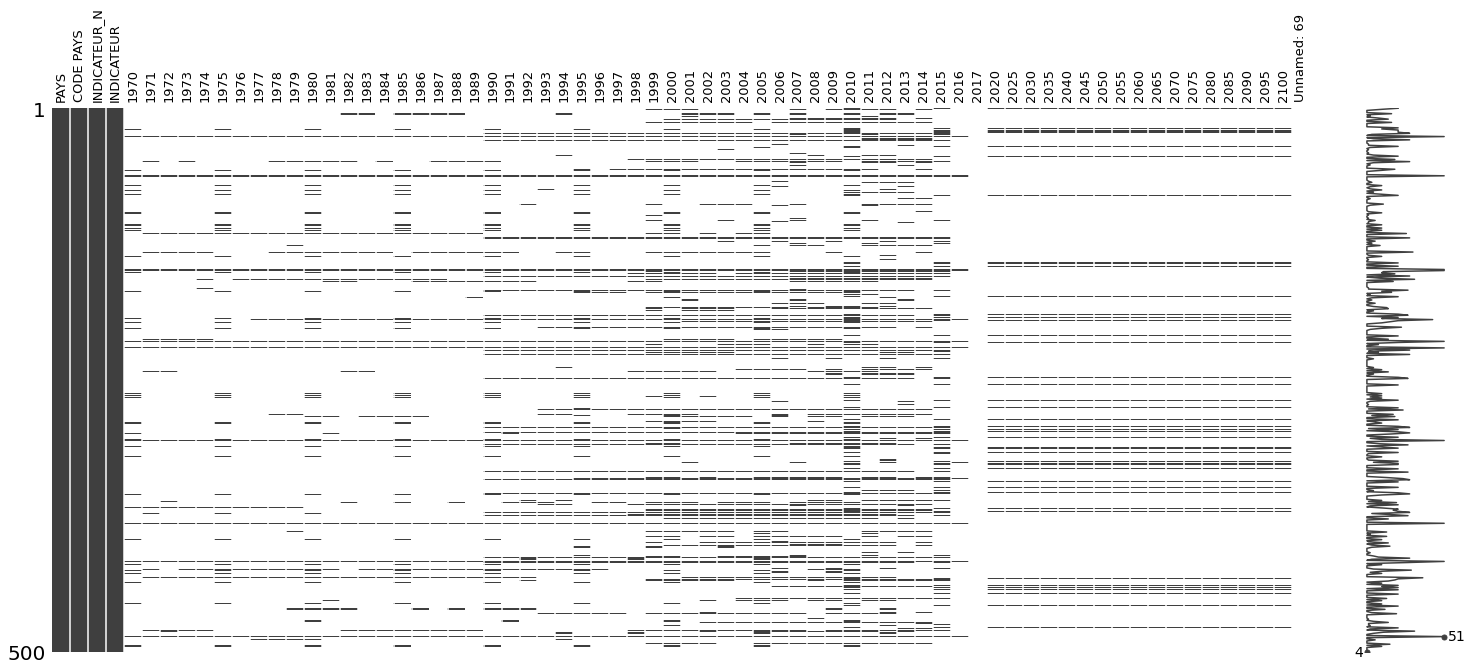

In [48]:
import missingno as msno
A = Data.sample(500)
%matplotlib inline
msno.matrix(A)
tick = np.arange(Data.shape[1])
lab = Data.columns.tolist()
#plt.title('Visualisation des valeurs manquantes de la table Data',pad = 0, fontsize = 20)
plt.xticks(tick,labels = lab, rotation='vertical',fontsize = 13 )
plt.savefig('1_3_Data.png', dpi= 200, bbox_inches = 'tight')

En comptant les colonnes, on s'aperçoit que la colonne 2017 est entièrement vide, tandis que l'année 2010 est la mieux renseignée. Pour les années comprises entre 1970 et 2015, les années multiples de 5 sont d'avantage renseignées. La majorité des informations est enregistrée entre 2000 et 2015. Pour plusieurs pays et indicateurs (la proportion est à préciser), une projection est faite au delà de l'année 2017.

In [49]:
#Suppression de la colonne Unnamed et 
Data = Data.drop(columns = 'Unnamed: 69')


In [50]:
#Localisation des indices de colonnes qui m'intéressent. 10 ans entre 2005 et 2015. 
#Les 10 années les plus renseignées du dataset
Data.iloc[:,-30:-15].isna().mean()

2005    0.772764
2006    0.829333
2007    0.833281
2008    0.836914
2009    0.827053
2010    0.697256
2011    0.822231
2012    0.821163
2013    0.833349
2014    0.863786
2015    0.832500
2016    0.979758
2017    0.999814
2020    0.933570
2025    0.933570
dtype: float64

In [51]:
Data.head()

PAYS CODE PAYS  \
91625  Afghanistan       AFG   
91626  Afghanistan       AFG   
91627  Afghanistan       AFG   
91628  Afghanistan       AFG   
91629  Afghanistan       AFG   

                                            INDICATEUR_N      INDICATEUR  \
91625  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
91626  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
91627  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
91628  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
91629  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

       1970  1971  1972  1973      1974  1975  ...  2055  2060  2065  2070  \
91625   NaN   NaN   NaN   NaN   7.05911   NaN  ...   NaN   NaN   NaN   NaN   
91626   NaN   NaN   NaN   NaN   2.53138   NaN  ...   NaN   NaN   NaN   NaN   
91627   NaN   NaN   NaN   NaN   0.22154   NaN  ...   NaN   NaN   NaN   NaN   
91628   NaN   NaN   NaN   NaN  11.42652   NaN  ...   NaN   NaN   NaN   NaN   
91629   NaN   NaN   NaN   NaN       NaN   NaN  ...   NaN   NaN   NaN   NaN   

       2075  2080  2085  2090  2095  2100  
91625   NaN   NaN   NaN   NaN   NaN   NaN  
91626   NaN   NaN   NaN   NaN   NaN   NaN  
91627   NaN   NaN   NaN   NaN   NaN   NaN  
91628   NaN   NaN   NaN   NaN   NaN   NaN  
91629   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

In [52]:
#Création d'un nouveau dataframe partiel, comprenant les années 2005 à 2015
#Suppression des années hors [2005 ; 2015]
Data1 = Data.iloc[:, 0:4]
#Data2 = Data.iloc[:,-30:-19]
Data2 = Data.iloc[:,-30:-18] #Suite au conclusion du paragraphe 4.1 j'inclue l'année 2016 dans la sélection

Data1 = Data1.reset_index()
Data2 = Data2.reset_index()

In [53]:
Data1

index         PAYS CODE PAYS  \
0        91625  Afghanistan       AFG   
1        91626  Afghanistan       AFG   
2        91627  Afghanistan       AFG   
3        91628  Afghanistan       AFG   
4        91629  Afghanistan       AFG   
...        ...          ...       ...   
769645  886925     Zimbabwe       ZWE   
769646  886926     Zimbabwe       ZWE   
769647  886927     Zimbabwe       ZWE   
769648  886928     Zimbabwe       ZWE   
769649  886929     Zimbabwe       ZWE   

                                             INDICATEUR_N  \
0       Adjusted net enrolment rate, lower secondary, ...   
1       Adjusted net enrolment rate, lower secondary, ...   
2       Adjusted net enrolment rate, lower secondary, ...   
3       Adjusted net enrolment rate, lower secondary, ...   
4       Adjusted net enrolment rate, primary, both sex...   
...                                                   ...   
769645  Youth illiterate population, 15-24 years, male...   
769646  Youth literacy rate, population 15-24 years, b...   
769647  Youth literacy rate, population 15-24 years, f...   
769648  Youth literacy rate, population 15-24 years, g...   
769649  Youth literacy rate, population 15-24 years, m...   

                  INDICATEUR  
0                 UIS.NERA.2  
1               UIS.NERA.2.F  
2             UIS.NERA.2.GPI  
3               UIS.NERA.2.M  
4                SE.PRM.TENR  
...                      ...  
769645      UIS.LP.AG15T24.M  
769646     SE.ADT.1524.LT.ZS  
769647  SE.ADT.1524.LT.FE.ZS  
769648  SE.ADT.1524.LT.FM.ZS  
769649  SE.ADT.1524.LT.MA.ZS  

[769650 rows x 5 columns]

In [54]:
Data2

index  2005  2006       2007  2008  2009  2010          2011  2012  \
0        91625   NaN   NaN  28.059870   NaN   NaN   NaN           NaN   NaN   
1        91626   NaN   NaN  15.223100   NaN   NaN   NaN           NaN   NaN   
2        91627   NaN   NaN   0.379130   NaN   NaN   NaN           NaN   NaN   
3        91628   NaN   NaN  40.152851   NaN   NaN   NaN           NaN   NaN   
4        91629   NaN   NaN        NaN   NaN   NaN   NaN           NaN   NaN   
...        ...   ...   ...        ...   ...   ...   ...           ...   ...   
769645  886925   NaN   NaN        NaN   NaN   NaN   NaN  166679.00000   NaN   
769646  886926   NaN   NaN        NaN   NaN   NaN   NaN      90.93070   NaN   
769647  886927   NaN   NaN        NaN   NaN   NaN   NaN      92.12456   NaN   
769648  886928   NaN   NaN        NaN   NaN   NaN   NaN       1.02828   NaN   
769649  886929   NaN   NaN        NaN   NaN   NaN   NaN      89.59058   NaN   

             2013           2014  2015  2016  
0       47.436790      50.627232   NaN   NaN  
1       34.073261      37.641541   NaN   NaN  
2        0.567060       0.598370   NaN   NaN  
3       60.087059      62.906952   NaN   NaN  
4             NaN            NaN   NaN   NaN  
...           ...            ...   ...   ...  
769645        NaN  199464.000000   NaN   NaN  
769646        NaN      90.428120   NaN   NaN  
769647        NaN      93.188350   NaN   NaN  
769648        NaN       1.063890   NaN   NaN  
769649        NaN      87.591860   NaN   NaN  

[769650 rows x 13 columns]

In [55]:
Data_sub = pd.merge(Data1,Data2, on ='index')

In [56]:
Data_sub = Data_sub.drop(columns='index')

In [57]:
Data_sub.head()
Data_sub_v0 = Data_sub #sauvegarde

In [58]:
Data_sub.isna().mean()

PAYS            0.000000
CODE PAYS       0.000000
INDICATEUR_N    0.000000
INDICATEUR      0.000000
2005            0.772764
2006            0.829333
2007            0.833281
2008            0.836914
2009            0.827053
2010            0.697256
2011            0.822231
2012            0.821163
2013            0.833349
2014            0.863786
2015            0.832500
2016            0.979758
dtype: float64

Le dataframe ***Data*** renferme 787975 lignes (une fois que l'on élimine les 'faux pays') et 70 colonnes. Chaque ligne correspond à un pays et un indicateur statistique donné. Ces deux informations constitue une clé primaire pour le dataframe. Le reste des colonnes sont les années d'enregistrement de 1970 à 2100. Pour répondre à notre problématique il me semble que seul les données de 2005 à 2015 seraient pertinentes, d'autant que ces colonnes ont les taux de valeurs manquantes les plus faibles. Je crée donc une table ***Data_sub*** qui un subset de la table ***Data*** et qui ne comprend que les données de 2005 à 2015.

De manière générale, le taux de valeurs manquantes est très élevé au minimum de 70% pour l'année 2010. 

In [59]:
A = Data['INDICATEUR'].unique()
print(A)
A.shape

['UIS.NERA.2' 'UIS.NERA.2.F' 'UIS.NERA.2.GPI' ... 'SE.ADT.1524.LT.FE.ZS'
 'SE.ADT.1524.LT.FM.ZS' 'SE.ADT.1524.LT.MA.ZS']


(3665,)

Il y a 3665 indicateurs uniques.

In [60]:
Data.groupby('CODE PAYS')['INDICATEUR'].count()

CODE PAYS
ABW    3665
AFG    3665
AGO    3665
ALB    3665
AND    3665
       ... 
XKX    3665
YEM    3665
ZAF    3665
ZMB    3665
ZWE    3665
Name: INDICATEUR, Length: 210, dtype: int64

In [61]:
Data.groupby('CODE PAYS')['INDICATEUR'].count().mean()

3665.0

La table *Data* répertorie les 3665 indicateurs pour chaque pays.

In [62]:
#Recherche de doublon 
Data.duplicated(['CODE PAYS', 'INDICATEUR'],keep=False).sum()

0

**Conclusion :** Je vais explorer le dataframe Series, pour en connaître d'avantage sur les indicateurs 
à disposition. Dans le dataframe ***Data***, les taux de valeurs manquantes sont élevés > 70% . Néanmoins, par pays il y a 3665 indicateurs.

Et les indicateurs sont répertorié sur 90 ans. 
Si 30% des d'enregistrement et/ ou d'un indicateur sont correctement renseigné entre 2005 et 2015, 
il serait possible d'en tirer des conlcusions intéressantes.

Une démarche possible :
1. Réflechir aux critères qui me paraissent pertinents pour répondre à la problématique.
2. Identifier les indcateurs qui correspondent le mieux aux critère de 1.
3. Quantifier le taux de valeurs manquantes et conclure sur la représentativité des resultats 
4. Conclure sur la pertience du set de data de la banque mondiale. 

## <a name="C5"> 1.4 Footnote</a>

In [63]:
FootNote = pd.read_csv('EdStatsFootNote.csv')

In [64]:
FootNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION  Unnamed: 4
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.         NaN
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.         NaN
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.         NaN
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.         NaN
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.         NaN

In [65]:
FootNote.info

<bound method DataFrame.info of        CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...   

In [66]:
FootNote.isna().mean()

CountryCode    0.0
SeriesCode     0.0
Year           0.0
DESCRIPTION    0.0
Unnamed: 4     1.0
dtype: float64

In [67]:
faux_pays

['ARB',
 'EAP',
 'EAS',
 'ECA',
 'ECS',
 'EMU',
 'EUU',
 'GIB',
 'HIC',
 'HPC',
 'LAC',
 'LCN',
 'LDC',
 'LIC',
 'LMC',
 'LMY',
 'MEA',
 'MIC',
 'MNA',
 'NAC',
 'NRU',
 'OED',
 'SAS',
 'SSA',
 'SSF',
 'UMC',
 'WLD',
 'VGB',
 'FRO',
 'GUM',
 'GRL',
 'BMU']

In [68]:
# Passage des codes en majuscule 
FootNote['SeriesCode'] = FootNote['SeriesCode'].str.upper() 
FootNote['CountryCode'] = FootNote['CountryCode'].str.upper() 

In [69]:
#Suppression des lignes qui correspondent au "faux pays"
FootNote = FootNote[~FootNote['CountryCode'].isin(faux_pays)]

In [70]:
#Vérification 1
FootNote[FootNote['CountryCode']=='ARB'].index

Int64Index([], dtype='int64')

In [71]:
#Vérification 2
FootNote[FootNote['CountryCode'].isin(faux_pays)]

Empty DataFrame
Columns: [CountryCode, SeriesCode, Year, DESCRIPTION, Unnamed: 4]
Index: []

In [72]:
FootNote.shape

(513657, 5)

In [73]:
FootNote['DESCRIPTION'].unique()

array(['Country estimation.', 'UIS Estimation',
       'UNESCO Institute for Statistics (UIS) estimate', ...,
       'Uncertainty bound is 91.6 - 109.3',
       'Uncertainty bound is 54.3 - 76',
       'Uncertainty bound is 48.3 - 73.3'], dtype=object)

In [74]:
a = FootNote['SeriesCode'].unique()
print(a,'Nombre indicateur',a.shape[0])

['SE.PRE.ENRL.FE' 'SE.TER.TCHR.FE' 'SE.PRE.TCHR.FE' ...
 'UIS.AFR.GTCTR.2.F' 'UIS.AFR.GTCTR.2.M' 'UIS.AFR.GTCTR.2.T'] Nombre indicateur 1471


Il y a seuleument 1474 indicateurs évoqués dans la table FootNote. 

In [75]:
## Mise en forme du dataframe
FootNote =FootNote.drop(columns='Unnamed: 4') #Suppression de la colonne Unnamed 4
FootNote = FootNote.rename(columns={'CountryCode':'CODE PAYS'})
FootNote=FootNote.rename(columns={'SeriesCode':'INDICATEUR'})
FootNote=FootNote.rename(columns={'Year':'ANNÉE'})


In [76]:
FootNote.groupby('CODE PAYS')['CODE PAYS'].count()

CODE PAYS
ABW    1712
AFG    1576
AGO    1416
ALB    1916
AND    1274
       ... 
XKX      12
YEM    1615
ZAF    2376
ZMB    2339
ZWE    1480
Name: CODE PAYS, Length: 208, dtype: int64

Chaque pays n'a pas le même nombre d'indicateur ni le même nombre d'année renseigné. 

In [77]:
FootNote

CODE PAYS      INDICATEUR   ANNÉE  \
0            ABW  SE.PRE.ENRL.FE  YR2001   
1            ABW  SE.TER.TCHR.FE  YR2005   
2            ABW  SE.PRE.TCHR.FE  YR2000   
3            ABW  SE.SEC.ENRL.GC  YR2004   
4            ABW     SE.PRE.TCHR  YR2006   
...          ...             ...     ...   
643633       ZWE     SH.DYN.MORT  YR2007   
643634       ZWE     SH.DYN.MORT  YR2014   
643635       ZWE     SH.DYN.MORT  YR2015   
643636       ZWE     SH.DYN.MORT  YR2017   
643637       ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  
0                          Country estimation.  
1                          Country estimation.  
2                          Country estimation.  
3                          Country estimation.  
4                          Country estimation.  
...                                        ...  
643633       Uncertainty bound is 91.6 - 109.3  
643634          Uncertainty bound is 54.3 - 76  
643635        Uncertainty bound is 48.3 - 73.3  
643636  5-year average value between 0s and 5s  
643637  5-year average value between 0s and 5s  

[513657 rows x 4 columns]

In [78]:
FootNote.dtypes

CODE PAYS      object
INDICATEUR     object
ANNÉE          object
DESCRIPTION    object
dtype: object

In [79]:
FootNote.duplicated(['CODE PAYS', 'INDICATEUR'],keep = False).sum()

493369

In [80]:
FootNote.ANNÉE.unique()

array(['YR2001', 'YR2005', 'YR2000', 'YR2004', 'YR2006', 'YR2003',
       'YR1999', 'YR2008', 'YR2002', 'YR2007', 'YR2017', 'YR2010',
       'YR2009', 'YR2011', 'YR2012', 'YR2015', 'YR2014', 'YR1970',
       'YR1971', 'YR1972', 'YR1973', 'YR1974', 'YR1975', 'YR1976',
       'YR1977', 'YR1978', 'YR1979', 'YR1980', 'YR1981', 'YR1982',
       'YR1983', 'YR1984', 'YR1985', 'YR1986', 'YR1987', 'YR1988',
       'YR1989', 'YR1990', 'YR1991', 'YR1992', 'YR1993', 'YR1994',
       'YR1995', 'YR1996', 'YR1997', 'YR1998', 'YR2013', 'YR2016',
       'YR2020', 'YR2025', 'YR2030', 'YR2035', 'YR2040', 'YR2045',
       'YR2050'], dtype=object)

Pour d'avantage de lisibilité, je choisi de convertir les dates au format date ou datetime. 
Je pourrais ainsi les ordonner et éliminer les années qui me semblent peu pertinentes. 

In [81]:
for i,row in FootNote.iterrows():
    row['ANNÉE'] = row['ANNÉE'][2:]

In [82]:
FootNote.head()

CODE PAYS      INDICATEUR ANNÉE          DESCRIPTION
0       ABW  SE.PRE.ENRL.FE  2001  Country estimation.
1       ABW  SE.TER.TCHR.FE  2005  Country estimation.
2       ABW  SE.PRE.TCHR.FE  2000  Country estimation.
3       ABW  SE.SEC.ENRL.GC  2004  Country estimation.
4       ABW     SE.PRE.TCHR  2006  Country estimation.

In [83]:
#pd.to_datetime(FootNote['YEAR'])

Le format Datetime n'est pas très lisible et ne me permets pas de garder uniquement l'année. Essai avec l'argument
format = %Y, sans résultat. Je décide donc de convertir la date au format integer. J'aurais la possibilté de les ordonner.

In [84]:
FootNote['ANNÉE'] = FootNote['ANNÉE'].astype('int')

Pour être en cohérence avec la démarche employé au dataframe *Data*, je choisi de ne garder que les années comprises entre 2005 et 2025. 

In [85]:
FootNote_sub = FootNote[FootNote['ANNÉE']>=2005]
FootNote_sub = FootNote[FootNote['ANNÉE']<2030]

In [86]:
FootNote_sub.shape

(512941, 4)

In [87]:
FootNote_sub = FootNote_sub.reset_index()

In [88]:
FootNote_sub = FootNote_sub.drop(columns='index')

In [89]:
FootNote_sub.head()

CODE PAYS      INDICATEUR  ANNÉE          DESCRIPTION
0       ABW  SE.PRE.ENRL.FE   2001  Country estimation.
1       ABW  SE.TER.TCHR.FE   2005  Country estimation.
2       ABW  SE.PRE.TCHR.FE   2000  Country estimation.
3       ABW  SE.SEC.ENRL.GC   2004  Country estimation.
4       ABW     SE.PRE.TCHR   2006  Country estimation.

In [90]:
FootNote.groupby(['CODE PAYS', 'ANNÉE'])['INDICATEUR'].count()

CODE PAYS  ANNÉE
ABW        1970      5
           1971      5
           1972      5
           1973      5
           1974      5
                    ..
ZWE        2013     23
           2014     34
           2015     26
           2016      2
           2017      2
Name: INDICATEUR, Length: 9846, dtype: int64

In [91]:
FootNote.duplicated(keep=False).sum()

0

In [92]:
mask1 = Data_sub['INDICATEUR']=='SE.TER.ENRL' 
mask2 =Data_sub['CODE PAYS']=='FRA'
Data_sub.loc[(mask1 & mask2),:]

PAYS CODE PAYS                                       INDICATEUR_N  \
235764  France       FRA  Enrolment in tertiary education, all programme...   

         INDICATEUR       2005       2006       2007       2008       2009  \
235764  SE.TER.ENRL  2187383.0  2201201.0  2179505.0  2164538.0  2172855.0   

             2010       2011       2012       2013       2014  2015  2016  
235764  2245097.0  2259448.0  2296306.0  2338135.0  2388880.0   NaN   NaN

In [93]:
mask1 = FootNote['INDICATEUR']=='SE.TER.ENRL' 
mask2 =FootNote['CODE PAYS']=='FRA'
FootNote.loc[(mask2 & mask1),:]

CODE PAYS   INDICATEUR  ANNÉE   DESCRIPTION
196877       FRA  SE.TER.ENRL   1999     Estimated
196878       FRA  SE.TER.ENRL   2000     Estimated
196879       FRA  SE.TER.ENRL   2001     Estimated
196880       FRA  SE.TER.ENRL   2002     Estimated
196881       FRA  SE.TER.ENRL   2003     Estimated
196882       FRA  SE.TER.ENRL   2004     Estimated
196883       FRA  SE.TER.ENRL   2005     Estimated
196884       FRA  SE.TER.ENRL   2006     Estimated
196885       FRA  SE.TER.ENRL   2007     Estimated
196886       FRA  SE.TER.ENRL   2008     Estimated
196887       FRA  SE.TER.ENRL   2009     Estimated
196888       FRA  SE.TER.ENRL   2010     Estimated
198367       FRA  SE.TER.ENRL   1971  Country Data
198368       FRA  SE.TER.ENRL   1972  Country Data
198369       FRA  SE.TER.ENRL   1973  Country Data
198370       FRA  SE.TER.ENRL   1974  Country Data
198371       FRA  SE.TER.ENRL   1975  Country Data
198372       FRA  SE.TER.ENRL   1976  Country Data
198373       FRA  SE.TER.ENRL   1977  Country Data
198374       FRA  SE.TER.ENRL   1978  Country Data
198375       FRA  SE.TER.ENRL   1979  Country Data
198376       FRA  SE.TER.ENRL   1980  Country Data
198377       FRA  SE.TER.ENRL   1981  Country Data
198378       FRA  SE.TER.ENRL   1982  Country Data
198379       FRA  SE.TER.ENRL   1983  Country Data
198380       FRA  SE.TER.ENRL   1985  Country Data
198381       FRA  SE.TER.ENRL   1986  Country Data
198382       FRA  SE.TER.ENRL   1987  Country Data
198383       FRA  SE.TER.ENRL   1988  Country Data
198384       FRA  SE.TER.ENRL   1989  Country Data
198385       FRA  SE.TER.ENRL   1990  Country Data
198386       FRA  SE.TER.ENRL   1991  Country Data
198387       FRA  SE.TER.ENRL   1992  Country Data
198388       FRA  SE.TER.ENRL   1993  Country Data
198389       FRA  SE.TER.ENRL   1994  Country Data
198390       FRA  SE.TER.ENRL   1995  Country Data
198391       FRA  SE.TER.ENRL   1996  Country Data
198392       FRA  SE.TER.ENRL   1997  Country Data

**Conclusion :** Le dataframe *FootNote* est consituté de 4 colonnes et de 515752 lignes. Chaque ligne correspond à un pays, à un indicateur, l'année de calcul de l'indicateur et à une Note de bas de page concernant le calcul de l'indicateur. Pour être en cohérence avec la démarche employé au dataframe *Data*, je choisi de ne garder que les années comprises entre 2005 et 2025. Seul 1474 indicateurs sont évoqués, les 3665 indicateurs de *Data* ne font pas tous l'objet d'une note de bas de page. 

## <a name="C6"> 1.5 Series </a> 

In [94]:
Series = pd.read_csv('EdStatsSeries.csv')

In [95]:
Series.info

<bound method DataFrame.info of                       Series Code         Topic  \
0             BAR.NOED.1519.FE.ZS    Attainment   
1                BAR.NOED.1519.ZS    Attainment   
2             BAR.NOED.15UP.FE.ZS    Attainment   
3                BAR.NOED.15UP.ZS    Attainment   
4             BAR.NOED.2024.FE.ZS    Attainment   
...                           ...           ...   
3660    UIS.XUNIT.USCONST.3.FSGOV  Expenditures   
3661    UIS.XUNIT.USCONST.4.FSGOV  Expenditures   
3662   UIS.XUNIT.USCONST.56.FSGOV  Expenditures   
3663  XGDP.23.FSGOV.FDINSTADM.FFD  Expenditures   
3664  XGDP.56.FSGOV.FDINSTADM.FFD  Expenditures   

                                         Indicator Name  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
.

In [96]:
Series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  ...  \
0         NaN         NaN         NaN                NaN  ...   
1         NaN         NaN         NaN                NaN  ...   
2         NaN         NaN         NaN                NaN  ...   
3         NaN         NaN         NaN                NaN  ...   
4         NaN         NaN         NaN                NaN  ...   

  Notes from original source  General comments  \
0                        NaN               NaN   
1                        NaN               NaN   
2                        NaN               NaN   
3                        NaN               NaN   
4                        NaN               NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links Other web links  Related indicators  License Type  \
0                  NaN             NaN                 NaN           NaN   
1                  NaN             NaN                 NaN           NaN   
2                  NaN             NaN                 NaN           NaN   
3                  NaN             NaN                 NaN           NaN   
4                  NaN             NaN                 NaN           NaN   

   Unnamed: 20  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 21 columns]

In [97]:
Series.isna().mean()

Series Code                            0.000000
Topic                                  0.000000
Indicator Name                         0.000000
Short definition                       0.411733
Long definition                        0.000000
Unit of measure                        1.000000
Periodicity                            0.972988
Base Period                            0.914325
Other notes                            0.849386
Aggregation method                     0.987176
Limitations and exceptions             0.996180
Notes from original source             1.000000
General comments                       0.996180
Source                                 0.000000
Statistical concept and methodology    0.993724
Development relevance                  0.999181
Related source links                   0.941337
Other web links                        1.000000
Related indicators                     1.000000
License Type                           1.000000
Unnamed: 20                            1

In [98]:
Series = Series.rename(columns = {'Series Code': 'INDICATEUR', 'Topic':'DOMAINE'} )
Series.columns = Series.columns.str.upper()

In [99]:
Series = Series.loc[:,Series.isna().mean()<0.7] #Je ne garde que les colonnes ayant un taux de valeur 
#inférieur 70%
#print(Series.head())
print('Taux de valeur manquantes moyen:',Series.isna().mean())

Taux de valeur manquantes moyen: INDICATEUR          0.000000
DOMAINE             0.000000
INDICATOR NAME      0.000000
SHORT DEFINITION    0.411733
LONG DEFINITION     0.000000
SOURCE              0.000000
dtype: float64


In [100]:
#Passage des codes en majuscules 
Series['INDICATEUR'] = Series['INDICATEUR'].str.upper()

In [101]:
Series.duplicated('INDICATEUR').sum()

0

In [102]:
Series['INDICATEUR'].unique().shape

(3665,)

In [103]:
Series[Series['INDICATEUR']== 'SE.TER.ENRL']
#Series[Series['INDICATEUR']== 'SP.POP.TOTL']
#Series[Series['INDICATEUR']== 'NY.GDP.PCAP.PP.CD']
#SP.POP.GROW

INDICATEUR   DOMAINE  \
2332  SE.TER.ENRL  Tertiary   

                                         INDICATOR NAME SHORT DEFINITION  \
2332  Enrolment in tertiary education, all programme...              NaN   

                                        LONG DEFINITION  \
2332  The total number of students enrolled at publi...   

                               SOURCE  
2332  UNESCO Institute for Statistics

In [104]:
Series.loc[Series['INDICATEUR']=='SP.POP.TOTL', 'INDICATOR NAME'].values[0]

'Population, total'

**Conclusion :**
Le dataframe Series a pour clé primaire l'indicateur et son code. Chaque ligne correspond donc à un indicateur. 
Le dataframe nous renseigne sur le domaine avec la colonne Topic et la définition de l'indicateur. Logiquement, le dataframe Series comprend 3665 lignes, une ligne par indicateur. 

Les taux de valeurs manquantes sont supérieurs à 70% pour les 16 colonnes qui suivent la colonne 'LONG DEFINITION'.
À ce titre je décide d'alléger le dataset en éliminant les colonnes qui possèdent un taux de valeurs manquantes supérieurs à 70%. 

J'obtiens un dataframe de 3665 lignes et 6 colonnes. 

Le dataframe Series, permet d'identifier que la table <a href="#C2"> Country_s </a> ne prend en compte que des indicateurs relatif à la population.  


## <a name="C7"> 1.6 Table *Series* et table *Country_s*</a> 

Pour comprendre le contenu de la table Country_s, je choisi de lui ajouter une nouvelle colonne 'DEFINITION' qui affectera pour chaque ligne la défnition du Code correspondant. L'information sera extraite de la table Series.

In [105]:
Country_s.head()

CODE PAYS         INDICATEUR  \
0       ABW        SP.POP.TOTL   
1       ABW        SP.POP.GROW   
2       AFG        SP.POP.GROW   
3       AFG  NY.GDP.PCAP.PP.CD   
4       AFG        SP.POP.TOTL   

                                         DESCRIPTION  
0  Data sources : United Nations World Population...  
1  Data sources: United Nations World Population ...  
2  Data sources: United Nations World Population ...  
3                 Estimates are based on regression.  
4  Data sources : United Nations World Population...

In [106]:
Country_s['DEFINITION']= ''

In [107]:
Series.loc[Series['INDICATEUR']== 'SP.POP.TOTL', 'INDICATOR NAME']

2590    Population, total
Name: INDICATOR NAME, dtype: object

In [108]:
for i,c in Country_s.iterrows():
    mask = Series['INDICATEUR']==c['INDICATEUR']
    Country_s.iloc[i,-1]= Series.loc[mask,'INDICATOR NAME'].values[0]
##ATTENTION à ne prendre que la valeur en ajoutant l'attribut .values

In [109]:
Country_s.head()

CODE PAYS         INDICATEUR  \
0       ABW        SP.POP.TOTL   
1       ABW        SP.POP.GROW   
2       AFG        SP.POP.GROW   
3       AFG  NY.GDP.PCAP.PP.CD   
4       AFG        SP.POP.TOTL   

                                         DESCRIPTION  \
0  Data sources : United Nations World Population...   
1  Data sources: United Nations World Population ...   
2  Data sources: United Nations World Population ...   
3                 Estimates are based on regression.   
4  Data sources : United Nations World Population...   

                                      DEFINITION  
0                              Population, total  
1                   Population growth (annual %)  
2                   Population growth (annual %)  
3  GDP per capita, PPP (current international $)  
4                              Population, total

In [110]:
Country_s['INDICATEUR'].unique()

array(['SP.POP.TOTL', 'SP.POP.GROW', 'NY.GDP.PCAP.PP.CD',
       'NY.GDP.MKTP.PP.KD', 'NY.GNP.MKTP.PP.CD', 'NY.GDP.MKTP.PP.CD',
       'NY.GDP.PCAP.PP.KD', 'NY.GNP.PCAP.PP.CD', 'SP.POP.1564.TO.ZS',
       'SP.POP.TOTL.MA.ZS', 'SP.POP.TOTL.FE.ZS', 'SP.POP.0014.TO.ZS',
       'NY.GNP.PCAP.CD', 'NY.GDP.PCAP.CD', 'NY.GDP.PCAP.KD',
       'SP.POP.1564.MA.IN', 'SP.POP.0014.TO', 'SP.POP.1564.TO',
       'SP.POP.1564.FE.IN', 'SP.POP.0014.MA.IN', 'SP.POP.0014.FE.IN'],
      dtype=object)

**Conclusion :**
La table Country_s, contient pour chaque pays, une liste d'indicateur relatif à la démographie et au produits interieurs brut et produits national brut. Pour chaque pays, la population et son accroissement annuel est connu.
Les autres indicateurs ne sont renseignés que pour une dizaine de pays à la fois.


# <a name="C8"> Conclusion partie 1 : qualité du jeu de données</a> 

### Le dataset 

**Table *Country_s* :** 
Le dataframe *Country_s* est un tableau à 3 colonnes et 613 lignes. Chaque ligne correspond à un pays et un code faisant réference à un indicateur. Il y a 21 indicateurs au total dans le dataframe Country_s. Ces 21 indicateurs sont tous relatifs à la démographie et aux caractéristiques économiques des pays listés. Les 21 indicateurs ne sont pas renseignés pour tous les pays. 

**Table *Country_sub* :** 
J'ai crée le dataset *Country_sub* à partir des features de la table Country qui m'intéressent : le code pays, la région et la catégorie de revenus. Chaque ligne correspond à un pays. C'est un dataframe de 4 colonnes et 214 lignes. Le taux de valeurs manquantes est nul et il n'y a pas de doublons.  



**Table *Data* :**  Le dataframe *Data*, liste par pays les 3665 indicateurs répertoriés dans la table *Series* et répertorié sur 120 ans entre 1970 et 2100. Les taux de valeurs manquantes sont élevés et en moyenne supérieur à 70% . Néanmoins, au vue du nombre d'indicateurs, si 30% des d'enregistrement et/ ou d'un indicateur sont correctement renseigné entre 2005 et 2015, il serait possible d'en tirer des conlcusions intéressantes. 

<AxesSubplot:>

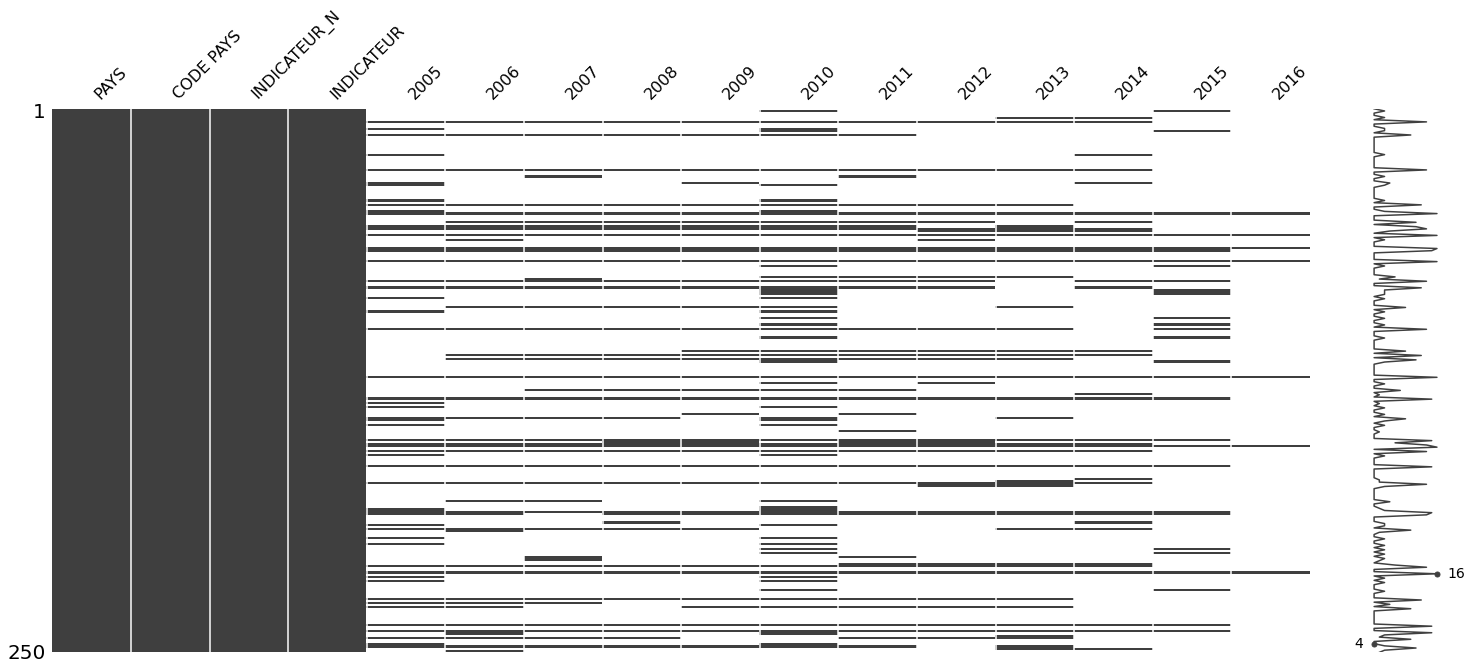

In [111]:
import missingno as msno
A = Data_sub.sample(250)
%matplotlib inline
msno.matrix(A)

<AxesSubplot:>

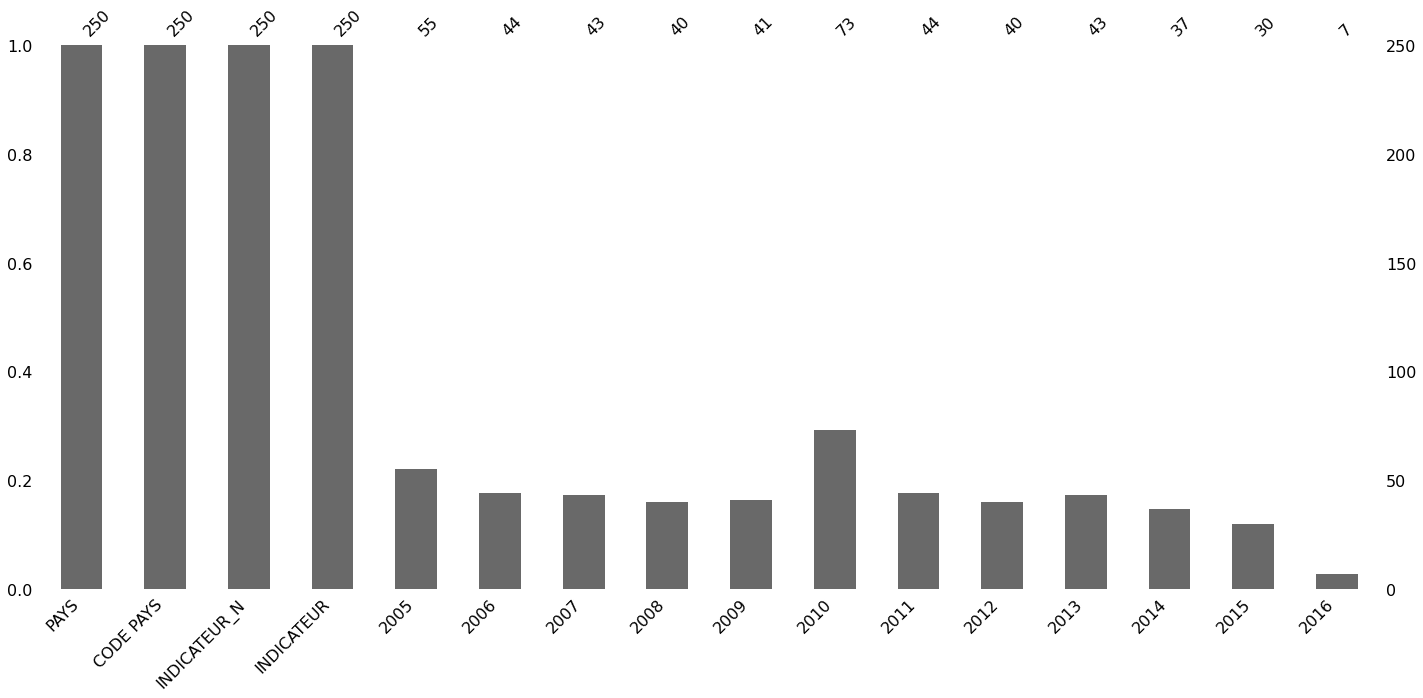

In [112]:
%matplotlib inline
msno.bar(A)

**Table *FootNote* :** Le dataframe *FootNote* est constitué de 4 colonnes et de 515752 lignes. Chaque ligne correspond à un pays, à un indicateur, l'année de calcul de l'indicateur et à une Note de bas de page concernant le calcul de l'indicateur. Pour être en cohérence avec la démarche employé au dataframe *Data*, je choisi de ne garder que les années comprises entre 2005 et 2025. 

**Table *Series*:**
Le dataframe Series liste les 3665 indicateurs que le set de données nous met à disposition dans le dataframe *Data*.

# <a name="C9"> 2. Sélection des indices/indicateurs</a>  
### <a href="#H1"> Hypothèse (H1):</a>
- La start-up academy propose des cours en ligne à l'image de l'entreprise Maxicours i.e des cours de soutien scolaire. Ici ces cours seraient destinés aux lycéens et étudiants en cursus universitaire.

Pour répondre à la problématique du client, j'ai établi une liste de critères qui me paraîssent pertinents à l'expansion d'une start-up de la EdTech.
1. L'accès à une connexion internet 
2. L'accès à un ordinateur personnel à usage individuel
4. Le pouvoir d’achat 
5. L’investissement public dans les universités et lycées locaux
6. Le coût de l'instruction
7. Taux d'inscription aux universités
8. Taux d'inscription aux lycées

In [113]:
Series.head()

INDICATEUR     DOMAINE  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      INDICATOR NAME  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    SHORT DEFINITION  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     LONG DEFINITION  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                              SOURCE  
0  Robert J. Barro and Jong-Wha Lee: http://www.b...  
1  Robert J. Barro and Jong-Wha Lee: http://www.b...  
2  Robert J. Barro and Jong-Wha Lee: http://www.b...  
3  Robert J. Barro and Jong-Wha Lee: http://www.b...  
4  Robert J. Barro and Jong-Wha Lee: http://www.b...

Je recherche dans les 'DOMAINE' les domaines qui pourraient m'intéresser. 

In [114]:
Series['DOMAINE'].unique()

array(['Attainment', 'Education Equality',
       'Infrastructure: Communications', 'Learning Outcomes',
       'Economic Policy & Debt: National accounts: US$ at current prices: Aggregate indicators',
       'Economic Policy & Debt: National accounts: US$ at constant 2010 prices: Aggregate indicators',
       'Economic Policy & Debt: Purchasing power parity',
       'Economic Policy & Debt: National accounts: Atlas GNI & GNI per capita',
       'Teachers', 'Education Management Information Systems (SABER)',
       'Early Child Development (SABER)',
       'Engaging the Private Sector (SABER)',
       'School Health and School Feeding (SABER)',
       'School Autonomy and Accountability (SABER)',
       'School Finance (SABER)', 'Student Assessment (SABER)',
       'Teachers (SABER)', 'Tertiary Education (SABER)',
       'Workforce Development (SABER)', 'Literacy', 'Background',
       'Primary', 'Secondary', 'Tertiary', 'Early Childhood Education',
       'Pre-Primary', 'Expenditures'

## <a name="C10"> 2.0. Implémention de la fonction ***eval_ind*** </a> 

Je choisie d'implémenter la fonction *eval_ind* qui retournera pour un indicateur donné, le taux de valeurs manquantes de la table *Data*, le taux de valeur manquantes moyen total et le graphe de valeurs manquantes. 

In [115]:
def eval_ind (st):
    #st est une chaîne de caractère
    tauxvn = Data_sub[Data_sub['INDICATEUR']== st].isna().mean()
    tauxvn_moy = Data_sub[Data_sub['INDICATEUR']== st].isna().mean()[4:].mean()
    mask = Data_sub[Data_sub['INDICATEUR']== st]
    mask_s= mask.sample(100)
    %matplotlib inline
    M = msno.matrix(mask_s)
    return tauxvn, tauxvn_moy, M 

## <a name="C11"> 2.1. Accessibilité </a>  

Les critères 1. et 2. concernent l'accès à internet et à un ordinateur. De tels indicateurs peuvent être trouvés dans le 'DOMAINE' 'Infrastructure: Communications'.

In [116]:
Series.loc[Series['DOMAINE']== 'Infrastructure: Communications',:]

INDICATEUR                         DOMAINE  \
610  IT.CMP.PCMP.P2  Infrastructure: Communications   
611  IT.NET.USER.P2  Infrastructure: Communications   

                          INDICATOR NAME SHORT DEFINITION  \
610  Personal computers (per 100 people)              NaN   
611      Internet users (per 100 people)              NaN   

                                       LONG DEFINITION  \
610  Personal computers are self-contained computer...   
611  Internet users are individuals who have used t...   

                                                SOURCE  
610  International Telecommunication Union, World T...  
611  International Telecommunication Union, World T...

In [117]:
Series.loc[Series['DOMAINE']== 'Infrastructure: Communications','LONG DEFINITION'].values

array(['Personal computers are self-contained computers designed to be used by a single individual.',
       'Internet users are individuals who have used the Internet (from any location) in the last 3 months. The Internet can be used via a computer, mobile phone, personal digital assistant, games machine, digital TV etc.'],
      dtype=object)

Je retiens les deux indicateurs ci-dessus pour répondre aux critère 1. et 2. 

### Visualisation des valeurs manquantes
#### Critère 1. Accès à internet 

(PAYS            0.000000
 CODE PAYS       0.000000
 INDICATEUR_N    0.000000
 INDICATEUR      0.000000
 2005            0.080952
 2006            0.085714
 2007            0.052381
 2008            0.057143
 2009            0.061905
 2010            0.061905
 2011            0.052381
 2012            0.061905
 2013            0.061905
 2014            0.061905
 2015            0.061905
 2016            0.066667
 dtype: float64,
 0.06388888888888888,
 <AxesSubplot:>)

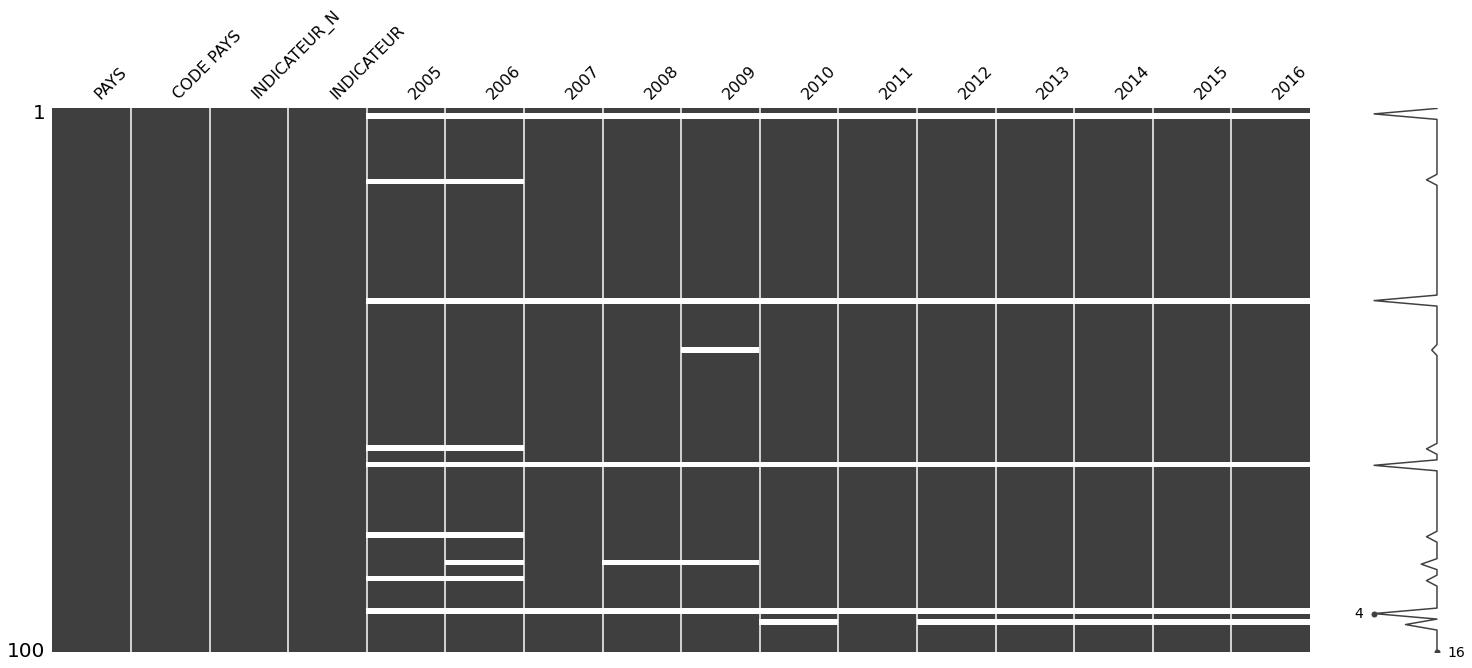

In [118]:
eval_ind('IT.NET.USER.P2')

Les données concernant l'accès à internet sont complètes, avec un taux de valeurs manquantes de 6,2% entre les années 2005 et 2015 inclus.

#### Critère 2. Accès à un PC 

(PAYS            0.000000
 CODE PAYS       0.000000
 INDICATEUR_N    0.000000
 INDICATEUR      0.000000
 2005            0.185714
 2006            0.528571
 2007            0.771429
 2008            0.871429
 2009            0.985714
 2010            1.000000
 2011            1.000000
 2012            1.000000
 2013            1.000000
 2014            1.000000
 2015            1.000000
 2016            1.000000
 dtype: float64,
 0.861904761904762,
 <AxesSubplot:>)

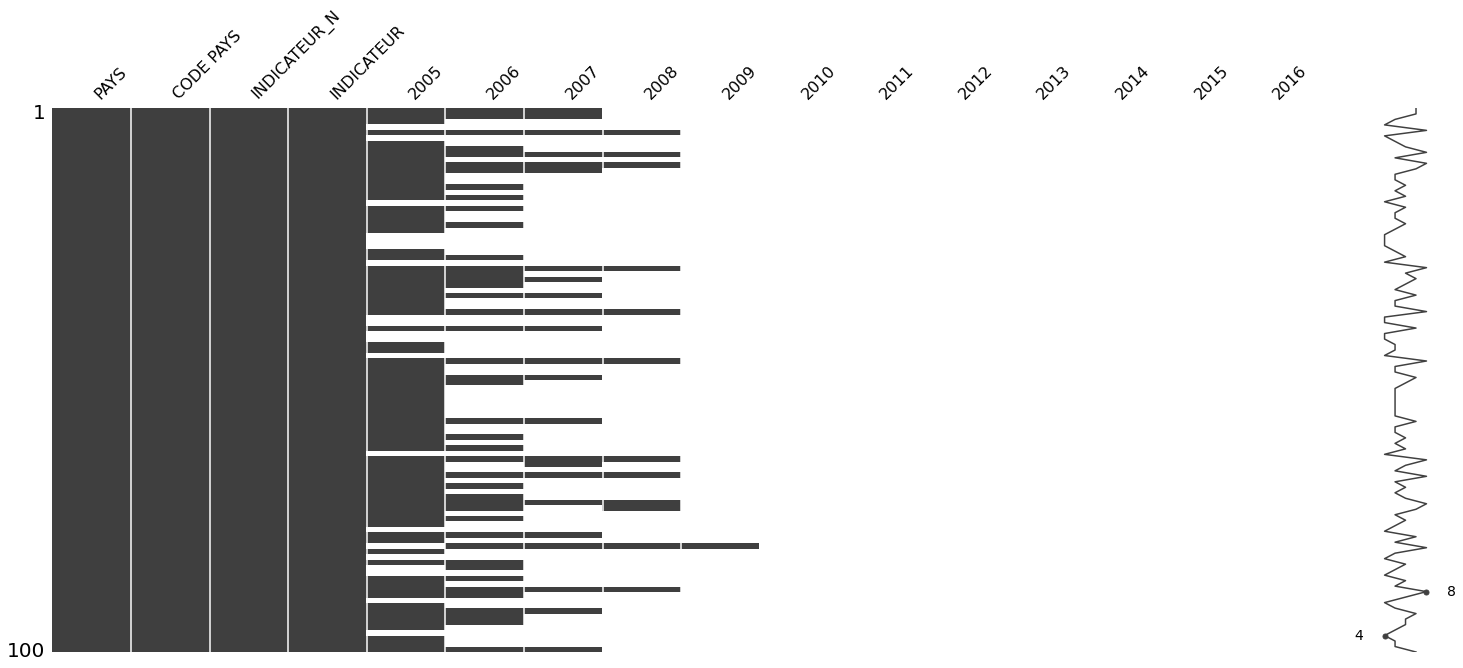

In [119]:
eval_ind('IT.CMP.PCMP.P2')

Après l'année 2007, le critère d'accès à un ordinateur personnel n'est plus fiable avec une moyenne de valeurs manquantes supérieur à 77%. 

**Conclusion:**

Le critère d'accès à internet est disponible mais ne précise que le nombre de personnes (pour 100 personnes) qui ont eu accès à internet une fois dans les 3 mois précédents l'enregistrement. Ce qui ne donne pas d'indication sur un accès régulier. 

Les données concernant l'accès à un ordinateur personnel ne sont pas suffisante après l'année 2005. Une piste éventuelle : évaluer l'évolution du critère pour les pays dont l'indicateur est renseigné jusqu'à 2008 et chercher une corrélation, et un modèle à appliquer par région et groupe de revenus.

## <a name="C12"> 2.2. Niveau d'instruction </a>  

Pour proposer des cours de soutien, il faut cibler les élèves inscrits à l'université et au lycée.
- Il faut quantifier par pays le nombre d'élèves inscrits au lycée
- Il faut quantifier par pays le nombre d'élèves inscrits à l'université 

Avec l'hypothèse <a name="H1"> (H1)</a> , j'exclue donc les non-inscrits qui auraient éventuellement pu profiter de cours en ligne pour une reprise d'étude ou pour une remise à niveau.

### 2.2.1 Exploration : DOMAINE == Attainment ###

In [120]:
Series.loc[Series['DOMAINE']== 'Attainment',:]

#The Educational Attainment Dashboard illustrates the distribution of 
#education attainment and human capital in over 100 countries from 1970 to 2010.

INDICATEUR     DOMAINE  \
0     BAR.NOED.1519.FE.ZS  Attainment   
1        BAR.NOED.1519.ZS  Attainment   
2     BAR.NOED.15UP.FE.ZS  Attainment   
3        BAR.NOED.15UP.ZS  Attainment   
4     BAR.NOED.2024.FE.ZS  Attainment   
...                   ...         ...   
2909  UIS.EA.S1.AG25T99.F  Attainment   
2910  UIS.EA.S1.AG25T99.M  Attainment   
2911    UIS.EA.UK.AG25T99  Attainment   
2912  UIS.EA.UK.AG25T99.F  Attainment   
2913  UIS.EA.UK.AG25T99.M  Attainment   

                                         INDICATOR NAME  \
0     Barro-Lee: Percentage of female population age...   
1     Barro-Lee: Percentage of population age 15-19 ...   
2     Barro-Lee: Percentage of female population age...   
3     Barro-Lee: Percentage of population age 15+ wi...   
4     Barro-Lee: Percentage of female population age...   
...                                                 ...   
2909  UIS: Percentage of population age 25+ with som...   
2910  UIS: Percentage of population age 25+ with som...   
2911  UIS: Percentage of population age 25+ with unk...   
2912  UIS: Percentage of population age 25+ with unk...   
2913  UIS: Percentage of population age 25+ with unk...   

                                       SHORT DEFINITION  \
0     Percentage of female population age 15-19 with...   
1     Percentage of population age 15-19 with no edu...   
2     Percentage of female population age 15+ with n...   
3     Percentage of population age 15+ with no educa...   
4     Percentage of female population age 20-24 with...   
...                                                 ...   
2909  The percentage of female population (age 25 an...   
2910  The percentage of male population (age 25 and ...   
2911  The percentage of the population (age 25 and o...   
2912  The percentage of the female population (age 2...   
2913  The percentage of the male population (age 25 ...   

                                        LONG DEFINITION  \
0     Percentage of female population age 15-19 with...   
1     Percentage of population age 15-19 with no edu...   
2     Percentage of female population age 15+ with n...   
3     Percentage of population age 15+ with no educa...   
4     Percentage of female population age 20-24 with...   
...                                                 ...   
2909  The percentage of female population (age 25 an...   
2910  The percentage of male population (age 25 and ...   
2911  The percentage of the population (age 25 and o...   
2912  The percentage of the female population (age 2...   
2913  The percentage of the male population (age 25 ...   

                                                 SOURCE  
0     Robert J. Barro and Jong-Wha Lee: http://www.b...  
1     Robert J. Barro and Jong-Wha Lee: http://www.b...  
2     Robert J. Barro and Jong-Wha Lee: http://www.b...  
3     Robert J. Barro and Jong-Wha Lee: http://www.b...  
4     Robert J. Barro and Jong-Wha Lee: http://www.b...  
...                                                 ...  
2909                    UNESCO Institute for Statistics  
2910                    UNESCO Institute for Statistics  
2911                    UNESCO Institute for Statistics  
2912                    UNESCO Institute for Statistics  
2913                    UNESCO Institute for Statistics  

[733 rows x 6 columns]

In [121]:
Series.loc[Series['DOMAINE']== 'Attainment','INDICATEUR'].unique()

array(['BAR.NOED.1519.FE.ZS', 'BAR.NOED.1519.ZS', 'BAR.NOED.15UP.FE.ZS',
       'BAR.NOED.15UP.ZS', 'BAR.NOED.2024.FE.ZS', 'BAR.NOED.2024.ZS',
       'BAR.NOED.2529.FE.ZS', 'BAR.NOED.2529.ZS', 'BAR.NOED.25UP.FE.ZS',
       'BAR.NOED.25UP.ZS', 'BAR.NOED.3034.FE.ZS', 'BAR.NOED.3034.ZS',
       'BAR.NOED.3539.FE.ZS', 'BAR.NOED.3539.ZS', 'BAR.NOED.4044.FE.ZS',
       'BAR.NOED.4044.ZS', 'BAR.NOED.4549.FE.ZS', 'BAR.NOED.4549.ZS',
       'BAR.NOED.5054.FE.ZS', 'BAR.NOED.5054.ZS', 'BAR.NOED.5559.FE.ZS',
       'BAR.NOED.5559.ZS', 'BAR.NOED.6064.FE.ZS', 'BAR.NOED.6064.ZS',
       'BAR.NOED.6569.FE.ZS', 'BAR.NOED.6569.ZS', 'BAR.NOED.7074.FE.ZS',
       'BAR.NOED.7074.ZS', 'BAR.NOED.75UP.FE.ZS', 'BAR.NOED.75UP.ZS',
       'BAR.POP.1519', 'BAR.POP.1519.FE', 'BAR.POP.15UP',
       'BAR.POP.15UP.FE', 'BAR.POP.2024', 'BAR.POP.2024.FE',
       'BAR.POP.2529', 'BAR.POP.2529.FE', 'BAR.POP.25UP',
       'BAR.POP.25UP.FE', 'BAR.POP.3034', 'BAR.POP.3034.FE',
       'BAR.POP.3539', 'BAR.POP.3539.FE', 'BAR.

In [122]:
Series.loc[Series['INDICATEUR']== 'BAR.POP.1519','LONG DEFINITION'].unique()

array(['Population in thousands, age 15-19, total is the total population of 15-19 year olds in thousands estimated by Barro-Lee.'],
      dtype=object)

**Compréhension de la nomenclature des indicateurs 'Attainment'**

- BAR.NOED.XY.FE.ZS, Pré-fixe pour 'Barro Lee indicator' et 'no education', population âgé de X à Y si 'FE', indicateur appliqué au genre 'femme'
- BAR.POP.XY, Recensement de la population total âgé de X à Y
- BAR.PRM.CMPT.XY.FE.ZS, Pré-fixe pour 'Barro Lee indicator' et 'primary cycle', primaire, 'CMPT' indique si le cycle a été complété, 'ICMPT' si cylé incomplet, 'FE' pour le genre. 
- BAR.SCHL, Années moyenne de scolarisation. 
- BAR.SEC, Pré-fixe pour 'Barro Lee indicator' et 'secondary cycle', collège lycée
- BAR.TER, Pré-fixe pour 'Barro Lee indicator' et 'tertiary cycle', université
- PRJ.ATT.XY.W, Projections. 'ATT' pour 'attendance'. Part de la population âgé de X à Y qui au maximum, atteint le Wème cycle ou a fini le Wème cycle. 
- PRJ.MYS.XX.MF, Projections. 'MYS' pour ' mean number of years'
- PRJ.POP.XX.W.FE, Projections. Population total âgé de X à Y qui au maximum complété un cycle primaire ou atteint un niveau collège. 
- 'UIS.EA.1.AG25T99.M', Part de la population (%) âgé de 25 et plus qui a complété un cycle 1 (primaire) au maximum. 

Plusieurs indicateurs expriment une approximations des mêmes informations à partir d'imputation différentes. 
En fonction des indicateurs les mieux renseigné dans le dataframe *Data*, un choix d'indicateur sera nécessaire.

### 2.2.2  Exploration DOMAINE == Secondary, Tertiary ###
Je choisi d'explorer les 'DOMAINE', 'Secondary', 'Tertiary' et 'Tertiary Edudcation (SABER)', spécialisé dans les indicateurs relatifs 
au niveau collège-lycée et enseignement supérieur. 

In [123]:
Series.loc[Series['DOMAINE']== 'Secondary',:]

INDICATEUR    DOMAINE  \
2218      SE.ENR.PRSC.FM.ZS  Secondary   
2219      SE.ENR.SECO.FM.ZS  Secondary   
2287            SE.SEC.AGES  Secondary   
2288   SE.SEC.CMPT.LO.FE.ZS  Secondary   
2289   SE.SEC.CMPT.LO.MA.ZS  Secondary   
...                     ...        ...   
3549      UIS.THAGE.3.A.GPV  Secondary   
3553  UIS.TRANRA.23.GPV.GPI  Secondary   
3578            UIS.UAPP.23  Secondary   
3579          UIS.UAPP.23.F  Secondary   
3580          UIS.UAPP.23.M  Secondary   

                                         INDICATOR NAME SHORT DEFINITION  \
2218  Gross enrolment ratio, primary and secondary, ...              NaN   
2219  Gross enrolment ratio, secondary, gender parit...              NaN   
2287  Official entrance age to lower secondary educa...              NaN   
2288        Lower secondary completion rate, female (%)              NaN   
2289          Lower secondary completion rate, male (%)              NaN   
...                                                 ...              ...   
3549  Official entrance age to upper secondary educa...              NaN   
3553  Effective transition rate from primary to lowe...              NaN   
3578  Under-age enrolment ratio in secondary educati...              NaN   
3579  Under-age enrolment ratio in secondary educati...              NaN   
3580  Under-age enrolment ratio in secondary educati...              NaN   

                                        LONG DEFINITION  \
2218  Ratio of female gross enrolment ratio for prim...   
2219  Ratio of female gross enrolment ratio for seco...   
2287  Age at which students would enter lower second...   
2288  Total number of new female entrants in the las...   
2289  Total number of new male entrants in the last ...   
...                                                 ...   
3549  Age at which students would enter upper second...   
3553  The ratio of the female transition rate to the...   
3578  Percentage of the secondary school age populat...   
3579  Percentage of the female secondary school age ...   
3580  Percentage of the male secondary school age po...   

                               SOURCE  
2218  UNESCO Institute for Statistics  
2219  UNESCO Institute for Statistics  
2287  UNESCO Institute for Statistics  
2288  UNESCO Institute for Statistics  
2289  UNESCO Institute for Statistics  
...                               ...  
3549  UNESCO Institute for Statistics  
3553  UNESCO Institute for Statistics  
3578  UNESCO Institute for Statistics  
3579  UNESCO Institute for Statistics  
3580  UNESCO Institute for Statistics  

[256 rows x 6 columns]

In [124]:
Series.loc[Series['DOMAINE']== 'Secondary','INDICATEUR'].unique()

array(['SE.ENR.PRSC.FM.ZS', 'SE.ENR.SECO.FM.ZS', 'SE.SEC.AGES',
       'SE.SEC.CMPT.LO.FE.ZS', 'SE.SEC.CMPT.LO.MA.ZS',
       'SE.SEC.CMPT.LO.ZS', 'SE.SEC.DURS', 'SE.SEC.DURS.LO ',
       'SE.SEC.DURS.UP', 'SE.SEC.ENRL', 'SE.SEC.ENRL.FE',
       'SE.SEC.ENRL.FE.VO.ZS', 'SE.SEC.ENRL.FE.ZS', 'SE.SEC.ENRL.GC',
       'SE.SEC.ENRL.GC.FE', 'SE.SEC.ENRL.GC.FE.ZS',
       'SE.SEC.ENRL.MA.VO.ZS', 'SE.SEC.ENRL.VO', 'SE.SEC.ENRL.VO.FE',
       'SE.SEC.ENRL.VO.FE.ZS', 'SE.SEC.ENRL.VO.ZS', 'SE.SEC.ENRR',
       'SE.SEC.ENRR.FE', 'SE.SEC.ENRR.LO', 'SE.SEC.ENRR.LO.FE',
       'SE.SEC.ENRR.LO.MA', 'SE.SEC.ENRR.MA', 'SE.SEC.ENRR.UP',
       'SE.SEC.ENRR.UP.FE ', 'SE.SEC.ENRR.UP.MA', 'SE.SEC.NENR',
       'SE.SEC.NENR.FE', 'SE.SEC.NENR.MA', 'SE.SEC.PRIV.ZS',
       'SE.SEC.PROG.FE.ZS', 'SE.SEC.PROG.MA.ZS', 'SE.SEC.PROG.ZS',
       'UIS.AFR.SCHBSP.2.PU.MIXTOIL', 'UIS.AFR.SCHBSP.2.PU.WELEC',
       'UIS.AFR.SCHBSP.2.PU.WNIELEC', 'UIS.AFR.SCHBSP.2.PU.WNIPOWAT',
       'UIS.AFR.SCHBSP.2.PU.WNITOIL', 'UIS.A

In [125]:
Series.loc[Series['DOMAINE']== 'Tertiary','INDICATEUR'].unique()

array(['SE.ENR.TERT.FM.ZS', 'SE.SCH.LIFE', 'SE.SCH.LIFE.FE',
       'SE.SCH.LIFE.MA', 'SE.TER.CMPL.FE.ZS', 'SE.TER.CMPL.MA.ZS',
       'SE.TER.CMPL.ZS', 'SE.TER.ENRL', 'SE.TER.ENRL.FE',
       'SE.TER.ENRL.FE.ZS', 'SE.TER.ENRR', 'SE.TER.ENRR.FE',
       'SE.TER.ENRR.MA', 'SE.TER.GRAD', 'SE.TER.GRAD.AG.FE.ZS',
       'SE.TER.GRAD.AG.ZS', 'SE.TER.GRAD.ED.FE.ZS', 'SE.TER.GRAD.ED.ZS',
       'SE.TER.GRAD.EN.FE.ZS', 'SE.TER.GRAD.EN.ZS', 'SE.TER.GRAD.FE',
       'SE.TER.GRAD.FE.AG.ZS', 'SE.TER.GRAD.FE.ED.ZS',
       'SE.TER.GRAD.FE.EN.ZS', 'SE.TER.GRAD.FE.HL.ZS',
       'SE.TER.GRAD.FE.HU.ZS', 'SE.TER.GRAD.FE.OT.ZS',
       'SE.TER.GRAD.FE.SC.ZS', 'SE.TER.GRAD.FE.SS.ZS',
       'SE.TER.GRAD.FE.SV.ZS', 'SE.TER.GRAD.FE.ZS',
       'SE.TER.GRAD.HL.FE.ZS', 'SE.TER.GRAD.HL.ZS',
       'SE.TER.GRAD.HU.FE.ZS', 'SE.TER.GRAD.HU.ZS',
       'SE.TER.GRAD.OT.FE.ZS', 'SE.TER.GRAD.OT.ZS',
       'SE.TER.GRAD.SC.FE.ZS', 'SE.TER.GRAD.SC.ZS',
       'SE.TER.GRAD.SS.FE.ZS', 'SE.TER.GRAD.SS.ZS',
       'SE.TER

In [126]:
Series.loc[Series['DOMAINE']== 'Tertiary Education (SABER)',:]

INDICATEUR                     DOMAINE  \
2180       SABER.TER.GOAL1  Tertiary Education (SABER)   
2181  SABER.TER.GOAL1.LVL1  Tertiary Education (SABER)   
2182       SABER.TER.GOAL2  Tertiary Education (SABER)   
2183  SABER.TER.GOAL2.LVL1  Tertiary Education (SABER)   
2184       SABER.TER.GOAL3  Tertiary Education (SABER)   
2185  SABER.TER.GOAL3.LVL1  Tertiary Education (SABER)   
2186  SABER.TER.GOAL3.LVL2  Tertiary Education (SABER)   
2187       SABER.TER.GOAL4  Tertiary Education (SABER)   
2188  SABER.TER.GOAL4.LVL1  Tertiary Education (SABER)   
2189  SABER.TER.GOAL4.LVL2  Tertiary Education (SABER)   
2190  SABER.TER.GOAL4.LVL3  Tertiary Education (SABER)   
2191       SABER.TER.GOAL5  Tertiary Education (SABER)   
2192  SABER.TER.GOAL5.LVL1  Tertiary Education (SABER)   
2193       SABER.TER.GOAL6  Tertiary Education (SABER)   
2194  SABER.TER.GOAL6.LVL1  Tertiary Education (SABER)   
2195  SABER.TER.GOAL6.LVL2  Tertiary Education (SABER)   
2196  SABER.TER.GOAL6.LVL3  Tertiary Education (SABER)   

                                         INDICATOR NAME  \
2180  SABER: (Tertiary Education) Policy Goal 1: Vis...   
2181  SABER: (Tertiary Education) Policy Goal 1 Leve...   
2182  SABER: (Tertiary Education) Policy Goal 2: Reg...   
2183  SABER: (Tertiary Education) Policy Goal 2 Leve...   
2184  SABER: (Tertiary Education) Policy Goal 3: Gov...   
2185  SABER: (Tertiary Education) Policy Goal 3 Leve...   
2186  SABER: (Tertiary Education) Policy Goal 3 Leve...   
2187  SABER: (Tertiary Education) Policy Goal 4: Fin...   
2188  SABER: (Tertiary Education) Policy Goal 4 Leve...   
2189  SABER: (Tertiary Education) Policy Goal 4 Leve...   
2190  SABER: (Tertiary Education) Policy Goal 4 Leve...   
2191  SABER: (Tertiary Education) Policy Goal 5: Qua...   
2192  SABER: (Tertiary Education) Policy Goal 5 Leve...   
2193  SABER: (Tertiary Education) Policy Goal 6: The...   
2194  SABER: (Tertiary Education) Policy Goal 6 Leve...   
2195  SABER: (Tertiary Education) Policy Goal 6 Leve...   
2196  SABER: (Tertiary Education) Policy Goal 6 Leve...   

                                       SHORT DEFINITION  \
2180  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2181  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2182  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2183  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2184  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2185  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2186  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2187  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2188  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2189  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2190  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2191  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2192  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2193  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2194  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2195  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2196  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   

                                        LONG DEFINITION  \
2180  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2181  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2182  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2183  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2184  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2185  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2186  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2187  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2188  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2189  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2190  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2191  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2192  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2193  Data Interpre

In [127]:
Data[Data['INDICATEUR']=='Tertiary Education (SABER)']

Empty DataFrame
Columns: [PAYS, CODE PAYS, INDICATEUR_N, INDICATEUR, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2020, 2025, 2030, 2035, 2040, 2045, 2050, 2055, 2060, 2065, 2070, 2075, 2080, 2085, 2090, 2095, 2100]
Index: []

[0 rows x 69 columns]

In [128]:
Series.loc[Series['INDICATEUR']== 'UIS.CR.3.URB.Q1',:]
#The number of persons in the relevant age group who have completed the last grade of 
#the given level of education is expressed as a percentage of the total 
#population (in the survey sample) of the same age group, Q1, poorest quantile 

Empty DataFrame
Columns: [INDICATEUR, DOMAINE, INDICATOR NAME, SHORT DEFINITION, LONG DEFINITION, SOURCE]
Index: []

In [129]:
Series.loc[Series['INDICATEUR']== 'UIS.CR.3.URB.Q4',:]
#The number of persons in the relevant age group who have completed the last grade of 
#the given level of education is expressed as a percentage of the total 
#population (in the survey sample) of the same age group, Q1, poorest quantile 

Empty DataFrame
Columns: [INDICATEUR, DOMAINE, INDICATOR NAME, SHORT DEFINITION, LONG DEFINITION, SOURCE]
Index: []

In [130]:
Series.loc[Series['INDICATEUR']== 'PRJ.ATT.15UP.2.MF',:]

INDICATEUR     DOMAINE  \
1709  PRJ.ATT.15UP.2.MF  Attainment   

                                         INDICATOR NAME SHORT DEFINITION  \
1709  Projection: Percentage of the population age 1...              NaN   

                                        LONG DEFINITION  \
1709  Share of the population of the stated age grou...   

                                                 SOURCE  
1709  Wittgenstein Centre for Demography and Global ...

In [131]:
Series.loc[Series['INDICATEUR']== 'SE.TER.ENRL',:]

INDICATEUR   DOMAINE  \
2332  SE.TER.ENRL  Tertiary   

                                         INDICATOR NAME SHORT DEFINITION  \
2332  Enrolment in tertiary education, all programme...              NaN   

                                        LONG DEFINITION  \
2332  The total number of students enrolled at publi...   

                               SOURCE  
2332  UNESCO Institute for Statistics

## Conclusion 2.2

**Deux indicateurs correspondent exactement aux critères :**

- 'UIS.E.3':'Total number of students enrolled in public and private upper secondary education institutions 
regardless of age.'

- 'SE.TER.ENRL':  'Enrolment in tertiary education, both sexes (number)'; The total number of students enrolled at public and private tertiary education institutions

### 'UIS.E.3':'Total number of students enrolled in public and private upper secondary education institutions regardless of age.'

(PAYS            0.000000
 CODE PAYS       0.000000
 INDICATEUR_N    0.000000
 INDICATEUR      0.000000
 2005            0.257143
 2006            0.290476
 2007            0.266667
 2008            0.280952
 2009            0.280952
 2010            0.295238
 2011            0.271429
 2012            0.285714
 2013            0.338095
 2014            0.447619
 2015            0.966667
 2016            1.000000
 dtype: float64,
 0.4150793650793651,
 <AxesSubplot:>)

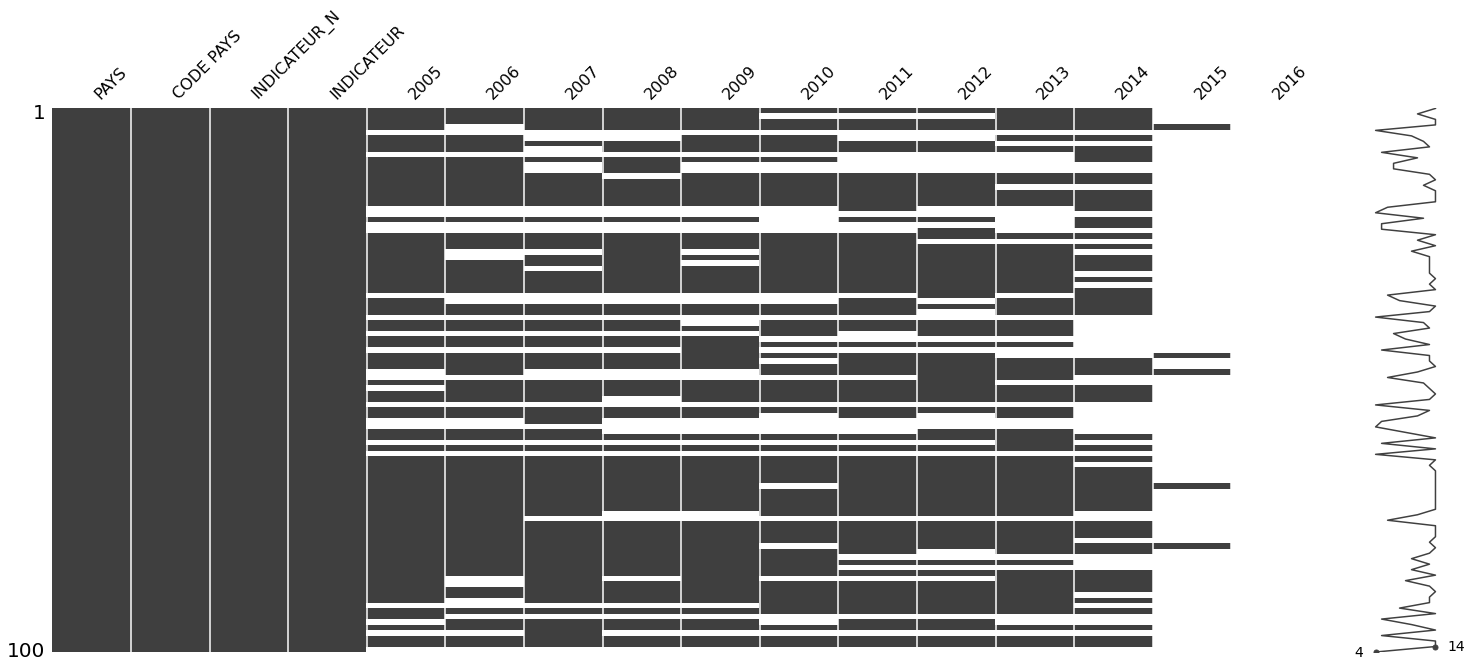

In [132]:
eval_ind('UIS.E.3')

L'indicateur 'UIS.E.3' a un taux de valeur manquante moyen de 37% entre 2005 et 2015. L'indicateur me semble exploitable. Il nous renseigne sur le nombre de lycéens inscrit à l'école publique ou privée sans tenir compte de l'âge. Cette démographie pourrait être visée pour des cours en lignes, type soutien scolaire. 

### 'SE.TER.ENRL':'Total number of students enrolled in public and private tertiary education institutions regardless of age.'

(PAYS            0.000000
 CODE PAYS       0.000000
 INDICATEUR_N    0.000000
 INDICATEUR      0.000000
 2005            0.385714
 2006            0.390476
 2007            0.390476
 2008            0.366667
 2009            0.357143
 2010            0.338095
 2011            0.328571
 2012            0.333333
 2013            0.380952
 2014            0.414286
 2015            0.485714
 2016            0.966667
 dtype: float64,
 0.4281746031746032,
 <AxesSubplot:>)

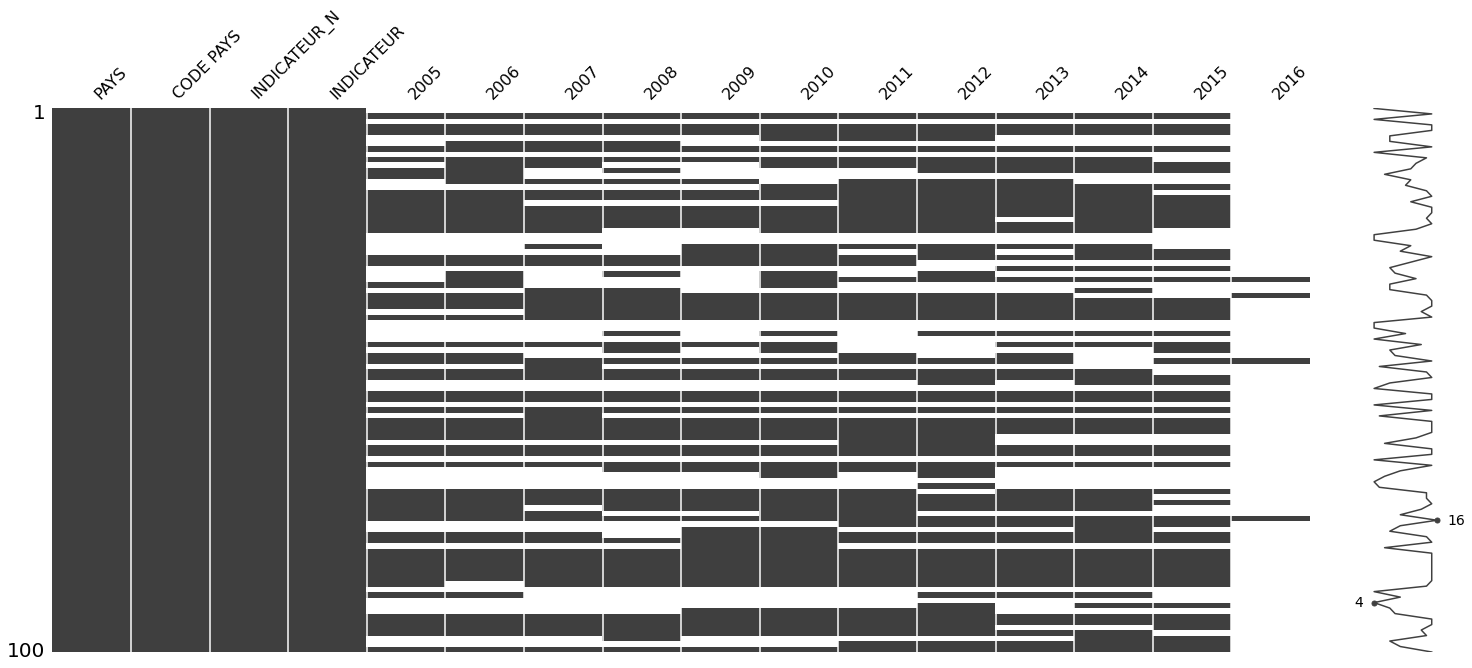

In [133]:
eval_ind('SE.TER.ENRL')

L'indicateur 'SE.TER.ENRL' a un taux de valeur manquante moyen de 39% entre 2005 et 2015. L'indicateur me semble exploitable également.

## <a name="C13"> 2.3. Investissement public </a>  

In [134]:
Series.loc[Series['DOMAINE']== 'Expenditures','INDICATEUR'].unique()

array(['SE.XPD.CUR.TOTL.ZS', 'SE.XPD.PRIM.PC.ZS', 'SE.XPD.PRIM.ZS',
       'SE.XPD.SECO.PC.ZS', 'SE.XPD.SECO.ZS', 'SE.XPD.TERT.PC.ZS',
       'SE.XPD.TERT.ZS', 'SE.XPD.TOTL.GB.ZS', 'SE.XPD.TOTL.GD.ZS',
       'UIS.XGDP.0.FSGOV', 'UIS.XGDP.0.FSGOV.FDINSTADM.FFD',
       'UIS.XGDP.1.FSGOV', 'UIS.XGDP.1.FSGOV.FDINSTADM.FFD',
       'UIS.XGDP.23.FSGOV', 'UIS.XGDP.2T4.V.FSGOV', 'UIS.XGDP.4.FSGOV',
       'UIS.XGDP.4.FSGOV.FDINSTADM.FFD', 'UIS.XGDP.56.FSGOV',
       'UIS.XGDP.FSGOV.FDINSTADM.FFD', 'UIS.XGOVEXP.IMF.0',
       'UIS.XGOVEXP.IMF.1', 'UIS.XGOVEXP.IMF.2', 'UIS.XGOVEXP.IMF.23',
       'UIS.XGOVEXP.IMF.2T4.V', 'UIS.XGOVEXP.IMF.3', 'UIS.XGOVEXP.IMF.4',
       'UIS.XGOVEXP.IMF.56', 'UIS.XPUBP.0', 'UIS.XPUBP.2',
       'UIS.XPUBP.2T4.V', 'UIS.XPUBP.3', 'UIS.XPUBP.4', 'UIS.XPUBP.UK',
       'UIS.XSPENDP.0.FDPUB.FNCAP', 'UIS.XSPENDP.0.FDPUB.FNCUR',
       'UIS.XSPENDP.0.FDPUB.FNNONS', 'UIS.XSPENDP.0.FDPUB.FNS',
       'UIS.XSPENDP.1.FDPUB.FNCAP', 'UIS.XSPENDP.1.FDPUB.FNCUR',
       'UIS.

In [135]:
Series.loc[Series['DOMAINE']== 'School Finance (SABER)',:]

INDICATEUR                 DOMAINE  \
2118       SABER.SCH.FNNC.GOAL1  School Finance (SABER)   
2119  SABER.SCH.FNNC.GOAL1.LVL1  School Finance (SABER)   
2120  SABER.SCH.FNNC.GOAL1.LVL2  School Finance (SABER)   
2121       SABER.SCH.FNNC.GOAL2  School Finance (SABER)   
2122  SABER.SCH.FNNC.GOAL2.LVL1  School Finance (SABER)   
2123  SABER.SCH.FNNC.GOAL2.LVL2  School Finance (SABER)   
2124       SABER.SCH.FNNC.GOAL3  School Finance (SABER)   
2125  SABER.SCH.FNNC.GOAL3.LVL1  School Finance (SABER)   
2126  SABER.SCH.FNNC.GOAL3.LVL2  School Finance (SABER)   
2127       SABER.SCH.FNNC.GOAL4  School Finance (SABER)   
2128  SABER.SCH.FNNC.GOAL4.LVL1  School Finance (SABER)   
2129  SABER.SCH.FNNC.GOAL4.LVL2  School Finance (SABER)   
2130       SABER.SCH.FNNC.GOAL5  School Finance (SABER)   
2131  SABER.SCH.FNNC.GOAL5.LVL1  School Finance (SABER)   
2132  SABER.SCH.FNNC.GOAL5.LVL2  School Finance (SABER)   
2133       SABER.SCH.FNNC.GOAL6  School Finance (SABER)   
2134  SABER.SCH.FNNC.GOAL6.LVL1  School Finance (SABER)   
2135  SABER.SCH.FNNC.GOAL6.LVL2  School Finance (SABER)   

                                         INDICATOR NAME  \
2118  SABER: (School Finance) Policy Goal 1: Ensurin...   
2119  SABER: (School Finance) Policy Goal 1 Lever 1:...   
2120  SABER: (School Finance) Policy Goal 1 Lever 2:...   
2121  SABER: (School Finance) Policy Goal 2: Monitor...   
2122  SABER: (School Finance) Policy Goal 2 Lever 1:...   
2123  SABER: (School Finance) Policy Goal 2 Lever 2:...   
2124  SABER: (School Finance) Policy Goal 3: Oversee...   
2125  SABER: (School Finance) Policy Goal 3 Lever 1:...   
2126  SABER: (School Finance) Policy Goal 3 Lever 2:...   
2127  SABER: (School Finance) Policy Goal 4: Budgeti...   
2128  SABER: (School Finance) Policy Goal 4 Lever 1:...   
2129  SABER: (School Finance) Policy Goal 4 Lever 2:...   
2130  SABER: (School Finance) Policy Goal 5: Providi...   
2131  SABER: (School Finance) Policy Goal 5 Lever 1:...   
2132  SABER: (School Finance) Policy Goal 5 Lever 2:...   
2133  SABER: (School Finance) Policy Goal 6: Managin...   
2134  SABER: (School Finance) Policy Goal 6 Lever 1:...   
2135  SABER: (School Finance) Policy Goal 6 Lever 2:...   

                                       SHORT DEFINITION  \
2118  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2119  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2120  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2121  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2122  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2123  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2124  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2125  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2126  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2127  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2128  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2129  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2130  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2131  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2132  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2133  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2134  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2135  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   

                                        LONG DEFINITION  \
2118  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2119  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2120  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2121  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2122  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2123  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2124  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2125  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2126  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2127  Data Interpretation: 1=Latent; 2=Emerging; 3=E...   
2128  

(PAYS            0.000000
 CODE PAYS       0.000000
 INDICATEUR_N    0.000000
 INDICATEUR      0.000000
 2005            1.000000
 2006            1.000000
 2007            1.000000
 2008            1.000000
 2009            1.000000
 2010            1.000000
 2011            1.000000
 2012            0.985714
 2013            0.995238
 2014            1.000000
 2015            1.000000
 2016            1.000000
 dtype: float64,
 0.9984126984126984,
 <AxesSubplot:>)

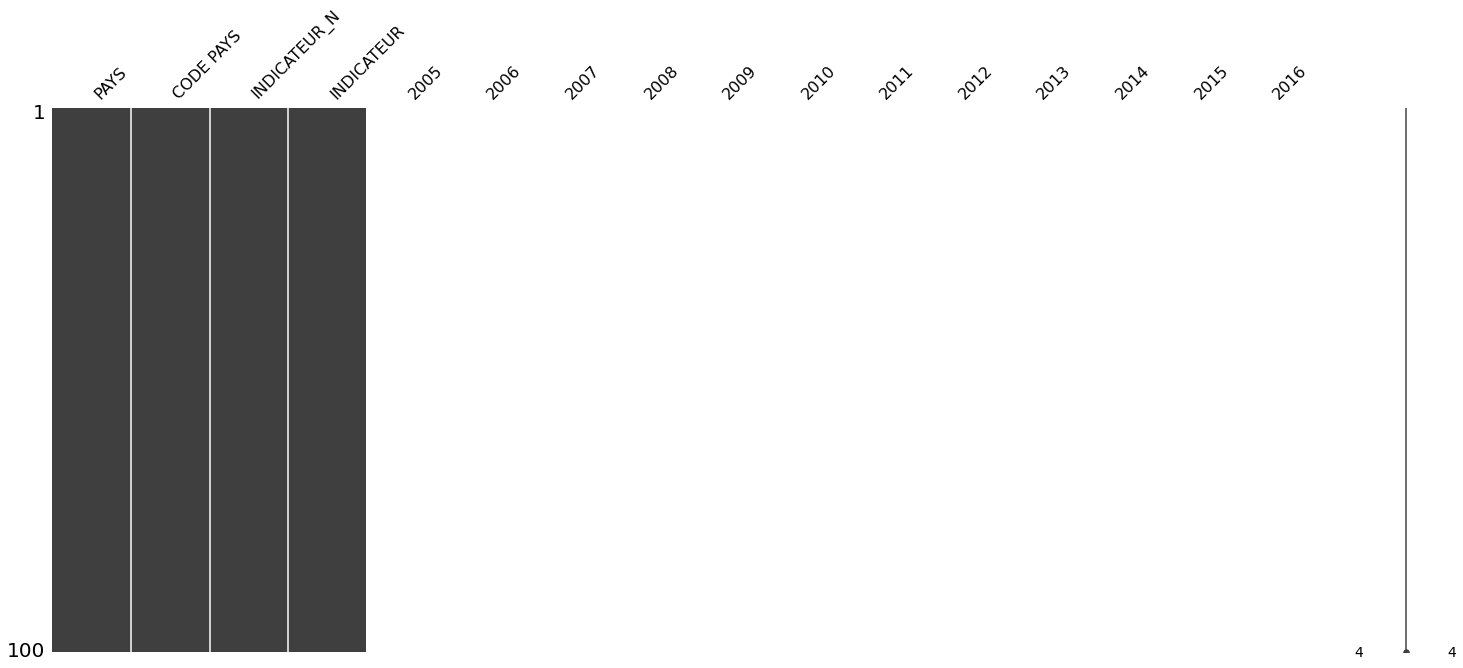

In [136]:
eval_ind('SABER.SCH.FNNC.GOAL2.LVL2')
#Indicateur concernant les finances de l'éducation. Score allant de 1 à 4 pour répondre à la question
#"est-ce que les frais de scolarité représente une grande part des des dépenses des foyers à revenu faible "
#Indicateur intéressant, seulement,
#Les données sont disponibles uniquement pour la Guinée, Haïti, la Jamaique, la Serbie et le Paraguay. 

**Les indicateurs pertinents :**
- UIS.XGDP.56.FSGOV : Total general (local, regional and central) government expenditure in educational institutions (current and capital) for tertiary education, expressed as a percentage of GDP

- UIS.XGDP.3.FSGOV :Government expenditure on upper secondary education as a percentage of GDP (%), Introuvable dans la base de donnée Series et Data.

- UIS.XGDP.23.FSGOV : Government expenditure on secondary education as % of GDP (%)(UIS.XGDP.23.FSGOV)

(PAYS            0.000000
 CODE PAYS       0.000000
 INDICATEUR_N    0.000000
 INDICATEUR      0.000000
 2005            0.590476
 2006            0.580952
 2007            0.580952
 2008            0.542857
 2009            0.504762
 2010            0.466667
 2011            0.504762
 2012            0.571429
 2013            0.647619
 2014            0.833333
 2015            0.995238
 2016            1.000000
 dtype: float64,
 0.6515873015873016,
 <AxesSubplot:>)

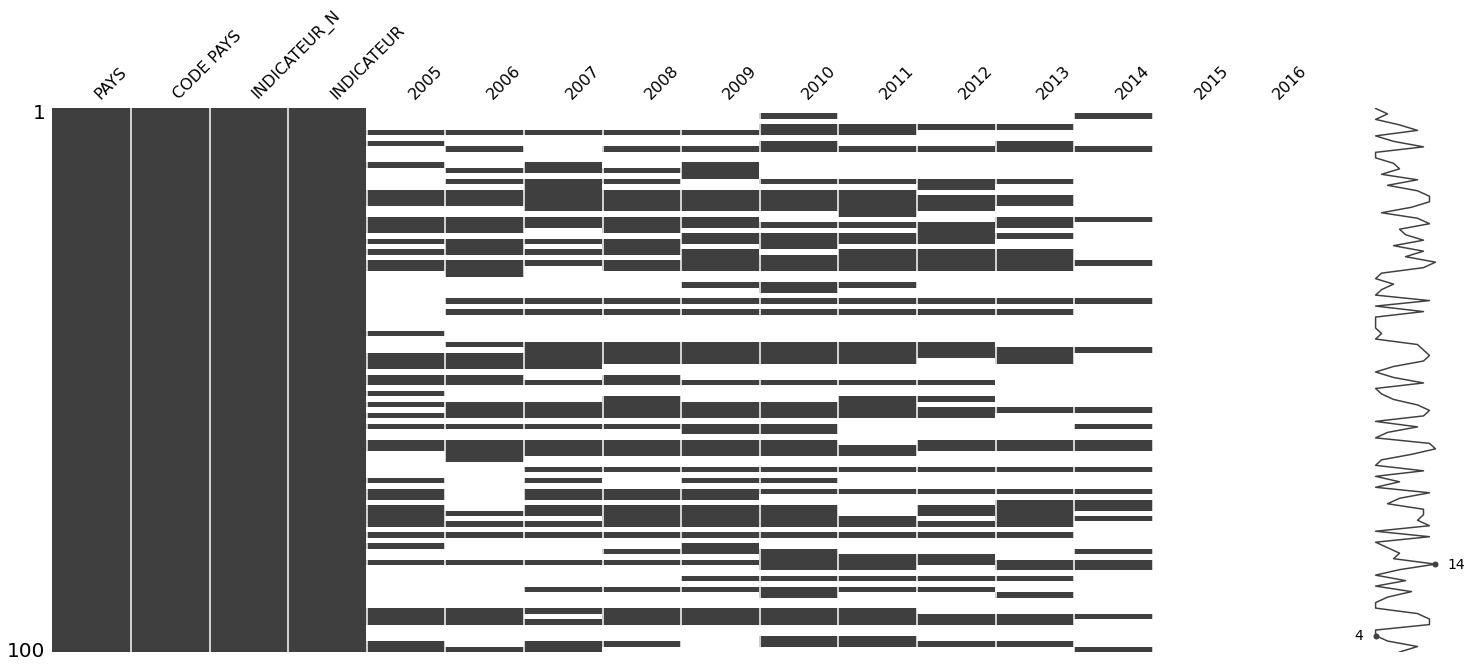

In [137]:
eval_ind('UIS.XGDP.56.FSGOV')

(PAYS            0.000000
 CODE PAYS       0.000000
 INDICATEUR_N    0.000000
 INDICATEUR      0.000000
 2005            0.623810
 2006            0.633333
 2007            0.600000
 2008            0.547619
 2009            0.533333
 2010            0.490476
 2011            0.495238
 2012            0.595238
 2013            0.647619
 2014            0.819048
 2015            0.995238
 2016            1.000000
 dtype: float64,
 0.665079365079365,
 <AxesSubplot:>)

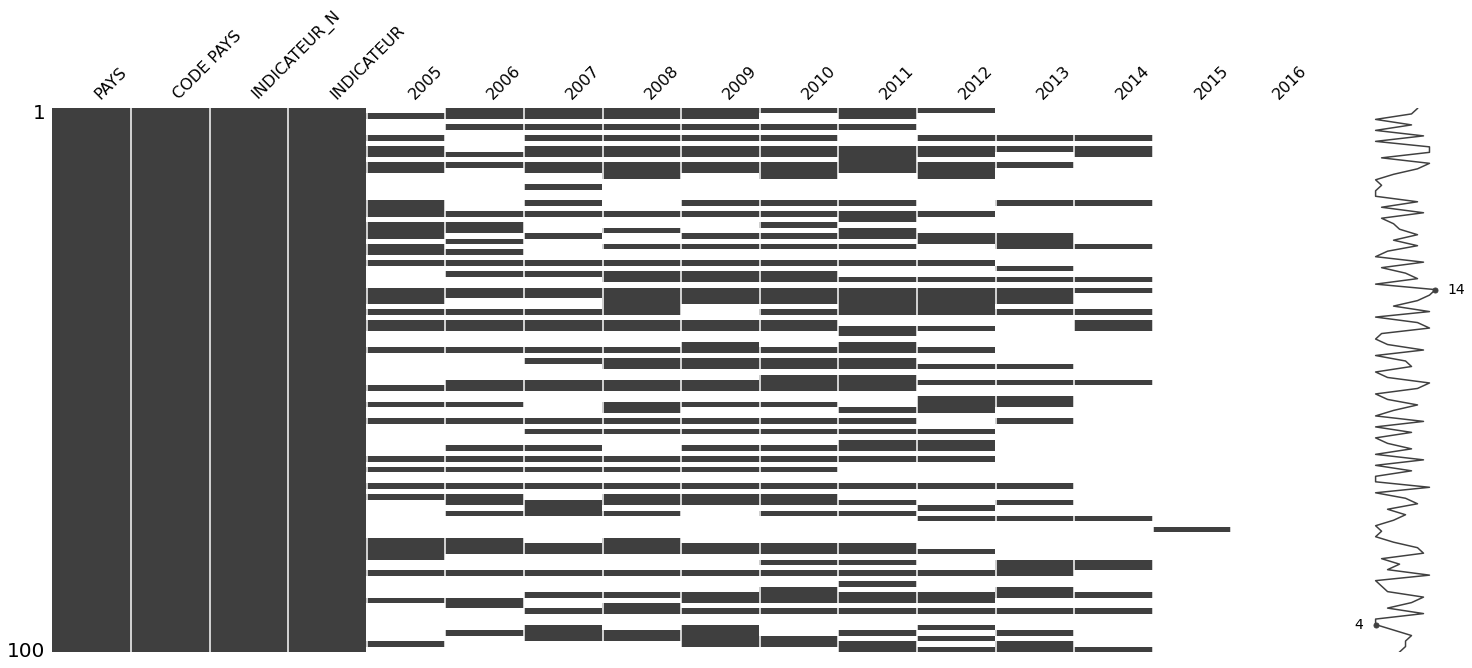

In [138]:
eval_ind('UIS.XGDP.23.FSGOV')

Indicateur à part, qualité de l'enseignement. 
### 'UIS.QUTP.2T3' : le pourcentage d'enseignants ayant les qualifications pour enseigner au secondaire

- 'UIS.QUTP.2T3' : le pourcentage d'enseignants ayant les qualifications pour enseigner au secondaire

(PAYS            0.000000
 CODE PAYS       0.000000
 INDICATEUR_N    0.000000
 INDICATEUR      0.000000
 2005            1.000000
 2006            1.000000
 2007            1.000000
 2008            1.000000
 2009            1.000000
 2010            1.000000
 2011            1.000000
 2012            0.995238
 2013            0.833333
 2014            0.785714
 2015            0.976190
 2016            1.000000
 dtype: float64,
 0.965873015873016,
 <AxesSubplot:>)

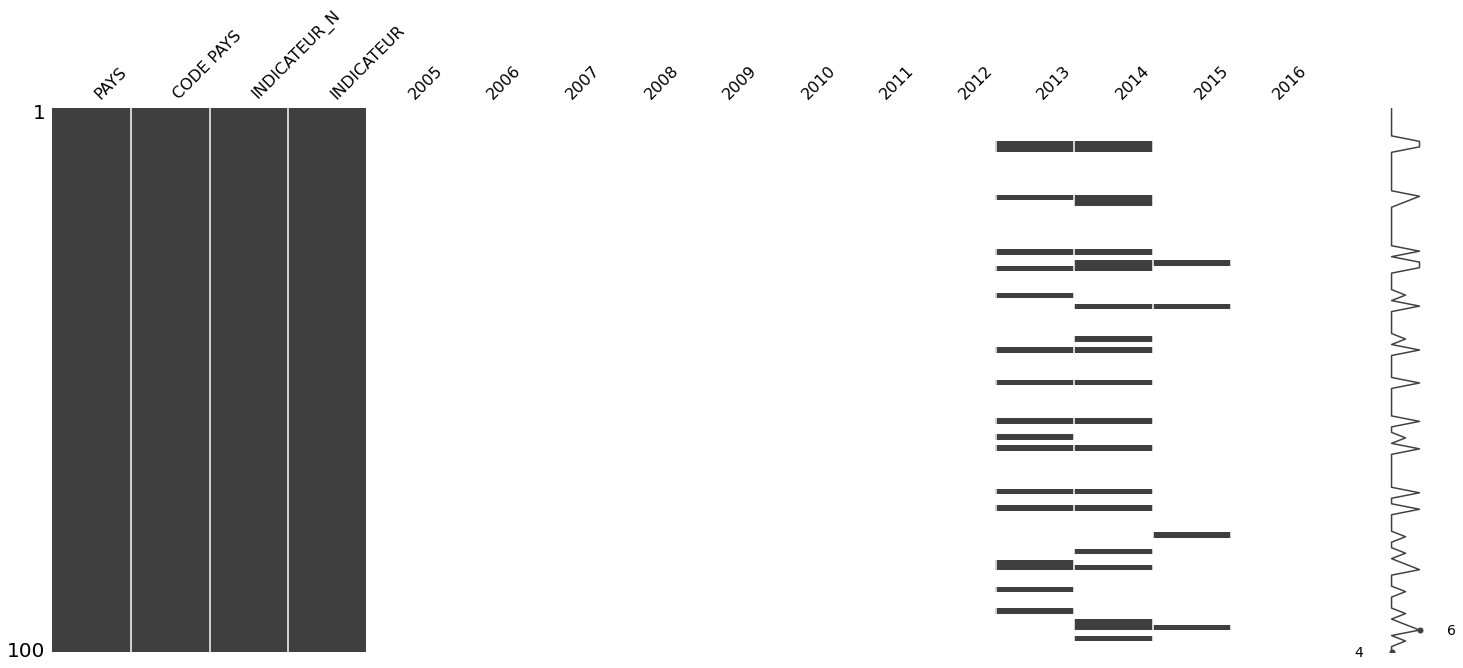

In [139]:
eval_ind('UIS.QUTP.2T3')

### Conclusion 2.3 
Pour répondre aux critères d'investissement public, je retiens les deux indicateurs suivants : 

- UIS.XGDP.56.FSGOV : Total des dépenses du gouvernement pour l’éducation pour le cycle tertiaire (%PIB)

- UIS.XGDP.23.FSGOV : Total des dépenses du gouvernement pour l’éducation pour le cycle secondaire (%PIB)

H2 : je suppose qu'un gouvernement qui investit moins dans son éducation alors que les revenus des familles sont élevé, laisse une place pour ***academy***

##  <a name="C14"> 2.4. Pouvoir d'achat</a>  

In [140]:
Country_sub.head()

CODE PAYS         PAYS                     REGION               REVENUS
0       ABW        Aruba  Latin America & Caribbean  High income: nonOECD
1       AFG  Afghanistan                 South Asia            Low income
2       AGO       Angola         Sub-Saharan Africa   Upper middle income
3       ALB      Albania      Europe & Central Asia   Upper middle income
4       AND      Andorra      Europe & Central Asia  High income: nonOECD

Pour une pré-analyse je me base sur les catégories de revenus renseignées dans la table Country_sub. Pour répondre au critère de pouvoir d'achat.

##  <a name="C15"> 2.5. Conclusion Partie 2  </a>  

Pour chaque critère identifié, un ou plusieurs indicateurs ont été choisi. Néanmoins, tous les indicateurs ne sont pas renseignés totalement et les taux moyen de valeurs manquantes varient entre 85% pour l'indicateur 'IT.CMP.PCMP.P2' qui mesure l'accès à un ordinateur personnel et 6,2% pour l'indicateur 'IT.NET.USER.P2' relatif à l'accès à internet.

**NB : Les critères relatifs à la taille de la population et à son évolution ne sont pas renseignés dans la base de donnée fournie. Le nombre d'étudiants inscrits pourra donner une idée indirecte sur la taille de la population** 

Ci-dessous : la sélection des indicateurs issu des données fournies.

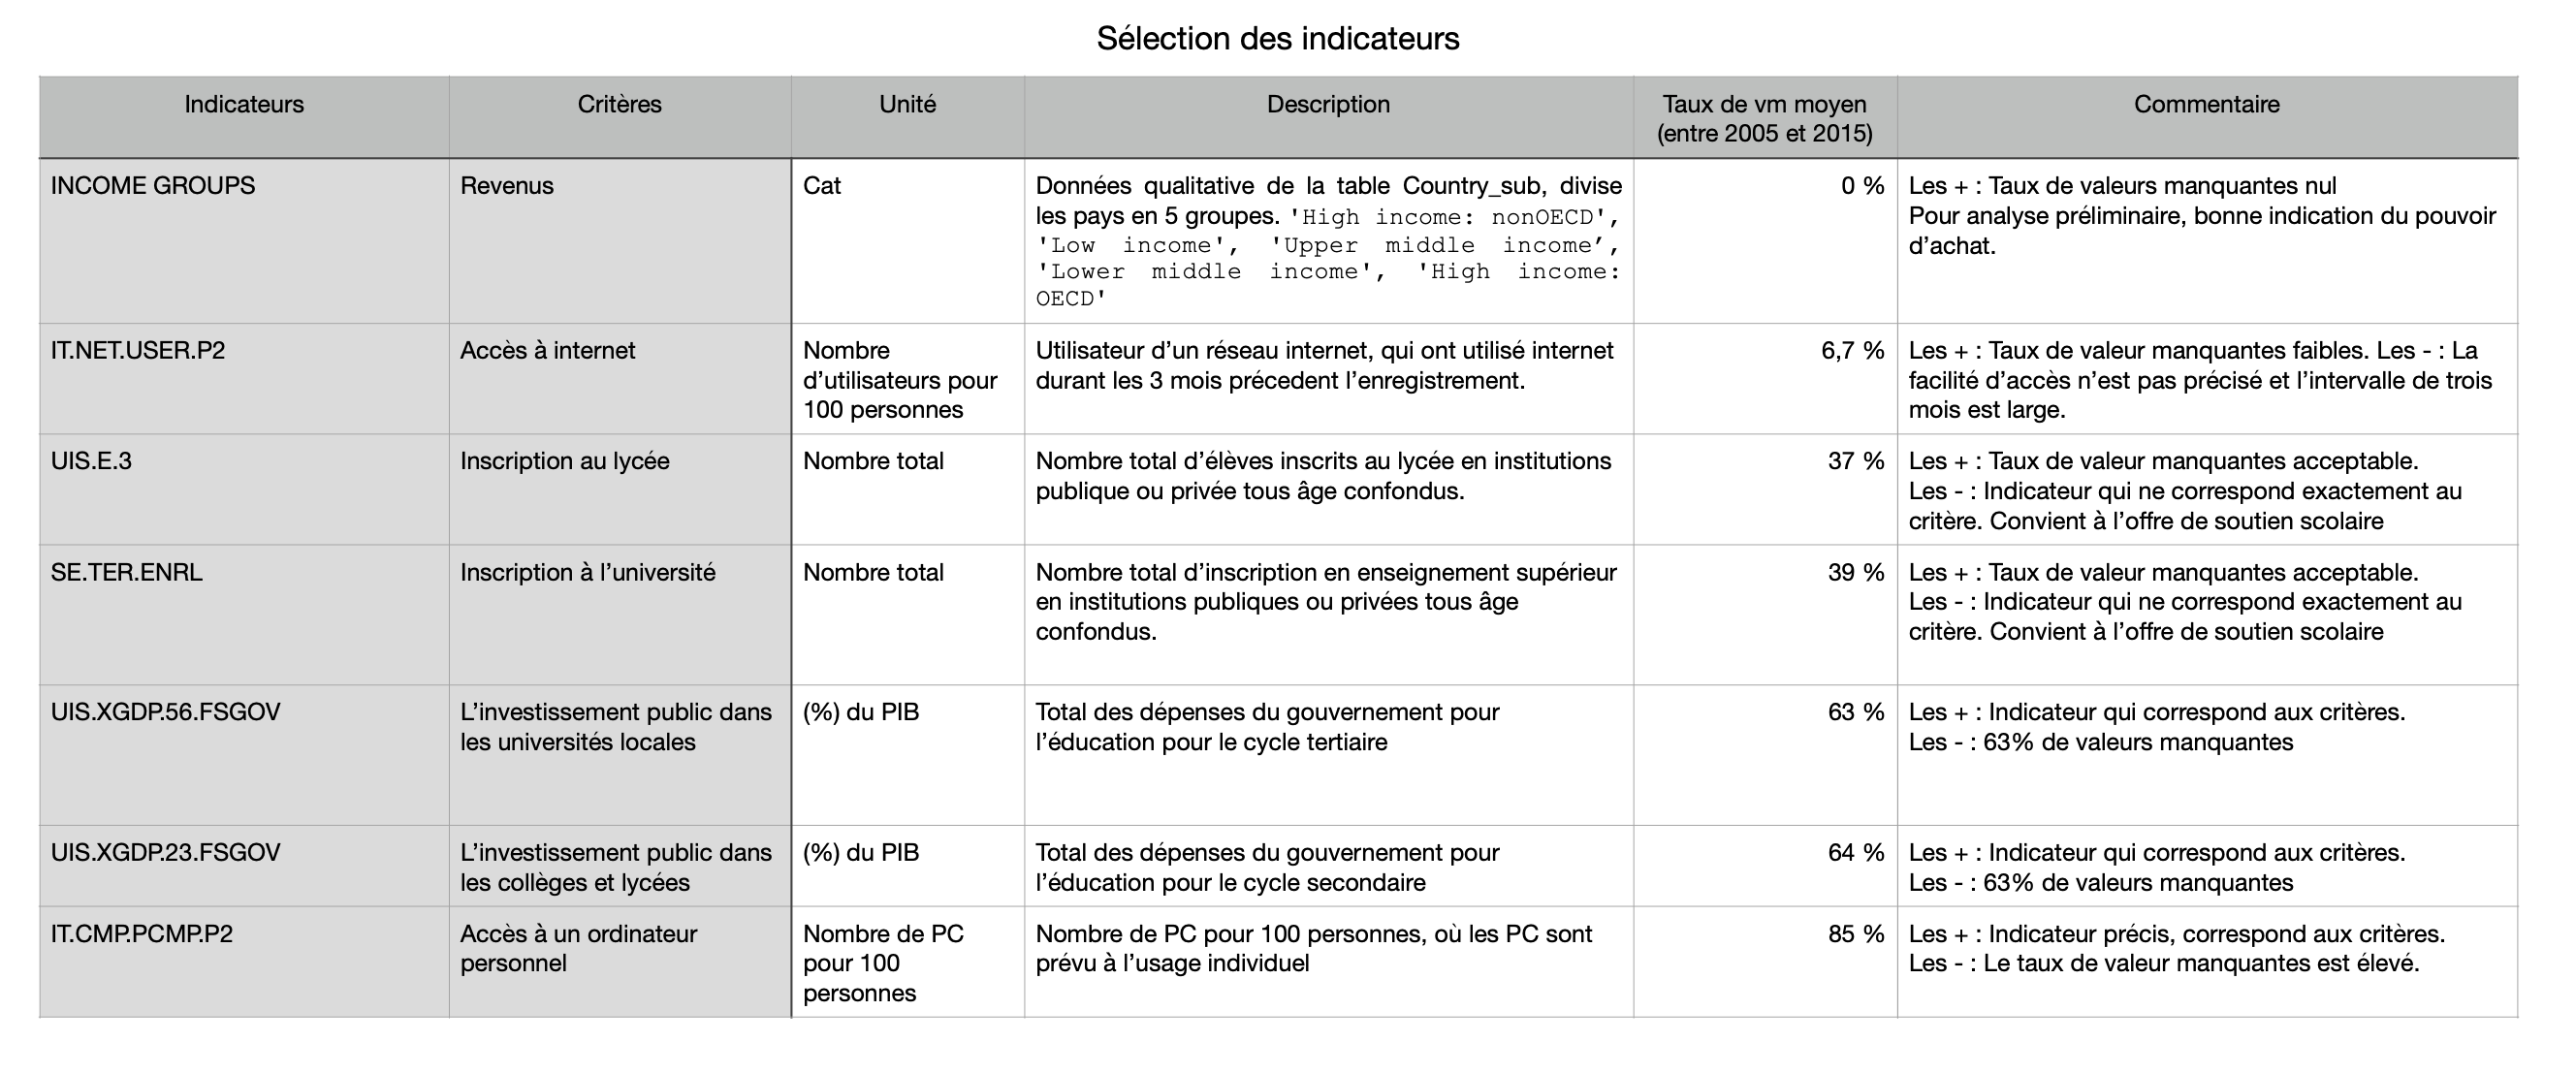

# <a name="C16"> 3. Mesure du potentiel </a> 

Dans cette partie je tente d'implémenter un système de notation compris entre 1 et 5. 

Pour chaque indicateur, chaque pays reçoit une note allant de 1 à 5. En fonction de l'importance de chacun des critères, le score final sera une moyenne pondérée de chaque score. 

Je crée deux indicateurs relatifs à l'investissement du gouvernement dans l'éducation et les niveaux de revenus : DIFF.INVGOV.REVENU.56 et DIFF.INVGOV.REVENU.23. Plus la différence entre le score revenu et le score investissement est importante plus mon score DIFF.INVGOV.REVENU.XX est élevé. 

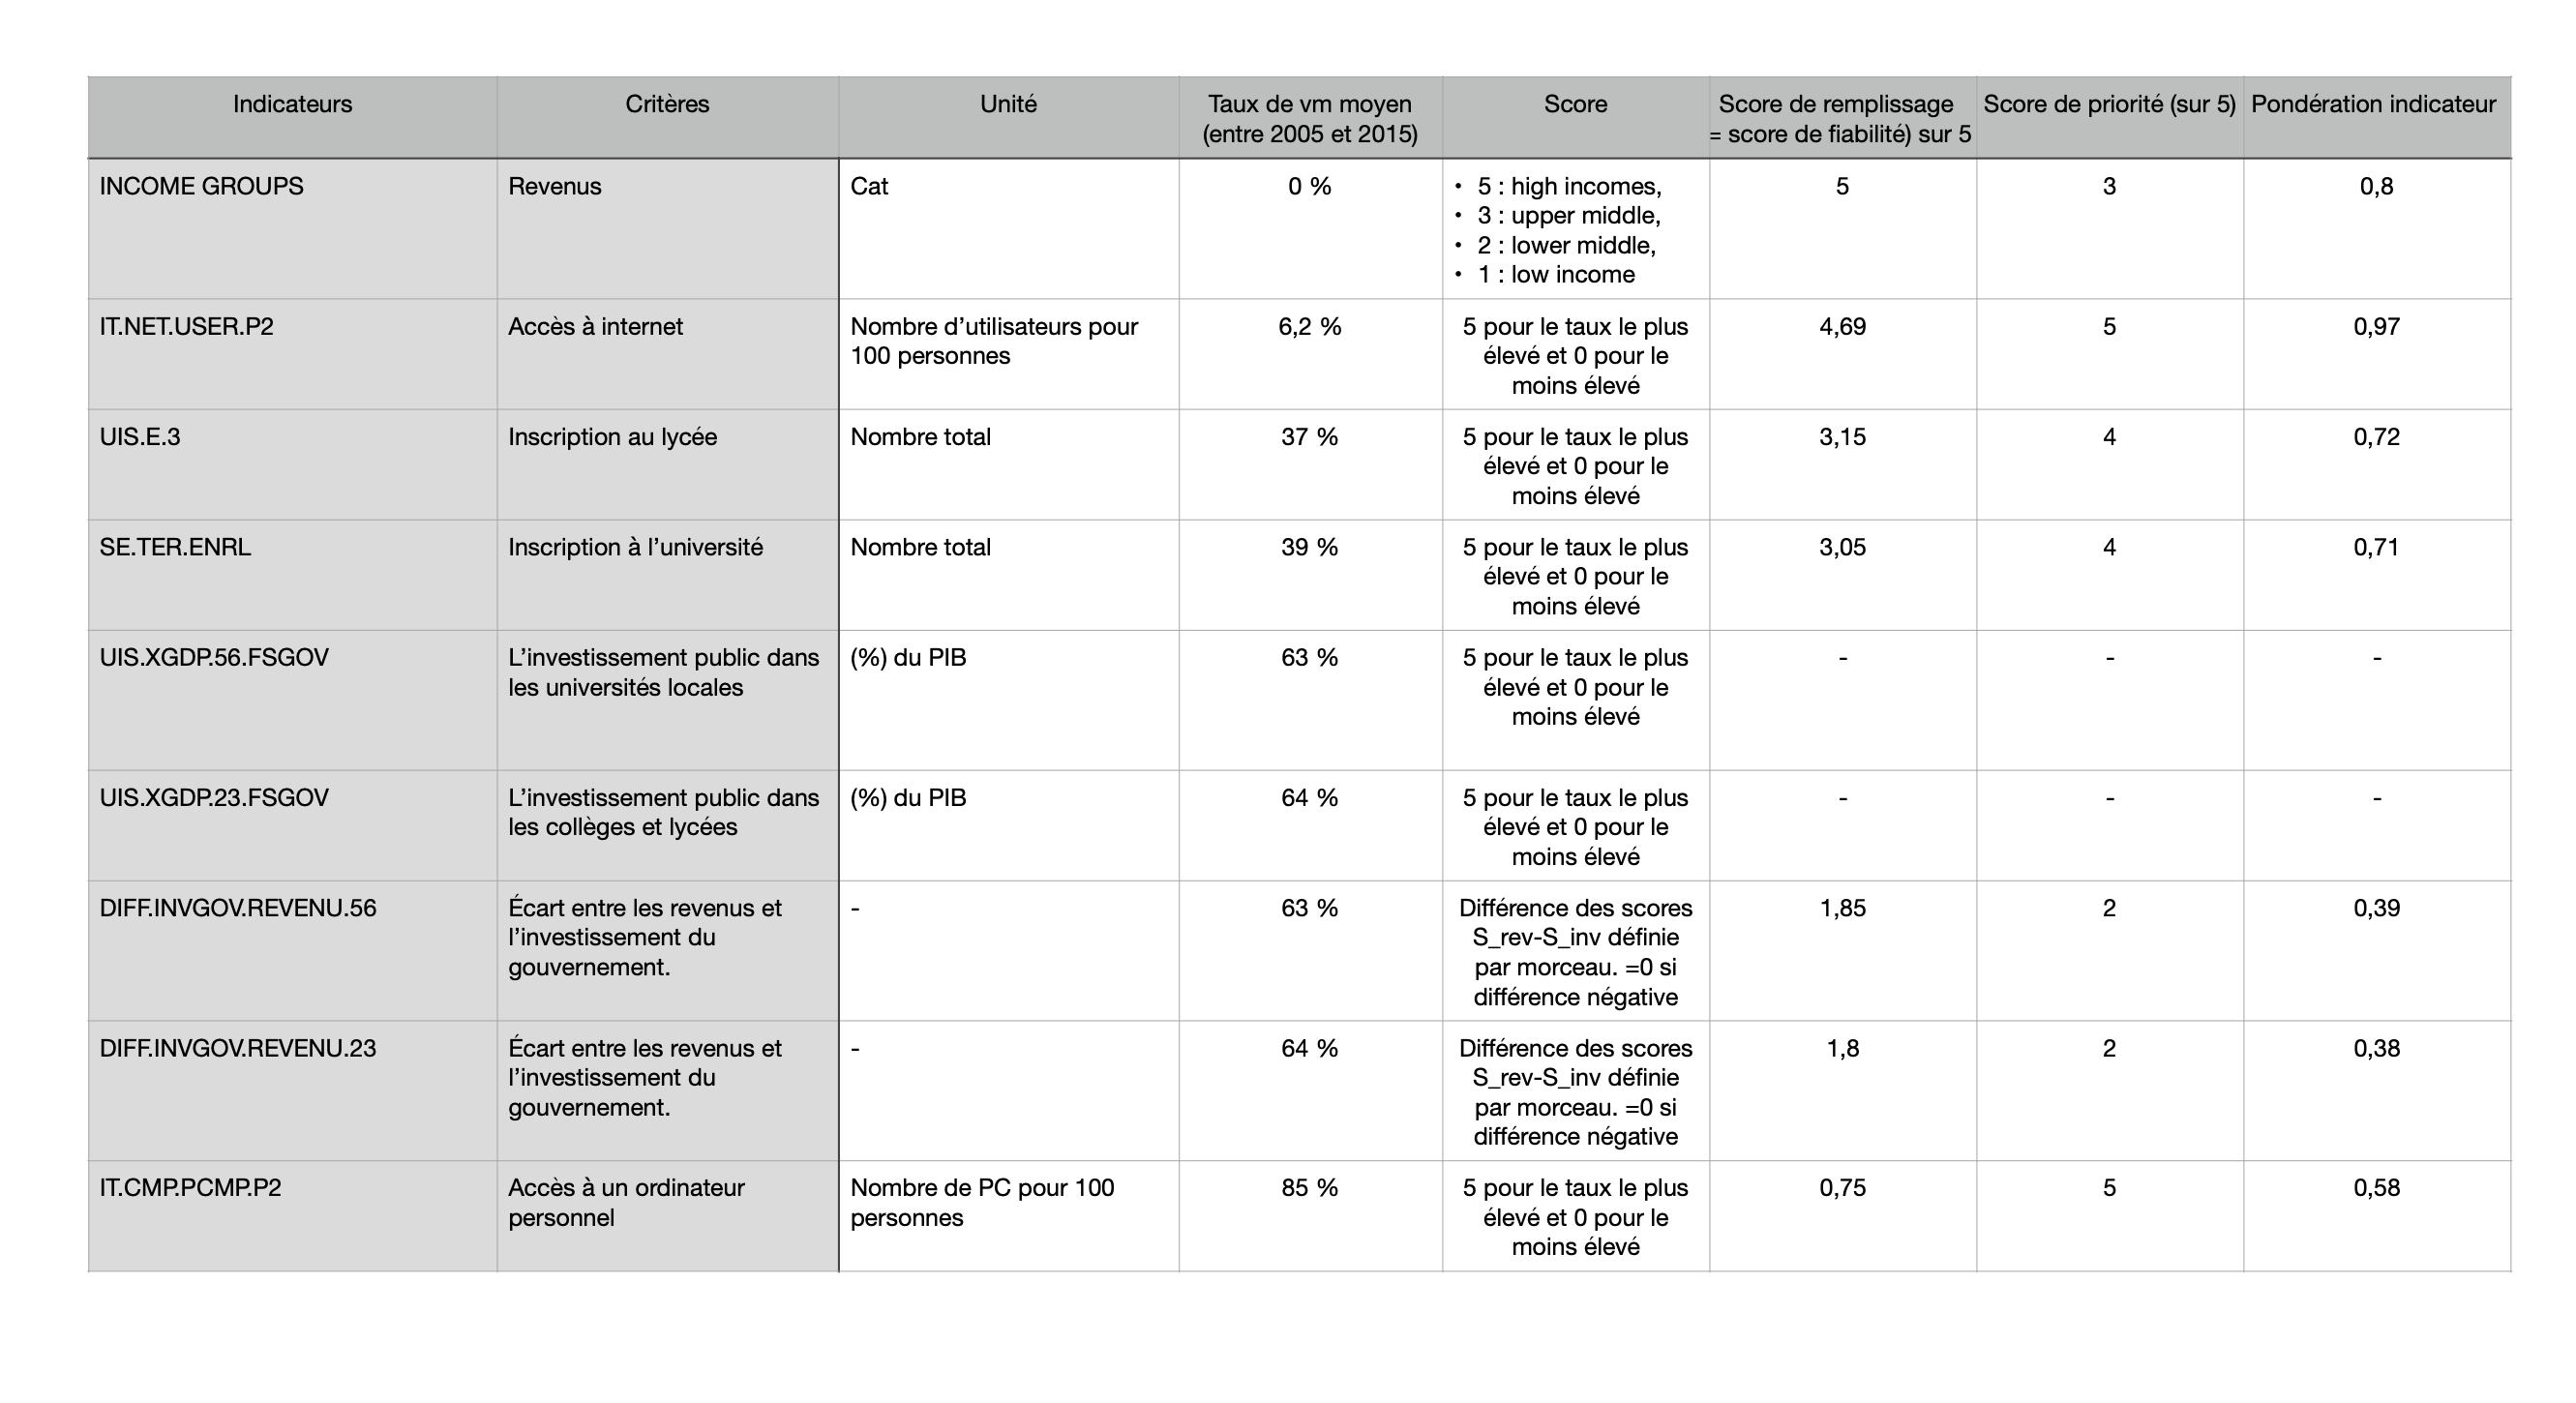


## <a name="C17"> 3.1 Table ***Data_update*** et extraction des données récentes </a> 

Pour mesurer le potentiel je choisie de créer une table ***Data_update*** dont la clé primaire serait le pays et l'un des indicateurs sélectionnés. La colonne MAJ répertorie les valeurs mise à jour pour chaque indicateur, la colonne ANNEE_MAJ donne l'année d'estimation de la donnée. 

J'inclue dans le table ***Data_update*** les années 2005 à 2020 et uniquement les lignes qui correspondent aux indicateurs sélectionnés. L'année 2022 étant indisponible, l'année la plus récente, hors projection est donc l'année 2020. 

In [141]:
CRIT = [] #Liste des indicateurs/critères sélectionnés
CRIT = ['IT.NET.USER.P2','UIS.E.3',
 'SE.TER.ENRL',
 'UIS.XGDP.56.FSGOV',
 'UIS.XGDP.23.FSGOV',
 'IT.CMP.PCMP.P2']

#Création de la table Data_update
Data1 = Data.iloc[:, 0:4]
Data2 = Data.iloc[:,-30:-16] #Je choisi d'inclure toutes les années de 2005 à 2020
#L'année 2022 est indisponible, passage direct à l'année 2025 en projection.

Data1 = Data1.reset_index()
Data2 = Data2.reset_index()

Data_update = pd.merge(Data1,Data2,on='index')
Data_update = Data_update.loc[Data_update['INDICATEUR'].isin(CRIT)]

Data_update = Data_update.drop(columns='index')
Data_update.head()

PAYS CODE PAYS  \
1204  Afghanistan       AFG   
1214  Afghanistan       AFG   
1265  Afghanistan       AFG   
1266  Afghanistan       AFG   
1375  Afghanistan       AFG   

                                           INDICATEUR_N         INDICATEUR  \
1204  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
1214  Enrolment in upper secondary education, both s...            UIS.E.3   
1265  Government expenditure on secondary education ...  UIS.XGDP.23.FSGOV   
1266  Government expenditure on tertiary education a...  UIS.XGDP.56.FSGOV   
1375                    Internet users (per 100 people)     IT.NET.USER.P2   

               2005           2006      2007       2008       2009      2010  \
1204            NaN            NaN       NaN        NaN   95185.00       NaN   
1214  190104.000000  271144.000000  285290.0  361193.00  443002.00  567344.0   
1265            NaN            NaN       NaN        NaN        NaN       NaN   
1266            NaN            NaN       NaN        NaN        NaN       NaN   
1375       1.224148       2.107124       1.9       1.84       3.55       4.0   

          2011           2012      2013      2014  2015       2016  2017  2020  
1204   97504.0            NaN       NaN  262874.0   NaN        NaN   NaN   NaN  
1214  743405.0  881415.000000  969267.0  968769.0   NaN        NaN   NaN   NaN  
1265       NaN            NaN       NaN       NaN   NaN        NaN   NaN   NaN  
1266       NaN            NaN       NaN       NaN   NaN        NaN   NaN   NaN  
1375       5.0       5.454545       5.9       7.0  8.26  10.595726   NaN   NaN

In [142]:
#Suppression des lignes entièrement vide 
Data_update['NB_NAN'] = Data_update.isna().sum(axis=1)
print('nombre max de valeur manquantes:',Data_update['NB_NAN'].max())
print('nombre de ligne avant suppression',Data_update.shape[0])

inter=14 #nombre de colonne de 2005 - 2020 inclues
Data_update = Data_update[Data_update['NB_NAN'] < 14]
print('nombre de ligne après suppression',Data_update.shape[0])

Data_update = Data_update.reset_index()
Data_update = Data_update.drop(columns='index')
Data_update.head()

nombre max de valeur manquantes: 14
nombre de ligne avant suppression 1260
nombre de ligne après suppression 1060


PAYS CODE PAYS                                       INDICATEUR_N  \
0  Afghanistan       AFG  Enrolment in tertiary education, all programme...   
1  Afghanistan       AFG  Enrolment in upper secondary education, both s...   
2  Afghanistan       AFG                    Internet users (per 100 people)   
3  Afghanistan       AFG                Personal computers (per 100 people)   
4      Albania       ALB  Enrolment in tertiary education, all programme...   

       INDICATEUR           2005           2006      2007       2008  \
0     SE.TER.ENRL            NaN            NaN       NaN        NaN   
1         UIS.E.3  190104.000000  271144.000000  285290.0  361193.00   
2  IT.NET.USER.P2       1.224148       2.107124       1.9       1.84   
3  IT.CMP.PCMP.P2       0.341903       0.390148       NaN        NaN   
4     SE.TER.ENRL   63257.000000   74747.000000   86863.0   90606.00   

        2009      2010      2011           2012      2013      2014  \
0   95185.00       NaN   97504.0            NaN       NaN  262874.0   
1  443002.00  567344.0  743405.0  881415.000000  969267.0  968769.0   
2       3.55       4.0       5.0       5.454545       5.9       7.0   
3        NaN       NaN       NaN            NaN       NaN       NaN   
4   93139.00  122326.0  134877.0  160839.000000  173029.0  173819.0   

        2015       2016  2017  2020  NB_NAN  
0        NaN        NaN   NaN   NaN      11  
1        NaN        NaN   NaN   NaN       4  
2       8.26  10.595726   NaN   NaN       2  
3        NaN        NaN   NaN   NaN      12  
4  160527.00        NaN   NaN   NaN       3

In [143]:
Data_update['MAJ']= np.isnan #initialisation de la colonne MAJ
Data_update['ANNÉE_MAJ']='' #initialisation de la colonne ANNEE_MAJ
col= Data_update.columns[4:-3].tolist()

for i,row in Data_update.iterrows():
    #print('check0',i)
    for j in reversed(col):
        if not(np.isnan(row[j])):
            a = row[j]
            break       
    Data_update.iloc[i,-2]=a
    Data_update.iloc[i,-1]=j

In [144]:
Data_update = Data_update[['PAYS', 'CODE PAYS', 'INDICATEUR_N','INDICATEUR','MAJ','ANNÉE_MAJ','NB_NAN']]
Data_update.head(10)

PAYS CODE PAYS                                       INDICATEUR_N  \
0  Afghanistan       AFG  Enrolment in tertiary education, all programme...   
1  Afghanistan       AFG  Enrolment in upper secondary education, both s...   
2  Afghanistan       AFG                    Internet users (per 100 people)   
3  Afghanistan       AFG                Personal computers (per 100 people)   
4      Albania       ALB  Enrolment in tertiary education, all programme...   
5      Albania       ALB  Enrolment in upper secondary education, both s...   
6      Albania       ALB  Government expenditure on secondary education ...   
7      Albania       ALB  Government expenditure on tertiary education a...   
8      Albania       ALB                    Internet users (per 100 people)   
9      Albania       ALB                Personal computers (per 100 people)   

          INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
0        SE.TER.ENRL   262874.0      2014      11  
1            UIS.E.3   968769.0      2014       4  
2     IT.NET.USER.P2  10.595726      2016       2  
3     IT.CMP.PCMP.P2   0.390148      2006      12  
4        SE.TER.ENRL   160527.0      2015       3  
5            UIS.E.3   151937.0      2014       4  
6  UIS.XGDP.23.FSGOV    0.70164      2013      13  
7  UIS.XGDP.56.FSGOV    0.77585      2013      13  
8     IT.NET.USER.P2  66.363445      2016       2  
9     IT.CMP.PCMP.P2   4.593538      2008      10

In [145]:
Data_update.loc[Data_update['INDICATEUR']=='SE.TER.ENRL','INDICATEUR_N']='Nombre d\'inscription à l\'université'
Data_update.loc[Data_update['INDICATEUR']=='UIS.E.3','INDICATEUR_N']='Nombre d\'inscription au lycée'
Data_update.loc[Data_update['INDICATEUR']=='IT.NET.USER.P2','INDICATEUR_N']='Nombre d\'utilisateurs d\'internet (%)'
Data_update.loc[Data_update['INDICATEUR']=='IT.CMP.PCMP.P2','INDICATEUR_N']='Nombre d\'utilisateurs ayant un PC (%)'
Data_update.loc[Data_update['INDICATEUR']=='UIS.XGDP.23.FSGOV','INDICATEUR_N']= 'Dépenses du gouvernement dédiées au cycle secondaire (%PIB)'
Data_update.loc[Data_update['INDICATEUR']=='UIS.XGDP.56.FSGOV','INDICATEUR_N']= 'Dépenses du gouvernement dédiées au cycle tertiaire (%PIB)'
#Data_update[Data_update['ANNÉE_MAJ']==2020]
#Data_update[Data_update['ANNÉE_MAJ']==2017]
#Data_update.sort_values('ANNÉE_MAJ', ascending =False)

In [146]:
Data_update.isna().mean()

PAYS            0.0
CODE PAYS       0.0
INDICATEUR_N    0.0
INDICATEUR      0.0
MAJ             0.0
ANNÉE_MAJ       0.0
NB_NAN          0.0
dtype: float64

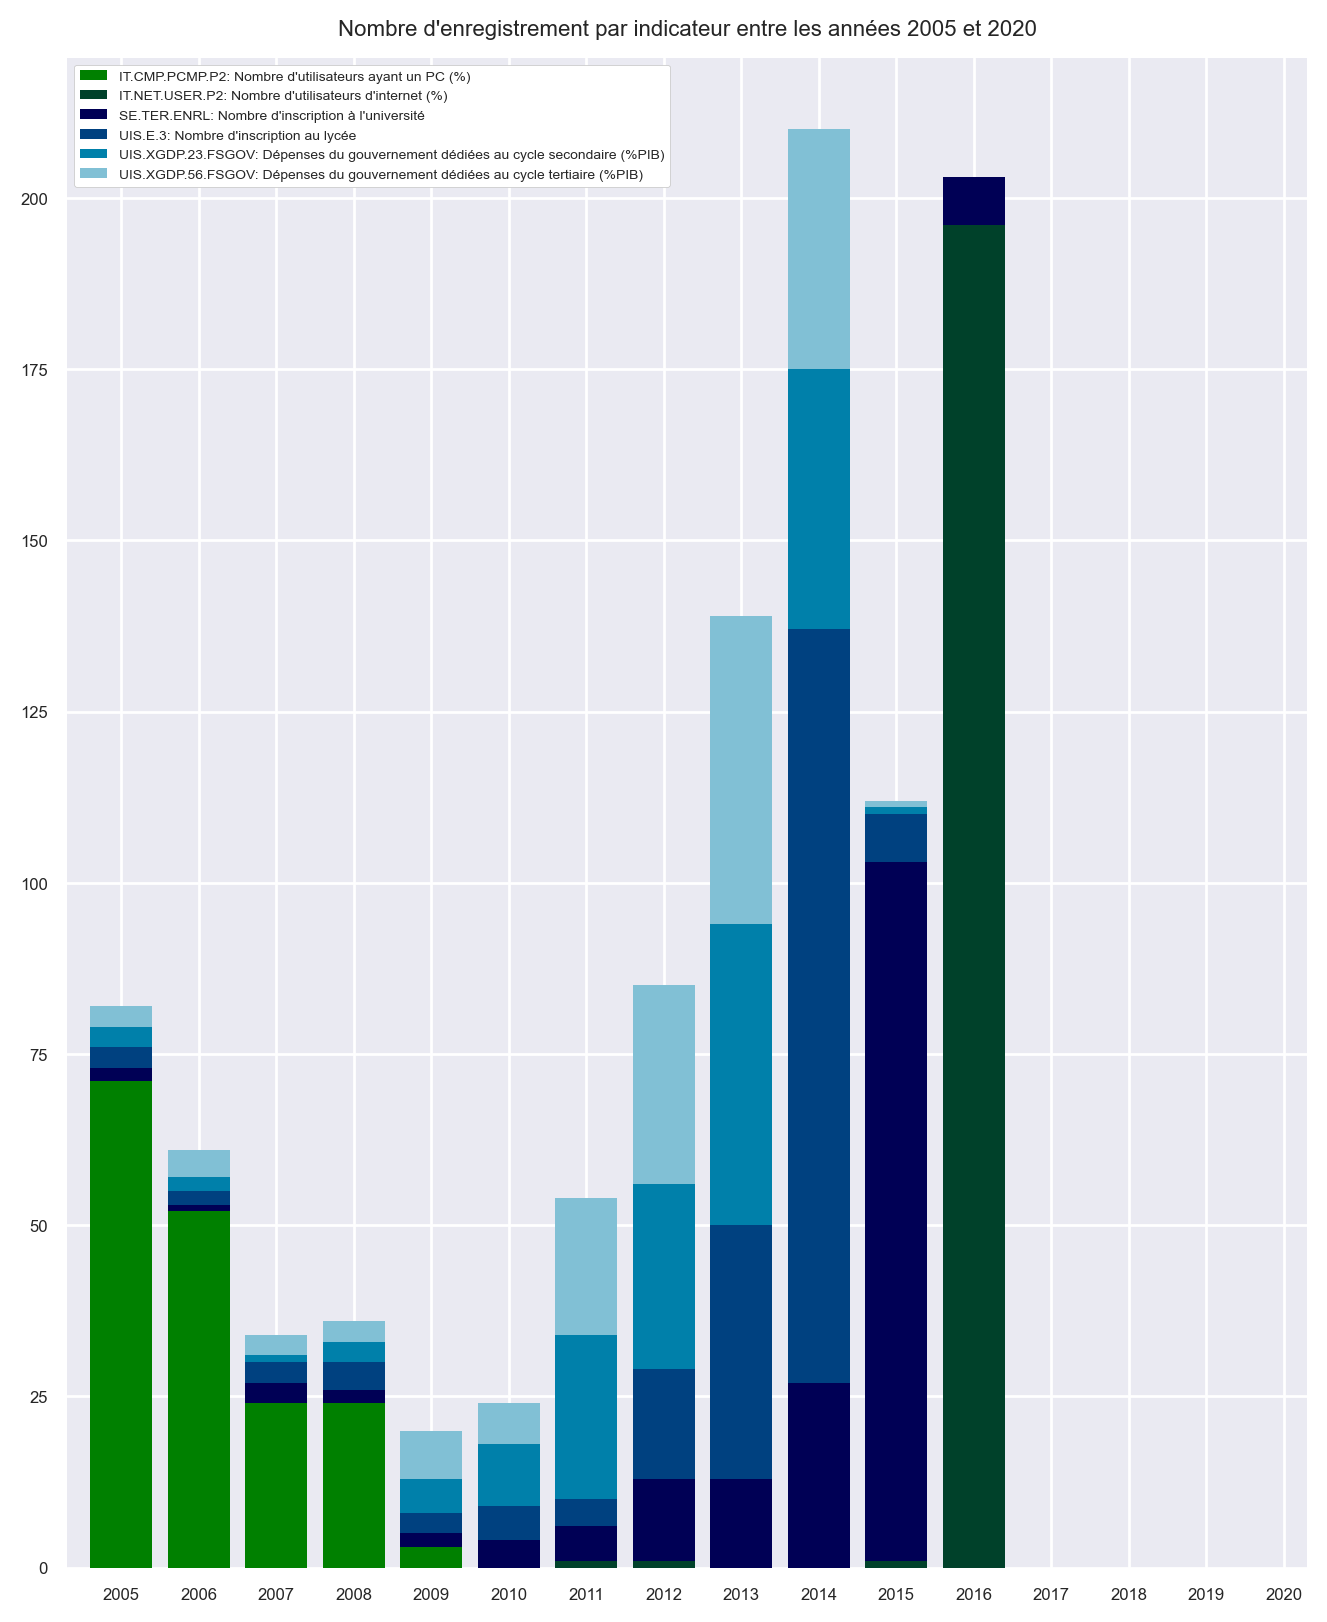

In [147]:
df_tampon = Data_update[['INDICATEUR','MAJ','ANNÉE_MAJ','INDICATEUR_N']]
df_tampon = df_tampon.sort_values('INDICATEUR')

indic_ls = df_tampon['INDICATEUR'].unique().tolist()
df_count = df_tampon.groupby(['INDICATEUR','INDICATEUR_N','ANNÉE_MAJ'])['MAJ'].count()
df_count = df_count.reset_index()
df_count = df_count.rename(columns={'MAJ':'COMPTE'})
df_count['ANNÉE_MAJ'] = pd.to_numeric(df_count['ANNÉE_MAJ'])
#print(df_count.dtypes)
#plt.rc('font', family='courrier')
Annee_X = df_count['ANNÉE_MAJ'].unique().tolist()
Annee_X = Annee_X.sort()
an = np.arange(2005,2021)

bot = np.array([an,np.zeros(len(an))])
df_bot = pd.DataFrame(data = bot,columns = an)
df_bot.loc[0] = 0
x  = an
y = np.zeros(len(an))
y_0 = np.zeros(len(an))
plt.style.use('seaborn')
fig, ax = plt.subplots(dpi=200, figsize=(8,10))
cmap = plt.cm.ocean
col = (np.arange(0,7))/6

for c,indic in enumerate(indic_ls):
    #print(c)
    #print('check indic', indic)
    sub_count = df_count.loc[df_count['INDICATEUR']==indic,:]
    #print(sub_count)OK
    df_bot.loc[c+1] = 0
    for j,row in sub_count.iterrows():
        a = row['ANNÉE_MAJ']
        df_bot.loc[c+1,a] = row['COMPTE'] 
        #print(df_bot) OK 
    y_0 += y
    #print('y et y_0',y, y_0)
    y = df_bot.loc[c+1].values
    desc = df_count.loc[df_count['INDICATEUR']==indic,'INDICATEUR_N'].values[0]
    ax.bar(x, y, label = indic+': '+desc ,bottom = y_0 , color = cmap(col)[c]) 
ax.set_ylabel('')
ax.set_title('Nombre d\'enregistrement par indicateur entre les années 2005 et 2020',
             fontsize = 8, pad = 8) 
ax.legend(fontsize = 5, loc = 'upper left', frameon= True, 
          framealpha = 1.0, facecolor= 'white')
plt.xlim(right = 2020.3, left =2004.3) 
plt.xticks(an)
plt.tick_params(labelsize =6,bottom = True)
plt.show()


#save plot
fig.savefig('P2_3_1_1.png', dpi=200, bbox_inches = 'tight')

**Remarque :**
Les années 2017 et 2020 ne renferment aucune données relatives aux indicateurs sélectionnés. 
Les valeurs les plus récentes, datent de l'année 2016. L'indicateur IT.CMP.PCMP.P2, relatif à l'accès à un ordinateur personnel n'est pas renseigné au delà de l'année 2009. Entre temps de nombreux moyens et appareils ont permis d'accéder à un internet. 

Il n'est pas précisé dans l'énoncé par quel moyen les cours de ***academy*** sont accessibles. 

## (H2) : Hypothèse : 
Je suppose que les contenus de formation de ***academy*** sont accessibles par PC, tablettes et smartphones.

Au vue des éléments précédents, je supprime de ma liste l'indicateur 'IT.CMP.PCMP.P2'. De plus, l'indicateur 'IT.NET.USER.P2' relatif à l'accès à internet, prend en compte tous types d'accès via PC, tablettes, smartphone, box tv et les derniers enregistrement datent de 2016. 

In [148]:
mask = Data_update['INDICATEUR']=='IT.CMP.PCMP.P2'
Data_update=Data_update[~mask] 
Data_update

PAYS CODE PAYS  \
0     Afghanistan       AFG   
1     Afghanistan       AFG   
2     Afghanistan       AFG   
4         Albania       ALB   
5         Albania       ALB   
...           ...       ...   
1054     Zimbabwe       ZWE   
1055     Zimbabwe       ZWE   
1056     Zimbabwe       ZWE   
1057     Zimbabwe       ZWE   
1058     Zimbabwe       ZWE   

                                           INDICATEUR_N         INDICATEUR  \
0                   Nombre d'inscription à l'université        SE.TER.ENRL   
1                         Nombre d'inscription au lycée            UIS.E.3   
2                  Nombre d'utilisateurs d'internet (%)     IT.NET.USER.P2   
4                   Nombre d'inscription à l'université        SE.TER.ENRL   
5                         Nombre d'inscription au lycée            UIS.E.3   
...                                                 ...                ...   
1054                Nombre d'inscription à l'université        SE.TER.ENRL   
1055                      Nombre d'inscription au lycée            UIS.E.3   
1056  Dépenses du gouvernement dédiées au cycle seco...  UIS.XGDP.23.FSGOV   
1057  Dépenses du gouvernement dédiées au cycle tert...  UIS.XGDP.56.FSGOV   
1058               Nombre d'utilisateurs d'internet (%)     IT.NET.USER.P2   

            MAJ ANNÉE_MAJ  NB_NAN  
0      262874.0      2014      11  
1      968769.0      2014       4  
2     10.595726      2016       2  
4      160527.0      2015       3  
5      151937.0      2014       4  
...         ...       ...     ...  
1054   135575.0      2015       9  
1055   490522.0      2013      12  
1056    0.50527      2010      13  
1057    0.45021      2010      12  
1058  23.119989      2016       2  

[886 rows x 7 columns]

## <a name="C18"> 3.2 Création de l'indicateur ACC.IT.EL </a> 

Je choisie de créer un nouvel indicateur noté, 'ACC.IT.EL' calculé à partir de l'indicateur d'accès à internet et du nombres d'inscriptions total. 'ACC.IT.EL' indique la volumétrie du nombre d'élèves ayant accès à internet.

ACC.IT.EL = (Nombre d'élèves inscrits) x (Pourcentage de personnes ayant accès à internet)

In [149]:
##Création d'un nouvel indicateur ACC.IT.EL
#Fonction access_eleve renvoie le nombre d'élève ayant accès à internet
#et le nombre d'élève ayant accès à un PC pour l'un des indicateurs 'SE.TER.ENRL' ou 'UIS.E.3' donné.

def access_eleve(indic, codepays): #indicateur 'SE.TER.ENRL' ou 'UIS.E.3'
    ind_lis = Data_update.loc[Data_update['CODE PAYS']==codepays,'INDICATEUR'].unique().tolist()
    #print('check ', ind_lis)
    #print(indic)
    ind_it = 'IT.NET.USER.P2'
    mask00 = Data_update['CODE PAYS']==codepays
    mask01 = Data_update['INDICATEUR']==indic
    nb_= Data_update.loc[(mask00 & mask01),'MAJ'].values.tolist()[0]
    #print('Check 0',nb_)
    cible_it = np.nan
    mask2 = Data_update['CODE PAYS']== codepays
    if(ind_it in ind_lis): 
        mask1 = Data_update['INDICATEUR']==ind_it
        #print(mask1)
        nb_it = Data_update.loc[(mask1 & mask2),'MAJ'].values.tolist()[0]
        #print('Check 6, cas 3',nb_it/100)
        cible_it = round(nb_*(nb_it/100),0)
        #print('check 7 cas 3, ',cible_it)
    else:
        print('Attention, pas d','indicateur d','accesibilité',ind_it)
        
    return cible_it
    

In [150]:
#TEST
a = access_eleve('UIS.E.3','AND')
print(a)
b = access_eleve('SE.TER.ENRL','AND')
print(b)
#OK

1261.0
491.0


In [151]:
Data_update[Data_update['CODE PAYS']=='AND']

PAYS CODE PAYS                                       INDICATEUR_N  \
16  Andorra       AND                Nombre d'inscription à l'université   
17  Andorra       AND                      Nombre d'inscription au lycée   
18  Andorra       AND  Dépenses du gouvernement dédiées au cycle seco...   
19  Andorra       AND  Dépenses du gouvernement dédiées au cycle tert...   
20  Andorra       AND               Nombre d'utilisateurs d'internet (%)   

           INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
16        SE.TER.ENRL      501.0      2015       7  
17            UIS.E.3     1288.0      2014       4  
18  UIS.XGDP.23.FSGOV     0.6284      2014       6  
19  UIS.XGDP.56.FSGOV    0.18618      2014       6  
20     IT.NET.USER.P2  97.930637      2016       2

In [152]:
##Introduction du nouvel indicateur dans Data_update
##Application de l'approche probabiliste.
CODEPAYS_lis = Data_update['CODE PAYS'].unique().tolist()
PAYS_lis = Data_update['PAYS'].unique().tolist()
ind_univ = 'SE.TER.ENRL'
ind_lycee= 'UIS.E.3'
ind_it = 'IT.NET.USER.P2'
nb_it = 0
nb_etudiant = 0
nb_lyceen =0
cible_eleve_it = np.nan
#start = Data_update.shape[0]
#print(start)

## Indicateur IT

df_conc = {'PAYS':[],'CODE PAYS':[], 'INDICATEUR_N':[],'INDICATEUR':[],
                    'MAJ':[],'ANNÉE_MAJ':[],'NB_NAN':[]}

df_conc = pd.DataFrame(data=df_conc)

#double_lis_pays = CODEPAYS_lis

df_conc['CODE PAYS']= CODEPAYS_lis
df_conc['INDICATEUR_N'] = 'Nb élèves accès internet'
df_conc['INDICATEUR'] = 'ACC.IT.EL'

df_conc.head()

#double_lis_pays.extend(double_lis_pays)

#df_conc['PAYS'] = double_lis_pays


for count, pays in enumerate(CODEPAYS_lis):
    #print(count,pays)
    ind_lis = Data_update.loc[Data_update['CODE PAYS']==pays,'INDICATEUR'].unique().tolist()
    df_conc.iloc[count,0]=PAYS_lis[count]
    #print(ind_lis)
    if (ind_lycee in ind_lis) and (ind_univ in ind_lis): #cas 1
        ly= access_eleve(ind_lycee,pays)
        et = access_eleve(ind_univ,pays)
        cible_eleve_it = ly+et
        df_conc.iloc[count,4] = cible_eleve_it
    elif (ind_lycee in ind_lis): # cas 2
        ly = access_eleve(ind_lycee,pays)
        df_conc.iloc[count,4] = ly
    elif (ind_univ in ind_lis): # cas 3
        et = access_eleve(ind_univ,pays)
        df_conc.iloc[count,4] = et
    else:
        print('Absence des indicateurs',ind_lycee, ind_univ)

Data_update = pd.concat([Data_update, df_conc])
Data_update.tail()

Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Absence des indicateurs UIS.E.3 SE.TER.ENRL
Absence des indicateurs UIS.E.3 SE.TER.ENRL
Absence des indicateurs UIS.E.3 SE.TER.ENRL
Absence des indicateurs UIS.E.3 SE.TER.ENRL
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Absence des indicateurs UIS.E.3 SE.TER.ENRL
Absence des indicateurs UIS.E.3 SE.TER.ENRL
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2


PAYS CODE PAYS              INDICATEUR_N INDICATEUR  \
200  Virgin Islands (U.S.)       VIR  Nb élèves accès internet  ACC.IT.EL   
201     West Bank and Gaza       PSE  Nb élèves accès internet  ACC.IT.EL   
202            Yemen, Rep.       YEM  Nb élèves accès internet  ACC.IT.EL   
203                 Zambia       ZMB  Nb élèves accès internet  ACC.IT.EL   
204               Zimbabwe       ZWE  Nb élèves accès internet  ACC.IT.EL   

          MAJ ANNÉE_MAJ  NB_NAN  
200    1483.0       NaN     NaN  
201  222127.0       NaN     NaN  
202  238291.0       NaN     NaN  
203   14457.0       NaN     NaN  
204  144754.0       NaN     NaN

In [153]:
Data_update= Data_update.sort_values('PAYS')
Data_update = Data_update.reset_index()
Data_update = Data_update.drop(columns= 'index')
Data_update = Data_update[~Data_update['MAJ'].isna()]
Data_update.head(8)

PAYS CODE PAYS                                       INDICATEUR_N  \
0  Afghanistan       AFG                Nombre d'inscription à l'université   
1  Afghanistan       AFG               Nombre d'utilisateurs d'internet (%)   
2  Afghanistan       AFG                           Nb élèves accès internet   
3  Afghanistan       AFG                      Nombre d'inscription au lycée   
4      Albania       ALB                Nombre d'inscription à l'université   
5      Albania       ALB                      Nombre d'inscription au lycée   
6      Albania       ALB  Dépenses du gouvernement dédiées au cycle seco...   
7      Albania       ALB  Dépenses du gouvernement dédiées au cycle tert...   

          INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
0        SE.TER.ENRL   262874.0      2014    11.0  
1     IT.NET.USER.P2  10.595726      2016     2.0  
2          ACC.IT.EL   130501.0       NaN     NaN  
3            UIS.E.3   968769.0      2014     4.0  
4        SE.TER.ENRL   160527.0      2015     3.0  
5            UIS.E.3   151937.0      2014     4.0  
6  UIS.XGDP.23.FSGOV    0.70164      2013    13.0  
7  UIS.XGDP.56.FSGOV    0.77585      2013    13.0

## <a name="C19"> 3.3 Pondération, table ***pond*** et Fonction ***coeff*** <a>

Je crée la fonction ***coeff***, qui renvoie les coefficients $\alpha$ et $\beta$ de la fonction affine 

$$y = \alpha x + \beta $$ 

et qui a associe à une valeur $x$, son score sur 5. La fonction dépend de l'indicateur. 

In [154]:
#Création d'une fonction coeff qui renvoie les coeffients alpha et beta des lois y = alpha.x +beta
#y étant le score et x la donnée

from numpy.linalg import inv
def coeff(indic):
    max_ind = Data_update.loc[Data_update['INDICATEUR']==indic,'MAJ'].max()
    min_ind = Data_update.loc[Data_update['INDICATEUR']== indic,'MAJ'].min()
    print('min, max check 2',min_ind, max_ind)
    Mat = np.array([[min_ind, 1],
                    [max_ind, 1]])
    vec =  np.array([[0],
                     [5]])
    Mat_inv = inv(Mat)
    coeff= np.dot(Mat_inv,vec)
    alpha=coeff[0].item()
    beta= coeff[1].item()
    print('check final:','valeur max = ',max_ind, ',score calculé avec alpha et beta = ',round((max_ind*alpha) + beta,1))
    return alpha, beta

In [155]:
a = coeff('ACC.IT.EL')
b = coeff('IT.NET.USER.P2')
a,b

min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
min, max check 2 0.0 98.2400163
check final: valeur max =  98.2400163 ,score calculé avec alpha et beta =  5.0


((1.0793364067077735e-07, 0.0), (0.05089575702767875, 0.0))

La table ***pond***, donne pour chaque indicateur, la pondération à appliquer lors du calcul du score total.
J'importe la table *potentiel* que j'ai crée. Au fur et à mesure des itérations, j'ajuste les pondérations. 

In [156]:
#Importation de la feuille de calcul Mesure de potentiels, dernière version Itération 8
pond= pd.read_csv('potentiel.csv')
print(pond.dtypes)
pond 

Indicateur      object
Critères        object
Pondération    float64
dtype: object


Indicateur                                           Critères  \
0  INCOME GROUPS                                            Revenus   
1        UIS.E.3                               Inscription au lycée   
2    SE.TER.ENRL                         Inscription à l’université   
3   DIFF.INV.REV  Écart entre les revenus et l’investissement du...   

   Pondération  
0          0.1  
1          1.5  
2          1.5  
3          0.1

In [157]:
pond.columns=pond.columns.str.upper()
pond = pond[['INDICATEUR','PONDÉRATION']]
pond 

INDICATEUR  PONDÉRATION
0  INCOME GROUPS          0.1
1        UIS.E.3          1.5
2    SE.TER.ENRL          1.5
3   DIFF.INV.REV          0.1

In [158]:
#Ajout des INDICATEURS et de leurs pondérations dans la table pond
pond.loc[len(pond), :] = ['ACC.IT.EL',1.5]
pond

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/3238081248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pond.loc[len(pond), :] = ['ACC.IT.EL',1.5]


INDICATEUR  PONDÉRATION
0  INCOME GROUPS          0.1
1        UIS.E.3          1.5
2    SE.TER.ENRL          1.5
3   DIFF.INV.REV          0.1
4      ACC.IT.EL          1.5

##  <a name="C20"> 3.4 Calcul des scores </a> 

Dans cette partie, je calcule le score par pays en me basant sur les dernières données accessibles et stockées dans ***Data_update*** et la table ***pond***.

- Je crée la table ***Data_potentiel*** : chaque ligne correspond à un pays. En colonne, j'aurais le score pondéré $S$. 

$$ S = \frac{1}{N} \sum_{k=1}^N (P_k Dataupdate[MAJ]_k)$$ où $P_k$ est la pondération de l'indicateur $k$, cf. table "pond".

In [159]:
PAYS_lis= Data_update['PAYS'].unique().tolist()
CODE_PAYS_lis = Data_update['CODE PAYS'].unique().tolist()

In [160]:
d = {'PAYS':PAYS_lis,'CODE PAYS':CODE_PAYS_lis}
Data_potentiel = pd.DataFrame(data=d)
Data_potentiel['REGION'] = ''
Data_potentiel['SCORE REVENUS'] = ''

In [161]:
#Data_potentiel

In [162]:
## Remplissage des colonnes Région et Revenus extraite de la table Country_s
for l,rowc in Data_potentiel.iterrows():
    code = rowc['CODE PAYS']
    #print('check 0',code)
    reg = Country_sub.loc[Country_sub['CODE PAYS']==code,'REGION'].values
    #print('check 1',reg, reg[0])
    Data_potentiel.iloc[l,2]= reg[0]
    rev = Country_sub.loc[Country_sub['CODE PAYS']==code,'REVENUS'].values
    Data_potentiel.iloc[l,3]= rev[0]

#Création du dictionnaire income et affectation des valeurs dans le tableau de score. 
dic_inc= {'Low income': 1, 'Lower middle income': 2,'Upper middle income':3,'High income: nonOECD':5,
    'High income: OECD':5}

rev_lis = Data_potentiel['SCORE REVENUS'].tolist()

#Je remplace les revenus par leur notation
for count,i in enumerate(rev_lis):
    Data_potentiel.iloc[count,-1] = dic_inc[i]
    
#Création de la colonne score
#Data_potentiel['IT.NET.USER.P2'] = np.nan
#Data_potentiel['IT.CMP.PCMP.P2'] = np.nan
Data_potentiel['SE.TER.ENRL'] = np.nan
Data_potentiel['UIS.E.3'] = np.nan
Data_potentiel['ACC.IT.EL'] = np.nan
Data_potentiel['DIFF.INV.REV'] = np.nan
Data_potentiel['SCORE TOTAL'] = np.nan

Data_potentiel.head() 

PAYS CODE PAYS                      REGION SCORE REVENUS  \
0     Afghanistan       AFG                  South Asia             1   
1         Albania       ALB       Europe & Central Asia             3   
2         Algeria       DZA  Middle East & North Africa             3   
3  American Samoa       ASM         East Asia & Pacific             3   
4         Andorra       AND       Europe & Central Asia             5   

   SE.TER.ENRL  UIS.E.3  ACC.IT.EL  DIFF.INV.REV  SCORE TOTAL  
0          NaN      NaN        NaN           NaN          NaN  
1          NaN      NaN        NaN           NaN          NaN  
2          NaN      NaN        NaN           NaN          NaN  
3          NaN      NaN        NaN           NaN          NaN  
4          NaN      NaN        NaN           NaN          NaN

In [163]:
##Création de la fontionc score_diff_func, qui calcule les scores des indicateurs 
## DIFF.INVGOV.REVENU.56 et DIFF.INVGOV.REVENU.23

def score_diff_func(codepays,indic): 
    #print('check 1 ', codepays)
    score_rev = Data_potentiel.loc[Data_potentiel['CODE PAYS']==codepays,'SCORE REVENUS'].values #score revenus [1 : 5]
    mask1 = Data_update['CODE PAYS']==codepays
    diff =0
    #print('check2',diff)
    #print('check3',indic)
    mask2 = Data_update['INDICATEUR']== indic
    inves = Data_update.loc[(mask1 & mask2),'MAJ'].values #Dernière valeur calculée de l'indicateur 'UIS.XGDP.23.FSGOV'
    #print('check4',inves)
    if inves.size ==0:
        print('Pas dindicateur',indic,'pour',codepays)
    else:
        alpha,beta = coeff(indic)
        score_inves = alpha*inves +beta
        s = score_rev - score_inves
        #print('s',s)
        if s <0: 
            s=0
        diff = s
        print('check diff',diff)
    return diff

In [164]:
#TEST FRANCE
diff = score_diff_func('FRA','UIS.XGDP.56.FSGOV')
diff[0]
#OK

min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [3.7643933413894737]


3.7643933413894737

In [165]:
#TEST AFGHANISTAN
diffmoyen = score_diff_func('AFG','UIS.XGDP.56.FSGOV')
#OK

Pas dindicateur UIS.XGDP.56.FSGOV pour AFG


In [166]:
##Pondération score revenu, score diff, et pondération totale
poid_rev = pond.loc[pond['INDICATEUR']=='INCOME GROUPS','PONDÉRATION'].values[0]
poid_diff = pond.loc[pond['INDICATEUR']=='DIFF.INV.REV','PONDÉRATION'].values[0]
print(poid_diff)
poid_total = pond.loc[:,'PONDÉRATION'].sum()
poid_total = round(poid_total,2)
print('poid_total',poid_total)

for i,row in Data_potentiel.iterrows():
    df_tampon = Data_update[Data_update['CODE PAYS']== row['CODE PAYS']]
    print('check 0',df_tampon)
    print('check 1',row['CODE PAYS'])
    ind_lis = df_tampon['INDICATEUR'].unique().tolist()
    print("check 2, liste indic", ind_lis)
    ##Initialisation des scores 
    score = 0
    score_inves =[]
    score_lyceen =0
    score_etudiant=0
    score_diff=0
    score_rev =0 
    S =0
    ##Stockage des indicateurs qui demandent un traitement particulier
    inves_56 = 'UIS.XGDP.56.FSGOV'
    inves_23 = 'UIS.XGDP.23.FSGOV'
    nb_lyceen =  'UIS.E.3'
    nb_etudiant= 'SE.TER.ENRL'
    it ='IT.NET.USER.P2'
    nb_it=0
    ##Autres variables 
    l = len(ind_lis)
    y=0
    for count,indic in enumerate(ind_lis):        
        print(indic)
        if (indic ==inves_56) or (indic ==inves_23): #cas1
            diff_cal= score_diff_func(row['CODE PAYS'],indic)
            print('check 3 cas 1, score inves, entrée',score_inves)
            score_inves.insert(-1,diff_cal) 
            print('check 3bis cas 1, score inves, sortie',score_inves)
        elif (indic == it):
            print('nope')
        else: #Les autres cas
            x = df_tampon.loc[df_tampon['INDICATEUR']==indic,'MAJ'].values.tolist()[0]
            print('check3a',indic)
            poid = pond.loc[pond['INDICATEUR']==indic,'PONDÉRATION'].values.tolist()[0]
            print('check 3 autres cas, pondération', poid)
            alpha, beta = coeff(indic)
            print('check 4, coeff', alpha, beta)
            y=(x*alpha + beta)
            print('check 5, y', y)
            mask = Data_potentiel['CODE PAYS']==row['CODE PAYS']
            Data_potentiel.loc[mask,indic]= round(y,2)
            print('check 6, score entree',score,count)
            score += y*poid
            print('check 7, score sortie',score,count)
    score_inves = np.array(score_inves)
    score_diff = score_inves.mean().item()
    score_diff = score_diff*poid_diff
    print('check fin score diff',score_diff)
    Data_potentiel.iloc[i,-2]= round(score_diff,2)
    score_rev = Data_potentiel.loc[mask,'SCORE REVENUS'].values[0]
    print('check fin score revenu entrée',score_rev)
    score_rev = score_rev*poid_rev 
    print('check fin score revenu sortie',score_rev)
    if np.isnan(score_diff) :
        S = (score_rev +score)/poid_total
        print('check S, cas 1', S)
        Data_potentiel.iloc[i,-1]= round(S,2)
    else : 
        S = (score_rev + score + score_diff)/poid_total
        print('check S, cas 2', S)
        Data_potentiel.iloc[i,-1]= round(S,2)
    
    

0.1
poid_total 4.7
check 0           PAYS CODE PAYS                          INDICATEUR_N  \
0  Afghanistan       AFG   Nombre d'inscription à l'université   
1  Afghanistan       AFG  Nombre d'utilisateurs d'internet (%)   
2  Afghanistan       AFG              Nb élèves accès internet   
3  Afghanistan       AFG         Nombre d'inscription au lycée   

       INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
0     SE.TER.ENRL   262874.0      2014    11.0  
1  IT.NET.USER.P2  10.595726      2016     2.0  
2       ACC.IT.EL   130501.0       NaN     NaN  
3         UIS.E.3   968769.0      2014     4.0  
check 1 AFG
check 2, liste indic ['SE.TER.ENRL', 'IT.NET.USER.P2', 'ACC.IT.EL', 'UIS.E.3']
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.03028556283484121
check 6, score entree 0 0
check 

check 0                    PAYS CODE PAYS  \
29  Antigua and Barbuda       ATG   
30  Antigua and Barbuda       ATG   
31  Antigua and Barbuda       ATG   
32  Antigua and Barbuda       ATG   
33  Antigua and Barbuda       ATG   
34  Antigua and Barbuda       ATG   

                                         INDICATEUR_N         INDICATEUR  \
29                Nombre d'inscription à l'université        SE.TER.ENRL   
30                      Nombre d'inscription au lycée            UIS.E.3   
31  Dépenses du gouvernement dédiées au cycle seco...  UIS.XGDP.23.FSGOV   
32  Dépenses du gouvernement dédiées au cycle tert...  UIS.XGDP.56.FSGOV   
33               Nombre d'utilisateurs d'internet (%)     IT.NET.USER.P2   
34                           Nb élèves accès internet          ACC.IT.EL   

        MAJ ANNÉE_MAJ  NB_NAN  
29   1792.0      2012    10.0  
30   2615.0      2014     8.0  
31  0.93853      2011    12.0  
32  0.18783      2009    13.0  
33     73.0      2016     2.0  
34   32

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 0.0
check 5, y 0.00034722252203789073
check 6, score entree 0.0005835402925894251 5
check 7, score sortie 0.0011043740756462614 5
check fin score diff 0.4522772774713281
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 2 0.20284715990361157
check 0          PAYS CODE PAYS                                       INDICATEUR_N  \
35  Argentina       ARG                           Nb élèves accès internet   
36  Argentina       ARG               Nombre d'utilisateurs d'internet (%)   
37  Argentina       ARG  Dépenses du gouvernement dédiées au cycle tert...   
38  Argentina       ARG  Dépenses du gouvernement dédiées au cycle seco...   
39  Argentina       ARG                      Nombre d'inscription au lycée   
40  Argentina       ARG                Nombre d'inscription à l'université   

           INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
35          ACC.IT.EL  3221428.0       NaN     NaN  
36     IT.NET.USER.P2  70.150764      2016     2.0  
37  UIS.XGDP.5

min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.09993142467860194
check 6, score entree 0.6167284282986631 5
check 7, score sortie 0.7666255653165661 5
check fin score diff 0.3480299224439338
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 2 0.34354372080010637
check 0        PAYS CODE PAYS                                       INDICATEUR_N  \
59  Austria       AUT                      Nombre d'inscription au lycée   
60  Austria       AUT                Nombre d'inscription à l'université   
61  Austria       AUT               Nombre d'utilisateurs d'internet (%)   
62  Austria       AUT  Dépenses du gouvernement dédiées au cycle tert...   
63  Austria       AUT  Dépenses du gouvernement dédiées au cycle seco...   
64  Austria       AUT                           Nb élèves accès internet   

           INDICATEUR       

min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.0017885683595554515
check 6, score entree 0 0
check 7, score sortie 0.0026828525393331774 0
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.001409706017898597
check 6, score entree 0.0026828525393331774 1
check 7, score sortie 0.004797411566181073 1
IT.NET.USER.P2
nope
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [2.253227471704187]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([2.253227471704187], dtype=object)]
UIS.XGDP.23.FSGOV
min, max check 2 0.09509000182151

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


        PAYS CODE PAYS                                       INDICATEUR_N  \
89  Belarus       BLR               Nombre d'utilisateurs d'internet (%)   
90  Belarus       BLR  Dépenses du gouvernement dédiées au cycle tert...   
91  Belarus       BLR                      Nombre d'inscription au lycée   
92  Belarus       BLR                Nombre d'inscription à l'université   
93  Belarus       BLR                           Nb élèves accès internet   

           INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
89     IT.NET.USER.P2  71.113046      2016     3.0  
90  UIS.XGDP.56.FSGOV     0.8426      2014     5.0  
91            UIS.E.3   200900.0      2014     9.0  
92        SE.TER.ENRL   477221.0      2015     3.0  
93          ACC.IT.EL   482232.0       NaN     NaN  
check 1 BLR
check 2, liste indic ['IT.NET.USER.P2', 'UIS.XGDP.56.FSGOV', 'UIS.E.3', 'SE.TER.ENRL', 'ACC.IT.EL']
IT.NET.USER.P2
nope
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur ma

check 2, liste indic ['IT.NET.USER.P2', 'UIS.XGDP.56.FSGOV', 'UIS.E.3', 'SE.TER.ENRL', 'UIS.XGDP.23.FSGOV', 'ACC.IT.EL']
IT.NET.USER.P2
nope
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [0.13673566618938438]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([0.13673566618938438], dtype=object)]
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.020903857609437096
check 6, score entree 0 2
check 7, score sortie 0.031355786414155644 2
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074

151          ACC.IT.EL   338467.0       NaN     NaN  
check 1 BGR
check 2, liste indic ['UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2', 'SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'ACC.IT.EL']
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [2.4218707318730655]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([2.4218707318730655], dtype=object)]
IT.NET.USER.P2
nope
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.0321393833191621
check 6, score entree 0 2
check 7, score sortie 0.04820907497874315 2
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calc

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differen

check 1 BFA
check 2, liste indic ['ACC.IT.EL', 'UIS.XGDP.23.FSGOV', 'SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.003578216055517611
check 6, score entree 0 0
check 7, score sortie 0.005367324083276417 0
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [0.32877241525770584]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([0.32877241525770584], dtype=object)]
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.236713564016748

check 7, score sortie 0.06740924327183878 0
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.054268984412219064
check 6, score entree 0.06740924327183878 1
check 7, score sortie 0.14881271989016737 1
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [0.5238641674938855]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([0.5238641674938855], dtype=object)]
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [1.765442669812007]
check 3 cas 1, score inves, entrée [array([0.5238641674938855], dtype=object)]
check 3bis cas 1, score inves,

check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.09340207559805862
check 6, score entree 0.2112622079019263 3
check 7, score sortie 0.3513653212990142 3
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.1605775183724643
check 6, score entree 0.3513653212990142 4
check 7, score sortie 0.5922315988577107 4
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [3.7327276012921606]
check 3 cas 1, score inves, entrée [array([3.8388942244480466], dtype=object)]
check 3bis cas 1, score inves, sortie [array([3.7327276012921606], dtype=object), array([3.8388942244480466], dtype=object)]
check fin score dif

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



check 1 COL
check 2, liste indic ['UIS.XGDP.23.FSGOV', 'UIS.E.3', 'IT.NET.USER.P2', 'SE.TER.ENRL', 'UIS.XGDP.56.FSGOV', 'ACC.IT.EL']
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [1.3292242971967214]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([1.3292242971967214], dtype=object)]
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.12079526658812362
check 6, score entree 0 1
check 7, score sortie 0.18119289988218543 1
IT.NET.USER.P2
nope
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.152945

min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.0011597469690075026
check 6, score entree 0.012889174635992477 1
check 7, score sortie 0.01462879508950373 1
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff 0
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [0]
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [1.3375673956858714]
check 3 cas 1, score inves, entrée [0]
check 3bis cas 1, score inves, sortie [array([1.3375673956858714], dtype=object), 0]
IT.NET.USER.P2
nope
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,scor

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)


min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.014585541552655871
check 6, score entree 0.03764025750522319 1
check 7, score sortie 0.059518569834207 1
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [0.7304054193604728]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([0.7304054193604728], dtype=object)]
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [1.4580016422295756]
check 3 cas 1, score inves, entrée [array([0.7304054193604728], dtype=object)]
check 3bis cas 1, score inves, sortie [array([1.4580016422295756], dtype=object), array([0.7304054193604728], dtype=object)]
IT.NET.USE

min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [3.4086035182575998]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([3.4086035182575998], dtype=object)]
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.00023081961624543971
check 6, score entree 0 1
check 7, score sortie 0.00034622942436815957 1
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.0006000544322158758
check 6, score entree 0.00034622942436815957 2
check 7, score sortie 0.0012463110726919733 2
U

check 5, y 0.06755232376322769
check 6, score entree 0 0
check 7, score sortie 0.10132848564484154 0
IT.NET.USER.P2
nope
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [1.9001703507377616]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([1.9001703507377616], dtype=object)]
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.08252379505042227
check 6, score entree 0.10132848564484154 3
check 7, score sortie 0.22511417822047494 3
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
che

check 0          PAYS CODE PAYS                                       INDICATEUR_N  \
328  Ethiopia       ETH                Nombre d'inscription à l'université   
329  Ethiopia       ETH                           Nb élèves accès internet   
330  Ethiopia       ETH                      Nombre d'inscription au lycée   
331  Ethiopia       ETH  Dépenses du gouvernement dédiées au cycle seco...   
332  Ethiopia       ETH  Dépenses du gouvernement dédiées au cycle tert...   
333  Ethiopia       ETH               Nombre d'utilisateurs d'internet (%)   

            INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
328        SE.TER.ENRL   757175.0      2014     7.0  
329          ACC.IT.EL   197020.0       NaN     NaN  
330            UIS.E.3   524927.0      2012     6.0  
331  UIS.XGDP.23.FSGOV    1.31841      2013     9.0  
332  UIS.XGDP.56.FSGOV    1.92137      2013     9.0  
333     IT.NET.USER.P2  15.366924      2016     2.0  
check 1 ETH
check 2, liste indic ['SE.TER.ENRL', 'ACC.IT.EL', 'UIS.

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.001443833193926894
check 6, score entree 0.004877117127021945 2
check 7, score sortie 0.007042866917912286 2
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.002458836268120979
check 6, score entree 0.007042866917912286 3
check 7, score sortie 0.010731121320093753 3
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [2.1546889095747845]
check 3 cas 1, score inves, entrée [array([2.4247153896870683], dtype=object)]
check 3bis cas 1, score inves, sortie [array([2.1546889095747845], dtype=object), array([2.42

check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [0.10487857826175095]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([0.10487857826175095], dtype=object)]
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.004404080855397329
check 6, score entree 0 1
check 7, score sortie 0.006606121283095993 1
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [0.7786025646448131]
check 3 cas 1, score inves, entrée [array([0.10487857826175095], dtype=object)]
check 3bis cas 1, score inves, sortie [array([0.7786025646448131], dtype=object), array([0.10487857826175095], dtype=object)]
IT.NET.USER.P2
nope
SE.TER.ENRL


/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarr

min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [3.7386287928012]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([3.7386287928012], dtype=object)]
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.03355805317499863
check 6, score entree 0 1
check 7, score sortie 0.05033707976249795 1
IT.NET.USER.P2
nope
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [3.55450410582168]
check 3 cas 1, score inves, entrée [array([3.7386287928012], dtype=object)]
check 3bis cas 1, score inves, sortie [array([3.55450410582168], dtype=object), array([3.738628792801

min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [1.9245923046061688]
check 3 cas 1, score inves, entrée [array([1.0245814635569466], dtype=object)]
check 3bis cas 1, score inves, sortie [array([1.9245923046061688], dtype=object), array([1.0245814635569466], dtype=object)]
IT.NET.USER.P2
nope
check fin score diff 0.14745868840815576
check fin score revenu entrée 2
check fin score revenu sortie 0.2
check S, cas 2 0.07559355738456335
check 0       PAYS CODE PAYS                          INDICATEUR_N      INDICATEUR  \
415  Haiti       HTI  Nombre d'utilisateurs d'internet (%)  IT.NET.USER.P2   

           MAJ ANNÉE_MAJ  NB_NAN  
415  12.232602      2016     2.0  
check 1 HTI
check 2, liste indic ['IT.NET.USER.P2']
IT.NET.USER.P2
nope
check fin score diff nan
check fin score revenu entrée 2
check fin score revenu sortie 0.2
check S, cas 1 0.0425531914893617
check 0          PAYS CODE PAYS  

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_sca

min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [0.597110108124876]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([0.597110108124876], dtype=object)]
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [1.0354076161181314]
check 3 cas 1, score inves, entrée [array([0.597110108124876], dtype=object)]
check 3bis cas 1, score inves, sortie [array([1.0354076161181314], dtype=object), array([0.597110108124876], dtype=object)]
IT.NET.USER.P2
nope
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.013566718964113359
check 6, score entree 0.06407644270901788 5
check 7, s

min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [3.6215450940674065]
check 3 cas 1, score inves, entrée [array([2.838877287282163], dtype=object)]
check 3bis cas 1, score inves, sortie [array([3.6215450940674065], dtype=object), array([2.838877287282163], dtype=object)]
IT.NET.USER.P2
nope
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.004479569888759273
check 6, score entree 0.006364812500853377 5
check 7, score sortie 0.013084167333992286 5
check fin score diff 0.32302111906747855
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 2 0.177894741787547
check 0       PAYS CODE PAYS                                       INDICATEUR_N  \
440  India       IND                           

check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.026478604530277113
check 6, score entree 0.1726236828582044 2
check 7, score sortie 0.21234158965362007 2
IT.NET.USER.P2
nope
check fin score diff nan
check fin score revenu entrée 3
check fin score revenu sortie 0.30000000000000004
check S, cas 1 0.10900884886247235
check 0         PAYS CODE PAYS                                       INDICATEUR_N  \
462  Ireland       IRL                           Nb élèves accès internet   
463  Ireland       IRL  Dépenses du gouvernement dédiées au cycle seco...   
464  Ireland       IRL                Nombre d'inscription à l'université   
465  Ireland       IRL                      Nombre d'inscription au lycée   
466  Ireland       IRL  Dépenses du gouvernement dédiées au cycle tert...   
467  Ireland       IRL               Nombr

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [3.660883814452366]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([3.660883814452366], dtype=object)]
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [4.255693100395847]
check 3 cas 1, score inves, entrée [array([3.660883814452366], dtype=object)]
check 3bis cas 1, score inves, sortie [array([4.255693100395847], dtype=object), array([3.660883814452366], dtype=object)]
check fin score diff 0.3958288457424107
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 2 0.6782426616687296
check 0        PAYS CODE PAYS                                       INDICATEUR_N  \
492  Jordan       JOR                           Nb élèves accès internet   
493  Jordan       JOR    

min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.17233041821675446
check 6, score entree 1.341511757087177 5
check 7, score sortie 1.6000073844123088 5
check fin score diff 0.3739464457271213
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 2 0.5263731553488149
check 0        PAYS CODE PAYS                                       INDICATEUR_N  \
522  Kuwait       KWT                Nombre d'inscription à l'université   
523  Kuwait       KWT                      Nombre d'inscription au lycée   
524  Kuwait       KWT  Dépenses du gouvernement dédiées au cycle seco...   
525  Kuwait       KWT  Dépenses du gouvernement dédiées au cycle tert...   
526  Kuwait       KWT               Nombre d'utilisateurs d'internet (%)   
527  Kuwait       KWT                           Nb élèves accès internet   

            INDICATEUR        

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarr

min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.016519783372865828
check 6, score entree 0 0
check 7, score sortie 0.02477967505929874 0
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff 0
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [0]
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [1.163929998090112]
check 3 cas 1, score inves, entrée [0]
check 3bis cas 1, score inves, sortie [array([1.163929998090112], dtype=object), 0]
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff

check fin score revenu entrée 3
check fin score revenu sortie 0.30000000000000004
check S, cas 2 0.13953020963983598
check 0         PAYS CODE PAYS                                       INDICATEUR_N  \
550  Lesotho       LSO                      Nombre d'inscription au lycée   
551  Lesotho       LSO  Dépenses du gouvernement dédiées au cycle tert...   
552  Lesotho       LSO               Nombre d'utilisateurs d'internet (%)   
553  Lesotho       LSO                           Nb élèves accès internet   
554  Lesotho       LSO                Nombre d'inscription à l'université   
555  Lesotho       LSO  Dépenses du gouvernement dédiées au cycle seco...   

            INDICATEUR      MAJ ANNÉE_MAJ  NB_NAN  
550            UIS.E.3  37727.0      2014     4.0  
551  UIS.XGDP.56.FSGOV  4.72333      2008    11.0  
552     IT.NET.USER.P2    27.36      2016     2.0  
553          ACC.IT.EL  16764.0       NaN     NaN  
554        SE.TER.ENRL  23545.0      2014     9.0  
555  UIS.XGDP.23.FSGOV 

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.0033835899742963404
check 6, score entree 0 0
check 7, score sortie 0.0050753849614445104 0
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff 0
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [0]
IT.NET.USER.P2
nope
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.0018093995522049115
check 6, score entree 0.0050753849614445104 3
check 7, score sortie 0.007789484289751878 3
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check 

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff 0
check 3 cas 1, score inves, entrée [0]
check 3bis cas 1, score inves, sortie [0, 0]
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.001384571813931811
check 6, score entree 0.022259502610644178 4
check 7, score sortie 0.024336360331541896 4
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.0018312021476204086
check 6, score entree 0.024336360331541896 5
check 7, score sortie 0.02708316355297251 5
check fin score diff 0.0
check fin score revenu entrée 1
check

check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.00024362499654389288
check 6, score entree 0 1
check 7, score sortie 0.0003654374948158393 1
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.0001309745674599498
check 6, score entree 0.0003654374948158393 2
check 7, score sortie 0.000561899346005764 2
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.0001406375337940229
check 6, score entree 0.000561899346005764 3
check 7

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi


check fin score revenu sortie 0.30000000000000004
check S, cas 1 0.06399422460568019
check 0            PAYS CODE PAYS                                       INDICATEUR_N  \
631  Mauritania       MRT                           Nb élèves accès internet   
632  Mauritania       MRT                Nombre d'inscription à l'université   
633  Mauritania       MRT                      Nombre d'inscription au lycée   
634  Mauritania       MRT  Dépenses du gouvernement dédiées au cycle seco...   
635  Mauritania       MRT  Dépenses du gouvernement dédiées au cycle tert...   
636  Mauritania       MRT               Nombre d'utilisateurs d'internet (%)   

            INDICATEUR      MAJ ANNÉE_MAJ  NB_NAN  
631          ACC.IT.EL  12797.0       NaN     NaN  
632        SE.TER.ENRL  20280.0      2016     3.0  
633            UIS.E.3  50815.0      2014     5.0  
634  UIS.XGDP.23.FSGOV  0.76433      2013     8.0  
635  UIS.XGDP.56.FSGOV   0.3793      2013     9.0  
636     IT.NET.USER.P2     18.0  

min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.00029217636529579427
check 6, score entree 0.001054350319490961 2
check 7, score sortie 0.0014926148674346523 2
check fin score diff nan
check fin score revenu entrée 2
check fin score revenu sortie 0.2
check S, cas 1 0.042870769120730776
check 0         PAYS CODE PAYS                                       INDICATEUR_N  \
652  Moldova       MDA                Nombre d'inscription à l'université   
653  Moldova       MDA                      Nombre d'inscription au lycée   
654  Moldova       MDA  Dépenses du gouvernement dédiées au cycle seco...   
655  Moldova       MDA  Dépenses du gouvernement dédiées au cycle tert...   
656  Moldova       MDA               Nombre d'utilisateurs d'internet (%)   
657  Moldova       MDA                           Nb élèves accès internet   

            INDICATEUR        MAJ ANNÉE_MAJ  NB

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)


 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.0027200281650661406
check 6, score entree 0.006013306922691019 1
check 7, score sortie 0.01009334917029023 1
IT.NET.USER.P2
nope
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.002626460339923774
check 6, score entree 0.01009334917029023 3
check 7, score sortie 0.014033039680175892 3
check fin score diff nan
check fin score revenu entrée 3
check fin score revenu sortie 0.30000000000000004
check S, cas 1 0.06681554035748424
check 0         PAYS CODE PAYS                                       INDICATEUR_N  \
672  Morocco       MAR               Nombre d'utilisateurs d'internet (%)   
673  Morocco       M

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

 0.1
check S, cas 1 0.07591999520864175
check 0         PAYS CODE PAYS                                       INDICATEUR_N  \
688  Namibia       NAM                      Nombre d'inscription au lycée   
689  Namibia       NAM                Nombre d'inscription à l'université   
690  Namibia       NAM  Dépenses du gouvernement dédiées au cycle seco...   
691  Namibia       NAM  Dépenses du gouvernement dédiées au cycle tert...   
692  Namibia       NAM               Nombre d'utilisateurs d'internet (%)   
693  Namibia       NAM                           Nb élèves accès internet   

            INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
688            UIS.E.3    33714.0      2007    11.0  
689        SE.TER.ENRL    19707.0      2008    11.0  
690  UIS.XGDP.23.FSGOV    1.96579      2010    11.0  
691  UIS.XGDP.56.FSGOV    1.92755      2010    11.0  
692     IT.NET.USER.P2  31.033346      2016     2.0  
693          ACC.IT.EL    16579.0       NaN     NaN  
check 1 NAM
check 2, liste indic [

724  UIS.XGDP.23.FSGOV   1.97375      2014     5.0  
check 1 NER
check 2, liste indic ['UIS.E.3', 'SE.TER.ENRL', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2', 'ACC.IT.EL', 'UIS.XGDP.23.FSGOV']
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.009601776248031286
check 6, score entree 0 0
check 7, score sortie 0.014402664372046929 0
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.0024869026585485187
check 6, score entree 0.014402664372046929 1
check 7, score sortie 0.018133018359869708 1
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.7233300209045

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do thi

min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.02259067326741027
check 6, score entree 0 1
check 7, score sortie 0.033886009901115406 1
IT.NET.USER.P2
nope
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [3.015735769511617]
check 3 cas 1, score inves, entrée [array([2.8009378436708503], dtype=object)]
check 3bis cas 1, score inves, sortie [array([3.015735769511617], dtype=object), array([2.8009378436708503], dtype=object)]
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.054410967266748926
check 6, score entree 0.033886009901115406 4
check 7, score sortie 

check 6, score entree 0 0
check 7, score sortie 0.021111172513360026 0
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.01431738799449298
check 6, score entree 0.021111172513360026 1
check 7, score sortie 0.042587254505099495 1
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.010569486239877317
check 6, score entree 0.042587254505099495 2
check 7, score sortie 0.058441483864915475 2
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [2.3508238690708225]
check 3 cas 1, score i

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.0014051880678928503
check 6, score entree 0 0
check 7, score sortie 0.0021077821018392756 0
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.01224407990805732
check 6, score entree 0.0021077821018392756 1
check 7, score sortie 0.020473901963925255 1
IT.NET.USER.P2
nope
check fin score diff nan
check fin score revenu entrée 2
check fin score revenu sortie 0.2
check S, cas 1 0.04690934084338835
check 0          PAYS CODE PAYS                                       INDICATEUR_N  \
759  Paraguay       PRY  Dépenses du gouvernement dédiées au cycle tert...   
760  Paraguay       PRY                      Nombre d'inscription au lycée   
761  Paraguay      

min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.05493422955672085
check 6, score entree 0 0
check 7, score sortie 0.08240134433508128 0
IT.NET.USER.P2
nope
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.03484235796911667
check 6, score entree 0.08240134433508128 2
check 7, score sortie 0.1346648812887563 2
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.03889033826902997
check 6, score entree 0.1346648812887563 3
check 7, score sortie 0.19300038869230127 3
UIS.XGDP.23.FS

min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.25554379045693637
check 6, score entree 2.304820830527536 4
check 7, score sortie 2.6881365162129405 4
check fin score diff 0.4150435369337281
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 2 0.7666340538609933
check 0        PAYS CODE PAYS                                       INDICATEUR_N  \
811  Rwanda       RWA  Dépenses du gouvernement dédiées au cycle tert...   
812  Rwanda       RWA  Dépenses du gouvernement dédiées au cycle seco...   
813  Rwanda       RWA                      Nombre d'inscription au lycée   
814  Rwanda       RWA                Nombre d'inscription à l'université   
815  Rwanda       RWA                           Nb élèves accès internet   
816  Rwanda       RWA               Nombre d'utilisateurs d'internet (%)   

            INDICATEUR       M

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)



check 3 cas 1, score inves, entrée [array([1.211746387056437], dtype=object)]
check 3bis cas 1, score inves, sortie [array([1.6973220327625234], dtype=object), array([1.211746387056437], dtype=object)]
IT.NET.USER.P2
nope
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.00029563024179725915
check 6, score entree 0.001333669867814608 5
check 7, score sortie 0.0017771152305104967 5
check fin score diff 0.14545342099094802
check fin score revenu entrée 2
check fin score revenu sortie 0.2
check S, cas 2 0.07387883749392733
check 0              PAYS CODE PAYS  \
832  Saudi Arabia       SAU   
833  Saudi Arabia       SAU   
834  Saudi Arabia       SAU   
835  Saudi Arabia       SAU   
836  Saudi Arabia       SAU   

                                          INDICATEUR_N         INDICATEUR  \
832                  

854        SE.TER.ENRL     1035.0      2015     9.0  
check 1 SYC
check 2, liste indic ['UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'ACC.IT.EL', 'IT.NET.USER.P2', 'SE.TER.ENRL']
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.00020560102829846923
check 6, score entree 0 0
check 7, score sortie 0.00030840154244770387 0
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [2.507796729668687]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([2.507796729668687], dtype=object)]
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [

check diff [3.801055392498779]
check 3 cas 1, score inves, entrée [array([3.0548724648832417], dtype=object)]
check 3bis cas 1, score inves, sortie [array([3.801055392498779], dtype=object), array([3.0548724648832417], dtype=object)]
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.014776978876954786
check 6, score entree 0.027910199366857937 5
check 7, score sortie 0.05007566768229012 5
check fin score diff 0.3427963928691011
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 2 0.1899727788407215
check 0                 PAYS CODE PAYS                          INDICATEUR_N  \
881  Solomon Islands       SLB              Nb élèves accès internet   
882  Solomon Islands       SLB  Nombre d'utilisateurs d'internet (%)   
883  Solomon Islands       SLB         Nombre d'inscription au l

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.23257389784642166
check 6, score entree 0 0
check 7, score sortie 0.34886084676963247 0
IT.NET.USER.P2
nope
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [2.302470717908445]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([2.302470717908445], dtype=object)]
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [1.2191386296285591]
check 3 cas 1, score inves, entrée [array([2.302470717908445], dtype=object)]
check 3bis cas 1, score inves, sortie [array([1.2191386296285591], dtype=object), array([2.302470717908445],

check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.0001162447029217237
check 6, score entree 0.0005731290271508895 1
check 7, score sortie 0.0007474960815334751 1
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5
min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.00042666168157158286
check 6, score entree 0.0007474960815334751 2
check 7, score sortie 0.0013874886038908493 2
IT.NET.USER.P2
nope
check fin score diff nan
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 1 0.10667818906465762
check 0           PAYS CODE PAYS                                       INDICATEUR_N  \
912  St. Lucia       LCA                           Nb élèves accès internet   
913  St. Lucia       LCA                Nombre d'inscription à l'université   
91

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


 valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.0012235569781830964
check 6, score entree 0.0010193253024948215 1
check 7, score sortie 0.0028546607697694662 1
IT.NET.USER.P2
nope
check fin score diff nan
check fin score revenu entrée 3
check fin score revenu sortie 0.30000000000000004
check S, cas 1 0.06443716186590841
check 0           PAYS CODE PAYS                                       INDICATEUR_N  \
930  Swaziland       SWZ               Nombre d'utilisateurs d'internet (%)   
931  Swaziland       SWZ                Nombre d'inscription à l'université   
932  Swaziland       SWZ                      Nombre d'inscription au lycée   
933  Swaziland       SWZ  Dépenses du gouvernement dédiées au cycle seco...   
934  Swaziland       SWZ  Dépenses du gouvernement dédiées au cycle tert...   
935  Swaziland       SWZ                           Nb élèves accès internet   

            INDICATEUR  

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)


min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [0.7576135960450219]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([0.7576135960450219], dtype=object)]
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff 0
check 3 cas 1, score inves, entrée [array([0.7576135960450219], dtype=object)]
check 3bis cas 1, score inves, sortie [0, array([0.7576135960450219], dtype=object)]
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.08908611065902852
check 6, score entree 0.061099776879578 3
check 7, score sortie 0.1947289428681208 3
IT.NET.USER.P2
nope

check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.2577127533118464
check 6, score entree 0.6294233186334264 4
check 7, score sortie 1.015992448601196 4
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [1.8550798297200886]
check 3 cas 1, score inves, entrée [array([2.406411326973737], dtype=object)]
check 3bis cas 1, score inves, sortie [array([1.8550798297200886], dtype=object), array([2.406411326973737], dtype=object)]
check fin score diff 0.21307455783469129
check fin score revenu entrée 3
check fin score revenu sortie 0.30000000000000004
check S, cas 2 0.32533340562465685
check 0             PAYS CODE PAYS                                       INDICATEUR_N  \
971  Timor-Leste       TLS                Nombre d'inscription à l'université   
972  Timor-Leste       TLS

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:18

min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.04710105351867986
check 6, score entree 0.07261342155907938 4
check 7, score sortie 0.14326500183709917 4
SE.TER.ENRL
check3a SE.TER.ENRL
check 3 autres cas, pondération 1.5
min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.03717452531749919
check 6, score entree 0.14326500183709917 5
check 7, score sortie 0.19902678981334795 5
check fin score diff 0.07252776574025344
check fin score revenu entrée 3
check fin score revenu sortie 0.30000000000000004
check S, cas 2 0.12160735224544711
check 0        PAYS CODE PAYS                                       INDICATEUR_N  \
995  Turkey       TUR                Nombre d'inscription à l'université   
996  Turkey       TUR                      Nombr

min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 1.748524978866593e-05
check 6, score entree 0 1
check 7, score sortie 2.6227874682998894e-05 1
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.0
check 6, score entree 2.6227874682998894e-05 2
check 7, score sortie 2.6227874682998894e-05 2
check fin score diff nan
check fin score revenu entrée 3
check fin score revenu sortie 0.30000000000000004
check S, cas 1 0.06383536763291128
check 0         PAYS CODE PAYS                                       INDICATEUR_N  \
1013  Uganda       UGA               Nombre d'utilisateurs d'internet (%)   
1014  Uganda       UGA  Dépenses du gouvernement dédiées au cycle tert...   
1015  Uganda      

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)


 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.01803425252422349
check 6, score entree 0 0
check 7, score sortie 0.027051378786335237 0
UIS.E.3
check3a UIS.E.3
check 3 autres cas, pondération 1.5
min, max check 2 353.0 55228676.0
check final: valeur max =  55228676.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 9.053325772719913e-08 -3.195823997770129e-05
check 5, y 0.014256091027786593
check 6, score entree 0.027051378786335237 1
check 7, score sortie 0.04843551532801513 1
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [4.377989696875334]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([4.377989696875334], dtype=object)]
IT.NET.USER.P2
nope
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération

min, max check 2 194.0 43367392.0
check final: valeur max =  43367392.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.1529451360911074e-07 -2.2367135640167485e-05
check 5, y 0.24475261233155993
check 6, score entree 0 0
check 7, score sortie 0.36712891849733986 0
UIS.XGDP.23.FSGOV
min, max check 2 0.0950900018215179 5.05168008804321
check final: valeur max =  5.05168008804321 ,score calculé avec alpha et beta =  5.0
check diff [1.7758520075977235]
check 3 cas 1, score inves, entrée []
check 3bis cas 1, score inves, sortie [array([1.7758520075977235], dtype=object)]
UIS.XGDP.56.FSGOV
min, max check 2 0.091839998960495 4.72333002090454
check final: valeur max =  4.72333002090454 ,score calculé avec alpha et beta =  5.0
check diff [1.4219225763789036]
check 3 cas 1, score inves, entrée [array([1.7758520075977235], dtype=object)]
check 3bis cas 1, score inves, sortie [array([1.4219225763789036], dtype=object), array([1.7758520075977235], dtype=object)]
IT.NET.USER.P2
nope
ACC.I

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:56: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  score_inves = np.array(score_inves)
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/508976588.py:57: RuntimeWarning: Mean of empty slice.
  score_diff = score_inves.mean().item()
/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_sca

 0.0003967284213289501 2
check 7, score sortie 0.0006368268050010943 2
check fin score diff nan
check fin score revenu entrée 5
check fin score revenu sortie 0.5
check S, cas 1 0.1065184737882981
check 0                     PAYS CODE PAYS                          INDICATEUR_N  \
1071  West Bank and Gaza       PSE              Nb élèves accès internet   
1072  West Bank and Gaza       PSE         Nombre d'inscription au lycée   
1073  West Bank and Gaza       PSE  Nombre d'utilisateurs d'internet (%)   
1074  West Bank and Gaza       PSE   Nombre d'inscription à l'université   

          INDICATEUR        MAJ ANNÉE_MAJ  NB_NAN  
1071       ACC.IT.EL   222127.0       NaN     NaN  
1072         UIS.E.3   142063.0      2014     4.0  
1073  IT.NET.USER.P2  61.178385      2016     2.0  
1074     SE.TER.ENRL   221018.0      2015     3.0  
check 1 PSE
check 2, liste indic ['ACC.IT.EL', 'UIS.E.3', 'IT.NET.USER.P2', 'SE.TER.ENRL']
ACC.IT.EL
check3a ACC.IT.EL
check 3 autres cas, pondération 1.5


min, max check 2 0.0 46324760.0
check final: valeur max =  46324760.0 ,score calculé avec alpha et beta =  5.0
check 4, coeff 1.0793364067077735e-07 0.0
check 5, y 0.015623826221657705
check 6, score entree 0.08997792443069774 5
check 7, score sortie 0.11341366376318429 5
check fin score diff 0.05996717468895216
check fin score revenu entrée 1
check fin score revenu sortie 0.1
check S, cas 2 0.058166135840880095


In [167]:
Data_potentiel = Data_potentiel.sort_values('SCORE TOTAL',ascending = False)
Data_potentiel = Data_potentiel.reset_index()
Data_potentiel= Data_potentiel.drop(columns = 'index')
Data_potentiel.head(20)

PAYS CODE PAYS                      REGION SCORE REVENUS  \
0                China       CHN         East Asia & Pacific             3   
1                India       IND                  South Asia             2   
2        United States       USA               North America             5   
3               Brazil       BRA   Latin America & Caribbean             3   
4   Russian Federation       RUS       Europe & Central Asia             5   
5               Turkey       TUR       Europe & Central Asia             3   
6            Indonesia       IDN         East Asia & Pacific             2   
7                Japan       JPN         East Asia & Pacific             5   
8       United Kingdom       GBR       Europe & Central Asia             5   
9   Iran, Islamic Rep.       IRN  Middle East & North Africa             3   
10              Mexico       MEX   Latin America & Caribbean             3   
11             Germany       DEU       Europe & Central Asia             5   
12         Korea, Rep.       KOR         East Asia & Pacific             5   
13              France       FRA       Europe & Central Asia             5   
14               Italy       ITA       Europe & Central Asia             5   
15               Spain       ESP       Europe & Central Asia             5   
16              Poland       POL       Europe & Central Asia             5   
17           Argentina       ARG   Latin America & Caribbean             3   
18        Saudi Arabia       SAU  Middle East & North Africa             5   
19         Philippines       PHL         East Asia & Pacific             2   

    SE.TER.ENRL  UIS.E.3  ACC.IT.EL  DIFF.INV.REV  SCORE TOTAL  
0          5.00     3.96       5.00           NaN         4.52  
1          3.70     5.00       2.79          0.07         3.72  
2          2.25     1.06       2.57          0.35         2.06  
3          0.96     0.90       1.17          0.12         1.06  
4          0.76     0.26       0.78          0.42         0.77  
5          0.70     0.45       0.70          0.21         0.70  
6          0.59     0.90       0.41          0.14         0.68  
7          0.45     0.33       0.75          0.40         0.68  
8          0.27     0.38       0.67          0.32         0.60  
9          0.55     0.33       0.49          0.21         0.55  
10         0.39     0.42       0.52          0.18         0.53  
11         0.34     0.23       0.54          0.33         0.53  
12         0.38     0.17       0.52          0.37         0.53  
13         0.28     0.24       0.46          0.32         0.48  
14         0.21     0.25       0.30          0.38         0.43  
15         0.23     0.15       0.32          0.38         0.41  
16         0.20     0.14       0.27          0.37         0.38  
17         0.33     0.16       0.35          0.14         0.36  
18         0.18     0.15       0.26          0.31         0.36  
19         0.41     0.14       0.31          0.15         0.35

In [168]:
Data_potentiel[Data_potentiel['CODE PAYS']=='CAN']

PAYS CODE PAYS         REGION SCORE REVENUS  SE.TER.ENRL  UIS.E.3  \
28  Canada       CAN  North America             5          NaN     0.14   

    ACC.IT.EL  DIFF.INV.REV  SCORE TOTAL  
28       0.15          0.35         0.27

In [169]:
Data_update[(Data_update['CODE PAYS']== 'NGA')|(Data_update['CODE PAYS']== 'IND')
            |(Data_update['CODE PAYS']== 'CAN')|(Data_update['CODE PAYS']== 'GBR')]

##Commentaire Chine, donnée qui date de 2006, avec 5 ordinateur pour 100 personnes 
## Commentaire Inde, donnée qui date de 2007, avec 3 ordinateur pour 100 personnes
## Commentaire Canada, Avec une donnée manquante (nombre d'étudiant), le Canada arrive en 3ème position. 
##Le nombre de lycéen 

PAYS CODE PAYS  \
182           Canada       CAN   
183           Canada       CAN   
184           Canada       CAN   
185           Canada       CAN   
186           Canada       CAN   
440            India       IND   
441            India       IND   
442            India       IND   
443            India       IND   
444            India       IND   
445            India       IND   
725          Nigeria       NGA   
726          Nigeria       NGA   
727          Nigeria       NGA   
728          Nigeria       NGA   
1030  United Kingdom       GBR   
1031  United Kingdom       GBR   
1032  United Kingdom       GBR   
1033  United Kingdom       GBR   
1034  United Kingdom       GBR   
1035  United Kingdom       GBR   

                                           INDICATEUR_N         INDICATEUR  \
182                       Nombre d'inscription au lycée            UIS.E.3   
183   Dépenses du gouvernement dédiées au cycle seco...  UIS.XGDP.23.FSGOV   
184   Dépenses du gouvernement dédiées au cycle tert...  UIS.XGDP.56.FSGOV   
185                Nombre d'utilisateurs d'internet (%)     IT.NET.USER.P2   
186                            Nb élèves accès internet          ACC.IT.EL   
440                            Nb élèves accès internet          ACC.IT.EL   
441   Dépenses du gouvernement dédiées au cycle tert...  UIS.XGDP.56.FSGOV   
442                       Nombre d'inscription au lycée            UIS.E.3   
443                 Nombre d'inscription à l'université        SE.TER.ENRL   
444   Dépenses du gouvernement dédiées au cycle seco...  UIS.XGDP.23.FSGOV   
445                Nombre d'utilisateurs d'internet (%)     IT.NET.USER.P2   
725                Nombre d'utilisateurs d'internet (%)     IT.NET.USER.P2   
726                 Nombre d'inscription à l'université        SE.TER.ENRL   
727                       Nombre d'inscription au lycée            UIS.E.3   
728                            Nb élèves accès internet          ACC.IT.EL   
1030                           Nb élèves accès internet          ACC.IT.EL   
1031                Nombre d'inscription à l'université        SE.TER.ENRL   
1032                      Nombre d'inscription au lycée            UIS.E.3   
1033  Dépenses du gouvernement dédiées au cycle seco...  UIS.XGDP.23.FSGOV   
1034  Dépenses du gouvernement dédiées au cycle tert...  UIS.XGDP.56.FSGOV   
1035               Nombre d'utilisateurs d'internet (%)     IT.NET.USER.P2   

             MAJ ANNÉE_MAJ  NB_NAN  
182    1531393.0      2013     5.0  
183      1.39215      2011    13.0  
184      1.73045      2012     8.0  
185        89.84      2016     2.0  
186    1375803.0       NaN     NaN  
440   25805339.0       NaN     NaN  
441      1.23058      2012     8.0  
442   55228676.0      2013     5.0  
443   32107420.0      2015     3.0  
444      1.48175      2012     8.0  
445    29.547163      2016     2.0  
725        25.67      2016     2.0  
726    1513371.0      2011    11.0  
727    4046541.0      2010     8.0  
728    1427229.0       NaN     NaN  
1030   6205933.0       NaN     NaN  
1031  2352932.75      2014     4.0  
1032   4195081.5      2014     4.0  
1033     2.28238      2013     6.0  
1034     1.36234      2013     6.0  
1035   94.775801      2016     2.0

In [170]:
#Data_update[Data_update['INDICATEUR']=='IT.CMP.PCMP.P2'].sort_values('ANNÉE_MAJ', ascending = False)
#Data_update[Data_update['INDICATEUR']=='IT.NET.USER.P2'].sort_values('ANNÉE_MAJ', ascending = False)

**Corrections et itération :** 

- **itération 1** : Je supprime le Groenland, et les iles Féroé qui font partie du royaune de Danemark. Je supprime l'île GUAM qui est un territoire des U.S, j'ajoute leur code à la liste 'faux_pays'. 


- **itération 2** : le pays Trinidad and Tobago arrivait en 4ème position car j'appliquais un score de remplissage pour chaque indicateur. L'indicateur 'IT.CMP.PCMP.P2' relatif à la possession d'un PC qui présente 85% de valeur manquantes était alors fortement pénalisé. La démarche qui consiste à étudier le potentiel de chaque pays avec les dernière valeurs disponibles me dispense d'appliquer la pénalité.


- **itération 3** : La CHINE arrive en 10ème position alors que son score d'inscrit à l'université est 5 et que son score d'inscrit au lycée est 3. L'INDE arrive en 38ème position alors ses scores d'inscriptionau lycée et en université sont resp. 5 et 3.96. Les deux pays perdent des points sur l'accès à un ordinateur personnel et l'accès à un internet. 


- **itération 4** : Pour le calcul du score total, chaque moyenne pondérée doit être calculé avec le même poid_total (somme de tous les poids)... Plutôt que le poid_total soit calculé pour chaque ligne de data_potentiel. Autrement, des pays qui n'ont que deux indicateurs sur 5 peuvent se retrouver en pole position sans que l'essentiel ne soit renseigné. 


- **itération 5** :J'ai baissé la pondération de 'DIFF' qui mesure la différence entre le score revenu et l'investissement du gouvernement dans l'éducation. $P_k = 0.1$ au lieu de $P_k = 0.4$


- **itération 6** : Le luxembourg arrive en 7ème position alors que leur score étudiant est nul. Je choisie d'augmenter la pondération pour le nombre d'étudiant à $P_k = 1.$


 - **itération 7** : 
     - Le luxembourg arrive en 8ème position alors que leur score étudiant est nul. Il y a au total 6000 étudiants contre 32 millions en Inde qui est en 9ème position. Les données relatives à la possession d'un PC date de 2007 pour l'Inde avec 3 ordinateurs pour 100 personnes, 15 ans plus tard je ne suis pas sûre que ce soit le cas. Dans la table ***Data_update***, les données les plus récentes pour l'indicateur IT.CMP.PCMP.P2 date de l'année 2009, et les plus anciennes de 2005.  Depuis 2009 d'autres outils ont fait leur apparition :tablette,smartphone etc **faire boxplot**
     
     - Je choisie une approche probabiliste du problème pour ajuster les pondérations.Soit $N$, le nombre total d'étudiant. Je multiplie $N$ par le pourcentage de personnes ayant accès à internet et par le pourcentage de personnes ayant accès à un ordinateur. Pour le nombre d'inscrits $N$ au lycée ou à l'université, $P_k = N.$x IT.CMP.PCMP.P2 xIT.NET.USER.P2. Je crée donc deux nouveaux indicateurs 'ACC.IT.EL', 'ACC.IT.EL'
     
 - **itération 8** :  Je supprime les indicateurs IT.CMP.PCMP.P2 xIT.NET.USER.P2. et je garde les indicateurs que j'ai crée. 'ACC.IT.EL', 'ACC.IT.EL'. Je maintiens les indicateurs de taux d'inscription et je les baisse à la pondération $P_k = .8$

In [171]:
Data_potentiel[Data_potentiel['REGION']== 'Sub-Saharan Africa']

PAYS CODE PAYS              REGION SCORE REVENUS  \
26               South Africa       ZAF  Sub-Saharan Africa             3   
30                    Nigeria       NGA  Sub-Saharan Africa             2   
91                     Angola       AGO  Sub-Saharan Africa             3   
95           Congo, Dem. Rep.       COD  Sub-Saharan Africa             1   
100               South Sudan       SSD  Sub-Saharan Africa             2   
101                     Sudan       SDN  Sub-Saharan Africa             2   
102                Seychelles       SYC  Sub-Saharan Africa             3   
110                     Gabon       GAB  Sub-Saharan Africa             3   
112                     Ghana       GHA  Sub-Saharan Africa             2   
115                  Cameroon       CMR  Sub-Saharan Africa             2   
118         Equatorial Guinea       GNQ  Sub-Saharan Africa             5   
125                     Kenya       KEN  Sub-Saharan Africa             1   
127                 Mauritius       MUS  Sub-Saharan Africa             3   
128                   Namibia       NAM  Sub-Saharan Africa             3   
135                    Zambia       ZMB  Sub-Saharan Africa             2   
136             Cote d'Ivoire       CIV  Sub-Saharan Africa             2   
145                Mauritania       MRT  Sub-Saharan Africa             2   
150                  Botswana       BWA  Sub-Saharan Africa             3   
152                  Ethiopia       ETH  Sub-Saharan Africa             1   
153     Sao Tome and Principe       STP  Sub-Saharan Africa             2   
154                   Senegal       SEN  Sub-Saharan Africa             2   
161                  Zimbabwe       ZWE  Sub-Saharan Africa             1   
163               Congo, Rep.       COG  Sub-Saharan Africa             2   
167                Cabo Verde       CPV  Sub-Saharan Africa             2   
173                Madagascar       MDG  Sub-Saharan Africa             1   
174                    Uganda       UGA  Sub-Saharan Africa             1   
176                   Lesotho       LSO  Sub-Saharan Africa             2   
178                 Swaziland       SWZ  Sub-Saharan Africa             2   
180  Central African Republic       CAF  Sub-Saharan Africa             1   
183                    Rwanda       RWA  Sub-Saharan Africa             1   
184                     Benin       BEN  Sub-Saharan Africa             1   
185                Mozambique       MOZ  Sub-Saharan Africa             1   
186                    Guinea       GIN  Sub-Saharan Africa             1   
187                  Tanzania       TZA  Sub-Saharan Africa             1   
188             Guinea-Bissau       GNB  Sub-Saharan Africa             1   
191              Burkina Faso       BFA  Sub-Saharan Africa             1   
192                      Mali       MLI  Sub-Saharan Africa             1   
194                   Burundi       BDI  Sub-Saharan Africa             1   
195              Sierra Leone       SLE  Sub-Saharan Africa             1   
196                      Chad       TCD  Sub-Saharan Africa             1   
197                   Comoros       COM  Sub-Saharan Africa             1   
198                   Eritrea       ERI  Sub-Saharan Africa             1   
199               Gambia, The       GMB  Sub-Saharan Africa             1   
200                      Togo       TGO  Sub-Saharan Africa             1   
201                    Malawi       MWI  Sub-Saharan Africa             1   
202                     Niger       NER  Sub-Saharan Africa             1   
203                   Liberia       LBR  Sub-Saharan Africa             1   
204                   Somalia       SOM  Sub-Saharan Africa             1   

     SE.TER.ENRL  UIS.E.3  ACC.IT.EL  DIFF.INV.REV  SCORE TOTAL  
26          0.12     0.27       0.23          0.18         0.30  
30          0.17     0.37       0.15           NaN         0.26  
91          0.03     0.03       0.01          0.25   

 ## <a name="C21"> 3.5 Analyse des résultats </a> 
 
Les cinq premiers pays en terme de potentiel d'expansion sont avec les critères posés. 
1. La Chine  
2. L'Inde
3. Les États-Unis 
4. Le Brésil
5. La Russie 

Je tiens à prendre en compte un critère d'attractivité d'investissement. J'utilise le classement Forbes 2021. 
(cf. lien https://www.forbes.fr/finance/investissement-classement-des-pays-les-plus-attrayants-la-france-performe/)

En tenant compte de cette étude, le top 10 des pays que je recommanderais :

1. La Chine  
2. L'Inde
3. Les États-Unis 
4. Le Brésil
5. Le Japon
6. La Grande-Bretagne 
7. L'Indonésie 
8. La Turquie
9. L'Allemagne 
10. La Corée du Sud

In [172]:
Data_potentiel['SCORE REVENUS'] = pd.to_numeric(Data_potentiel['SCORE REVENUS'])
Data_potentiel.head(20)

PAYS CODE PAYS                      REGION  SCORE REVENUS  \
0                China       CHN         East Asia & Pacific              3   
1                India       IND                  South Asia              2   
2        United States       USA               North America              5   
3               Brazil       BRA   Latin America & Caribbean              3   
4   Russian Federation       RUS       Europe & Central Asia              5   
5               Turkey       TUR       Europe & Central Asia              3   
6            Indonesia       IDN         East Asia & Pacific              2   
7                Japan       JPN         East Asia & Pacific              5   
8       United Kingdom       GBR       Europe & Central Asia              5   
9   Iran, Islamic Rep.       IRN  Middle East & North Africa              3   
10              Mexico       MEX   Latin America & Caribbean              3   
11             Germany       DEU       Europe & Central Asia              5   
12         Korea, Rep.       KOR         East Asia & Pacific              5   
13              France       FRA       Europe & Central Asia              5   
14               Italy       ITA       Europe & Central Asia              5   
15               Spain       ESP       Europe & Central Asia              5   
16              Poland       POL       Europe & Central Asia              5   
17           Argentina       ARG   Latin America & Caribbean              3   
18        Saudi Arabia       SAU  Middle East & North Africa              5   
19         Philippines       PHL         East Asia & Pacific              2   

    SE.TER.ENRL  UIS.E.3  ACC.IT.EL  DIFF.INV.REV  SCORE TOTAL  
0          5.00     3.96       5.00           NaN         4.52  
1          3.70     5.00       2.79          0.07         3.72  
2          2.25     1.06       2.57          0.35         2.06  
3          0.96     0.90       1.17          0.12         1.06  
4          0.76     0.26       0.78          0.42         0.77  
5          0.70     0.45       0.70          0.21         0.70  
6          0.59     0.90       0.41          0.14         0.68  
7          0.45     0.33       0.75          0.40         0.68  
8          0.27     0.38       0.67          0.32         0.60  
9          0.55     0.33       0.49          0.21         0.55  
10         0.39     0.42       0.52          0.18         0.53  
11         0.34     0.23       0.54          0.33         0.53  
12         0.38     0.17       0.52          0.37         0.53  
13         0.28     0.24       0.46          0.32         0.48  
14         0.21     0.25       0.30          0.38         0.43  
15         0.23     0.15       0.32          0.38         0.41  
16         0.20     0.14       0.27          0.37         0.38  
17         0.33     0.16       0.35          0.14         0.36  
18         0.18     0.15       0.26          0.31         0.36  
19         0.41     0.14       0.31          0.15         0.35

### Graphes

1. Représentativité : nombre d'indicateur disponible par région 

2.  Variabilité des indicateurs par régions 

In [173]:
indic_freq = Data_potentiel.groupby('REGION')[['SE.TER.ENRL','UIS.E.3','ACC.IT.EL',
                                               'DIFF.INV.REV','PAYS']].count()
indic_freq = indic_freq.rename(columns={'PAYS': 'Nombre total de pays'})
indic_freq.loc[len(indic_freq)] = [indic_freq['SE.TER.ENRL'].sum(),indic_freq['UIS.E.3'].sum(),
                                  indic_freq['ACC.IT.EL'].sum(),indic_freq['DIFF.INV.REV'].sum(),
                                   indic_freq['Nombre total de pays'].sum()]
indic_freq = indic_freq.rename({7:'Total'})
indic_freq

SE.TER.ENRL  UIS.E.3  ACC.IT.EL  DIFF.INV.REV  \
REGION                                                                      
East Asia & Pacific                  24       30         30            18   
Europe & Central Asia                51       52         52            48   
Latin America & Caribbean            33       37         35            32   
Middle East & North Africa           20       21         21            16   
North America                         1        2          2             2   
South Asia                            8        7          8             7   
Sub-Saharan Africa                   43       45         46            42   
Total                               180      194        194           165   

                            Nombre total de pays  
REGION                                            
East Asia & Pacific                           34  
Europe & Central Asia                         52  
Latin America & Caribbean                     40  
Middle East & North Africa                    21  
North America                                  2  
South Asia                                     8  
Sub-Saharan Africa                            48  
Total                                        205

In [174]:
indic_freq = indic_freq.reset_index()
for i,row in indic_freq.iterrows():
    for j in range(1,6):
        indic_freq.iloc[i,j]= round((row[j]/row[-1])*100,2)
indic_freq = indic_freq.drop(columns='Nombre total de pays')
indic_freq = indic_freq.drop(7)
indic_freq 

REGION  SE.TER.ENRL  UIS.E.3  ACC.IT.EL  DIFF.INV.REV
0         East Asia & Pacific        70.59    88.24      88.24         52.94
1       Europe & Central Asia        98.08   100.00     100.00         92.31
2   Latin America & Caribbean        82.50    92.50      87.50         80.00
3  Middle East & North Africa        95.24   100.00     100.00         76.19
4               North America        50.00   100.00     100.00        100.00
5                  South Asia       100.00    87.50     100.00         87.50
6          Sub-Saharan Africa        89.58    93.75      95.83         87.50

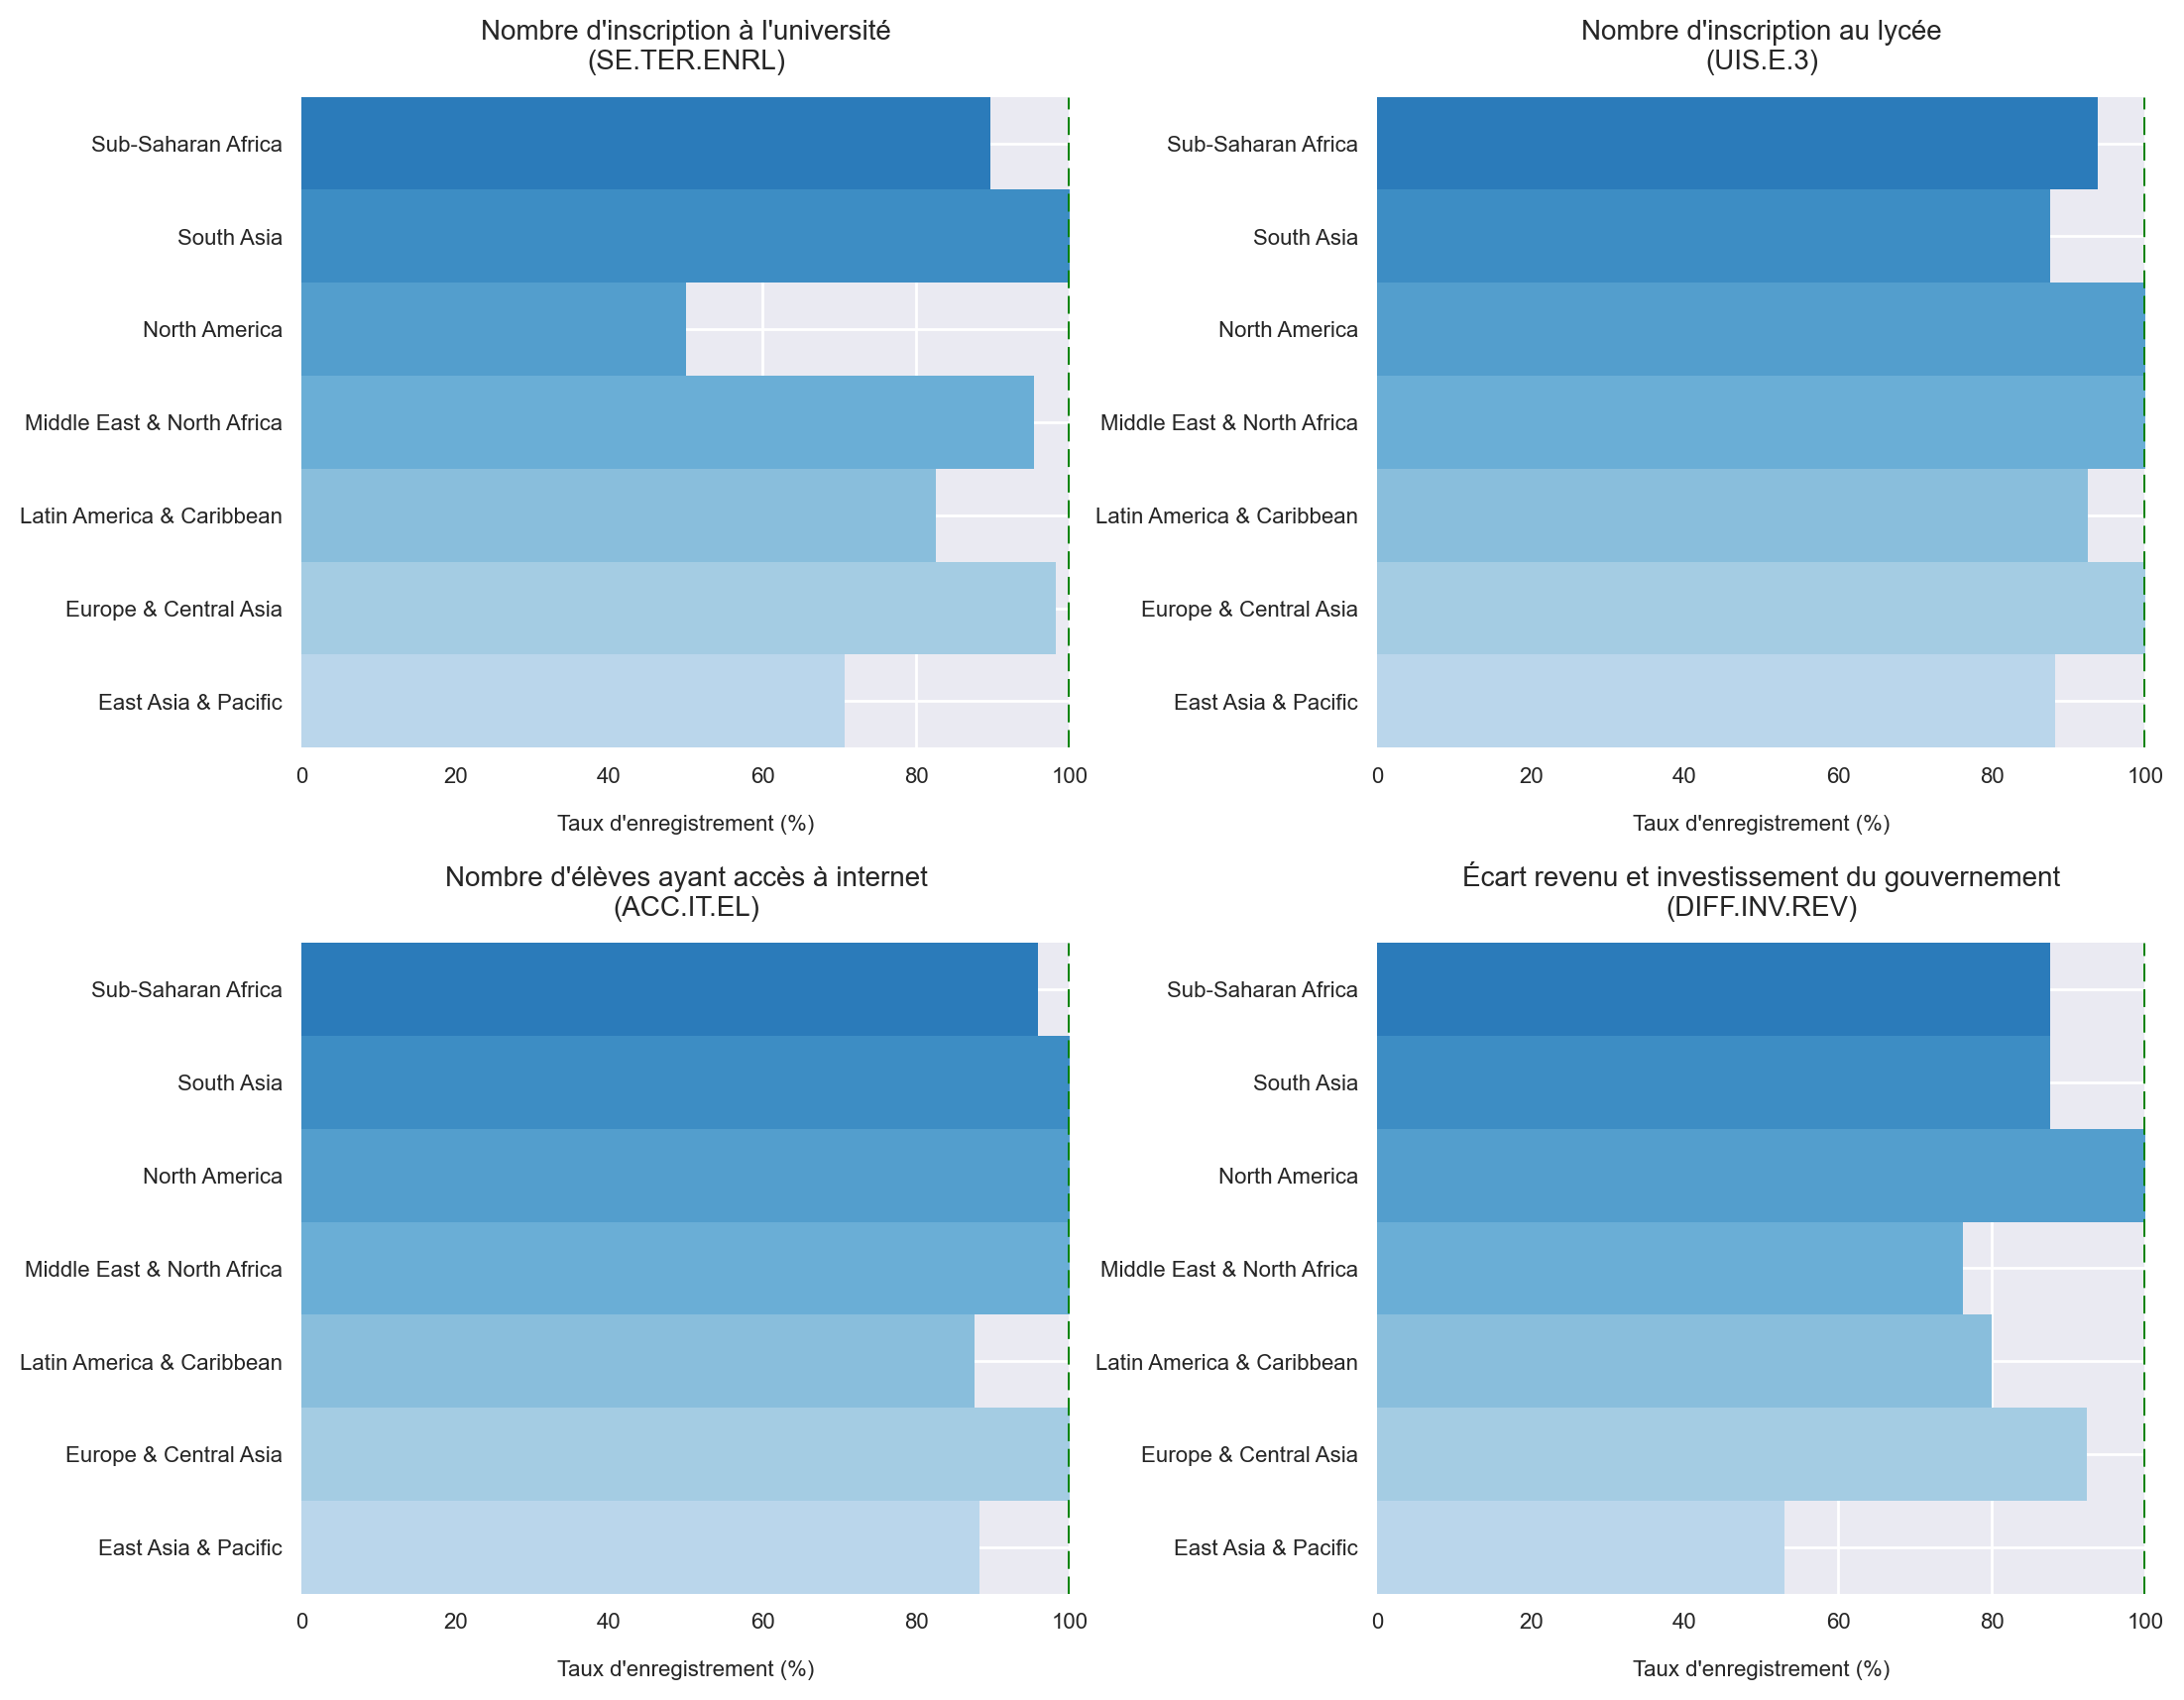

In [175]:
#Sélection du dataset à tracer
indic_freq_sort = indic_freq.sort_values('REGION')
region = indic_freq_sort.REGION.values.tolist()
ls = indic_freq_sort.columns.tolist()[1:]

dic = {'SE.TER.ENRL':'Nombre d\'inscription à l\'université', 'UIS.E.3':'Nombre d\'inscription au lycée',
      'ACC.IT.EL':'Nombre d\'élèves ayant accès à internet',
       'DIFF.INV.REV':'Écart revenu et investissement du gouvernement'}

fig, axs = plt.subplots(2,2,dpi=200,figsize = (12,10))
cmap = plt.cm.Blues
a = (np.arange(2,8,0.5))/7
#cmap(a)

#plt.rcParams.update({'figure.autolayout': True})
plt.style.use('seaborn-whitegrid')
i=0
for count,indic in enumerate(ls):  
    y = indic_freq_sort[indic].values
    if count < 2:
        ax = axs[i,count]
        ax= plt.subplot(2,2,count+1)
        ax.barh(region, y, height = 1.0, color = cmap(a))
        labels = ax.get_xticklabels()
        ax.axvline(100, ls='--', color='g')
        ax.set_xlabel('Taux d\'enregistrement (%)', fontsize=8, labelpad = 10)
        A = dic[indic]+'\n'+'('+indic+')'
        ax.set_title(A,fontsize=10,  pad = 10)
        ax.tick_params(labelsize =8)
        ax.margins(0)
    else:
        i=1
        ax = axs[i,count-2]
        ax= plt.subplot(2,2,count+1)
        ax.barh(region, y, height = 1.0, color =cmap(a))
        labels = ax.get_xticklabels()
        ax.axvline(100, ls='--', color='g')
        ax.set_xlabel('Taux d\'enregistrement (%)', fontsize=8, labelpad = 10)
        A = dic[indic]+'\n'+'('+indic+')'
        ax.set_title(A,fontsize=10, pad = 10)
        ax.tick_params(labelsize =8)
        ax.margins(0)

plt.subplots_adjust(hspace=0.3,wspace=0.4)
        
#fig.subplots_adjust(hspace=0.,wspace=0)
#fig.tight_layout()
plt.show()

#save plot
fig.savefig('P2_3_5_1.png', transparent=False, dpi=200)

Pour évaluer la représentativité des indicateurs, je visualise le taux d'enregistrement par région, pour chacun des indicateurs. Un taux d'enregistrement de 100% indique que pour tous les pays de la région donnée, une valeur a pu être enregistrée. 

In [176]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


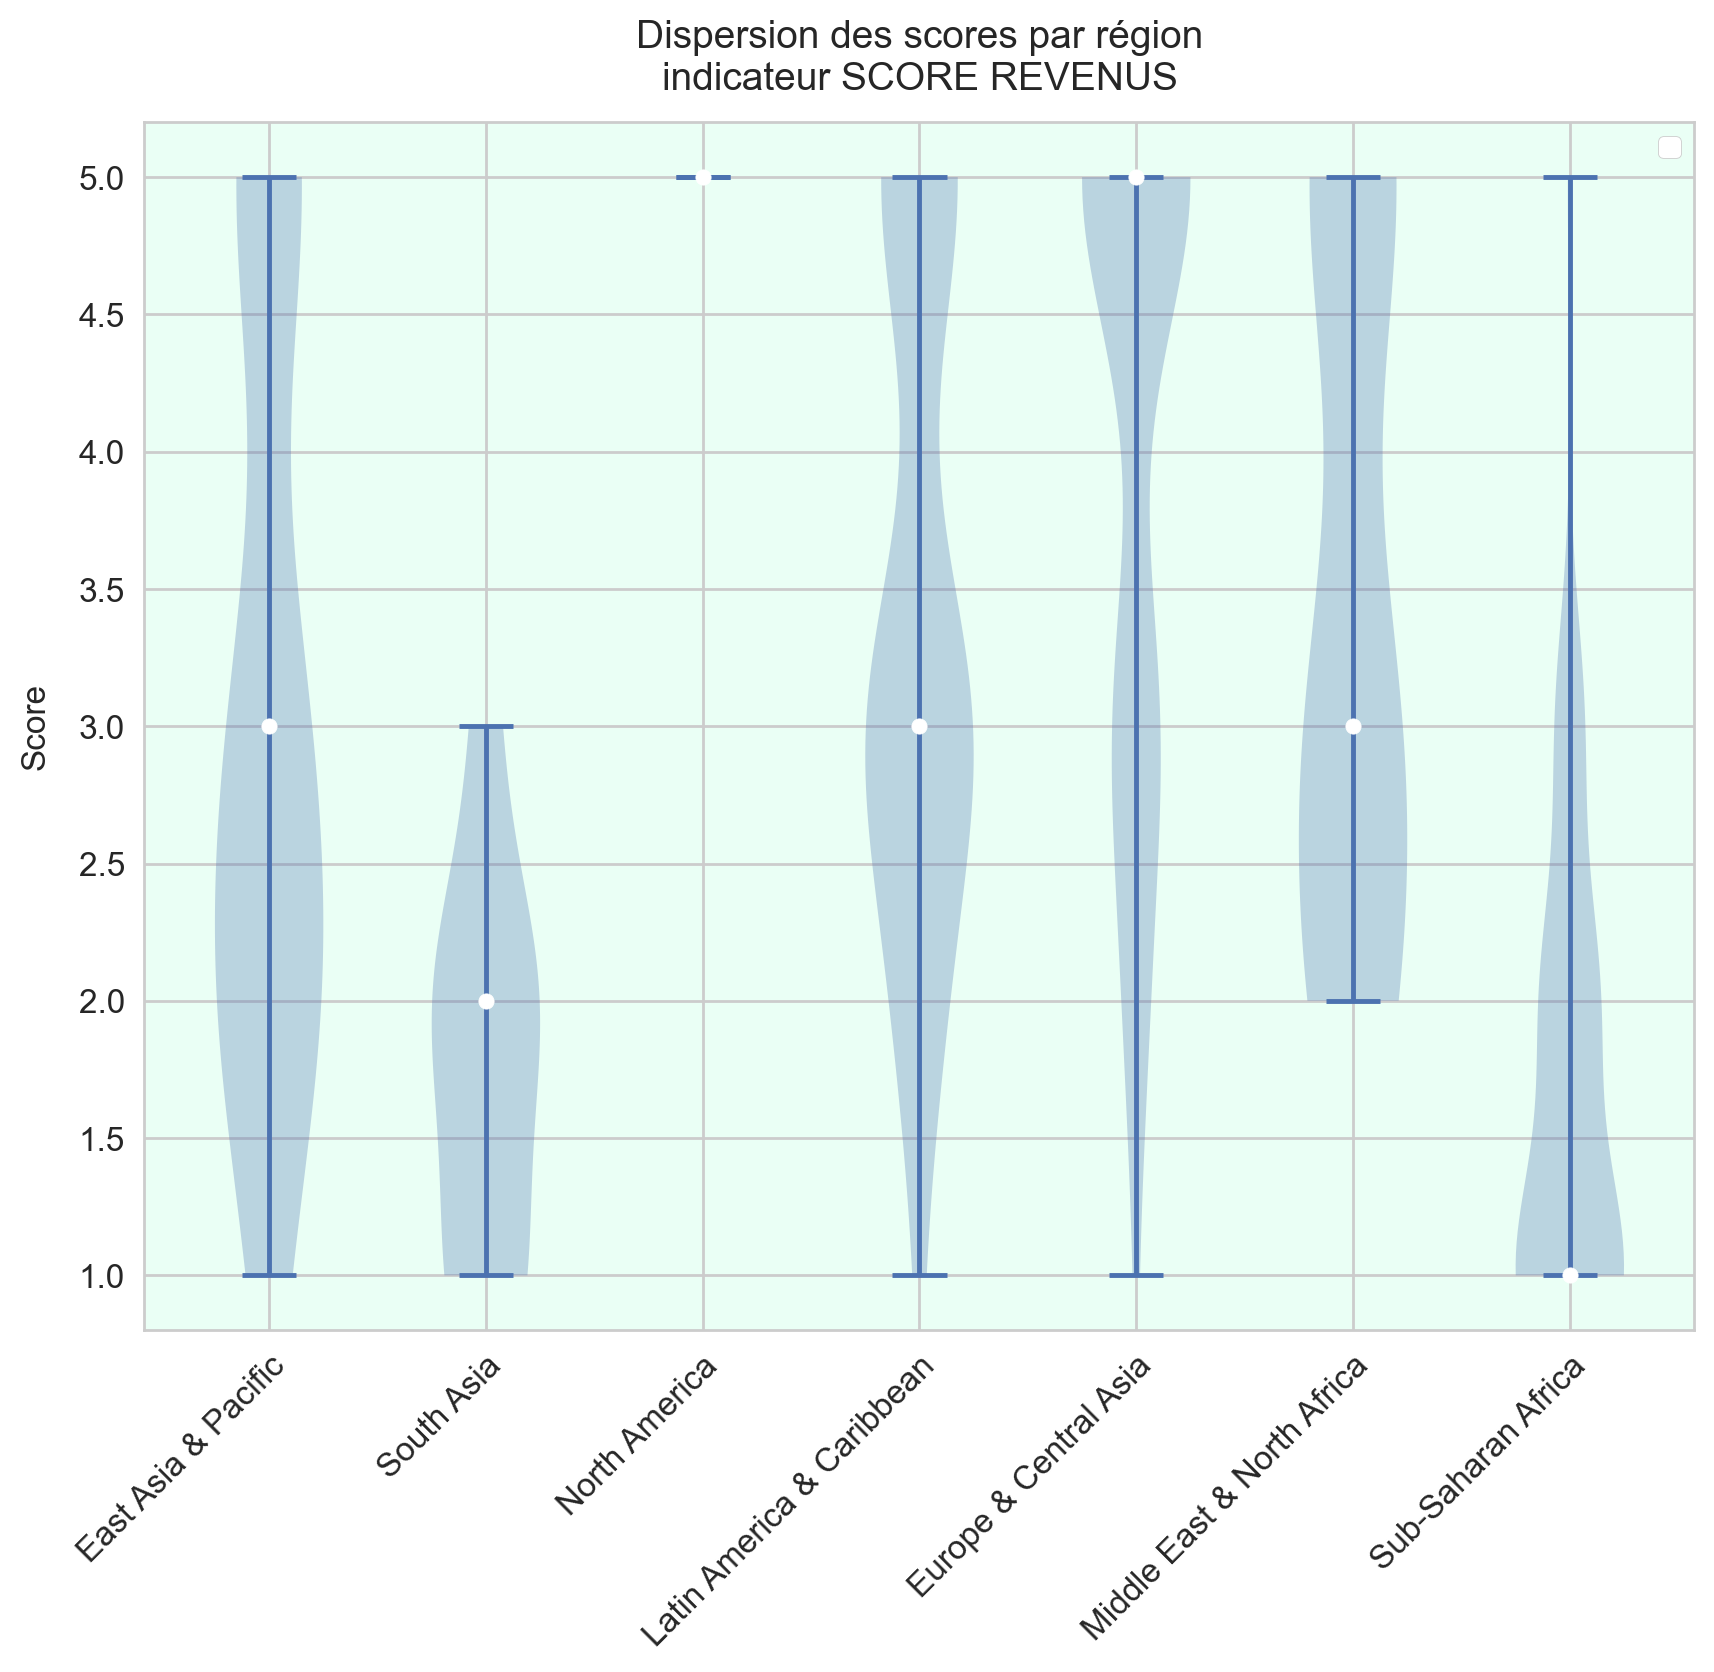

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


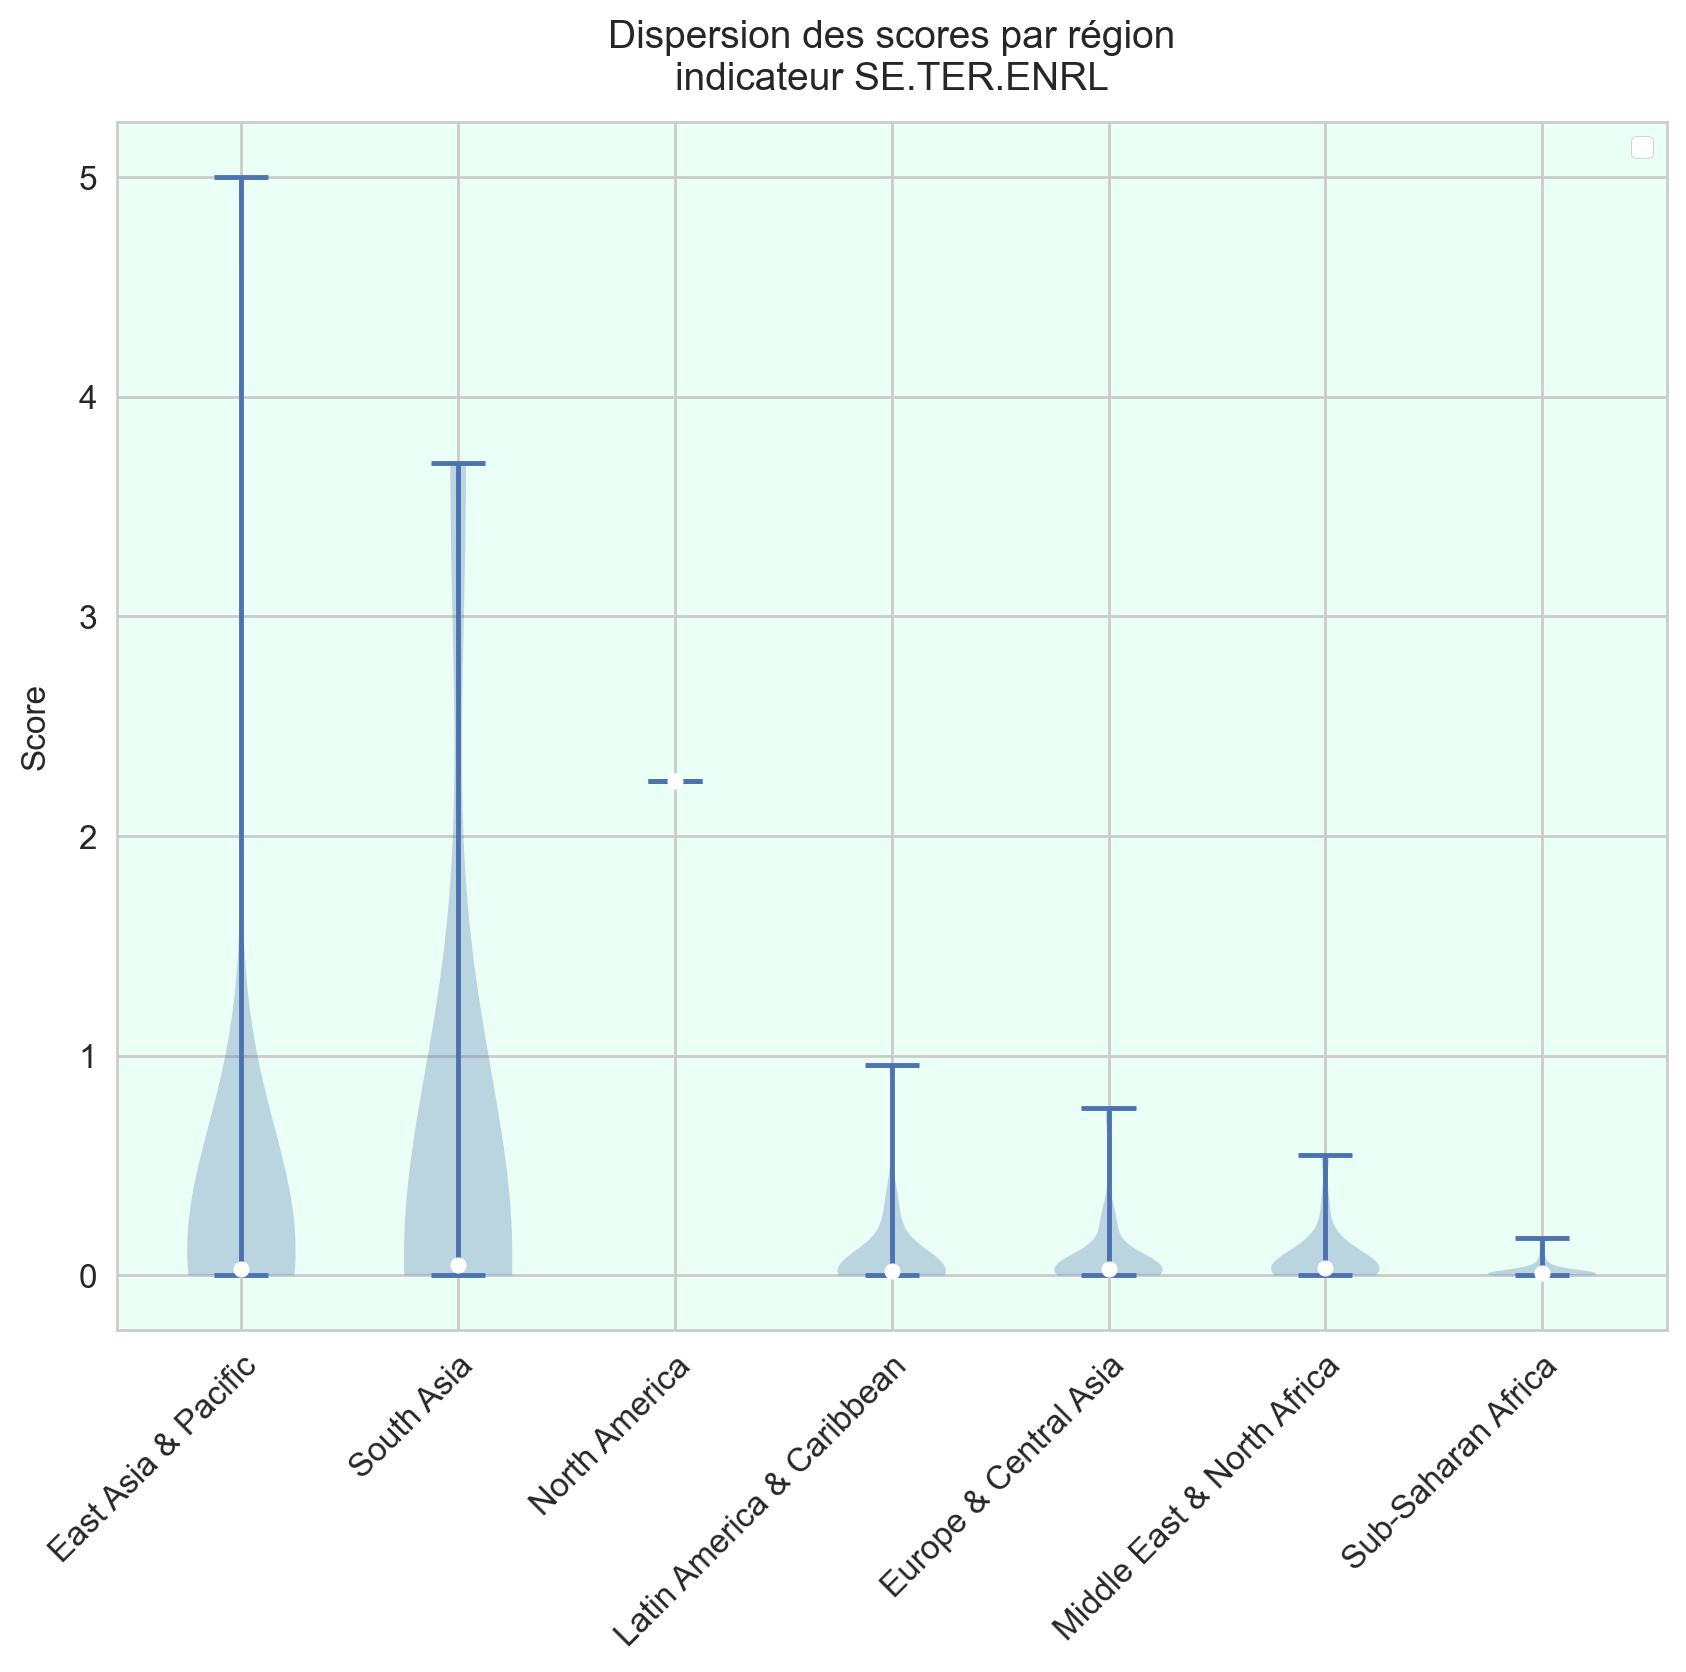

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


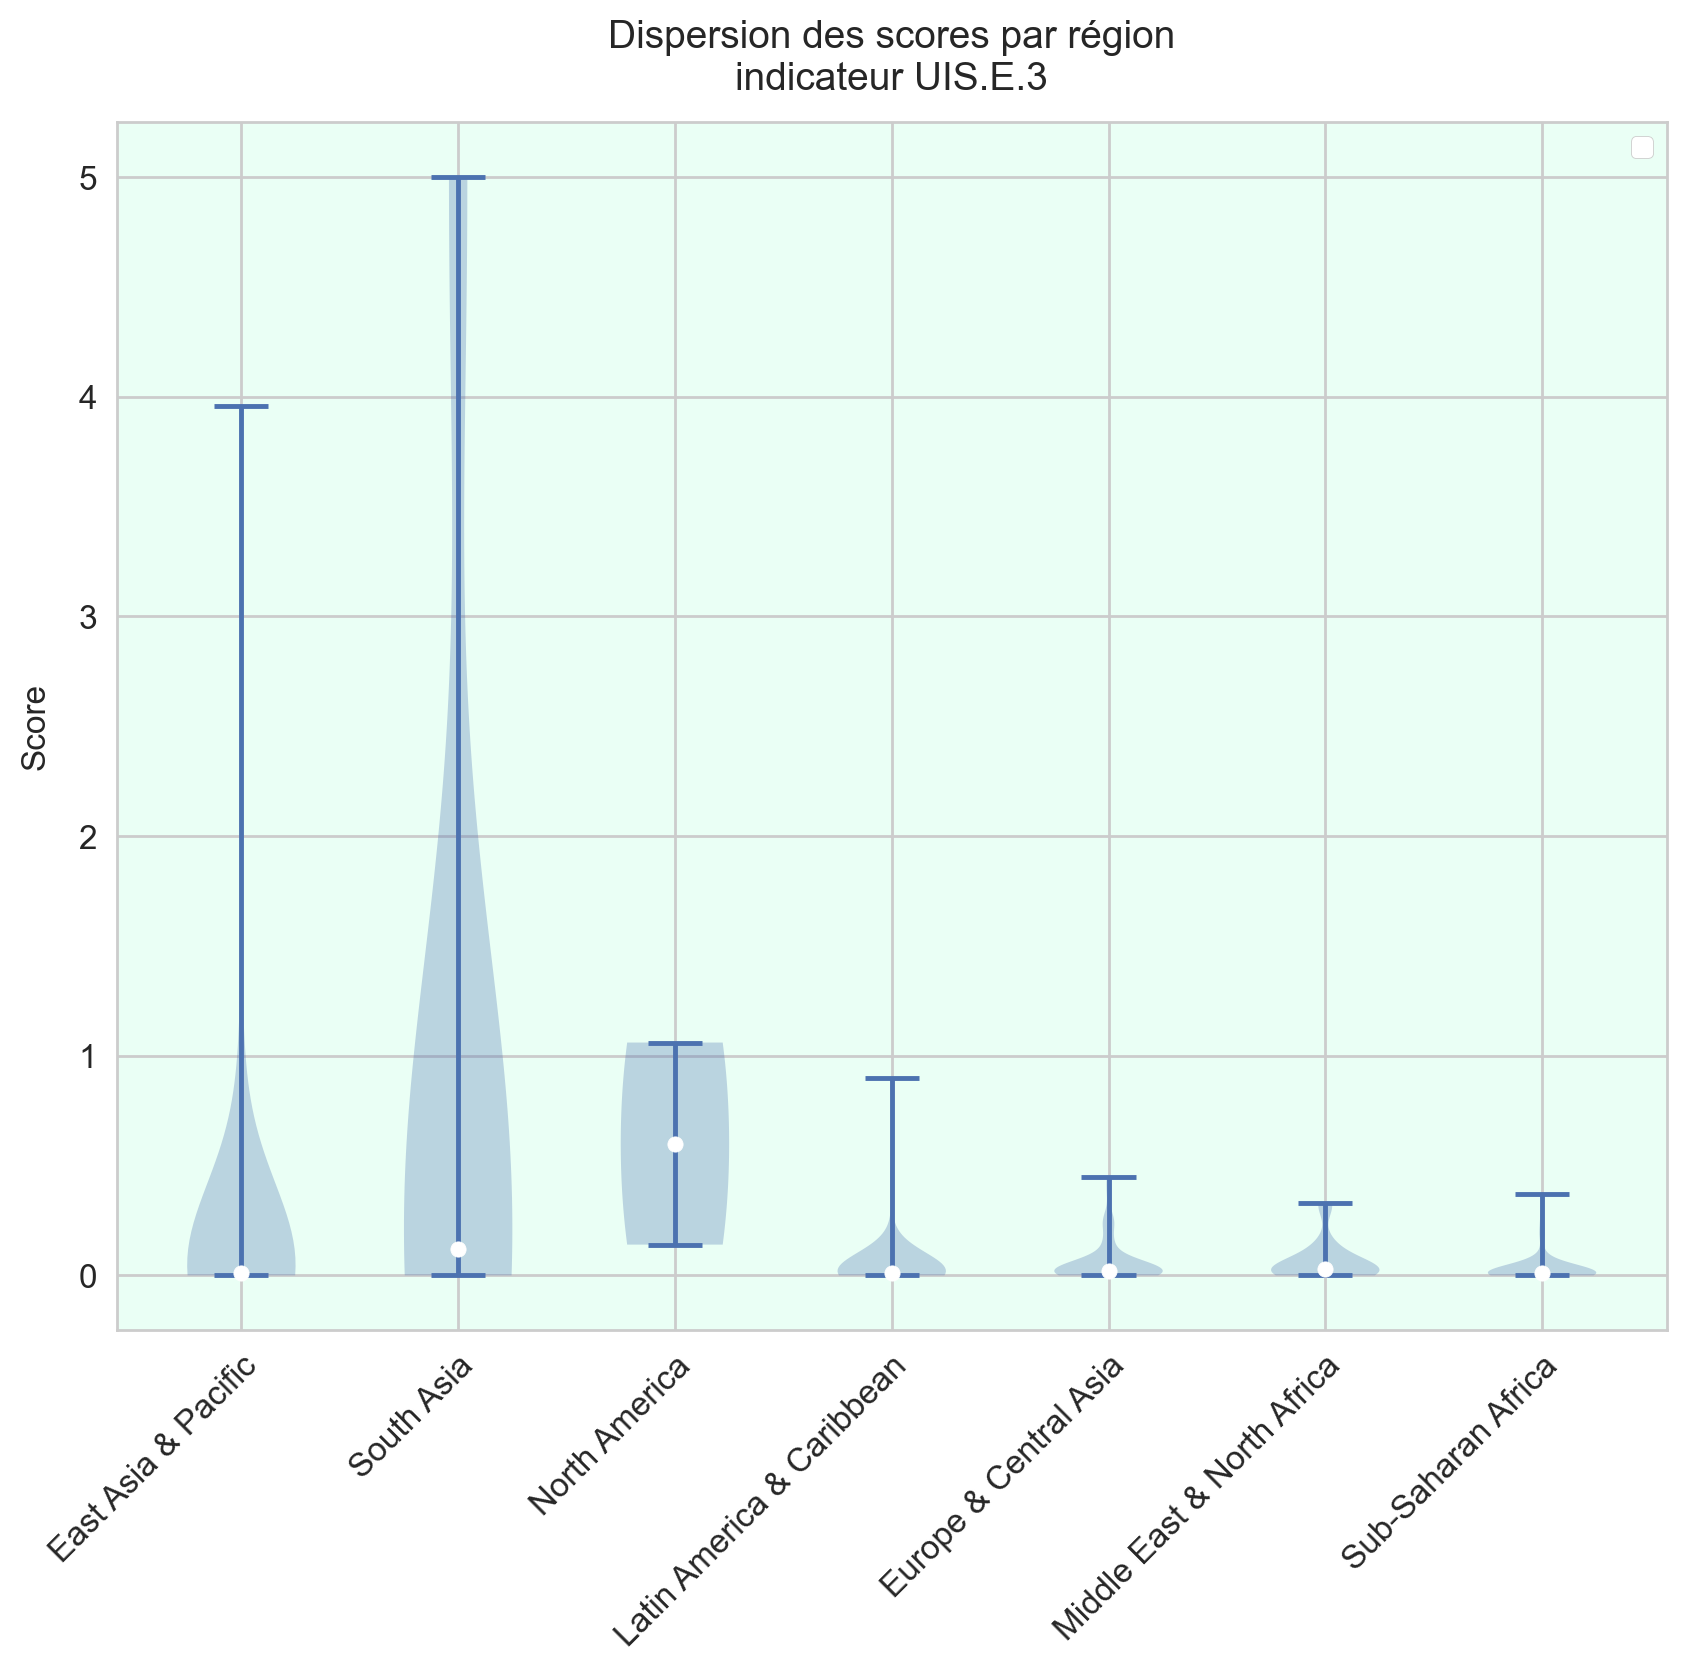

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


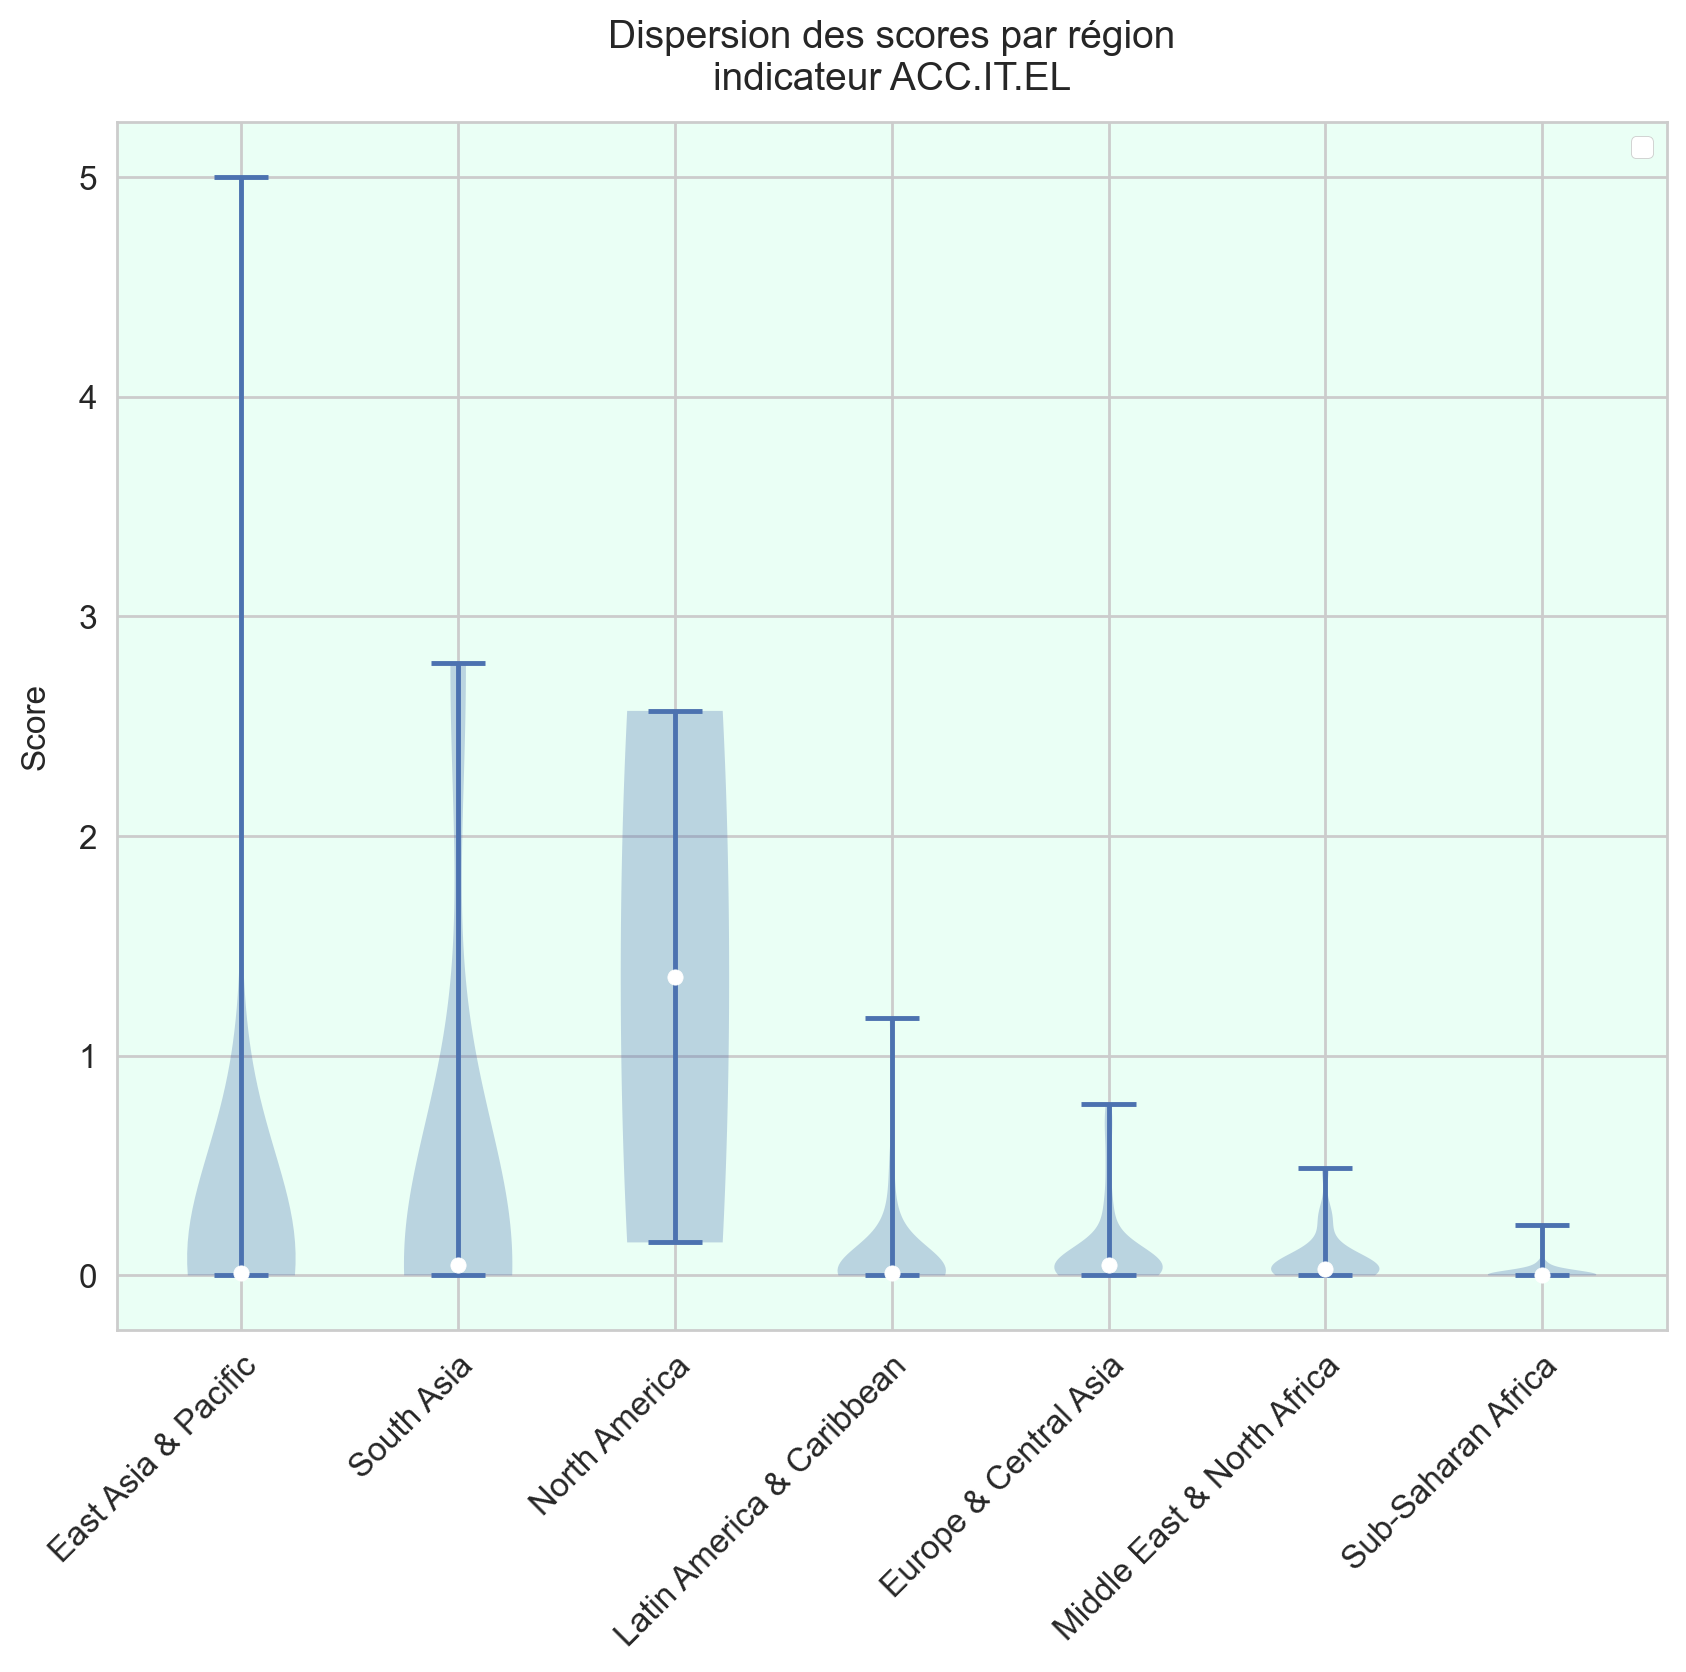

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


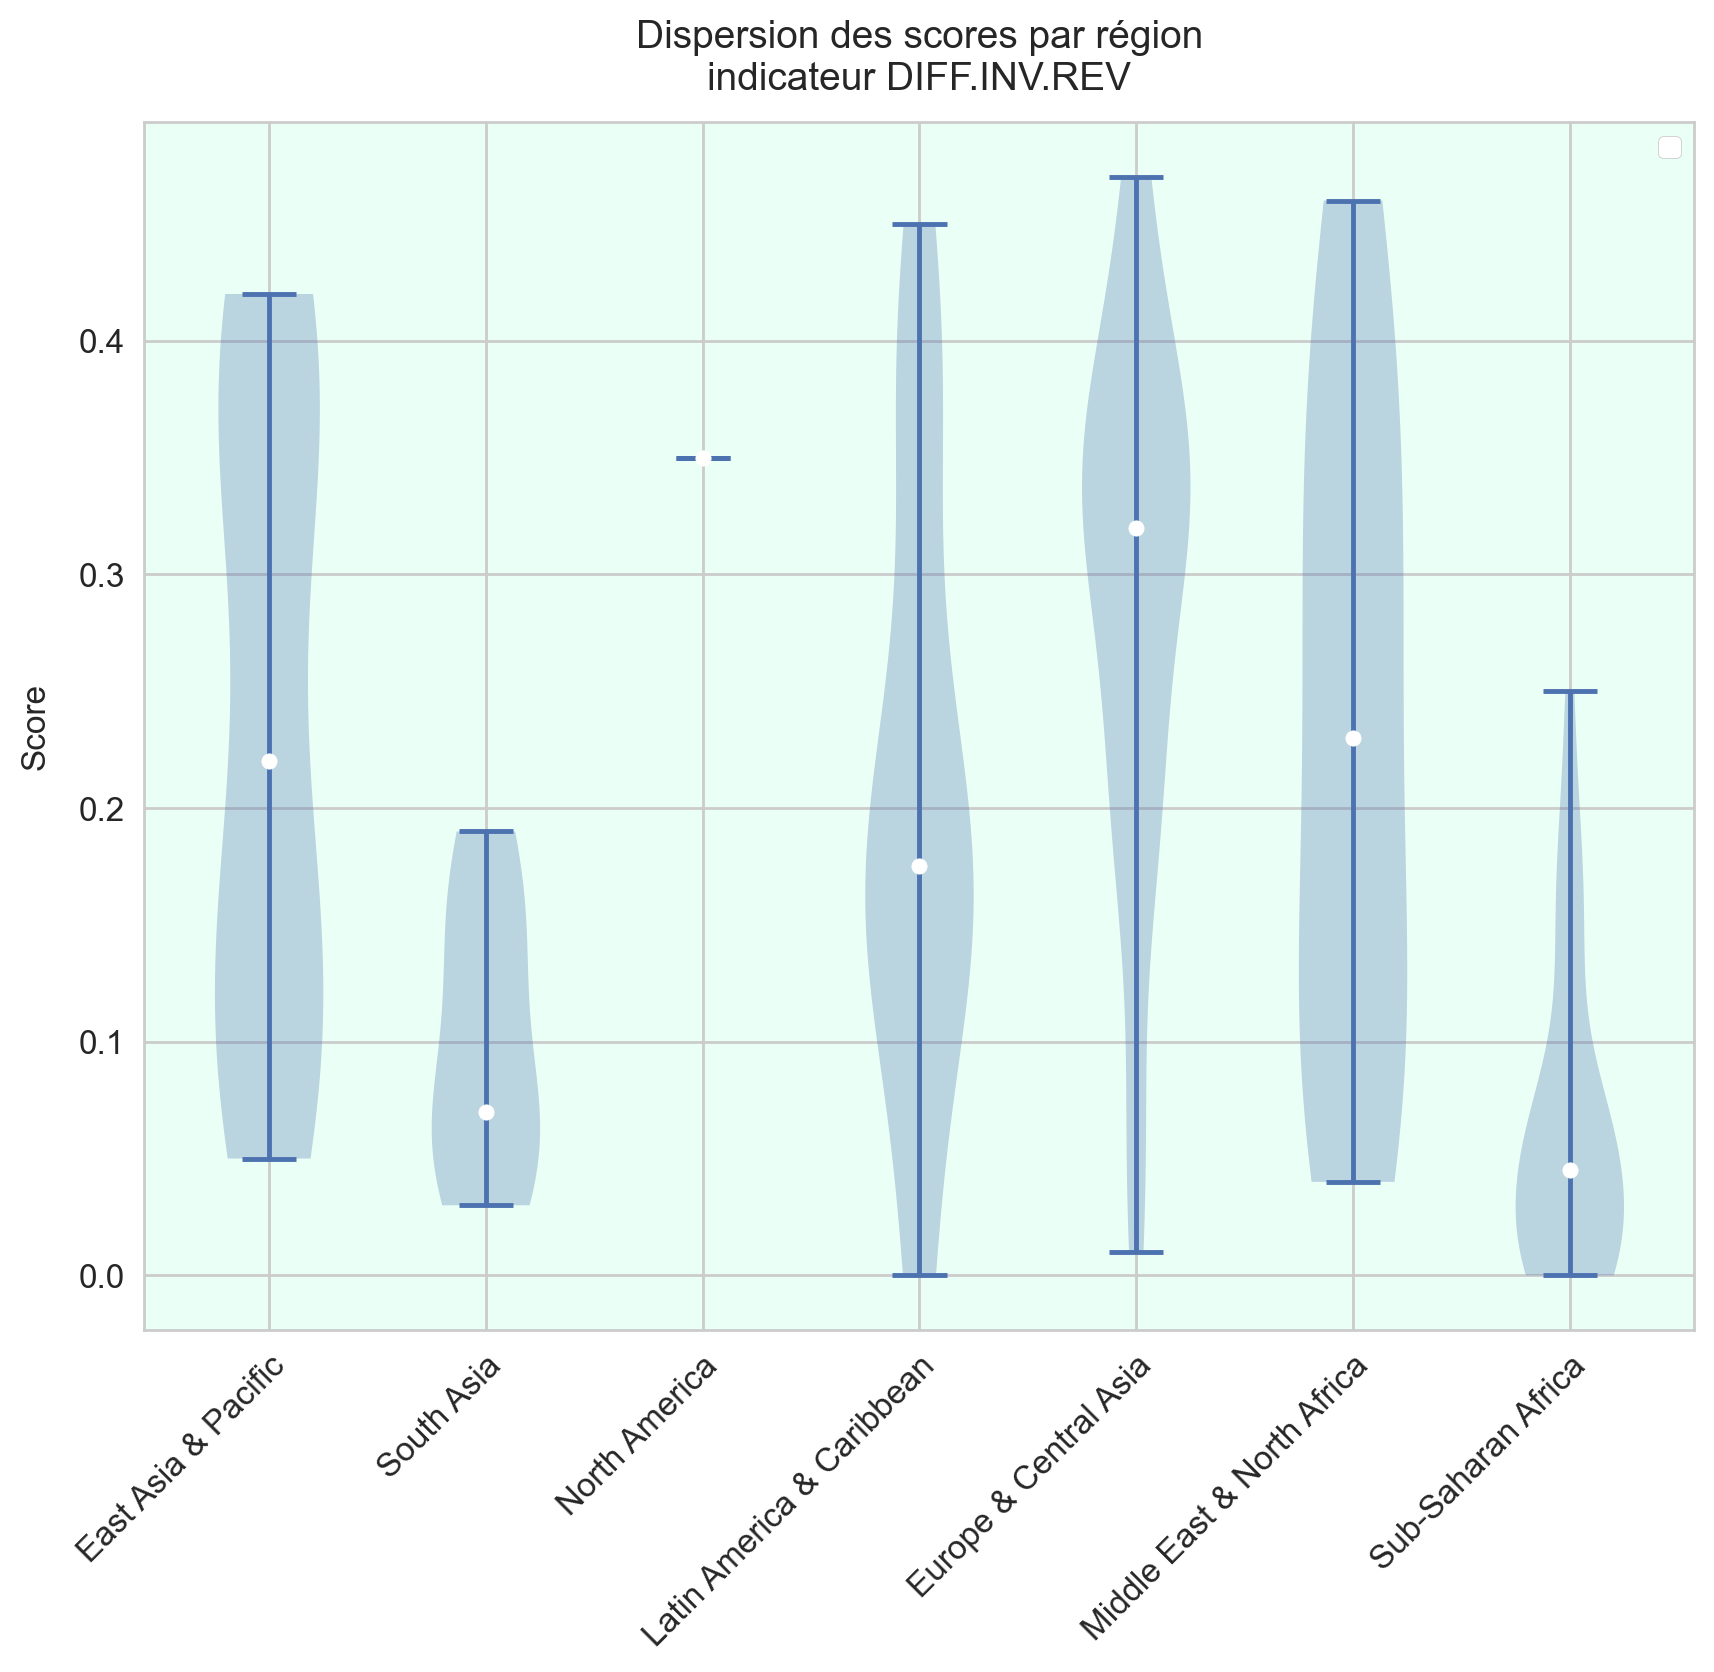

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


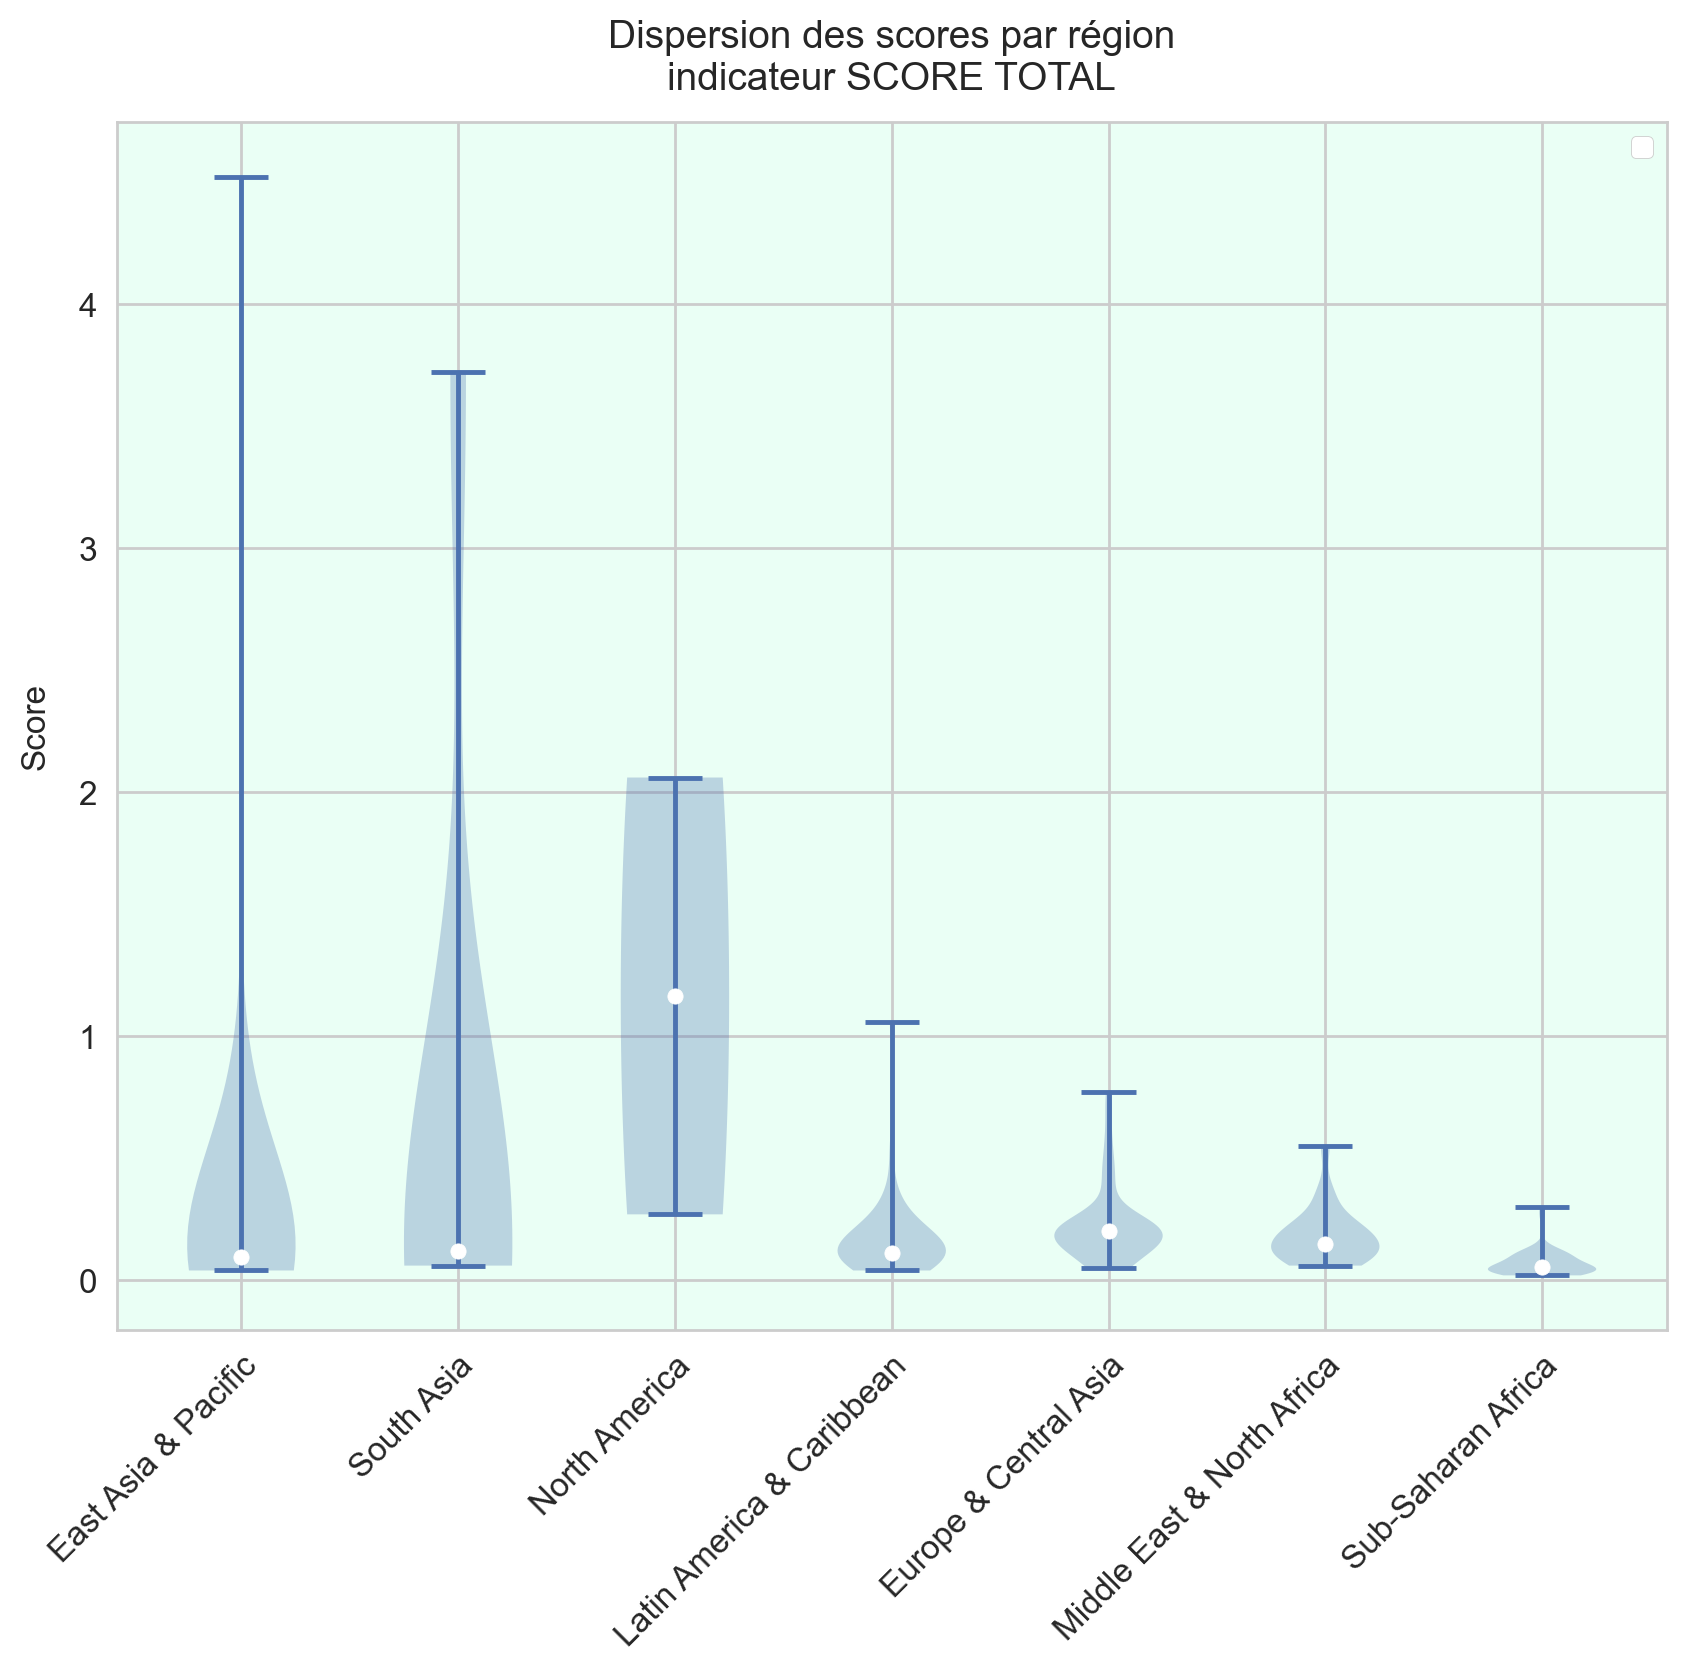

In [177]:
#print(plt.style.available)
##2 
##Sélection des datasets
ls_indic = Data_potentiel.columns.tolist()[3:]
region = Data_potentiel['REGION'].unique().tolist()

## itérables

for i,indic in enumerate(ls_indic):
    X = []
    med = []
    plt.style.use('seaborn-whitegrid')
    fig,ax = plt.subplots(figsize=(10,8), dpi=200)
    #print(i,indic)
    for j,reg in enumerate(region):
        #print('check région',reg)
        y = Data_potentiel.loc[Data_potentiel['REGION']==reg,indic].values
        mediane = np.nanquantile(y,0.5)
        med.append(mediane)
        #print('med',med)
        #print(y)
        y = y[~(np.isnan(y))] #Suppression des nan 
        X.append(y)
        #print('check X:',j,reg,X)
    bp = ax.violinplot(X,showmedians= False)
    ind_x = np.arange(1,j+2)
    #ind_y = np.arange(0,5.5)
    ax.scatter(ind_x, med, marker='o', color='white', s=30, zorder=3)
    #print(ind)
    ax.set_xticks(ind_x,labels = region)
    #ax.set_yticks(ind_y,labels = region)
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
    st = 'Dispersion des scores par région'+'\n'+'indicateur '+ indic
    ax.set_title(st, fontsize = 14, pad = 12)
    ax.set_ylabel('Score', fontsize = 12, labelpad = 10)
    ax.legend(loc = 'best', frameon = True, framealpha= 1)
    ax.tick_params(labelsize =12)
    ax.set_facecolor('#eafff5')
    plt.show()
    #save plot
    nomfichier = 'P2_3_5_2'+'disp_'+indic.lower()+'.png'
    fig.savefig(nomfichier, transparent=False, dpi=200, bbox_inches= 'tight')

#  <a name="C22"> 4. Évolution du potentiel </a>  

Afin d'évaluer l'évolution du potentiel, je reviens à la table ***Data*** pour étudier les valeurs projetées.

##  <a name="C23"> 4.1 Évaluation de la qualité des valeurs projetées </a> 

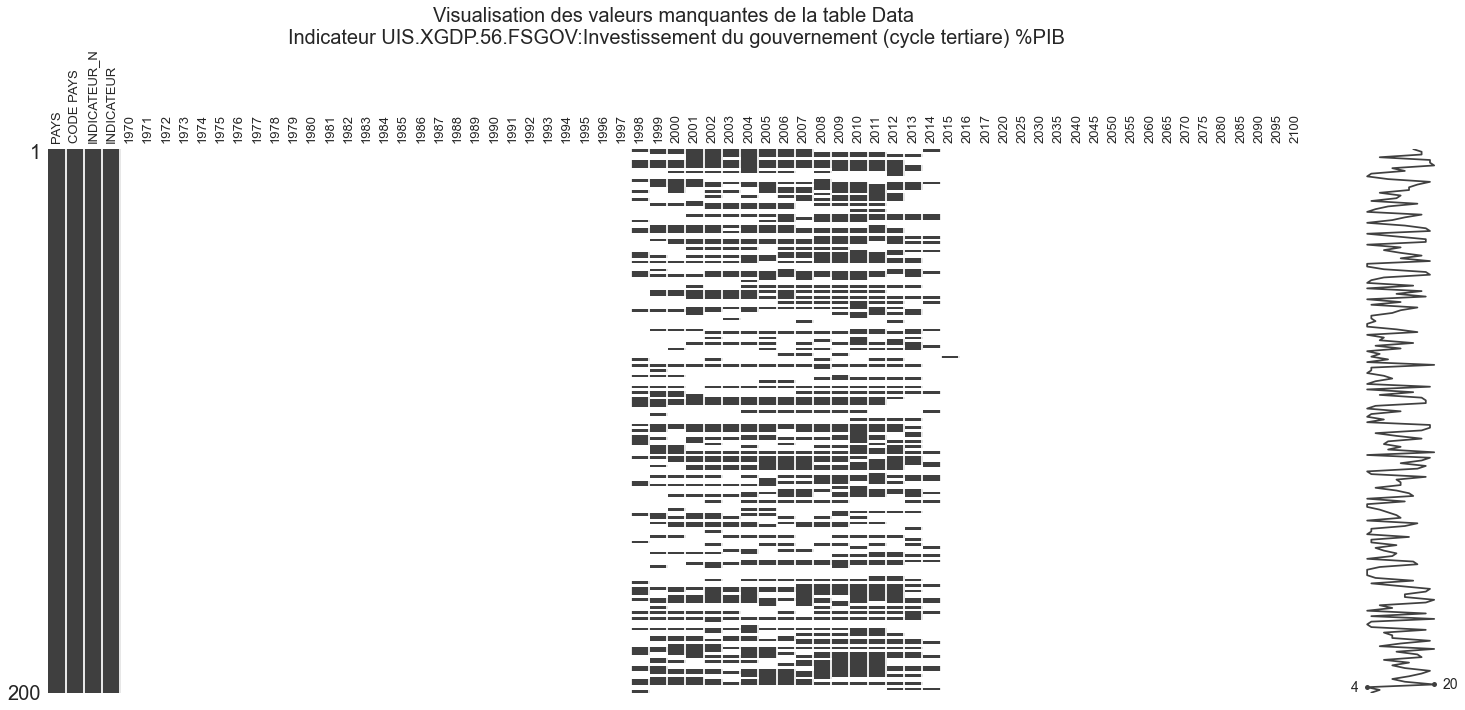

In [178]:
import missingno as msno
CRIT = ['IT.NET.USER.P2', 'SE.TER.ENRL', 'UIS.E.3','UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV']
dic['IT.NET.USER.P2'] = 'Nombre de personnes ayant accès à internet'
dic['UIS.XGDP.23.FSGOV'] = 'Investissement du gouvernement (cycle secondaire) %PIB'
dic['UIS.XGDP.56.FSGOV'] = 'Investissement du gouvernement (cycle tertiare) %PIB'

for count,cr in enumerate(CRIT):
    A = Data[Data['INDICATEUR'] == cr]
    A_vm = A.sample(200)
    %matplotlib inline
    msno.matrix(A_vm)
    tick = np.arange(A.shape[1])
    lab = A.columns.tolist()
    plt.title('Visualisation des valeurs manquantes de la table Data \n'
              + 'Indicateur '+cr+':'+dic[cr],
          pad = 0, fontsize = 20)
    plt.xticks(tick,labels = lab, rotation='vertical',fontsize = 13 )
    plt.savefig('4_1_'+str(count+1)+cr[:1]+'.png', bbox_inches='tight')

Pour les indicateurs que j'ai sélectionné aucune valeur n'est disponible au delà de l'année 2016. 
J'envisage donc d'effectuer les projections nécessaires par régression. 

**Stratégie :**

1. Traiter les valeurs manquantes de la table Data pour les indicateurs sélectionnés entre 2005 et 2016
2. Calcul des scores entre 2005 et 2016
3. Visualiser l'évolution des scores
4. Conclusion sur les cinq pays prioritaires. 

##  <a name="C24"> 4.2 Traitement des valeurs manquantes </a> 

- Je restreint ***Data_sub*** aux indicateurs sélectionnés.

- Pour traiter les valeurs manquantes de la table ***Data_sub***, j'envisage de les remplacer par une valeur médiane du groupe correspondant à l'indicateur, la région à laquelle le pays appartient et au groupe de revenu auquel le pays appartient. 

**Exemple** : Pour le pays AFG et l'indicateur 'UIS.E.3', il manque la donnée de 2015. Je calcule la médiane de l'indicateur 'UIS.E.3' pour l'année 2015, pour la région et pour le revenus correspondant à l'Afghanistan et je l'affecte à la valeur manquante.

In [179]:
Data_sub = Data_sub_v0
Data_sub.insert(2,'RÉGION',np.nan)
Data_sub.insert(3,'REVENUS',np.nan)

In [180]:
PAYS_ls = Data_sub['CODE PAYS'].unique().tolist()

for c, pays in enumerate(PAYS_ls):
    #print('check pays ',pays)
    mask = Data_sub['CODE PAYS']== pays
    mask01 = Country_sub['CODE PAYS']==pays
    Data_sub.loc[mask,['RÉGION']]=Country_sub.loc[mask01, ['REGION']].values[0]
    Data_sub.loc[mask,['REVENUS']]=Country_sub.loc[mask01, ['REVENUS']].values[0]

Data_sub = Data_sub[Data_sub['INDICATEUR'].isin(dic)]
Data_sub.head()

PAYS CODE PAYS      RÉGION     REVENUS  \
1204  Afghanistan       AFG  South Asia  Low income   
1214  Afghanistan       AFG  South Asia  Low income   
1265  Afghanistan       AFG  South Asia  Low income   
1266  Afghanistan       AFG  South Asia  Low income   
1375  Afghanistan       AFG  South Asia  Low income   

                                           INDICATEUR_N         INDICATEUR  \
1204  Enrolment in tertiary education, all programme...        SE.TER.ENRL   
1214  Enrolment in upper secondary education, both s...            UIS.E.3   
1265  Government expenditure on secondary education ...  UIS.XGDP.23.FSGOV   
1266  Government expenditure on tertiary education a...  UIS.XGDP.56.FSGOV   
1375                    Internet users (per 100 people)     IT.NET.USER.P2   

               2005           2006      2007       2008       2009      2010  \
1204            NaN            NaN       NaN        NaN   95185.00       NaN   
1214  190104.000000  271144.000000  285290.0  361193.00  443002.00  567344.0   
1265            NaN            NaN       NaN        NaN        NaN       NaN   
1266            NaN            NaN       NaN        NaN        NaN       NaN   
1375       1.224148       2.107124       1.9       1.84       3.55       4.0   

          2011           2012      2013      2014  2015       2016  
1204   97504.0            NaN       NaN  262874.0   NaN        NaN  
1214  743405.0  881415.000000  969267.0  968769.0   NaN        NaN  
1265       NaN            NaN       NaN       NaN   NaN        NaN  
1266       NaN            NaN       NaN       NaN   NaN        NaN  
1375       5.0       5.454545       5.9       7.0  8.26  10.595726

['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']


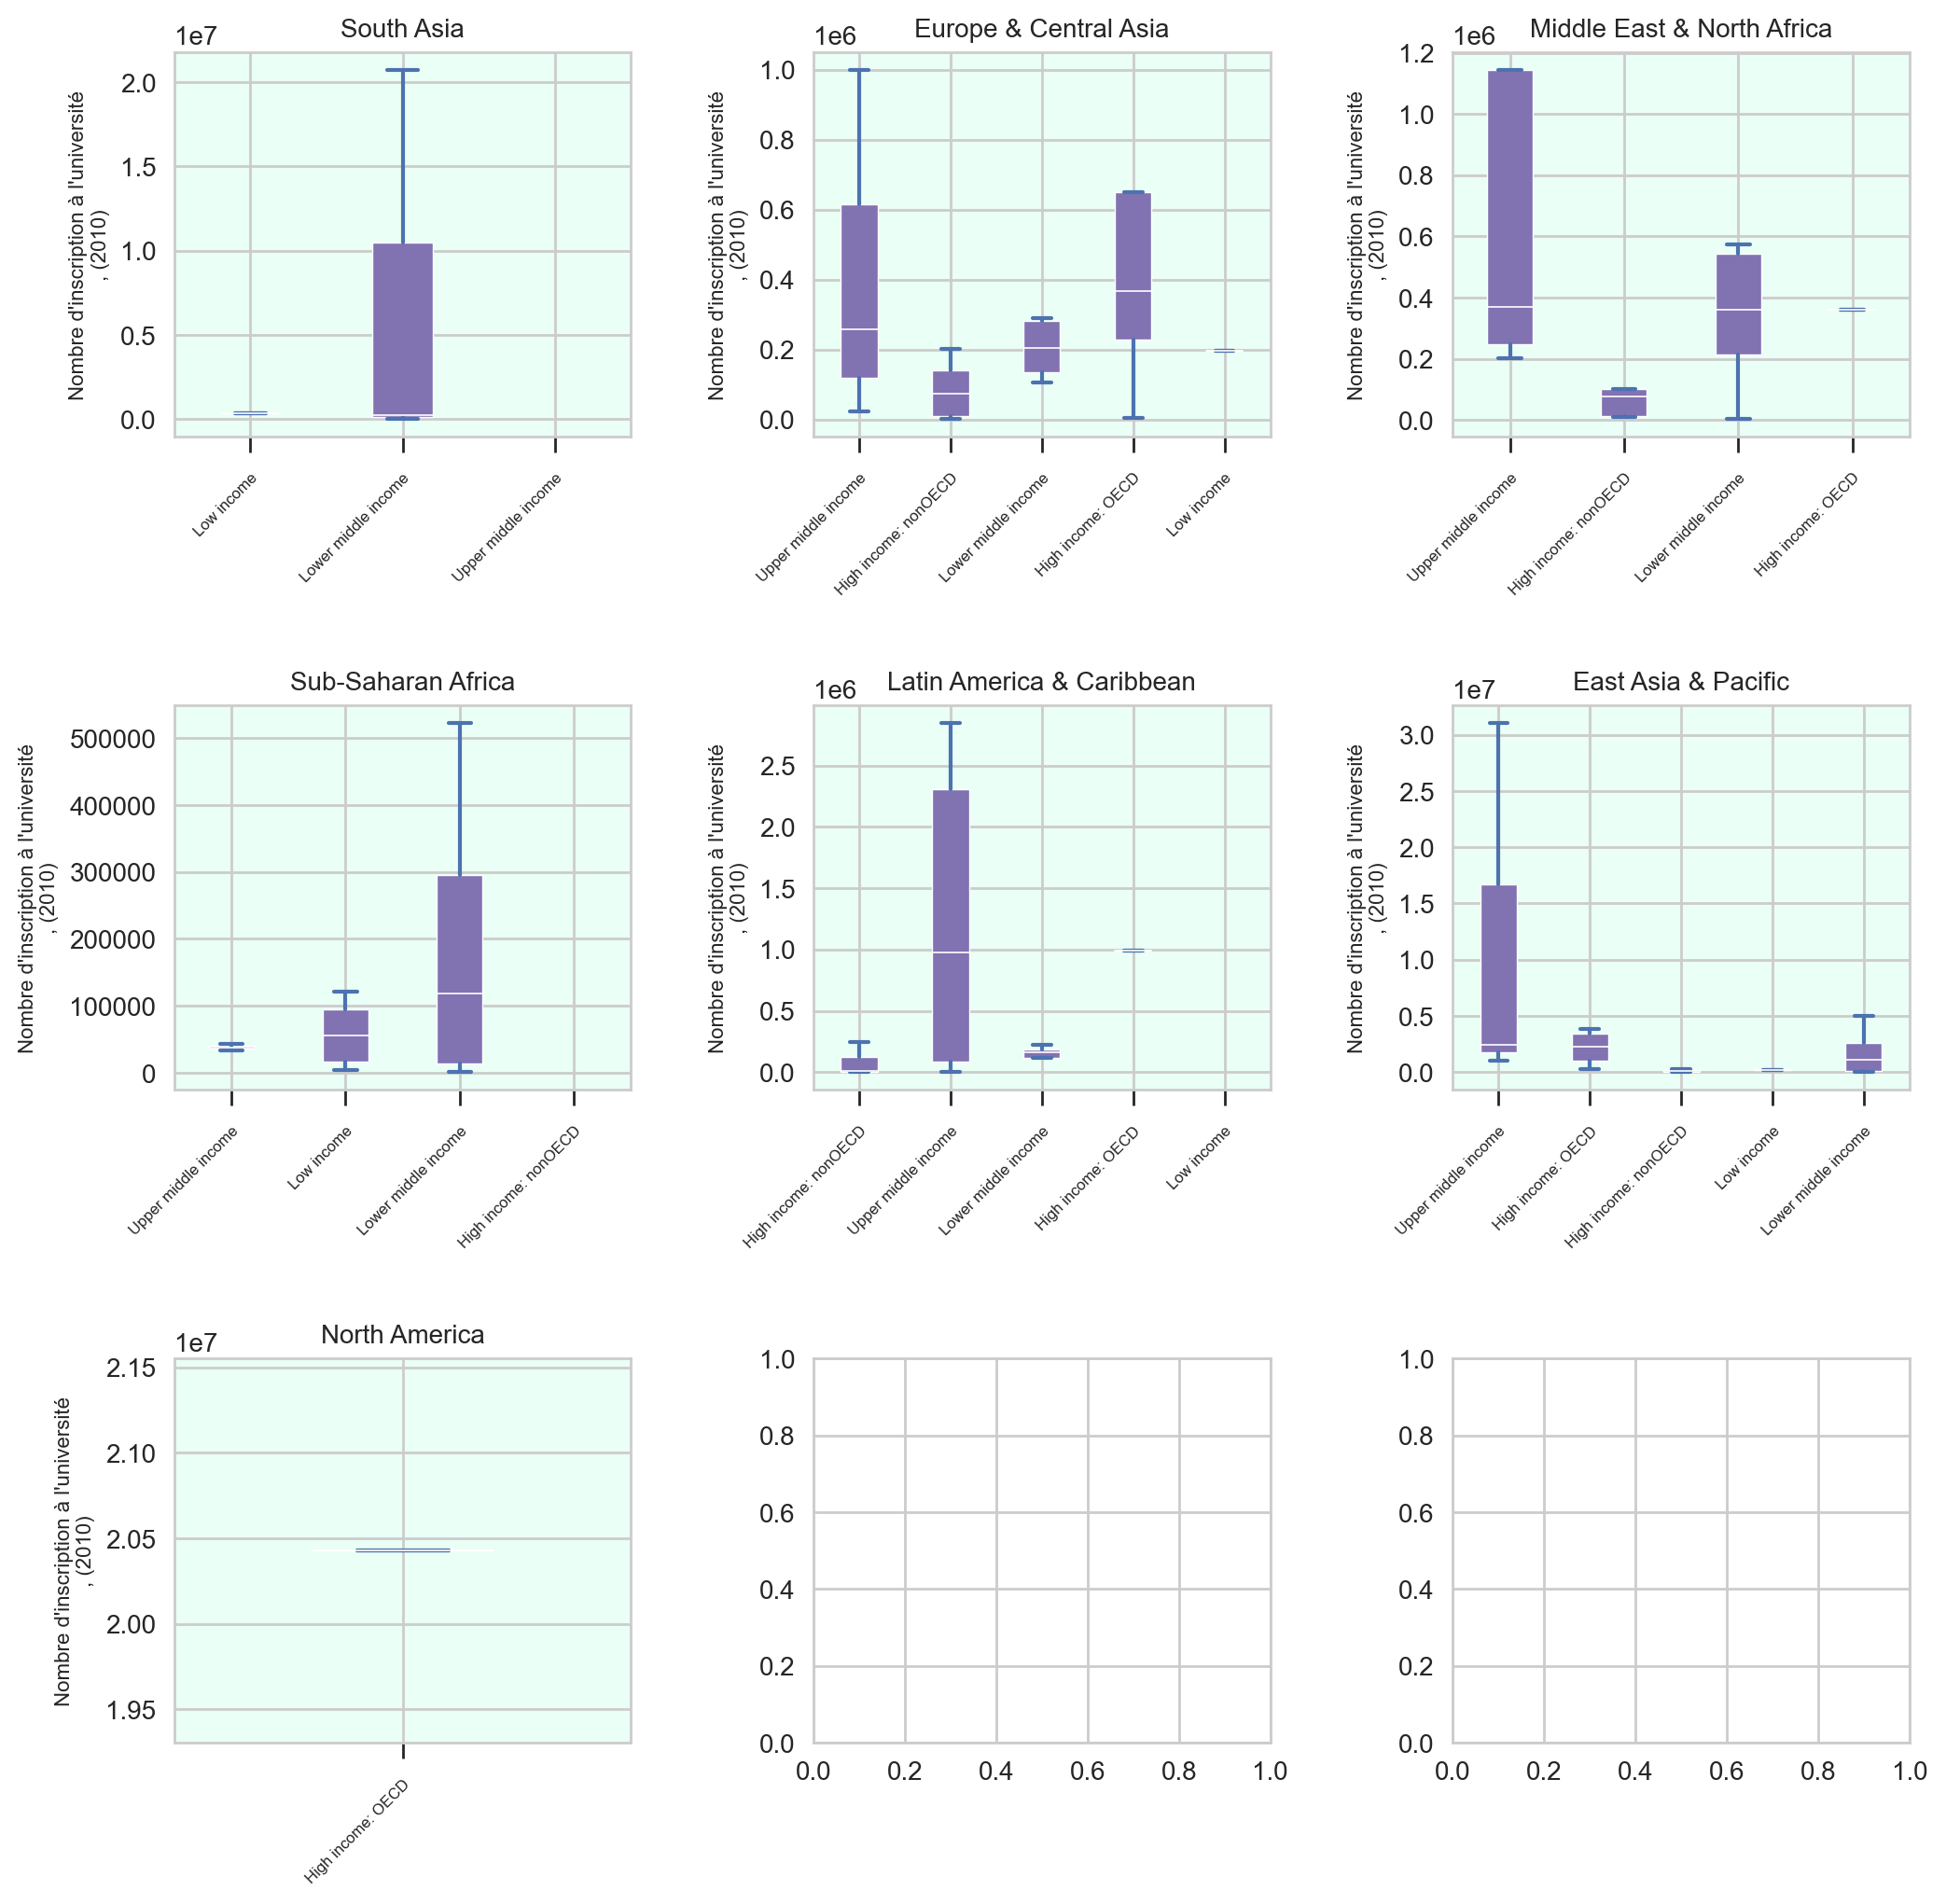

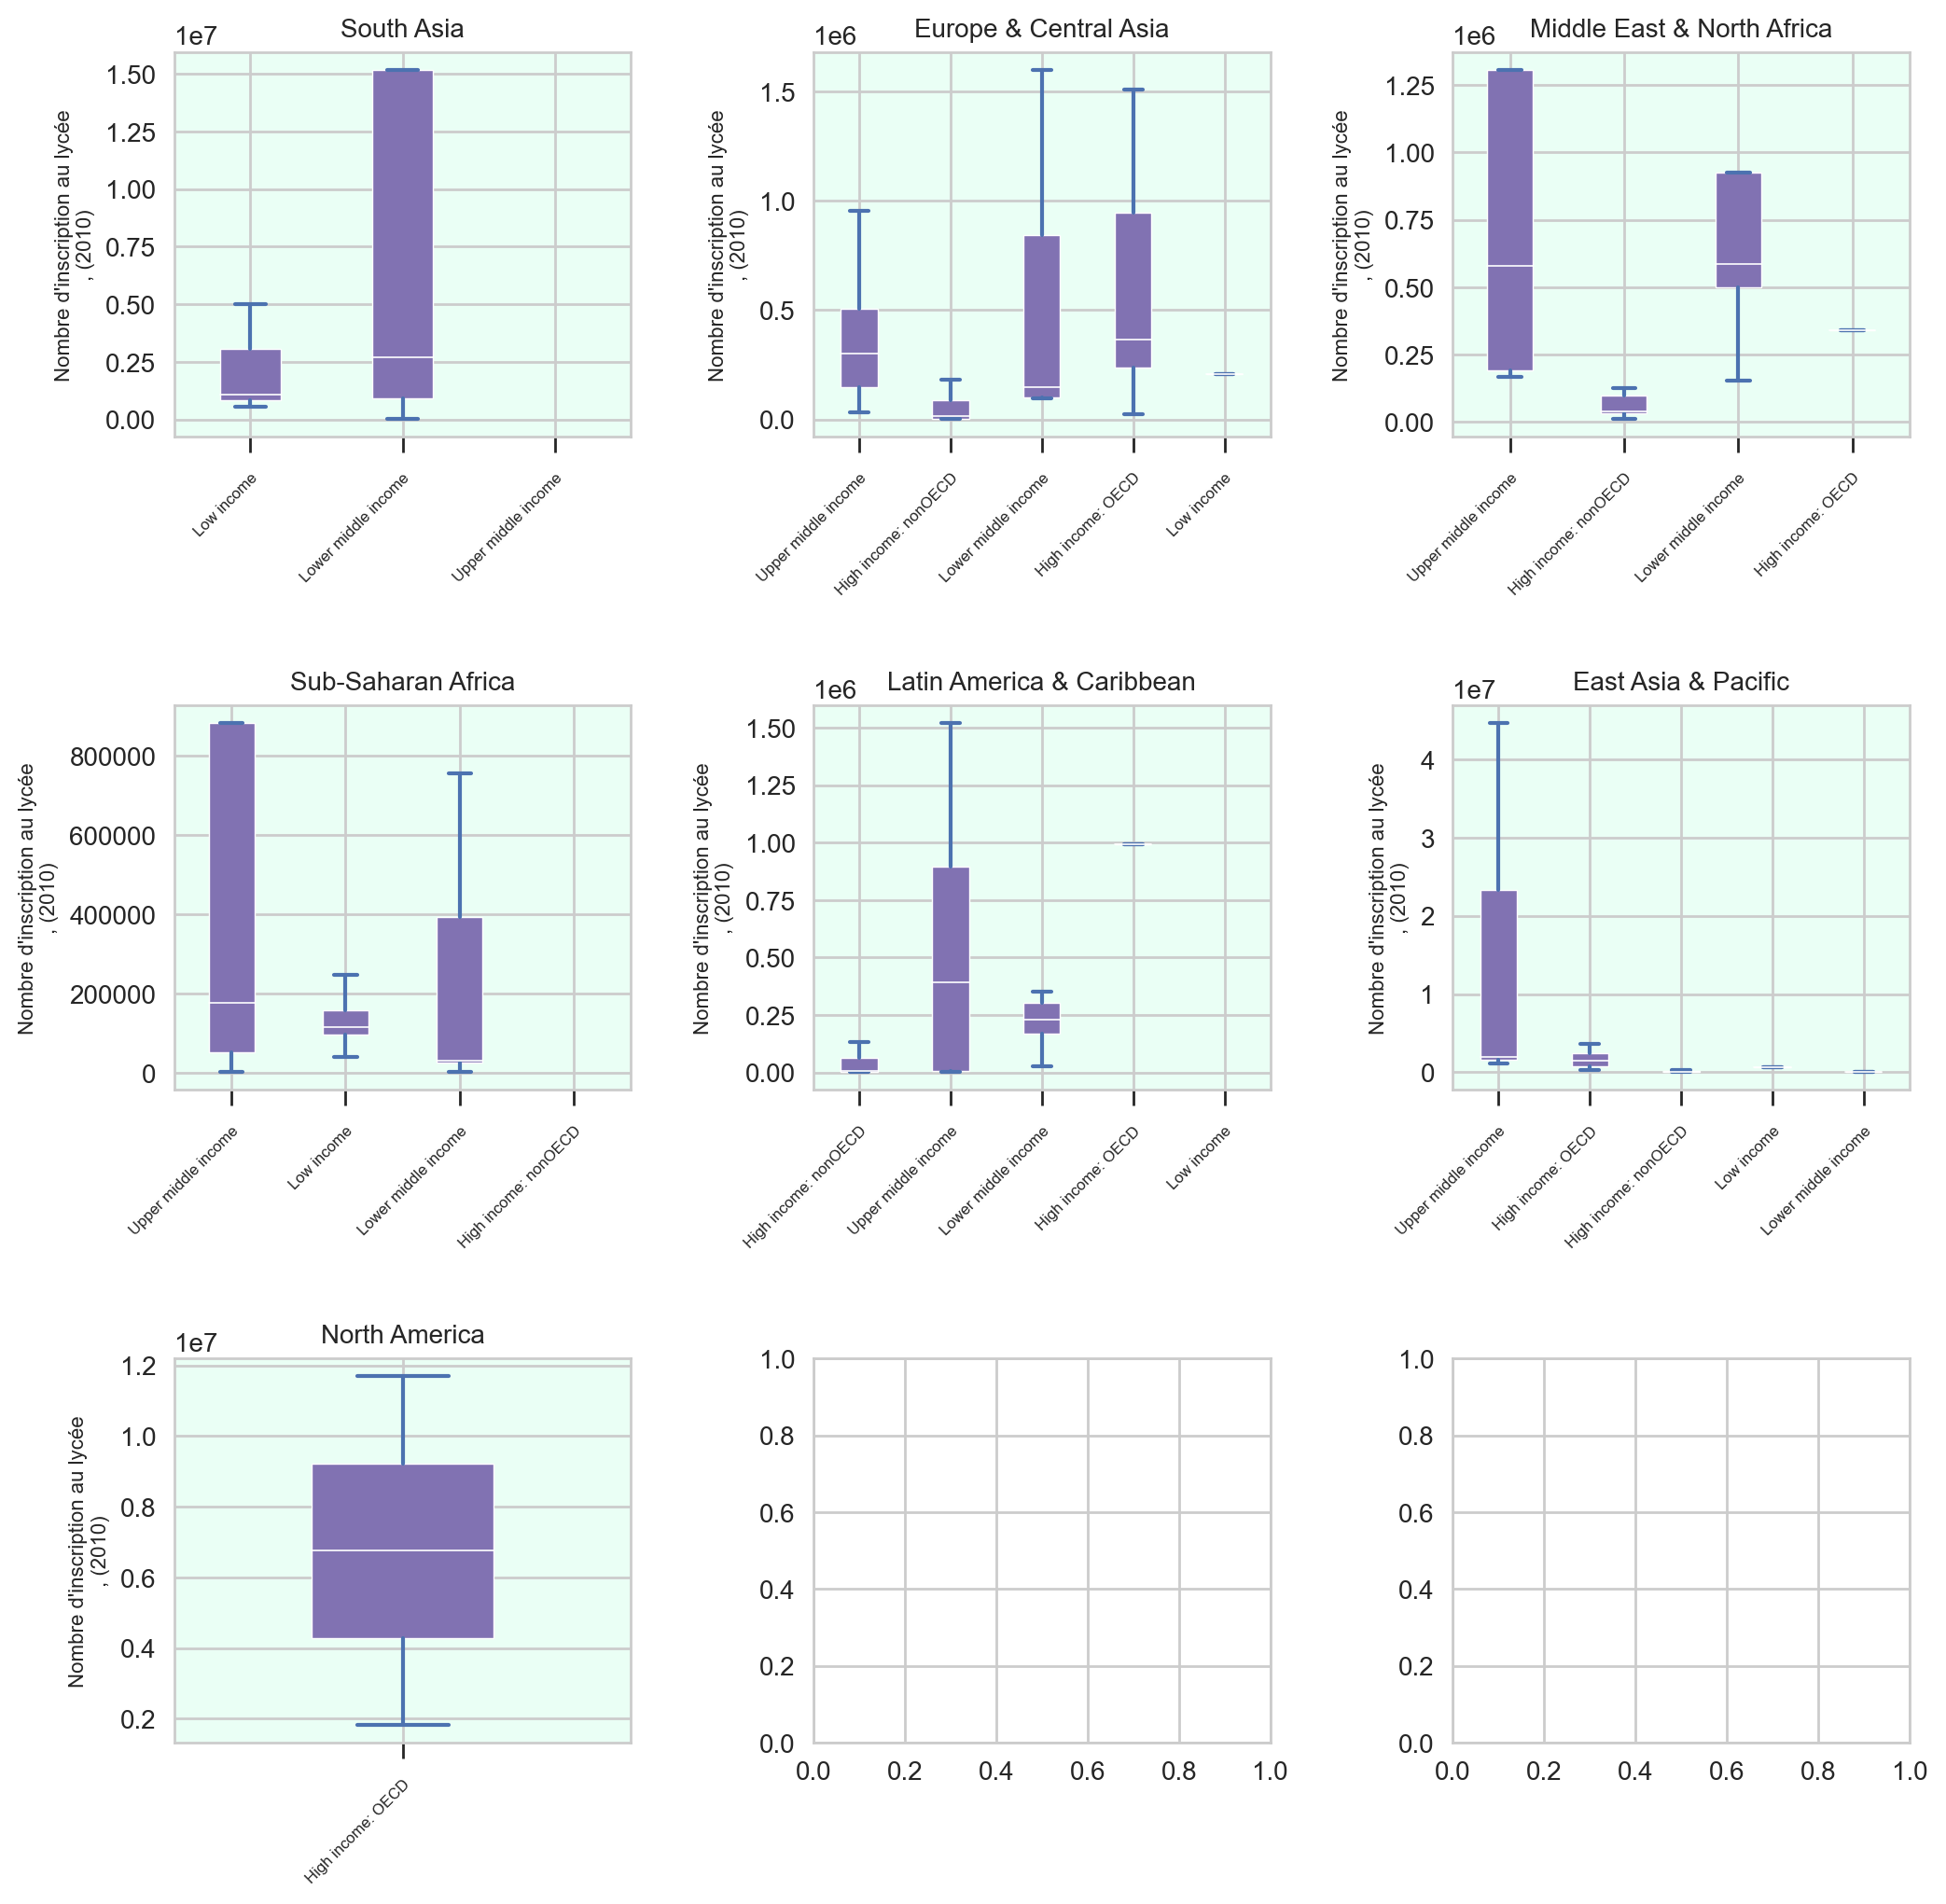

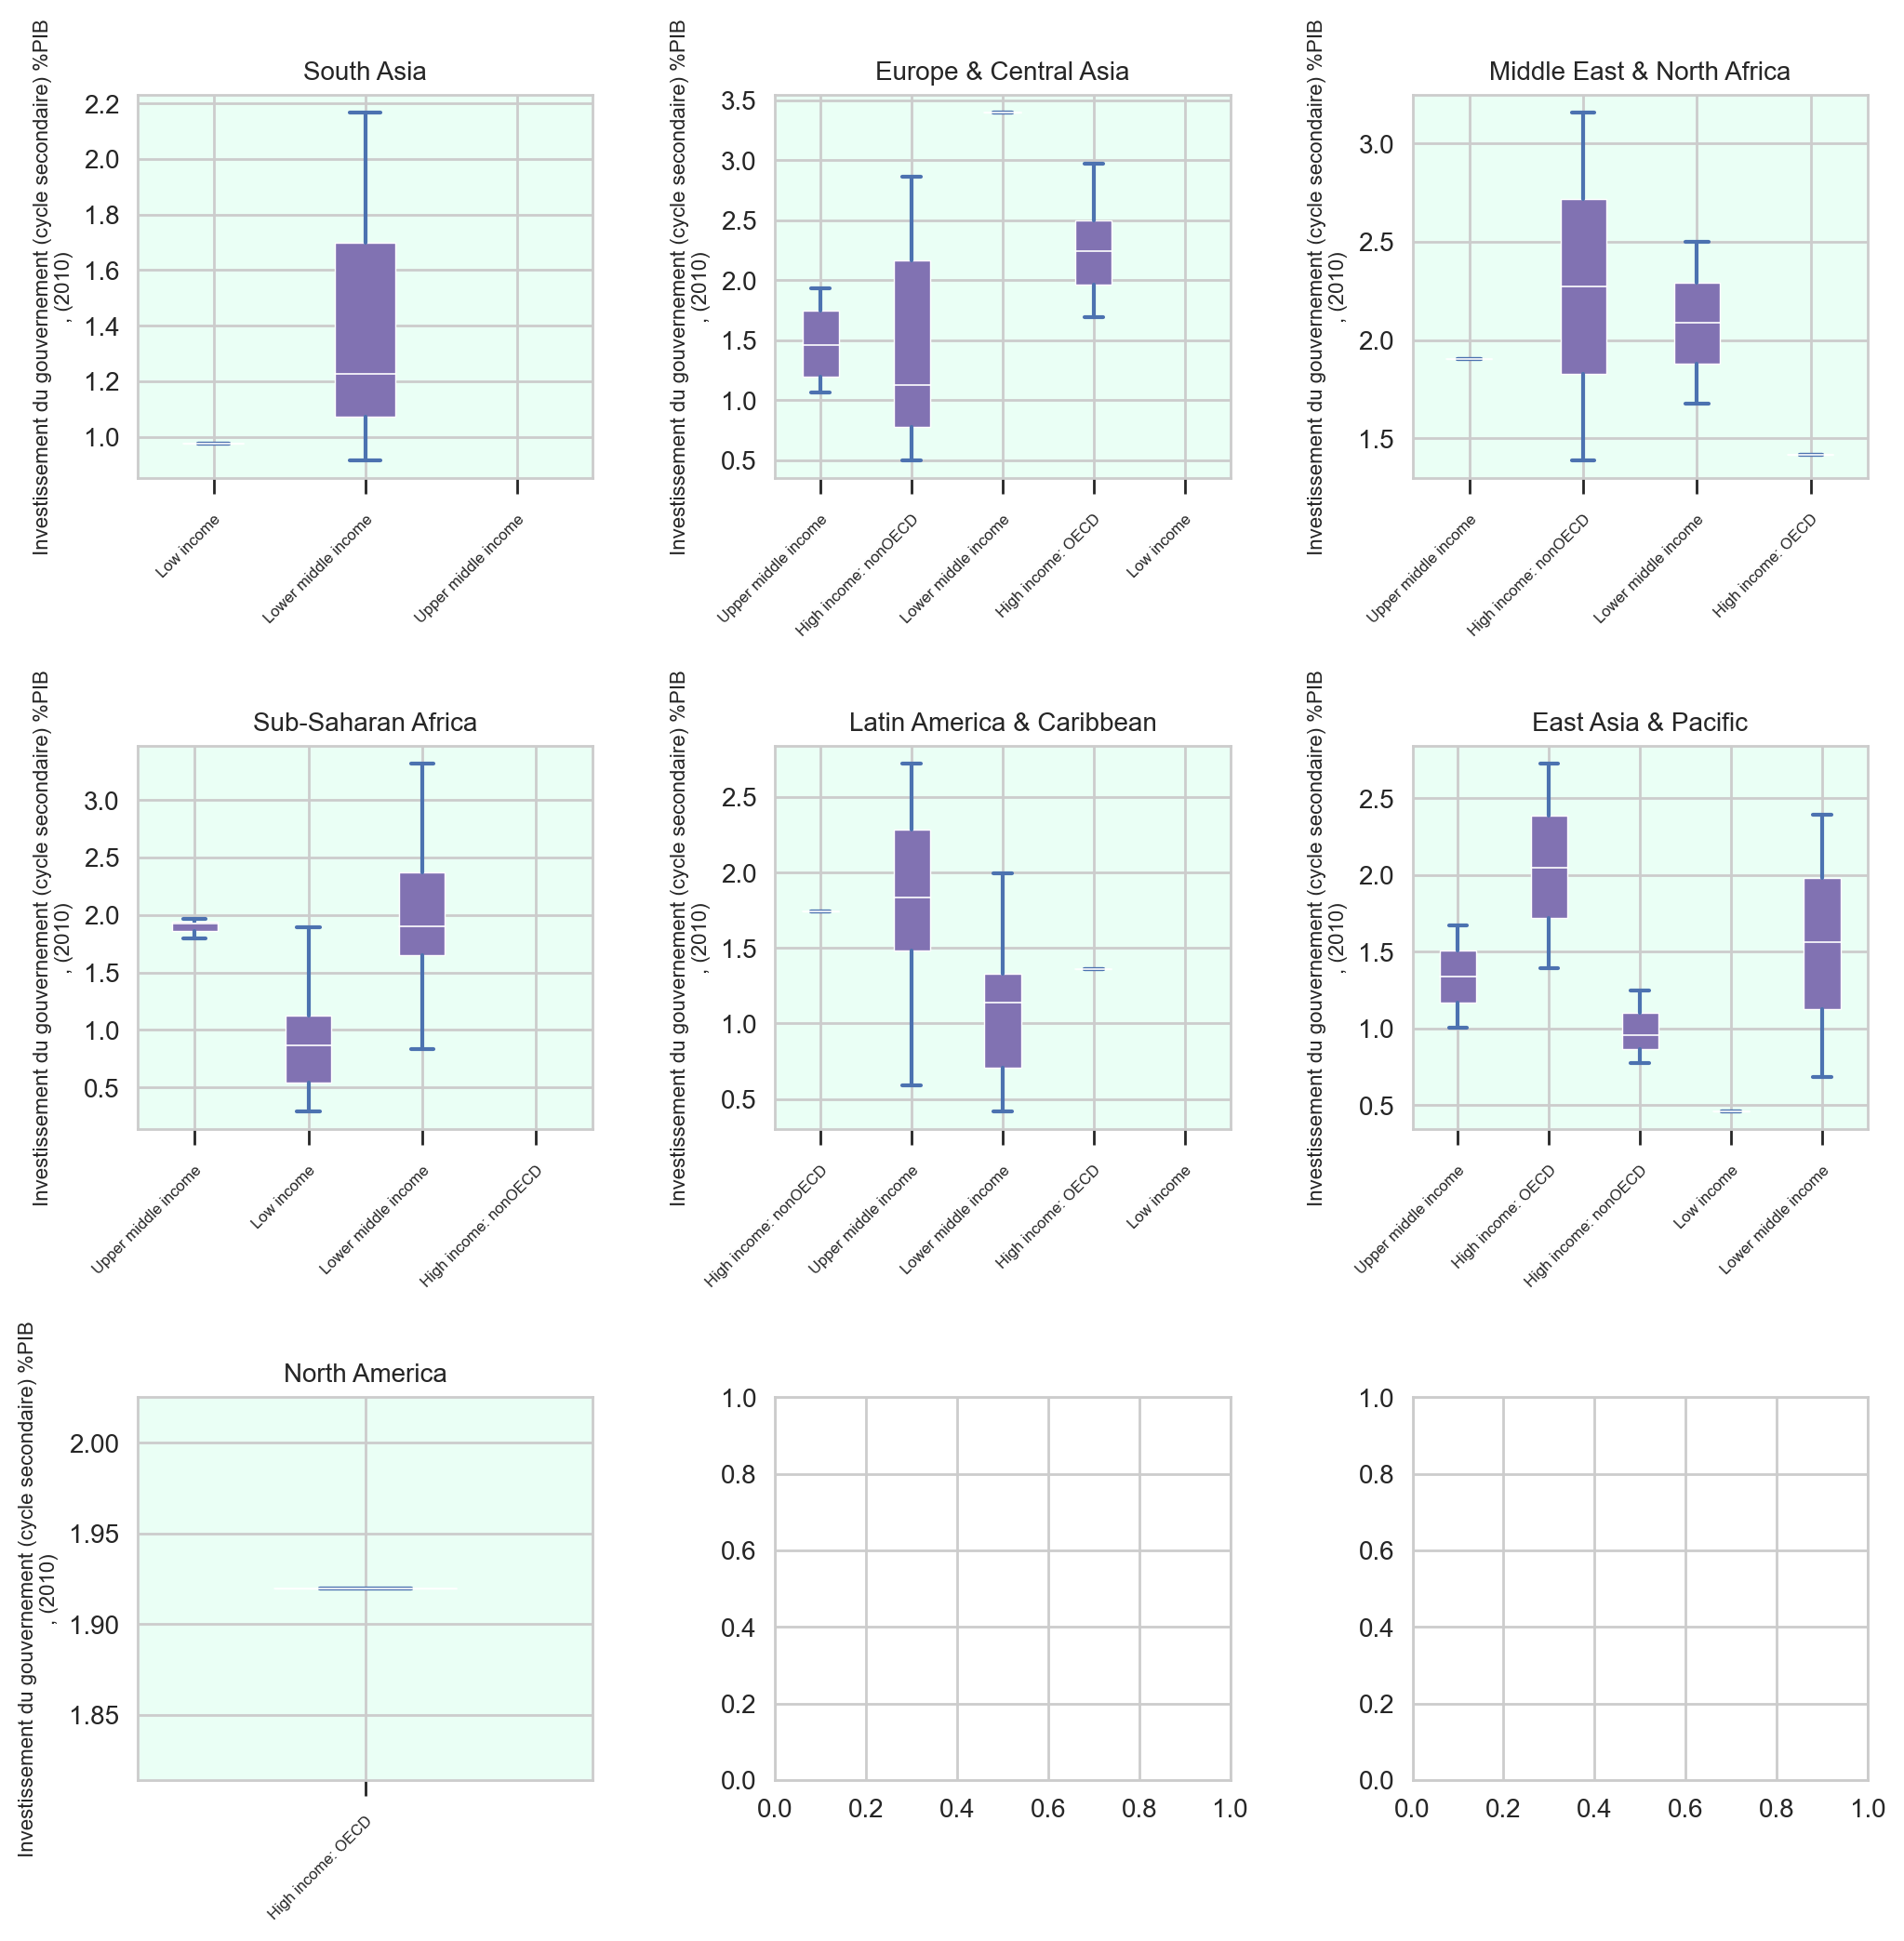

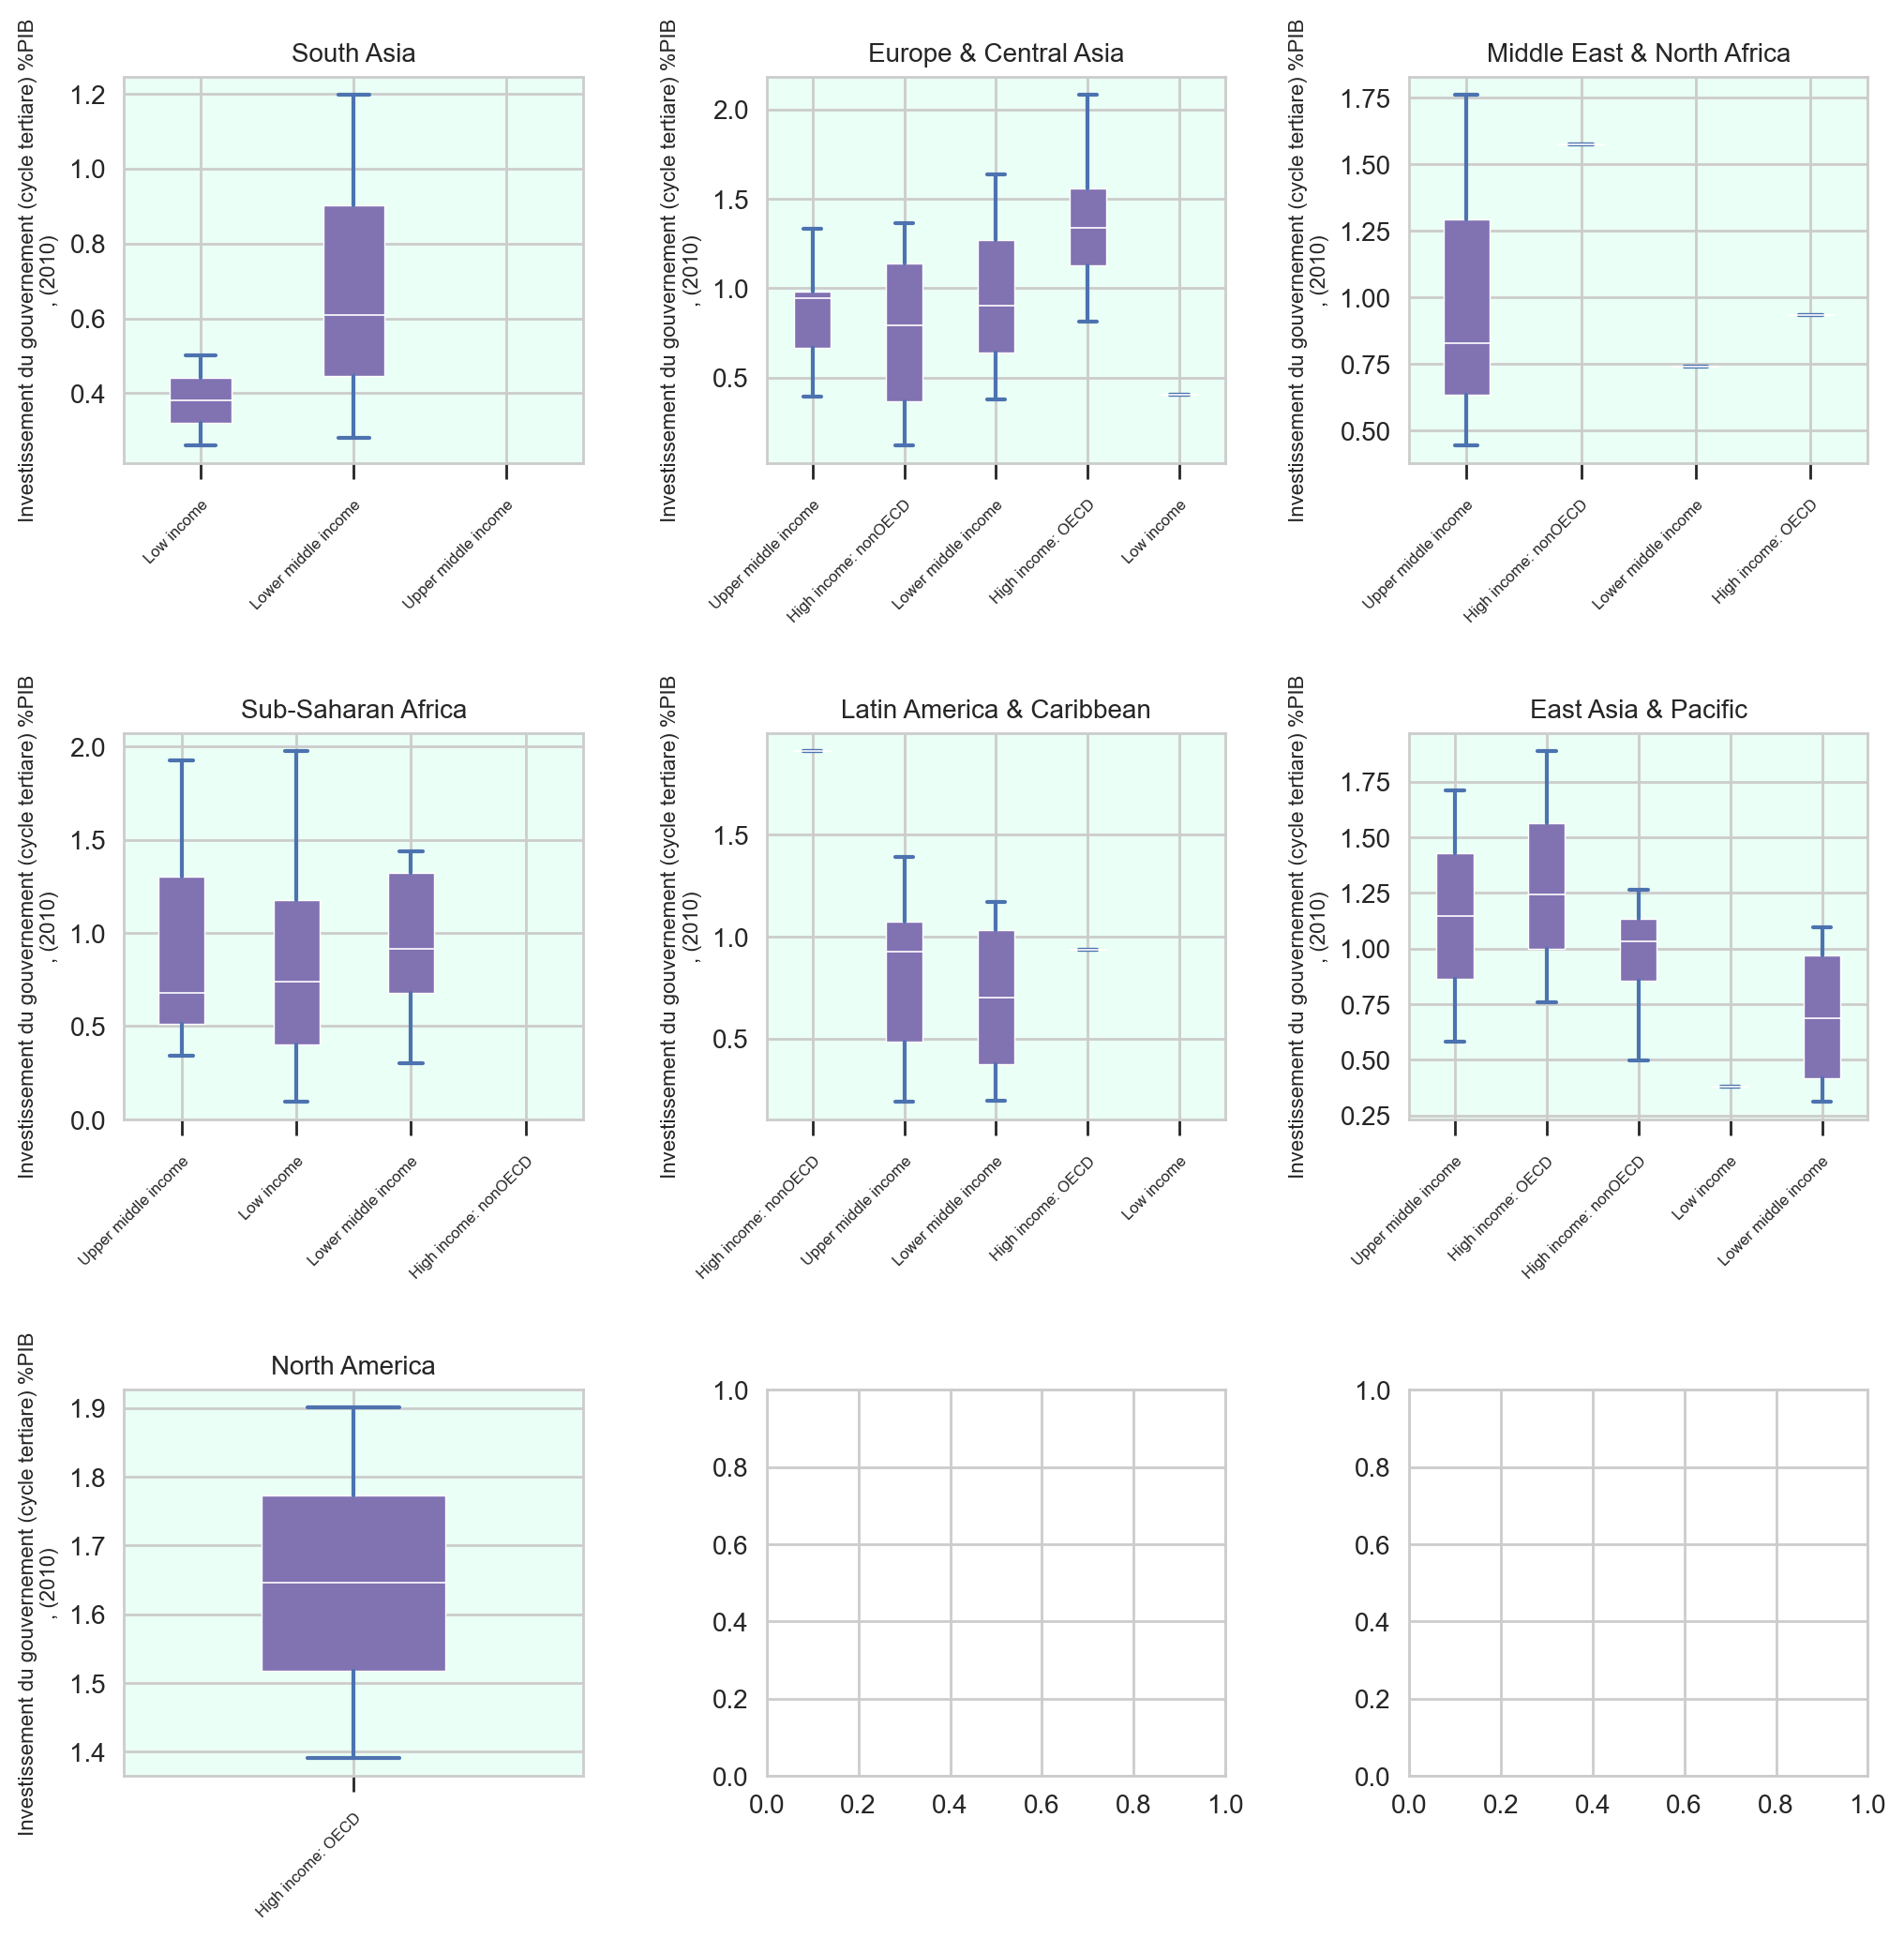

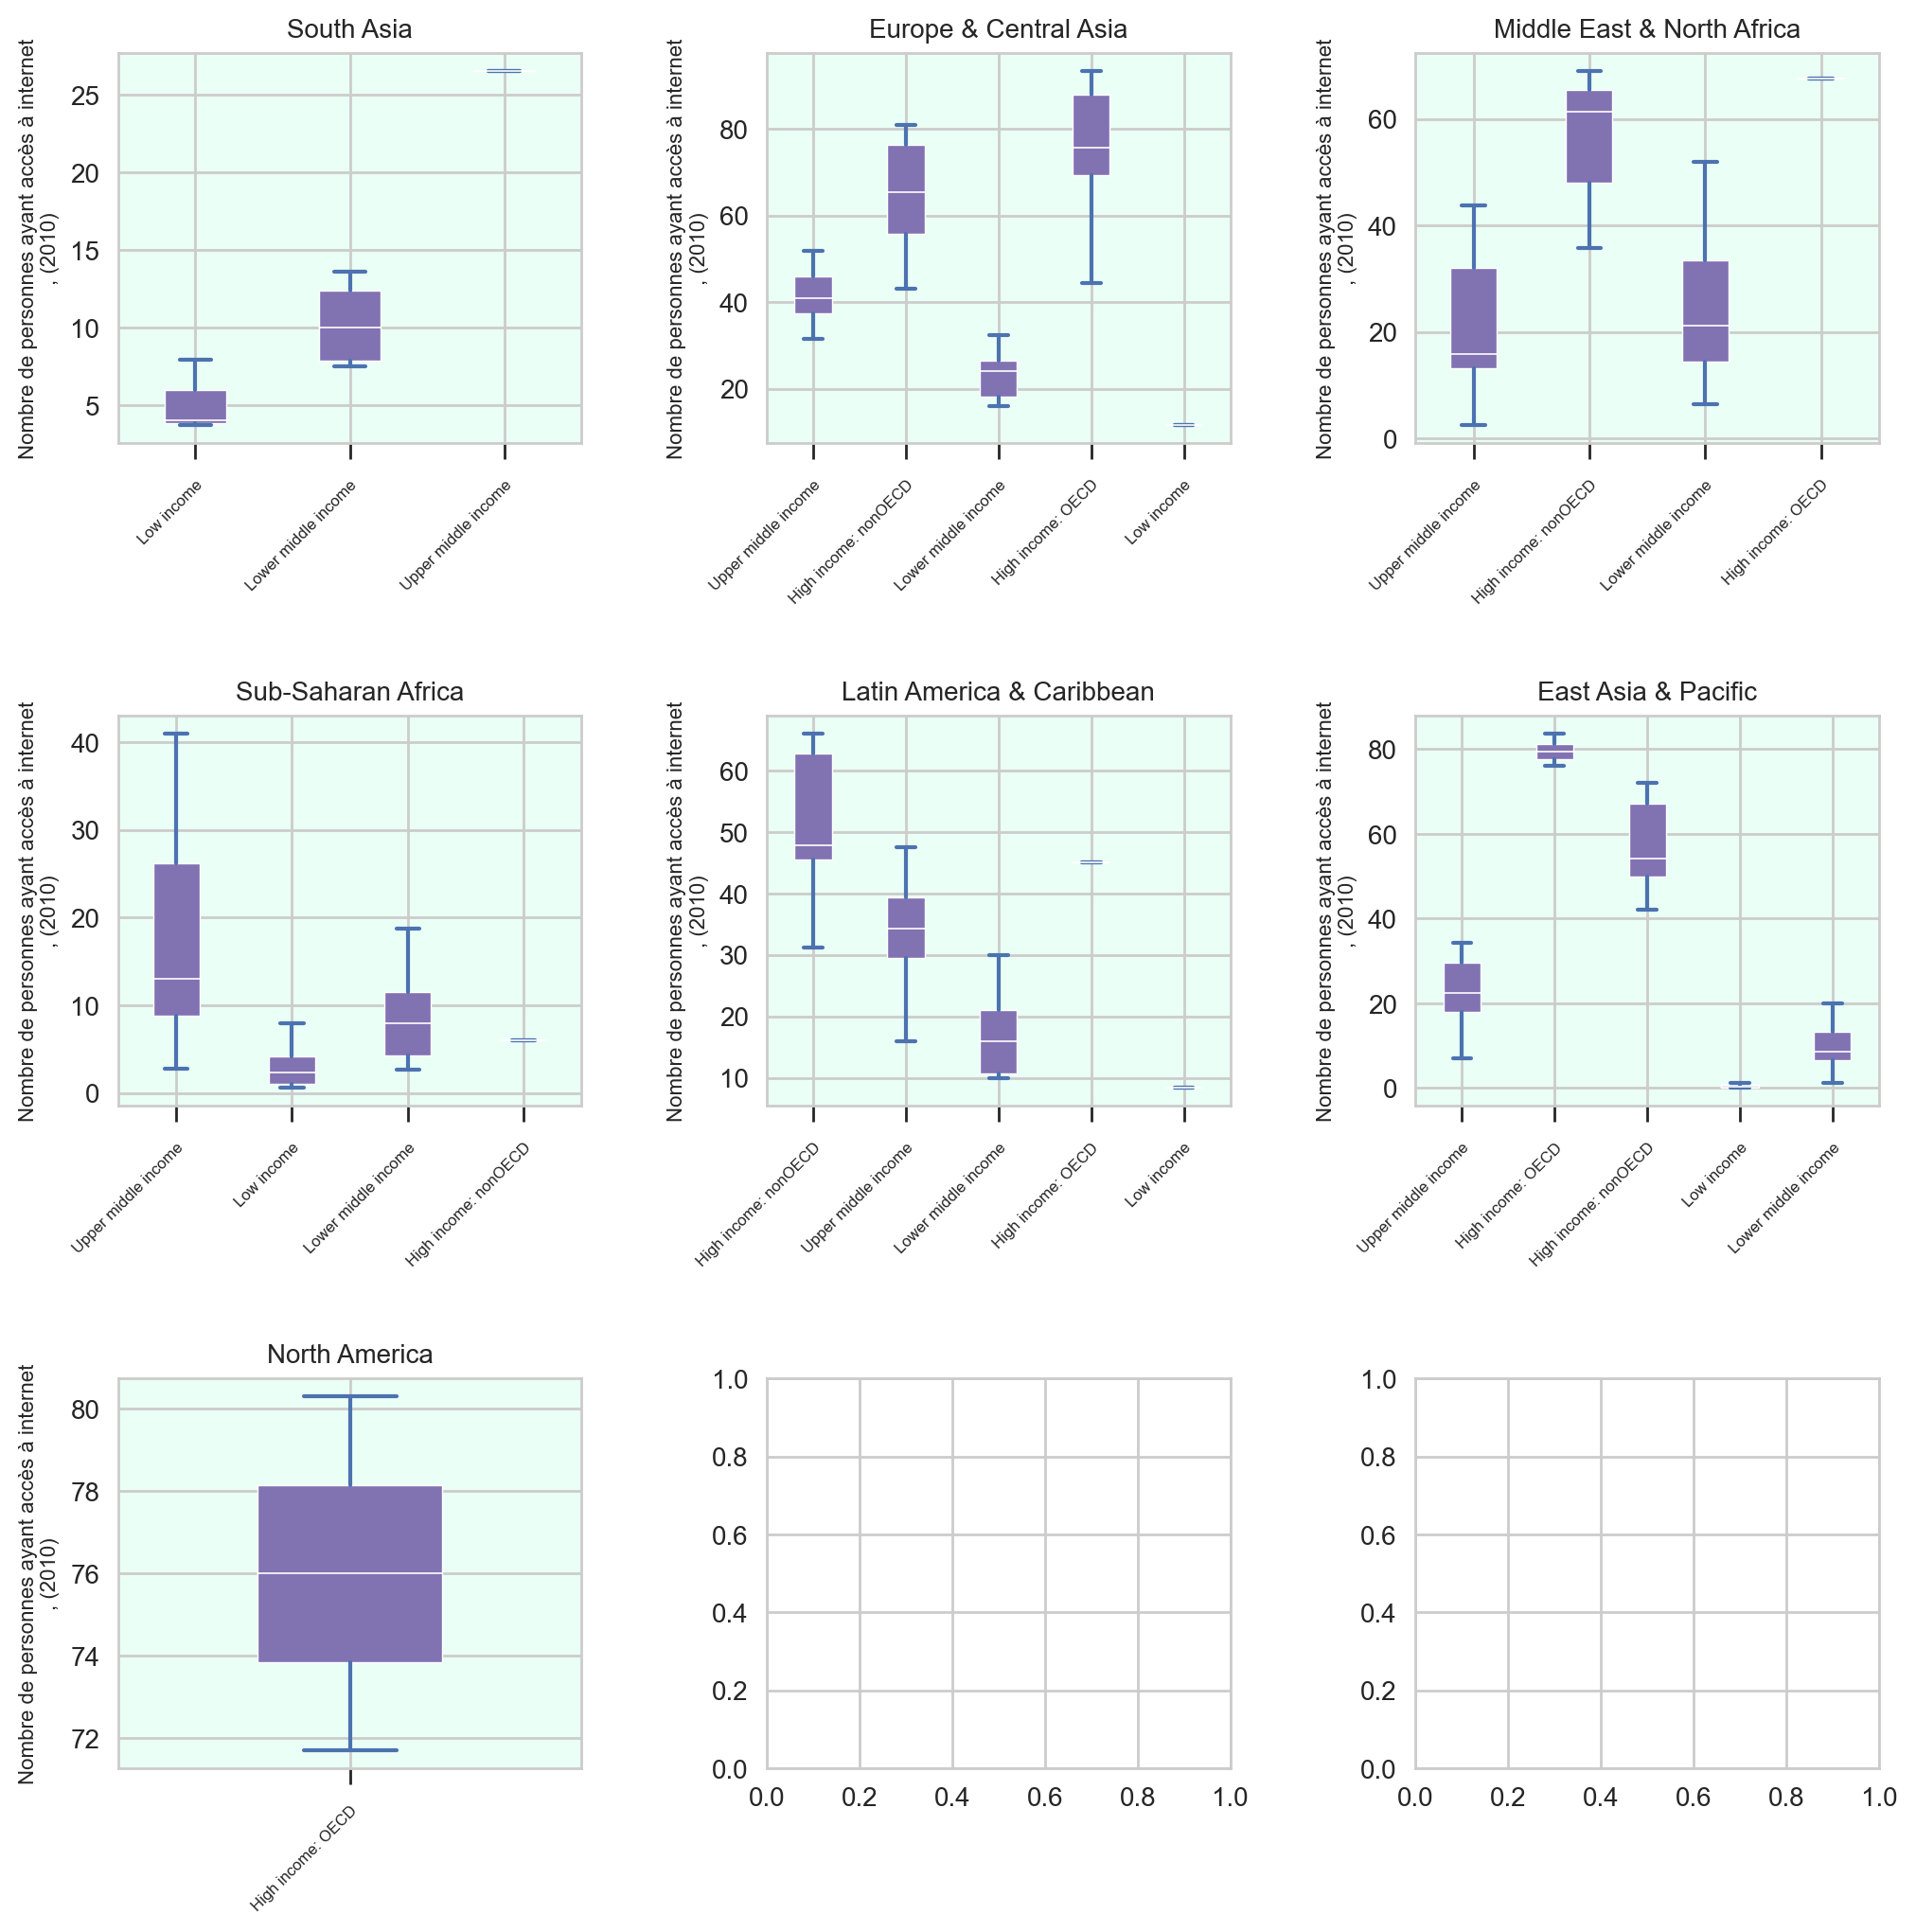

In [181]:
Data_sub.head()
indic = Data_sub['INDICATEUR'].unique().tolist()
print(indic)
for count, i in enumerate(indic):
    fig, ax = plt.subplots(3,3, figsize= (12,12), dpi=200)
    #print(i)
    an_fix = '2010'   
    mask_ind = Data_sub['INDICATEUR']==i
    df_tampon = Data_sub[mask_ind]
    #print(count,i,df_tampon.head())
    reg_ls = df_tampon['RÉGION'].unique().tolist()
    #print('check liste region', reg_ls)
    seq_Y = []
    j=0
    for nu,reg in enumerate(reg_ls): 
        seq_Y = []
        #print('check région',reg)
        df_tampon_0= df_tampon[df_tampon['RÉGION']==reg]
        #print(df_tampon_0.head())
        rev_ls = df_tampon_0['REVENUS'].unique().tolist()
        #print('check revenu',rev_ls)
        if len(rev_ls)==1:
            Y = df_tampon_0[an_fix].values
            Y = Y[np.logical_not(np.isnan(Y))]
            #print('check Y cas 1=',Y)  
            seq_Y.append(Y)
        else :
            #print('check cas 2')
            for c,rev in enumerate(rev_ls):
                #print(rev)
                Y = df_tampon_0.loc[df_tampon_0['REVENUS']==rev,an_fix].values
                Y = Y[np.logical_not(np.isnan(Y))]
                #print('check Y cas 2 =',Y)  
                seq_Y.append(Y)
                #print(seq_Y)
        if nu <3 :
            #print(nu)
            #print('cas nu < 3', rev_ls)
            ax[0,nu].boxplot(seq_Y, widths=0.4, patch_artist=True,
                showmeans=False, showfliers= False,
                medianprops={"color": "white", "linewidth": 0.6},
                boxprops={"facecolor": "C3", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
            tick_position = np.arange(len(seq_Y))+1
            #print(tick_position)
            ax[0,nu].set_xticks(ticks = tick_position,labels = rev_ls)
            ax[0,nu].set_title(reg, fontsize =10, pad = 6)
            ax[0,nu].set_ylabel(dic[i]+'\n, (2010)', fontsize =8)
            ax[0,nu].tick_params(axis = 'x',labelsize =6, rotation =45, 
                                   direction = 'out', length = 6,width = 1, bottom = True)
            plt.setp(ax[0,nu].get_xticklabels(), ha="right", rotation_mode="anchor")
            ax[0,nu].set_facecolor('#eafff5')
        elif nu <6:
            ax[1,nu-4].boxplot(seq_Y, widths=0.4, patch_artist=True,
                showmeans=False, showfliers= False,
                medianprops={"color": "white", "linewidth": 0.6},
                boxprops={"facecolor": "C3", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
            tick_position = np.arange(len(seq_Y))+1
            #print(tick_position)
            ax[1,nu-4].set_xticks(ticks = tick_position,labels = rev_ls)
            ax[1,nu-4].set_title(reg, fontsize =10, pad = 6)
            ax[1,nu-4].set_ylabel(dic[i]+'\n, (2010)', fontsize =8)
            ax[1,nu-4].tick_params(axis = 'x',labelsize =6, rotation =45, 
                                   direction = 'out', length = 6,width = 1, bottom = True)
            plt.setp(ax[1,nu-4].get_xticklabels(), ha="right", rotation_mode="anchor")
            ax[1,nu-4].set_facecolor('#eafff5')
        else: 
            ax[2,nu-6].boxplot(seq_Y, widths=0.4, patch_artist=True,
                showmeans=False, showfliers= False,
                medianprops={"color": "white", "linewidth": 0.6},
                boxprops={"facecolor": "C3", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
            tick_position = np.arange(len(seq_Y))+1
            #print(tick_position)
            ax[2,nu-6].set_xticks(ticks = tick_position,labels = rev_ls)
            ax[2,nu-6].set_title(reg, fontsize =10, pad = 6)
            ax[2,nu-6].set_ylabel(dic[i]+'\n, (2010)', fontsize =8)
            ax[2,nu-6].tick_params(axis = 'x',labelsize =6, rotation =45, 
                                   direction = 'out', length = 6,width = 1, bottom = True)
            plt.setp(ax[2,nu-6].get_xticklabels(), ha="right", rotation_mode="anchor")
            ax[2,nu-6].set_facecolor('#eafff5')
    plt.subplots_adjust(hspace=0.7,wspace=0.4)
    #fig.ylabel(dic[i]+'\n, (2010)')
    plt.savefig('4_2'+i+'_.png',bbox_inches = 'tight')

**Correction et itérations :**

Les disparités que les boxplots des figures précédentes mettent en évidence pour l'année 2010 (l'année la plus renseignée de toute la table), me dissuadent d'implémenter la technique des médianes par region et niveau de revenus. Cette technique inhibe les outliers et fausse les score des futurs pays à fort potentiels.
Pour chaque pays et chaque indicateur, je décide de remplacer les valeurs manquantes par la valeur médiane de chaque ligne et donc propre aux pays étudié. 

In [182]:
Data_sub['NB_NAN'] = Data_sub.isna().sum(axis=1)
print('nombre max de valeur manquantes:',Data_sub['NB_NAN'].max())
Data_sub = Data_sub[Data_sub['NB_NAN'] < Data_sub['NB_NAN'].max()]
print(Data_sub.shape)

#med = np.nanquantile(y,0.5)
#print(med)
#np.nan_to_num(y,copy = False, nan = med)

nombre max de valeur manquantes: 12
(886, 19)


/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/3825265468.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data_sub['NB_NAN'] = Data_sub.isna().sum(axis=1)


<AxesSubplot:>

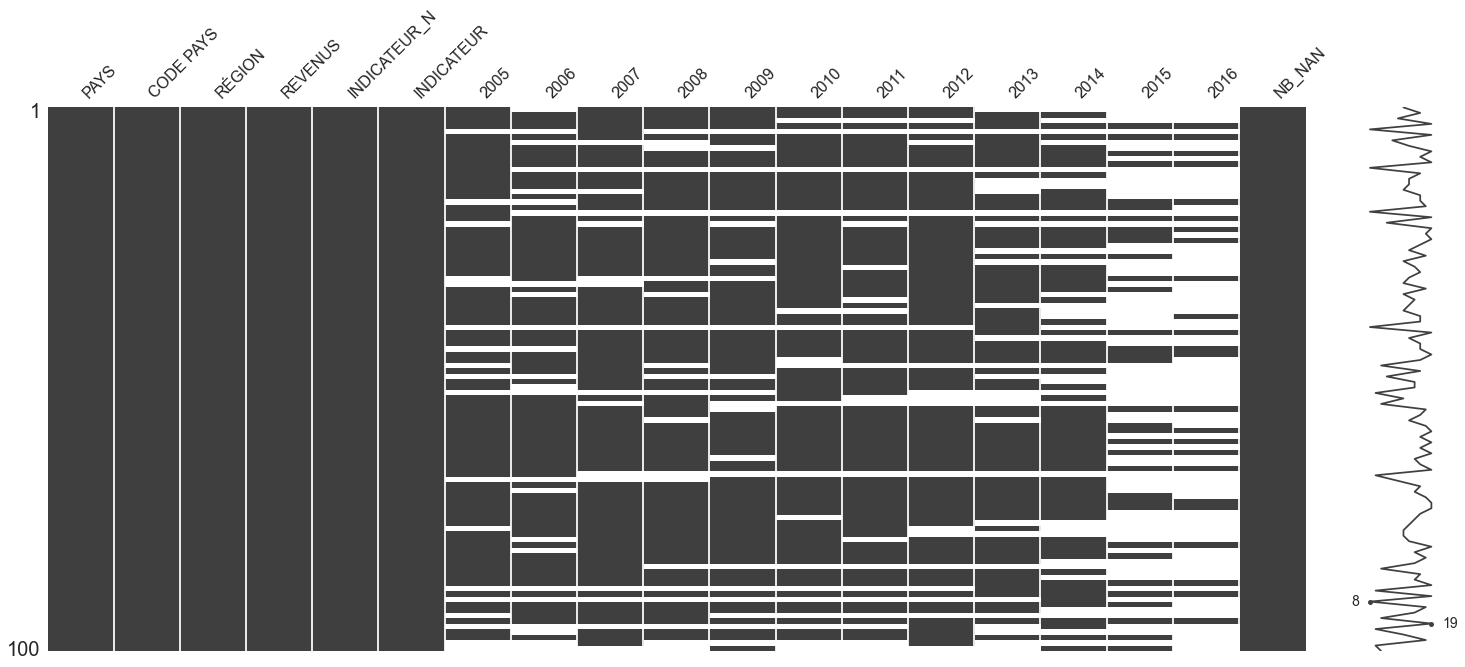

In [183]:
A = Data_sub.sample(100)
%matplotlib inline
msno.matrix(A)

In [184]:
#med = np.nanquantile(y,0.5)
Data_sub = Data_sub.reset_index()
Data_sub = Data_sub.drop(columns = ['index'])
Data_sub.head()


PAYS CODE PAYS                 RÉGION              REVENUS  \
0  Afghanistan       AFG             South Asia           Low income   
1  Afghanistan       AFG             South Asia           Low income   
2  Afghanistan       AFG             South Asia           Low income   
3      Albania       ALB  Europe & Central Asia  Upper middle income   
4      Albania       ALB  Europe & Central Asia  Upper middle income   

                                        INDICATEUR_N      INDICATEUR  \
0  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
1  Enrolment in upper secondary education, both s...         UIS.E.3   
2                    Internet users (per 100 people)  IT.NET.USER.P2   
3  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
4  Enrolment in upper secondary education, both s...         UIS.E.3   

            2005           2006      2007       2008       2009      2010  \
0            NaN            NaN       NaN        NaN   95185.00       NaN   
1  190104.000000  271144.000000  285290.0  361193.00  443002.00  567344.0   
2       1.224148       2.107124       1.9       1.84       3.55       4.0   
3   63257.000000   74747.000000   86863.0   90606.00   93139.00  122326.0   
4  156015.000000  164572.000000  173269.0  177572.00  132803.00  140657.0   

       2011           2012      2013      2014       2015       2016  NB_NAN  
0   97504.0            NaN       NaN  262874.0        NaN        NaN       9  
1  743405.0  881415.000000  969267.0  968769.0        NaN        NaN       2  
2       5.0       5.454545       5.9       7.0       8.26  10.595726       0  
3  134877.0  160839.000000  173029.0  173819.0  160527.00        NaN       1  
4  150134.0  152182.000000  154425.0  151937.0        NaN        NaN       2

In [185]:
#Stratégie (itération 1)
df_Med = Data_sub.groupby(['CODE PAYS','PAYS','INDICATEUR',]).median()

In [186]:
df_Med.head()
df_Med.shape

(886, 13)

In [187]:
print(df_Med.isna().mean())
print('taux moyen de valeurs manquantes ',df_Med.isna().mean().mean())

2005      0.274266
2006      0.284424
2007      0.262980
2008      0.240406
2009      0.226862
2010      0.206546
2011      0.206546
2012      0.252822
2013      0.306998
2014      0.425508
2015      0.645598
2016      0.770880
NB_NAN    0.000000
dtype: float64
taux moyen de valeurs manquantes  0.315679805521792


J'obtiens un tableau de 886 lignes et de 13 colonnes. À chaque ligne est associé un indicateur, une région, une catégorie de revenu (clé primaire). Les données du tableau sont les médianes de cette clé primaire de 2005 à 2016. Il y a un taux moyen de valeur manquantes d'environ 32 %. 

Je choisie de remplir la table def_Med de proche en proche 

**Stratégie :**

- Remplir df_Med de proche en proche avec ***fillna()***, ligne par ligne, en gardant en référence la dernière valeur disponible. 

- Remplir Data_crit à de l'aide ***fillna()*** et de la table df_Med 

In [188]:
df_Med = df_Med.reset_index()
df_Med = df_Med.drop(columns = 'NB_NAN')
df_Med = df_Med.fillna(method ='bfill', axis = 1)
df_Med = df_Med.fillna(method ='ffill', axis = 1)
df_Med.head()

CODE PAYS   PAYS         INDICATEUR        2005        2006        2007  \
0       ABW  Aruba     IT.NET.USER.P2    25.40000    28.00000    30.90000   
1       ABW  Aruba        SE.TER.ENRL  2106.00000  2094.00000  2232.00000   
2       ABW  Aruba            UIS.E.3  3678.00000  3883.00000  4430.00000   
3       ABW  Aruba  UIS.XGDP.23.FSGOV     1.25296     1.25296     1.25296   
4       ABW  Aruba  UIS.XGDP.56.FSGOV     0.53760     0.53760     0.53760   

         2008        2009        2010        2011        2012        2013  \
0    52.00000    58.00000    62.00000    69.00000    74.00000    78.90000   
1  2242.00000  2196.00000  2330.00000  2504.00000  2621.00000  1181.00000   
2  4060.00000  3976.00000  3913.00000  3970.00000  4841.00000  4841.00000   
3     1.25296     1.25296     1.25296     1.25296     1.25296     1.25296   
4     0.53760     0.53760     0.53760     0.53760     0.53760     0.53760   

         2014         2015         2016  
0    83.78000    88.661227    93.542454  
1  1235.00000  1166.000000  1166.000000  
2  4841.00000  4841.000000  4841.000000  
3     1.25296     1.252960     1.252960  
4     0.53760     0.537600     0.537600

In [189]:
#Test du remplissage de df_Med
print(df_Med.isna().mean())
df_Med.head()

CODE PAYS     0.0
PAYS          0.0
INDICATEUR    0.0
2005          0.0
2006          0.0
2007          0.0
2008          0.0
2009          0.0
2010          0.0
2011          0.0
2012          0.0
2013          0.0
2014          0.0
2015          0.0
2016          0.0
dtype: float64


CODE PAYS   PAYS         INDICATEUR        2005        2006        2007  \
0       ABW  Aruba     IT.NET.USER.P2    25.40000    28.00000    30.90000   
1       ABW  Aruba        SE.TER.ENRL  2106.00000  2094.00000  2232.00000   
2       ABW  Aruba            UIS.E.3  3678.00000  3883.00000  4430.00000   
3       ABW  Aruba  UIS.XGDP.23.FSGOV     1.25296     1.25296     1.25296   
4       ABW  Aruba  UIS.XGDP.56.FSGOV     0.53760     0.53760     0.53760   

         2008        2009        2010        2011        2012        2013  \
0    52.00000    58.00000    62.00000    69.00000    74.00000    78.90000   
1  2242.00000  2196.00000  2330.00000  2504.00000  2621.00000  1181.00000   
2  4060.00000  3976.00000  3913.00000  3970.00000  4841.00000  4841.00000   
3     1.25296     1.25296     1.25296     1.25296     1.25296     1.25296   
4     0.53760     0.53760     0.53760     0.53760     0.53760     0.53760   

         2014         2015         2016  
0    83.78000    88.661227    93.542454  
1  1235.00000  1166.000000  1166.000000  
2  4841.00000  4841.000000  4841.000000  
3     1.25296     1.252960     1.252960  
4     0.53760     0.537600     0.537600

In [190]:
#Data_sub[Data_sub['CODE PAYS']=='CHN']

In [191]:
col = Data_sub.columns[6:-1] #col est la liste constitué des années 2005 à 2016
col.to_list()
print(col)

##Deuxième tentative (OK)
for i,r in Data_sub.iterrows():
    if r.NB_NAN >0 : #Le code ne s'applique qu'aux lignes ayant des valeurs nulles
        #print('check 1',r[0])
        #reg = r.RÉGION - stratégie, itération 0
        #rev = r.REVENUS - stratégie, itération 0
        pays = r['CODE PAYS']
        cr = r['INDICATEUR']
        #print('check 2',reg,rev,cr)
        for idx,an in enumerate(col):
            #print('check 3',an)
            if np.isnan(r[an]): #utilisation de np.isnan() car  isna() ne fonctionne pas pour les float
                #print(an)
                mask1= df_Med['INDICATEUR']==cr
                mask2 = df_Med['CODE PAYS']==pays
                #mask2= df_Med['RÉGION']==reg - stratégie, itération 0
                #mask3= df_Med['REVENUS']==rev - stratégie, itération 0
                mask4 = (mask1) & (mask2)
                #print(i,idx)
                #print(df_Med.loc[mask4,an])
                Data_sub.iloc[i,idx+6]= df_Med.loc[mask4,an].values

Index(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016'],
      dtype='object')


In [192]:
Data_sub.isna().mean()

PAYS            0.0
CODE PAYS       0.0
RÉGION          0.0
REVENUS         0.0
INDICATEUR_N    0.0
INDICATEUR      0.0
2005            0.0
2006            0.0
2007            0.0
2008            0.0
2009            0.0
2010            0.0
2011            0.0
2012            0.0
2013            0.0
2014            0.0
2015            0.0
2016            0.0
NB_NAN          0.0
dtype: float64

In [193]:
Data_sub.NB_NAN = round(1-(Data_sub.NB_NAN/11),2)
Data_sub= Data_sub.rename(columns = {'NB_NAN': 'TAUX DE REMPLISSAGE'})
print('La table Data_sub a ', Data_sub.shape[0] ,'lignes')
Data_sub.head()

La table Data_sub a  886 lignes


PAYS CODE PAYS                 RÉGION              REVENUS  \
0  Afghanistan       AFG             South Asia           Low income   
1  Afghanistan       AFG             South Asia           Low income   
2  Afghanistan       AFG             South Asia           Low income   
3      Albania       ALB  Europe & Central Asia  Upper middle income   
4      Albania       ALB  Europe & Central Asia  Upper middle income   

                                        INDICATEUR_N      INDICATEUR  \
0  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
1  Enrolment in upper secondary education, both s...         UIS.E.3   
2                    Internet users (per 100 people)  IT.NET.USER.P2   
3  Enrolment in tertiary education, all programme...     SE.TER.ENRL   
4  Enrolment in upper secondary education, both s...         UIS.E.3   

            2005           2006      2007       2008       2009      2010  \
0   95185.000000   95185.000000   95185.0   95185.00   95185.00   97504.0   
1  190104.000000  271144.000000  285290.0  361193.00  443002.00  567344.0   
2       1.224148       2.107124       1.9       1.84       3.55       4.0   
3   63257.000000   74747.000000   86863.0   90606.00   93139.00  122326.0   
4  156015.000000  164572.000000  173269.0  177572.00  132803.00  140657.0   

       2011           2012      2013      2014       2015           2016  \
0   97504.0  262874.000000  262874.0  262874.0  262874.00  262874.000000   
1  743405.0  881415.000000  969267.0  968769.0  968769.00  968769.000000   
2       5.0       5.454545       5.9       7.0       8.26      10.595726   
3  134877.0  160839.000000  173029.0  173819.0  160527.00  160527.000000   
4  150134.0  152182.000000  154425.0  151937.0  151937.00  151937.000000   

   TAUX DE REMPLISSAGE  
0                 0.18  
1                 0.82  
2                 1.00  
3                 0.91  
4                 0.82

In [194]:
#df_Med[df_Med['RÉGION']=='South Asia']
#Data_sub[Data_sub['CODE PAYS'] == 'AFG'].iloc[0]

In [195]:
##Création d'un nouvel indicateur ACC.IT.EL
#Fonction access_eleve renvoie le nombre d'élève ayant accès à internet
#et le nombre d'élève ayant accès à un PC pour l'un des indicateurs 'SE.TER.ENRL' ou 'UIS.E.3' donné.

def access_eleve2(indic, codepays, df, an): #indicateur 'SE.TER.ENRL' ou 'UIS.E.3'
    ind_lis = df.loc[df['CODE PAYS']==codepays,'INDICATEUR'].unique().tolist()
    #print('check ', ind_lis)
    #print(indic)
    ind_it = 'IT.NET.USER.P2'
    mask00 = df['CODE PAYS']==codepays
    mask01 = df['INDICATEUR']==indic
    nb_= df.loc[(mask00 & mask01),an].values.tolist()[0]
    #print('Check 0',nb_)
    cible_it = np.nan
    mask2 = df['CODE PAYS']== codepays
    if(ind_it in ind_lis): 
        mask1 = df['INDICATEUR']==ind_it
        #print(mask1)
        nb_it = df.loc[(mask1 & mask2),an].values.tolist()[0]
        #print('Check 6, cas 3',nb_it/100)
        cible_it = round(nb_*(nb_it/100),0)
        #print('check 7 cas 3, ',cible_it)
    else:
        print('Attention, pas d','indicateur d','accesibilité',ind_it)
        cible_it = np.nan
        
    return cible_it

In [196]:
#reset button data_sub
#Data_sub= Data_sub[~(Data_sub['INDICATEUR']=='ACC.IT.EL')]
#Data_sub.tail()

In [197]:
## Ajout de l'indicateur ACC.IT.EL à la table Data_sub
PAYS_ls = Data_sub['CODE PAYS'].unique().tolist() 
# OK print(PAYS_ls)
col = Data_sub.columns[6:-1] #col est la liste constitué des années 2005 à 2016
col = col.to_list()
#OK print(col)
y = 0

## ACC.IT.EL

ins_univ = 'SE.TER.ENRL'
ins_lyc = 'UIS.E.3'

for pays in PAYS_ls:
    print(pays)
    mask = Data_sub['CODE PAYS']==pays    
    y = 0
    ls_indic = Data_sub.loc[mask,'INDICATEUR'].unique().tolist()
    print('check 1 liste indicateur :', ls_indic)
    if (ins_univ in ls_indic) and (ins_lyc in ls_indic):
        Data_sub.loc[len(Data_sub),:] = Data_sub[mask].iloc[0]
        Data_sub.iloc[-1,5] = 'ACC.IT.EL'
        Data_sub.iloc[-1,4] = 'Nombre d\'élèves ayant accès à internet'
        for an in col:
            print(an)
            ly_it = access_eleve2 (ins_lyc, pays, Data_sub,an)
            univ_it = access_eleve2 (ins_univ, pays, Data_sub,an)
            y = ly_it + univ_it
            mask01 = Data_sub['INDICATEUR']=='ACC.IT.EL'
            Data_sub.loc[(mask & mask01),an] = y
    elif (ins_univ in ls_indic):
        Data_sub.loc[len(Data_sub),:] = Data_sub[mask].iloc[0]
        Data_sub.iloc[-1,5] = 'ACC.IT.EL'
        Data_sub.iloc[-1,4] = 'Nombre d\'élèves ayant accès à internet'
        for an in col:
            univ_it = access_eleve2 (ins_univ, pays, Data_sub,an)
            print(univ_it)
            y = univ_it
            mask01 = Data_sub['INDICATEUR']=='ACC.IT.EL'
            Data_sub.loc[(mask & mask01),an] = y     
    elif (ins_lyc in ls_indic):
        Data_sub.loc[len(Data_sub),:] = Data_sub[mask].iloc[0]
        Data_sub.iloc[-1,5] = 'ACC.IT.EL'
        Data_sub.iloc[-1,4] = 'Nombre d\'élèves ayant accès à internet'
        for an in col:
            ly_it = access_eleve2 (ins_lyc, pays, Data_sub,an)
            y = ly_it
            mask01 = Data_sub['INDICATEUR']=='ACC.IT.EL'
            Data_sub.loc[(mask & mask01),an] = y
    else: 
        print('Absence des indicateurs',ins_lyc, ins_univ)

Data_sub.tail()

## DIFF.INV.REV

#Data_sub.loc[len(Data_sub),:] = Data_sub[mask].iloc[0]
#Data_sub.iloc[-1,5] = 'DIFF.INV.REV'

AFG
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
ALB
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
DZA
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
ASM
check 1 liste indicateur : ['SE.TER.ENRL']
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
nan
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
nan
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
nan
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
nan
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
nan
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
nan
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
nan
Attention, pas d indicateur d accesibilité IT.NE

2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
CUB
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
CUW
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV']
2005
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2006
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2007
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2008
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2009
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2010
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Atte

2009
2010
2011
2012
2013
2014
2015
2016
JAM
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
JPN
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
JOR
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
KAZ
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
KEN
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
KIR
check 1 liste indicateur : ['UIS.E.3', 'IT.NET.USER.P2']
PRK
check 1 liste indicateur :

Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2009
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2010
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2011
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2012
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2013
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2014
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2015
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
2016
Attention, pas d indicateur d accesibilité IT.NET.USER.P2
Attention, pas d indicateur d ac

2011
2012
2013
2014
2015
2016
TJK
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
TZA
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
THA
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
TLS
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
TGO
check 1 liste indicateur : ['SE.TER.ENRL', 'UIS.E.3', 'UIS.XGDP.23.FSGOV', 'UIS.XGDP.56.FSGOV', 'IT.NET.USER.P2']
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
TON
check 1 liste indicateur : ['UIS.E.3', 'IT.NET.USER.P2']
TTO
check 1 liste indicateur : ['UIS.XGD

PAYS CODE PAYS                      RÉGION  \
1080  Virgin Islands (U.S.)       VIR   Latin America & Caribbean   
1081     West Bank and Gaza       PSE  Middle East & North Africa   
1082            Yemen, Rep.       YEM  Middle East & North Africa   
1083                 Zambia       ZMB          Sub-Saharan Africa   
1084               Zimbabwe       ZWE          Sub-Saharan Africa   

                   REVENUS                            INDICATEUR_N INDICATEUR  \
1080  High income: nonOECD  Nombre d'élèves ayant accès à internet  ACC.IT.EL   
1081   Lower middle income  Nombre d'élèves ayant accès à internet  ACC.IT.EL   
1082   Lower middle income  Nombre d'élèves ayant accès à internet  ACC.IT.EL   
1083   Lower middle income  Nombre d'élèves ayant accès à internet  ACC.IT.EL   
1084            Low income  Nombre d'élèves ayant accès à internet  ACC.IT.EL   

          2005      2006      2007      2008      2009      2010      2011  \
1080    2488.0    2488.0    2488.0    2488.0    2488.0    2488.0    2488.0   
1081  138139.0  150128.0  169373.0  180905.0  182565.0  196625.0  213973.0   
1082  199813.0  200853.0  236972.0  251187.0  274827.0  272130.0  267498.0   
1083   55759.0   55759.0   55759.0   55759.0   55759.0   55759.0   55759.0   
1084   94611.0   94611.0   94611.0   94611.0   94611.0   94611.0   93285.0   

          2012      2013      2014      2015      2016  TAUX DE REMPLISSAGE  
1080    2488.0    2488.0    2488.0    2488.0    2488.0                 0.00  
1081  217502.0  213217.0  213935.0  221018.0  221018.0                 0.91  
1082  267498.0  267498.0  267498.0  267498.0  267498.0                 0.55  
1083   56680.0   56680.0   56680.0   56680.0   56680.0                 0.09  
1084   94012.0   94115.0  135575.0  135575.0  135575.0                 0.36

## <a name="C25"> 4.3 Évolution du potentiel et table ***Data_score*** </a> 

In [198]:
from numpy.linalg import inv
def coeff2(indic,df,an):
    #indic : un string - un indicateur présent dans la table df 
    #df : table, dataframe 
    #an : un string - une année présente dans la table df
    
    max_ind = df.loc[df['INDICATEUR']==indic,an].max()
    min_ind = df.loc[df['INDICATEUR']==indic,an].min()
    #print('min, max check 2',min_ind, max_ind)
    Mat = np.array([[min_ind, 1],
                    [max_ind, 1]])
    vec =  np.array([[0],
                     [5]])
    Mat_inv = inv(Mat)
    coeff= np.dot(Mat_inv,vec)
    alpha=coeff[0].item()
    beta= coeff[1].item()
    #print('check final:','valeur max = ',max_ind, ',score calculé avec alpha et beta = ',round((max_ind*alpha) + beta,1))
    return alpha, beta


In [199]:
S_0 = 0
S = 0
## Création du dataframe Data_score. 
## Le dataframe Data_score a la même forme que Data_crit. 
## Pour chaque donnée présente dans Data_crit, Data_score renferme aux mêmes coordonnées, 
## le score de cette valeur calculé à l'aide de la fonction coeff
CRIT = [] #Liste des indicateurs/critères sélectionnés
CRIT = ['UIS.E.3','SE.TER.ENRL','ACC.IT.EL',
 'UIS.XGDP.56.FSGOV',
 'UIS.XGDP.23.FSGOV']
an_data = Data_sub.columns.tolist()[6:-1]
dic_coeff2 = {}
Data_score = Data_sub[~(Data_sub['INDICATEUR']== 'IT.NET.USER.P2')] #Initialisation
Data_score = Data_score.drop(columns = 'TAUX DE REMPLISSAGE')

for indic in CRIT:   
    df_tampon = Data_sub[Data_sub['INDICATEUR']==indic]
    PAYS_ls = df_tampon['CODE PAYS'].unique().tolist() 
    for an in an_data:
        #print(df_tampon)
        alpha, beta = coeff2(indic,df_tampon,an)
        dic_coeff2[an]= [alpha,beta]
        #print('check an',an)
        #print('check dic_coeff2',dic_coeff2[an])
        for pays in PAYS_ls:
            #print(pays)
            mask_ind = Data_score['INDICATEUR']==indic
            mask_pays = Data_score['CODE PAYS']==pays
            x = Data_score.loc[(mask_ind & mask_pays), an].values.item()
            #print('x',x)
            alpha, beta = dic_coeff2[an]
            #print(alpha, beta)
            y = alpha*x + beta
            Data_score.loc[(mask_ind & mask_pays), an] = round(y,2) 
    
Data_score.head()


PAYS CODE PAYS                 RÉGION              REVENUS  \
0  Afghanistan       AFG             South Asia           Low income   
1  Afghanistan       AFG             South Asia           Low income   
3      Albania       ALB  Europe & Central Asia  Upper middle income   
4      Albania       ALB  Europe & Central Asia  Upper middle income   
5      Albania       ALB  Europe & Central Asia  Upper middle income   

                                        INDICATEUR_N         INDICATEUR  2005  \
0  Enrolment in tertiary education, all programme...        SE.TER.ENRL  0.02   
1  Enrolment in upper secondary education, both s...            UIS.E.3  0.02   
3  Enrolment in tertiary education, all programme...        SE.TER.ENRL  0.02   
4  Enrolment in upper secondary education, both s...            UIS.E.3  0.02   
5  Government expenditure on secondary education ...  UIS.XGDP.23.FSGOV  0.73   

   2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  0.02  0.02  0.02  0.02  0.02  0.02  0.04  0.04  0.03  0.03  0.03  
1  0.03  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.09  0.09  0.09  
3  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.03  0.02  0.02  0.02  
4  0.02  0.02  0.02  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  
5  0.79  0.73  0.75  0.83  0.83  0.60  0.61  0.61  0.61  0.61  0.61

In [200]:
Data_score = Data_score.reset_index()
Data_score = Data_score.drop(columns = 'index')
Data_score.head()

PAYS CODE PAYS                 RÉGION              REVENUS  \
0  Afghanistan       AFG             South Asia           Low income   
1  Afghanistan       AFG             South Asia           Low income   
2      Albania       ALB  Europe & Central Asia  Upper middle income   
3      Albania       ALB  Europe & Central Asia  Upper middle income   
4      Albania       ALB  Europe & Central Asia  Upper middle income   

                                        INDICATEUR_N         INDICATEUR  2005  \
0  Enrolment in tertiary education, all programme...        SE.TER.ENRL  0.02   
1  Enrolment in upper secondary education, both s...            UIS.E.3  0.02   
2  Enrolment in tertiary education, all programme...        SE.TER.ENRL  0.02   
3  Enrolment in upper secondary education, both s...            UIS.E.3  0.02   
4  Government expenditure on secondary education ...  UIS.XGDP.23.FSGOV  0.73   

   2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  0.02  0.02  0.02  0.02  0.02  0.02  0.04  0.04  0.03  0.03  0.03  
1  0.03  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.09  0.09  0.09  
2  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.03  0.02  0.02  0.02  
3  0.02  0.02  0.02  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  
4  0.79  0.73  0.75  0.83  0.83  0.60  0.61  0.61  0.61  0.61  0.61

In [201]:
Data_score_v0 = Data_score #Sauvegarde

In [202]:
##Ajout du score revenu à la table Data_score
print(dic_inc, 'Dictionnaire income qui attribue pour chaque niveau de revenu un score.') 
Data_score = Data_score_v0
PAYS_ls = Data_score['CODE PAYS'].unique().tolist()

for pays in PAYS_ls:
    #print(pays)
    long = len(Data_score)
    #print(long)
    mask = Data_score['CODE PAYS']==pays
    Data_score.loc[long,:]= Data_score.loc[mask,:].iloc[0]
    Data_score.iloc[-1,5] = 'SCORE REVENU'
    Data_score.iloc[-1,4] = 'Score revenu,{Low income= 1, Lower middle income: 2, Upper middle income: 3, High income: nonOECD: 5, High income: OECD: 5}'
    rev = Data_score.iloc[-1,3]
    #print(rev)
    x = dic_inc[rev]
    #print(x)
    Data_score.iloc[-1,6:] = round(x,0)
    
Data_score_v01 = Data_score #Sauvegarde

{'Low income': 1, 'Lower middle income': 2, 'Upper middle income': 3, 'High income: nonOECD': 5, 'High income: OECD': 5} Dictionnaire income qui attribue pour chaque niveau de revenu un score.


In [203]:
Data_score[Data_score['INDICATEUR']== 'SCORE REVENU']

PAYS CODE PAYS                      RÉGION  \
886             Afghanistan       AFG                  South Asia   
887                 Albania       ALB       Europe & Central Asia   
888                 Algeria       DZA  Middle East & North Africa   
889          American Samoa       ASM         East Asia & Pacific   
890                 Andorra       AND       Europe & Central Asia   
...                     ...       ...                         ...   
1082  Virgin Islands (U.S.)       VIR   Latin America & Caribbean   
1083     West Bank and Gaza       PSE  Middle East & North Africa   
1084            Yemen, Rep.       YEM  Middle East & North Africa   
1085                 Zambia       ZMB          Sub-Saharan Africa   
1086               Zimbabwe       ZWE          Sub-Saharan Africa   

                   REVENUS                                       INDICATEUR_N  \
886             Low income  Score revenu,{Low income= 1, Lower middle inco...   
887    Upper middle income  Score revenu,{Low income= 1, Lower middle inco...   
888    Upper middle income  Score revenu,{Low income= 1, Lower middle inco...   
889    Upper middle income  Score revenu,{Low income= 1, Lower middle inco...   
890   High income: nonOECD  Score revenu,{Low income= 1, Lower middle inco...   
...                    ...                                                ...   
1082  High income: nonOECD  Score revenu,{Low income= 1, Lower middle inco...   
1083   Lower middle income  Score revenu,{Low income= 1, Lower middle inco...   
1084   Lower middle income  Score revenu,{Low income= 1, Lower middle inco...   
1085   Lower middle income  Score revenu,{Low income= 1, Lower middle inco...   
1086            Low income  Score revenu,{Low income= 1, Lower middle inco...   

        INDICATEUR  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
886   SCORE REVENU   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
887   SCORE REVENU   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   
888   SCORE REVENU   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   
889   SCORE REVENU   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   3.0   
890   SCORE REVENU   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1082  SCORE REVENU   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   
1083  SCORE REVENU   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
1084  SCORE REVENU   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
1085  SCORE REVENU   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   2.0   
1086  SCORE REVENU   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

      2014  2015  2016  
886    1.0   1.0   1.0  
887    3.0   3.0   3.0  
888    3.0   3.0   3.0  
889    3.0   3.0   3.0  
890    5.0   5.0   5.0  
...    ...   ...   ...  
1082   5.0   5.0   5.0  
1083   2.0   2.0   2.0  
1084   2.0   2.0   2.0  
1085   2.0   2.0   2.0  
1086   1.0   1.0   1.0  

[201 rows x 18 columns]

In [204]:
##vérification 

#Data_score[Data_score['INDICATEUR']=='SCORE REVENU']

In [205]:
##Création de la fontionc score_diff_func, qui calcule les scores des indicateurs 
## DIFF.INVGOV.REVENU.56 et DIFF.INVGOV.REVENU.23

def score_diff_func2(codepays,indic,Data_score,an): #df est la table Data_score uniquement !
    #print('check 1 ', codepays)
    mask0 = Data_score['CODE PAYS']==codepays
    mask1 = Data_score['INDICATEUR']=='SCORE REVENU'
    mask2 = mask0 & mask1
    print(Data_score.loc[mask2,an])
    score_rev = Data_score.loc[mask2,an].values.item() #score revenus [1 : 5]
    diff = 0
    print('check2',diff)
    print('check3 score rev',score_rev)
    mask3 = Data_score['INDICATEUR']== indic
    mask0 = Data_score['CODE PAYS']==codepays
    mask4 = mask0 & mask3
    score_inves = Data_score.loc[mask4,an].values.item() #Dernière valeur calculée de l'indicateur 'UIS.XGDP.23.FSGOV'
    print('check4',score_inves)
    s = score_rev - score_inves
    print('s',s)
    if (s <0):
        diff =0
        print('check diff',diff)
    else:
        diff = s
        print('check diff',diff)
    return diff

In [206]:
#Test 
diff = score_diff_func2('ALB','UIS.XGDP.56.FSGOV',Data_score,'2005')
diff2 = score_diff_func2('LSO','UIS.XGDP.56.FSGOV',Data_score,'2014')

#diffmoyen = np.mean()

887    3.0
Name: 2005, dtype: float64
check2 0
check3 score rev 3.0
check4 0.67
s 2.33
check diff 2.33
984    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 5.0
s -3.0
check diff 0


In [207]:
#Ajout du score DIFF.INV.REV à la table Data_score
Data_score = Data_score_v01 #reset_button
PAYS_ls = Data_score['CODE PAYS'].unique().tolist() 
# OK print(PAYS_ls)
col = Data_score.columns[6:] #col est la liste constitué des années 2005 à 2016
col = col.to_list()
print(col)
y = 0

inv_univ = 'UIS.XGDP.56.FSGOV'
inv_lyc = 'UIS.XGDP.23.FSGOV'

#df_concat0 =pd.DataFrame(columns = Data_score.columns)

for pays in PAYS_ls:
    #print(pays)
    mask = Data_score['CODE PAYS']==pays    
    y = 0
    ls_indic = Data_score.loc[mask,'INDICATEUR'].unique().tolist()
    #print('check 1 liste indicateur :', ls_indic)
    if (inv_univ in ls_indic) and (inv_lyc in ls_indic):
        Data_score.loc[len(Data_score),:] = Data_score[mask].iloc[0]
        Data_score.iloc[-1,5] = 'DIFF.INV.REV'  
        Data_score.iloc[-1,4] = 'Moyenne des différences entre le score revenu et les scores d\'investissement du gouvernement'
        for an in col:
            #print(an)
            diff_lyc =score_diff_func2(pays, inv_lyc, Data_score,an)
            diff_univ =score_diff_func2(pays, inv_univ, Data_score,an)
            diff_moyen = (diff_lyc + diff_univ)/2
            mask01 = Data_score['INDICATEUR']=='DIFF.INV.REV'
            Data_score.loc[(mask & mask01),an] = diff_moyen  
    elif (inv_univ in ls_indic):
        Data_score.loc[len(Data_score),:] = Data_score[mask].iloc[0]
        Data_score.iloc[-1,5] = 'DIFF.INV.REV'
        for an in col:
            diff_univ = score_diff_func2(pays, inv_univ, Data_score,an)
            diff_moyen = diff_univ
            mask01 = Data_score['INDICATEUR']=='DIFF.INV.REV'
            Data_score.loc[(mask & mask01),an] = diff_moyen     
    elif (inv_lyc in ls_indic):
        Data_score.loc[len(Data_score),:] = Data_score[mask].iloc[0]
        Data_score.iloc[-1,5] = 'DIFF.INV.REV'
        for an in col:
            diff_lyc =score_diff_func2(pays, inv_lyc, Data_score,an)
            diff_moyen = diff_lyc 
            mask01 = Data_score['INDICATEUR']=='DIFF.INV.REV'
            Data_score.loc[(mask & mask01),an] = diff_moyen  
    else: 
        print('Absence des indicateurs',inv_lyc, inv_univ)

Data_score.tail()

['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
Absence des indicateurs UIS.XGDP.23.FSGOV UIS.XGDP.56.FSGOV
887    3.0
Name: 2005, dtype: float64
check2 0
check3 score rev 3.0
check4 0.73
s 2.27
check diff 2.27
887    3.0
Name: 2005, dtype: float64
check2 0
check3 score rev 3.0
check4 0.67
s 2.33
check diff 2.33
887    3.0
Name: 2006, dtype: float64
check2 0
check3 score rev 3.0
check4 0.79
s 2.21
check diff 2.21
887    3.0
Name: 2006, dtype: float64
check2 0
check3 score rev 3.0
check4 0.68
s 2.32
check diff 2.32
887    3.0
Name: 2007, dtype: float64
check2 0
check3 score rev 3.0
check4 0.73
s 2.27
check diff 2.27
887    3.0
Name: 2007, dtype: float64
check2 0
check3 score rev 3.0
check4 0.74
s 2.26
check diff 2.26
887    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 0.75
s 2.25
check diff 2.25
887    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 0.74
s 2.26
check diff 2.26
887    3.0
Name: 20

891    3.0
Name: 2016, dtype: float64
check2 0
check3 score rev 3.0
check4 0.88
s 2.12
check diff 2.12
891    3.0
Name: 2016, dtype: float64
check2 0
check3 score rev 3.0
check4 0.12
s 2.88
check diff 2.88
892    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 1.38
s 3.62
check diff 3.62
892    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 0.12
s 4.88
check diff 4.88
892    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 1.48
s 3.52
check diff 3.52
892    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 0.09
s 4.91
check diff 4.91
892    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 1.37
s 3.63
check diff 3.63
892    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 0.1
s 4.9
check diff 4.9
892    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 1.41
s 3.59
check diff 3.59
892    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 0

Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 2.1
s 2.9
check diff 2.9
896    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 1.02
s 3.98
check diff 3.98
896    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 2.51
s 2.49
check diff 2.49
896    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 1.12
s 3.88
check diff 3.88
896    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 2.68
s 2.32
check diff 2.32
896    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 1.24
s 3.76
check diff 3.76
896    5.0
Name: 2011, dtype: float64
check2 0
check3 score rev 5.0
check4 1.75
s 3.25
check diff 3.25
896    5.0
Name: 2011, dtype: float64
check2 0
check3 score rev 5.0
check4 1.19
s 3.81
check diff 3.81
896    5.0
Name: 2012, dtype: float64
check2 0
check3 score rev 5.0
check4 1.65
s 3.35
check diff 3.35
896    5.0
Name: 2012, dtype: float64
check2 0
check3 score rev 5.0
check4 1.17
s 3.83


Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 0.82
s 2.18
check diff 2.18
903    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 0.91
s 2.09
check diff 2.09
903    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 0.88
s 2.12
check diff 2.12
903    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 0.81
s 2.19
check diff 2.19
903    3.0
Name: 2015, dtype: float64
check2 0
check3 score rev 3.0
check4 0.81
s 2.19
check diff 2.19
903    3.0
Name: 2016, dtype: float64
check2 0
check3 score rev 3.0
check4 0.81
s 2.19
check diff 2.19
904    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 2.89
s 2.11
check diff 2.11
904    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 1.12
s 3.88
check diff 3.88
904    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 3.11
s 1.8900000000000001
check diff 1.8900000000000001
904    5.0
Name: 2006, dtype: float64
check2 0
check3 sc

check4 0.84
s 1.1600000000000001
check diff 1.1600000000000001
907    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 3.08
s -1.08
check diff 0
907    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 0.9
s 1.1
check diff 1.1
907    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 3.19
s -1.19
check diff 0
907    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 0.9
s 1.1
check diff 1.1
907    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 3.43
s -1.4300000000000002
check diff 0
907    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 0.56
s 1.44
check diff 1.44
907    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 2.85
s -0.8500000000000001
check diff 0
907    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 0.56
s 1.44
check diff 1.44
907    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 2.52
s -0.52
check diff 

Name: 2007, dtype: float64
check2 0
check3 score rev 3.0
check4 2.49
s 0.5099999999999998
check diff 0.5099999999999998
911    3.0
Name: 2007, dtype: float64
check2 0
check3 score rev 3.0
check4 0.77
s 2.23
check diff 2.23
911    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 2.79
s 0.20999999999999996
check diff 0.20999999999999996
911    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 0.81
s 2.19
check diff 2.19
911    3.0
Name: 2009, dtype: float64
check2 0
check3 score rev 3.0
check4 3.22
s -0.2200000000000002
check diff 0
911    3.0
Name: 2009, dtype: float64
check2 0
check3 score rev 3.0
check4 0.84
s 2.16
check diff 2.16
911    3.0
Name: 2010, dtype: float64
check2 0
check3 score rev 3.0
check4 3.33
s -0.33000000000000007
check diff 0
911    3.0
Name: 2010, dtype: float64
check2 0
check3 score rev 3.0
check4 0.9
s 2.1
check diff 2.1
911    3.0
Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 2.47
s 0.5299999999999998
check 

Name: 2009, dtype: float64
check2 0
check3 score rev 1.0
check4 0.84
s 0.16000000000000003
check diff 0.16000000000000003
914    1.0
Name: 2009, dtype: float64
check2 0
check3 score rev 1.0
check4 0.7
s 0.30000000000000004
check diff 0.30000000000000004
914    1.0
Name: 2010, dtype: float64
check2 0
check3 score rev 1.0
check4 0.84
s 0.16000000000000003
check diff 0.16000000000000003
914    1.0
Name: 2010, dtype: float64
check2 0
check3 score rev 1.0
check4 0.7
s 0.30000000000000004
check diff 0.30000000000000004
914    1.0
Name: 2011, dtype: float64
check2 0
check3 score rev 1.0
check4 0.75
s 0.25
check diff 0.25
914    1.0
Name: 2011, dtype: float64
check2 0
check3 score rev 1.0
check4 0.66
s 0.33999999999999997
check diff 0.33999999999999997
914    1.0
Name: 2012, dtype: float64
check2 0
check3 score rev 1.0
check4 0.65
s 0.35
check diff 0.35
914    1.0
Name: 2012, dtype: float64
check2 0
check3 score rev 1.0
check4 0.69
s 0.31000000000000005
check diff 0.31000000000000005
914    1.

Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.69
check diff 1.69
918    2.0
Name: 2006, dtype: float64
check2 0
check3 score rev 2.0
check4 1.83
s 0.16999999999999993
check diff 0.16999999999999993
918    2.0
Name: 2006, dtype: float64
check2 0
check3 score rev 2.0
check4 0.22
s 1.78
check diff 1.78
918    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 2.0
s 0.0
check diff 0.0
918    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 0.28
s 1.72
check diff 1.72
918    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 1.86
s 0.1399999999999999
check diff 0.1399999999999999
918    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 0.18
s 1.82
check diff 1.82
918    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 2.43
s -0.43000000000000016
check diff 0
918    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 0.22
s 1.78
check diff 1.78
918    2.0
Name:

Name: 2009, dtype: float64
check2 0
check3 score rev 1.0
check4 0.21
s 0.79
check diff 0.79
922    1.0
Name: 2010, dtype: float64
check2 0
check3 score rev 1.0
check4 0.62
s 0.38
check diff 0.38
922    1.0
Name: 2010, dtype: float64
check2 0
check3 score rev 1.0
check4 0.32
s 0.6799999999999999
check diff 0.6799999999999999
922    1.0
Name: 2011, dtype: float64
check2 0
check3 score rev 1.0
check4 0.69
s 0.31000000000000005
check diff 0.31000000000000005
922    1.0
Name: 2011, dtype: float64
check2 0
check3 score rev 1.0
check4 0.32
s 0.6799999999999999
check diff 0.6799999999999999
922    1.0
Name: 2012, dtype: float64
check2 0
check3 score rev 1.0
check4 0.61
s 0.39
check diff 0.39
922    1.0
Name: 2012, dtype: float64
check2 0
check3 score rev 1.0
check4 0.89
s 0.10999999999999999
check diff 0.10999999999999999
922    1.0
Name: 2013, dtype: float64
check2 0
check3 score rev 1.0
check4 0.61
s 0.39
check diff 0.39
922    1.0
Name: 2013, dtype: float64
check2 0
check3 score rev 1.0
che

Name: 2014, dtype: float64
check2 0
check3 score rev 1.0
check4 1.33
s -0.33000000000000007
check diff 0
926    1.0
Name: 2014, dtype: float64
check2 0
check3 score rev 1.0
check4 0.35
s 0.65
check diff 0.65
926    1.0
Name: 2015, dtype: float64
check2 0
check3 score rev 1.0
check4 1.33
s -0.33000000000000007
check diff 0
926    1.0
Name: 2015, dtype: float64
check2 0
check3 score rev 1.0
check4 0.35
s 0.65
check diff 0.65
926    1.0
Name: 2016, dtype: float64
check2 0
check3 score rev 1.0
check4 1.33
s -0.33000000000000007
check diff 0
926    1.0
Name: 2016, dtype: float64
check2 0
check3 score rev 1.0
check4 0.35
s 0.65
check diff 0.65
927    1.0
Name: 2005, dtype: float64
check2 0
check3 score rev 1.0
check4 0.54
s 0.45999999999999996
check diff 0.45999999999999996
927    1.0
Name: 2005, dtype: float64
check2 0
check3 score rev 1.0
check4 0.3
s 0.7
check diff 0.7
927    1.0
Name: 2006, dtype: float64
check2 0
check3 score rev 1.0
check4 0.58
s 0.42000000000000004
check diff 0.420000

930    2.0
Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 2.01
s -0.009999999999999787
check diff 0
930    2.0
Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 0.71
s 1.29
check diff 1.29
930    2.0
Name: 2006, dtype: float64
check2 0
check3 score rev 2.0
check4 2.16
s -0.16000000000000014
check diff 0
930    2.0
Name: 2006, dtype: float64
check2 0
check3 score rev 2.0
check4 0.75
s 1.25
check diff 1.25
930    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 1.99
s 0.010000000000000009
check diff 0.010000000000000009
930    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 0.87
s 1.13
check diff 1.13
930    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 2.06
s -0.06000000000000005
check diff 0
930    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 0.97
s 1.03
check diff 1.03
930    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 2.28
s -0.2799999999999998
ch

check4 0.2
s 4.8
check diff 4.8
933    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 1.59
s 3.41
check diff 3.41
933    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 0.18
s 4.82
check diff 4.82
933    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 1.59
s 3.41
check diff 3.41
933    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 0.18
s 4.82
check diff 4.82
933    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 1.59
s 3.41
check diff 3.41
933    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 0.18
s 4.82
check diff 4.82
933    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 1.59
s 3.41
check diff 3.41
933    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 0.18
s 4.82
check diff 4.82
934    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 3.33
s 1.67
check diff 1.67
934    5.0
Name: 2005, dtype: float64
che

Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 0.7
s 1.3
check diff 1.3
937    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 1.56
s 0.43999999999999995
check diff 0.43999999999999995
937    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 0.72
s 1.28
check diff 1.28
937    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 1.59
s 0.4099999999999999
check diff 0.4099999999999999
937    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.72
s 1.28
check diff 1.28
937    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 1.59
s 0.4099999999999999
check diff 0.4099999999999999
937    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.7
s 1.3
check diff 1.3
937    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 1.59
s 0.4099999999999999
check diff 0.4099999999999999
937    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.7


Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 1.31
s 0.69
check diff 0.69
942    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 0.36
s 1.6400000000000001
check diff 1.6400000000000001
942    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 0.95
s 1.05
check diff 1.05
942    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 0.23
s 1.77
check diff 1.77
942    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.96
s 1.04
check diff 1.04
942    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.23
s 1.77
check diff 1.77
942    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.96
s 1.04
check diff 1.04
942    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.21
s 1.79
check diff 1.79
942    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.96
s 1.04
check diff 1.04
942    2.0
Name: 2014, dtype: float64
check2 0
check3 sc

Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 2.95
s 2.05
check diff 2.05
948    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 1.74
s 3.26
check diff 3.26
948    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 3.13
s 1.87
check diff 1.87
948    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 1.78
s 3.2199999999999998
check diff 3.2199999999999998
948    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 2.78
s 2.22
check diff 2.22
948    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 1.82
s 3.1799999999999997
check diff 3.1799999999999997
948    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 2.98
s 2.02
check diff 2.02
948    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 1.86
s 3.1399999999999997
check diff 3.1399999999999997
948    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 3.66
s 1.3399999999999999
ch

Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.55
s 1.45
check diff 1.45
951    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.33
s 1.67
check diff 1.67
951    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.55
s 1.45
check diff 1.45
951    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.69
check diff 1.69
951    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.55
s 1.45
check diff 1.45
951    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.69
check diff 1.69
951    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 0.55
s 1.45
check diff 1.45
951    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.69
check diff 1.69
951    2.0
Name: 2016, dtype: float64
check2 0
check3 score rev 2.0
check4 0.55
s 1.45
check diff 1.45
951    2.0
Name: 2016, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.

Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 0.27
s 1.73
check diff 1.73
956    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.69
check diff 1.69
956    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.29
s 1.71
check diff 1.71
956    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.33
s 1.67
check diff 1.67
956    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.69
check diff 1.69
956    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.28
s 1.72
check diff 1.72
956    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.69
check diff 1.69
956    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.28
s 1.72
check diff 1.72
956    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 0.31
s 1.69
check diff 1.69
956    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 0.28
s 1.

check2 0
check3 score rev 2.0
check4 0.98
s 1.02
check diff 1.02
959    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.08
s 1.92
check diff 1.92
959    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.98
s 1.02
check diff 1.02
959    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.08
s 1.92
check diff 1.92
959    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 0.98
s 1.02
check diff 1.02
959    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 0.08
s 1.92
check diff 1.92
959    2.0
Name: 2016, dtype: float64
check2 0
check3 score rev 2.0
check4 0.98
s 1.02
check diff 1.02
959    2.0
Name: 2016, dtype: float64
check2 0
check3 score rev 2.0
check4 0.08
s 1.92
check diff 1.92
960    2.0
Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 1.68
s 0.32000000000000006
check diff 0.32000000000000006
960    2.0
Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 0.78
s

Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 2.75
s 2.25
check diff 2.25
963    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 1.44
s 3.56
check diff 3.56
963    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 3.1
s 1.9
check diff 1.9
963    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 1.52
s 3.48
check diff 3.48
963    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 2.95
s 2.05
check diff 2.05
963    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 1.57
s 3.4299999999999997
check diff 3.4299999999999997
963    5.0
Name: 2011, dtype: float64
check2 0
check3 score rev 5.0
check4 2.12
s 2.88
check diff 2.88
963    5.0
Name: 2011, dtype: float64
check2 0
check3 score rev 5.0
check4 1.39
s 3.6100000000000003
check diff 3.6100000000000003
963    5.0
Name: 2012, dtype: float64
check2 0
check3 score rev 5.0
check4 2.16
s 2.84
check diff 2.84
963    5.0
Name: 2012, dtype: f

Absence des indicateurs UIS.XGDP.23.FSGOV UIS.XGDP.56.FSGOV
968    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 1.79
s 3.21
check diff 3.21
968    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 0.93
s 4.07
check diff 4.07
968    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 1.93
s 3.0700000000000003
check diff 3.0700000000000003
968    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 0.99
s 4.01
check diff 4.01
968    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 1.82
s 3.1799999999999997
check diff 3.1799999999999997
968    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 1.09
s 3.91
check diff 3.91
968    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 2.24
s 2.76
check diff 2.76
968    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 1.27
s 3.73
check diff 3.73
968    5.0
Name: 2009, dtype: float64
check2 0
check3 score 

check4 1.26
s 1.74
check diff 1.74
971    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 2.32
s 0.6800000000000002
check diff 0.6800000000000002
971    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 1.08
s 1.92
check diff 1.92
971    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 2.41
s 0.5899999999999999
check diff 0.5899999999999999
971    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 1.09
s 1.91
check diff 1.91
971    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 1.82
s 1.18
check diff 1.18
971    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 1.04
s 1.96
check diff 1.96
971    3.0
Name: 2015, dtype: float64
check2 0
check3 score rev 3.0
check4 1.82
s 1.18
check diff 1.18
971    3.0
Name: 2015, dtype: float64
check2 0
check3 score rev 3.0
check4 1.04
s 1.96
check diff 1.96
971    3.0
Name: 2016, dtype: float64
check2 0
check3 score rev 3.0
check4 1.82
s 1.1

check4 1.07
s -0.07000000000000006
check diff 0
975    1.0
Name: 2010, dtype: float64
check2 0
check3 score rev 1.0
check4 1.97
s -0.97
check diff 0
975    1.0
Name: 2010, dtype: float64
check2 0
check3 score rev 1.0
check4 1.07
s -0.07000000000000006
check diff 0
975    1.0
Name: 2011, dtype: float64
check2 0
check3 score rev 1.0
check4 1.42
s -0.41999999999999993
check diff 0
975    1.0
Name: 2011, dtype: float64
check2 0
check3 score rev 1.0
check4 1.09
s -0.09000000000000008
check diff 0
975    1.0
Name: 2012, dtype: float64
check2 0
check3 score rev 1.0
check4 1.45
s -0.44999999999999996
check diff 0
975    1.0
Name: 2012, dtype: float64
check2 0
check3 score rev 1.0
check4 1.09
s -0.09000000000000008
check diff 0
975    1.0
Name: 2013, dtype: float64
check2 0
check3 score rev 1.0
check4 1.45
s -0.44999999999999996
check diff 0
975    1.0
Name: 2013, dtype: float64
check2 0
check3 score rev 1.0
check4 1.07
s -0.07000000000000006
check diff 0
975    1.0
Name: 2014, dtype: float64
c

Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 2.2
s 2.8
check diff 2.8
982    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 0.84
s 4.16
check diff 4.16
982    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 2.61
s 2.39
check diff 2.39
982    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 0.91
s 4.09
check diff 4.09
982    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 2.95
s 2.05
check diff 2.05
982    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 0.74
s 4.26
check diff 4.26
982    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 2.55
s 2.45
check diff 2.45
982    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 0.77
s 4.23
check diff 4.23
982    5.0
Name: 2011, dtype: float64
check2 0
check3 score rev 5.0
check4 1.61
s 3.3899999999999997
check diff 3.3899999999999997
982    5.0
Name: 2011, dtype: float64
check2 0
check3 score

Name: 2013, dtype: float64
check2 0
check3 score rev 1.0
check4 0.86
s 0.14
check diff 0.14
985    1.0
Name: 2013, dtype: float64
check2 0
check3 score rev 1.0
check4 0.84
s 0.16000000000000003
check diff 0.16000000000000003
985    1.0
Name: 2014, dtype: float64
check2 0
check3 score rev 1.0
check4 0.86
s 0.14
check diff 0.14
985    1.0
Name: 2014, dtype: float64
check2 0
check3 score rev 1.0
check4 0.84
s 0.16000000000000003
check diff 0.16000000000000003
985    1.0
Name: 2015, dtype: float64
check2 0
check3 score rev 1.0
check4 0.86
s 0.14
check diff 0.14
985    1.0
Name: 2015, dtype: float64
check2 0
check3 score rev 1.0
check4 0.84
s 0.16000000000000003
check diff 0.16000000000000003
985    1.0
Name: 2016, dtype: float64
check2 0
check3 score rev 1.0
check4 0.86
s 0.14
check diff 0.14
985    1.0
Name: 2016, dtype: float64
check2 0
check3 score rev 1.0
check4 0.84
s 0.16000000000000003
check diff 0.16000000000000003
Absence des indicateurs UIS.XGDP.23.FSGOV UIS.XGDP.56.FSGOV
987    

Name: 2005, dtype: float64
check2 0
check3 score rev 1.0
check4 0.77
s 0.22999999999999998
check diff 0.22999999999999998
992    1.0
Name: 2005, dtype: float64
check2 0
check3 score rev 1.0
check4 0.31
s 0.69
check diff 0.69
992    1.0
Name: 2006, dtype: float64
check2 0
check3 score rev 1.0
check4 0.65
s 0.35
check diff 0.35
992    1.0
Name: 2006, dtype: float64
check2 0
check3 score rev 1.0
check4 0.33
s 0.6699999999999999
check diff 0.6699999999999999
992    1.0
Name: 2007, dtype: float64
check2 0
check3 score rev 1.0
check4 0.53
s 0.47
check diff 0.47
992    1.0
Name: 2007, dtype: float64
check2 0
check3 score rev 1.0
check4 0.36
s 0.64
check diff 0.64
992    1.0
Name: 2008, dtype: float64
check2 0
check3 score rev 1.0
check4 0.68
s 0.31999999999999995
check diff 0.31999999999999995
992    1.0
Name: 2008, dtype: float64
check2 0
check3 score rev 1.0
check4 0.38
s 0.62
check diff 0.62
992    1.0
Name: 2009, dtype: float64
check2 0
check3 score rev 1.0
check4 0.66
s 0.339999999999999

Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 1.8
s 1.2
check diff 1.2
995    3.0
Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 0.35
s 2.65
check diff 2.65
995    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 1.83
s 1.17
check diff 1.17
995    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 0.45
s 2.55
check diff 2.55
995    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 1.83
s 1.17
check diff 1.17
995    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 0.43
s 2.57
check diff 2.57
995    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 1.83
s 1.17
check diff 1.17
995    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 0.43
s 2.57
check diff 2.57
995    3.0
Name: 2015, dtype: float64
check2 0
check3 score rev 3.0
check4 1.83
s 1.17
check diff 1.17
995    3.0
Name: 2015, dtype: float64
check2 0
check3 score rev 3.0
check4 0.43
s 2.57


Name: 2006, dtype: float64
check2 0
check3 score rev 3.0
check4 2.16
s 0.8399999999999999
check diff 0.8399999999999999
1000    3.0
Name: 2006, dtype: float64
check2 0
check3 score rev 3.0
check4 0.3
s 2.7
check diff 2.7
1000    3.0
Name: 2007, dtype: float64
check2 0
check3 score rev 3.0
check4 1.75
s 1.25
check diff 1.25
1000    3.0
Name: 2007, dtype: float64
check2 0
check3 score rev 3.0
check4 0.25
s 2.75
check diff 2.75
1000    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 1.81
s 1.19
check diff 1.19
1000    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 0.25
s 2.75
check diff 2.75
1000    3.0
Name: 2009, dtype: float64
check2 0
check3 score rev 3.0
check4 1.95
s 1.05
check diff 1.05
1000    3.0
Name: 2009, dtype: float64
check2 0
check3 score rev 3.0
check4 0.33
s 2.67
check diff 2.67
1000    3.0
Name: 2010, dtype: float64
check2 0
check3 score rev 3.0
check4 2.51
s 0.4900000000000002
check diff 0.4900000000000002
1000    3.0
Name: 2010,

1004    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 0.55
s 4.45
check diff 4.45
1004    5.0
Name: 2011, dtype: float64
check2 0
check3 score rev 5.0
check4 0.72
s 4.28
check diff 4.28
1004    5.0
Name: 2012, dtype: float64
check2 0
check3 score rev 5.0
check4 0.94
s 4.0600000000000005
check diff 4.0600000000000005
1004    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 0.61
s 4.39
check diff 4.39
1004    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 0.33
s 4.67
check diff 4.67
1004    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 0.33
s 4.67
check diff 4.67
1004    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 0.33
s 4.67
check diff 4.67
1005    2.0
Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 1.78
s 0.21999999999999997
check diff 0.21999999999999997
1005    2.0
Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 0.23
s 1.77
check diff 1.77
1005  

Name: 2007, dtype: float64
check2 0
check3 score rev 3.0
check4 0.59
s 2.41
check diff 2.41
1010    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 1.38
s 1.62
check diff 1.62
1010    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 0.59
s 2.41
check diff 2.41
1010    3.0
Name: 2009, dtype: float64
check2 0
check3 score rev 3.0
check4 2.57
s 0.43000000000000016
check diff 0.43000000000000016
1010    3.0
Name: 2009, dtype: float64
check2 0
check3 score rev 3.0
check4 1.98
s 1.02
check diff 1.02
1010    3.0
Name: 2010, dtype: float64
check2 0
check3 score rev 3.0
check4 2.57
s 0.43000000000000016
check diff 0.43000000000000016
1010    3.0
Name: 2010, dtype: float64
check2 0
check3 score rev 3.0
check4 1.98
s 1.02
check diff 1.02
1010    3.0
Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 1.85
s 1.15
check diff 1.15
1010    3.0
Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 1.99
s 1.01
check diff 1.01
1010    3.0
Name

check4 2.75
s 2.25
check diff 2.25
1013    5.0
Name: 2012, dtype: float64
check2 0
check3 score rev 5.0
check4 1.9
s 3.1
check diff 3.1
1013    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 2.39
s 2.61
check diff 2.61
1013    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 1.64
s 3.3600000000000003
check diff 3.3600000000000003
1013    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 2.39
s 2.61
check diff 2.61
1013    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 1.64
s 3.3600000000000003
check diff 3.3600000000000003
1013    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 2.39
s 2.61
check diff 2.61
1013    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 1.64
s 3.3600000000000003
check diff 3.3600000000000003
1013    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 2.39
s 2.61
check diff 2.61
1013    5.0
Name: 2016, dtype: float64
check2 0
chec

Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 2.2
s 2.8
check diff 2.8
1017    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 1.98
s 3.02
check diff 3.02
1017    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 2.2
s 2.8
check diff 2.8
1017    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 1.98
s 3.02
check diff 3.02
1018    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 1.66
s 3.34
check diff 3.34
1018    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 0.19
s 4.81
check diff 4.81
1018    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 2.06
s 2.94
check diff 2.94
1018    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 1.03
s 3.9699999999999998
check diff 3.9699999999999998
1018    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 1.9
s 3.1
check diff 3.1
1018    5.0
Name: 2007, dtype: float64
check2 0
check3 sc

Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 0.65
s 1.35
check diff 1.35
1023    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 1.74
s 0.26
check diff 0.26
1023    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 0.65
s 1.35
check diff 1.35
1023    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 1.74
s 0.26
check diff 0.26
1023    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 0.65
s 1.35
check diff 1.35
1023    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 1.44
s 0.56
check diff 0.56
1023    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 1.71
s 0.29000000000000004
check diff 0.29000000000000004
1023    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 1.56
s 0.43999999999999995
check diff 0.43999999999999995
1023    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 1.12
s 0.8799999999999999
check diff 0.87999

check2 0
check3 score rev 5.0
check4 1.55
s 3.45
check diff 3.45
1026    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 1.12
s 3.88
check diff 3.88
1026    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 1.55
s 3.45
check diff 3.45
1026    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 1.12
s 3.88
check diff 3.88
1026    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 1.55
s 3.45
check diff 3.45
1026    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 1.12
s 3.88
check diff 3.88
1026    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 1.55
s 3.45
check diff 3.45
1026    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 1.12
s 3.88
check diff 3.88
1027    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 2.38
s 2.62
check diff 2.62
1027    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 0.8
s 4.2
check diff 4.2
10

check4 0.93
s 2.07
check diff 2.07
1030    3.0
Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 0.82
s 2.18
check diff 2.18
1030    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 0.97
s 2.0300000000000002
check diff 2.0300000000000002
1030    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 0.75
s 2.25
check diff 2.25
1030    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 1.04
s 1.96
check diff 1.96
1030    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 0.67
s 2.33
check diff 2.33
1030    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 1.04
s 1.96
check diff 1.96
1030    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 0.67
s 2.33
check diff 2.33
1030    3.0
Name: 2015, dtype: float64
check2 0
check3 score rev 3.0
check4 1.04
s 1.96
check diff 1.96
1030    3.0
Name: 2015, dtype: float64
check2 0
check3 score rev 3.0
check4 0.67
s 2.33
check diff 2.33
1

1035    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 0.95
s 1.05
check diff 1.05
1035    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 1.17
s 0.8300000000000001
check diff 0.8300000000000001
1035    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 0.97
s 1.03
check diff 1.03
1035    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 1.2
s 0.8
check diff 0.8
1035    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.97
s 1.03
check diff 1.03
1035    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 1.51
s 0.49
check diff 0.49
1035    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.43
s 1.57
check diff 1.57
1035    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.79
s 1.21
check diff 1.21
1035    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.3
s 1.7
check diff 1.7
1035    2.0
Name: 2015, dtype: float64
che

s 2.33
check diff 2.33
1039    3.0
Name: 2010, dtype: float64
check2 0
check3 score rev 3.0
check4 1.17
s 1.83
check diff 1.83
1039    3.0
Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 0.48
s 2.52
check diff 2.52
1039    3.0
Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 1.18
s 1.82
check diff 1.82
1039    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 0.49
s 2.51
check diff 2.51
1039    3.0
Name: 2012, dtype: float64
check2 0
check3 score rev 3.0
check4 1.18
s 1.82
check diff 1.82
1039    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 0.49
s 2.51
check diff 2.51
1039    3.0
Name: 2013, dtype: float64
check2 0
check3 score rev 3.0
check4 1.17
s 1.83
check diff 1.83
1039    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 0.49
s 2.51
check diff 2.51
1039    3.0
Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 1.17
s 1.83
check diff 1.83
1039    3.0
Name: 2015, dtype: float64
ch

check2 0
check3 score rev 5.0
check4 1.67
s 3.33
check diff 3.33
1043    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 0.95
s 4.05
check diff 4.05
1043    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 1.67
s 3.33
check diff 3.33
1043    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 0.95
s 4.05
check diff 4.05
1043    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 1.67
s 3.33
check diff 3.33
1043    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 0.95
s 4.05
check diff 4.05
1043    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 1.67
s 3.33
check diff 3.33
1043    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 0.95
s 4.05
check diff 4.05
1044    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 2.38
s 2.62
check diff 2.62
1044    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 1.1
s 3.9
check diff 3.9
10

check4 1.82
s 3.1799999999999997
check diff 3.1799999999999997
1049    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 0.94
s 4.0600000000000005
check diff 4.0600000000000005
1049    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 1.98
s 3.02
check diff 3.02
1049    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 1.02
s 3.98
check diff 3.98
1049    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 2.38
s 2.62
check diff 2.62
1049    5.0
Name: 2009, dtype: float64
check2 0
check3 score rev 5.0
check4 1.1
s 3.9
check diff 3.9
1049    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 2.32
s 2.68
check diff 2.68
1049    5.0
Name: 2010, dtype: float64
check2 0
check3 score rev 5.0
check4 1.12
s 3.88
check diff 3.88
1049    5.0
Name: 2011, dtype: float64
check2 0
check3 score rev 5.0
check4 1.69
s 3.31
check diff 3.31
1049    5.0
Name: 2011, dtype: float64
check2 0
check3 score rev 5.0
check4 1.15

check4 3.18
s -1.1800000000000002
check diff 0
1056    2.0
Name: 2006, dtype: float64
check2 0
check3 score rev 2.0
check4 1.62
s 0.3799999999999999
check diff 0.3799999999999999
1056    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 2.9
s -0.8999999999999999
check diff 0
1056    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 1.65
s 0.3500000000000001
check diff 0.3500000000000001
1056    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 3.0
s -1.0
check diff 0
1056    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 1.65
s 0.3500000000000001
check diff 0.3500000000000001
1056    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 3.23
s -1.23
check diff 0
1056    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 1.56
s 0.43999999999999995
check diff 0.43999999999999995
1056    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 3.26
s -1.2599999999999998
che

Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 2.14
s -0.14000000000000012
check diff 0
1059    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 1.26
s 0.74
check diff 0.74
1059    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 2.14
s -0.14000000000000012
check diff 0
1059    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 1.24
s 0.76
check diff 0.76
1059    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 2.14
s -0.14000000000000012
check diff 0
1059    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 1.24
s 0.76
check diff 0.76
1059    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 2.14
s -0.14000000000000012
check diff 0
1059    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 1.24
s 0.76
check diff 0.76
1059    2.0
Name: 2016, dtype: float64
check2 0
check3 score rev 2.0
check4 2.14
s -0.14000000000000012
check diff 0
1059    2.0

check diff 1.1600000000000001
1063    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 0.72
s 1.28
check diff 1.28
1063    2.0
Name: 2007, dtype: float64
check2 0
check3 score rev 2.0
check4 0.91
s 1.0899999999999999
check diff 1.0899999999999999
1063    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 0.74
s 1.26
check diff 1.26
1063    2.0
Name: 2008, dtype: float64
check2 0
check3 score rev 2.0
check4 0.91
s 1.0899999999999999
check diff 1.0899999999999999
1063    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 0.83
s 1.17
check diff 1.17
1063    2.0
Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 0.91
s 1.0899999999999999
check diff 1.0899999999999999
1063    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 0.82
s 1.1800000000000002
check diff 1.1800000000000002
1063    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 1.08
s 0.9199999999999999
check diff 0.919999999999999

Name: 2014, dtype: float64
check2 0
check3 score rev 3.0
check4 0.89
s 2.11
check diff 2.11
1068    3.0
Name: 2015, dtype: float64
check2 0
check3 score rev 3.0
check4 0.89
s 2.11
check diff 2.11
1068    3.0
Name: 2016, dtype: float64
check2 0
check3 score rev 3.0
check4 0.89
s 2.11
check diff 2.11
1069    3.0
Name: 2005, dtype: float64
check2 0
check3 score rev 3.0
check4 0.21
s 2.79
check diff 2.79
1069    3.0
Name: 2006, dtype: float64
check2 0
check3 score rev 3.0
check4 0.19
s 2.81
check diff 2.81
1069    3.0
Name: 2007, dtype: float64
check2 0
check3 score rev 3.0
check4 0.2
s 2.8
check diff 2.8
1069    3.0
Name: 2008, dtype: float64
check2 0
check3 score rev 3.0
check4 0.2
s 2.8
check diff 2.8
1069    3.0
Name: 2009, dtype: float64
check2 0
check3 score rev 3.0
check4 0.2
s 2.8
check diff 2.8
1069    3.0
Name: 2010, dtype: float64
check2 0
check3 score rev 3.0
check4 0.2
s 2.8
check diff 2.8
1069    3.0
Name: 2011, dtype: float64
check2 0
check3 score rev 3.0
check4 0.22
s 2.78


check4 2.2
s -0.20000000000000018
check diff 0
1073    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 1.8
s 0.19999999999999996
check diff 0.19999999999999996
1073    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 2.2
s -0.20000000000000018
check diff 0
1073    2.0
Name: 2016, dtype: float64
check2 0
check3 score rev 2.0
check4 1.8
s 0.19999999999999996
check diff 0.19999999999999996
1073    2.0
Name: 2016, dtype: float64
check2 0
check3 score rev 2.0
check4 2.2
s -0.20000000000000018
check diff 0
1074    5.0
Name: 2005, dtype: float64
check2 0
check3 score rev 5.0
check4 0.71
s 4.29
check diff 4.29
1074    5.0
Name: 2006, dtype: float64
check2 0
check3 score rev 5.0
check4 0.77
s 4.23
check diff 4.23
1074    5.0
Name: 2007, dtype: float64
check2 0
check3 score rev 5.0
check4 0.71
s 4.29
check diff 4.29
1074    5.0
Name: 2008, dtype: float64
check2 0
check3 score rev 5.0
check4 0.73
s 4.27
check diff 4.27
1074    5.0
Name: 2009, dtype: float64


1077    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 1.36
s 3.6399999999999997
check diff 3.6399999999999997
1077    5.0
Name: 2013, dtype: float64
check2 0
check3 score rev 5.0
check4 1.16
s 3.84
check diff 3.84
1077    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 1.36
s 3.6399999999999997
check diff 3.6399999999999997
1077    5.0
Name: 2014, dtype: float64
check2 0
check3 score rev 5.0
check4 1.16
s 3.84
check diff 3.84
1077    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 1.36
s 3.6399999999999997
check diff 3.6399999999999997
1077    5.0
Name: 2015, dtype: float64
check2 0
check3 score rev 5.0
check4 1.16
s 3.84
check diff 3.84
1077    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 1.36
s 3.6399999999999997
check diff 3.6399999999999997
1077    5.0
Name: 2016, dtype: float64
check2 0
check3 score rev 5.0
check4 1.16
s 3.84
check diff 3.84
Absence des indicateurs UIS.XGDP.23.FSGOV UIS.XGDP.56.FS

Name: 2009, dtype: float64
check2 0
check3 score rev 2.0
check4 1.04
s 0.96
check diff 0.96
1084    2.0
Name: 2010, dtype: float64
check2 0
check3 score rev 2.0
check4 1.04
s 0.96
check diff 0.96
1084    2.0
Name: 2011, dtype: float64
check2 0
check3 score rev 2.0
check4 0.75
s 1.25
check diff 1.25
1084    2.0
Name: 2012, dtype: float64
check2 0
check3 score rev 2.0
check4 0.77
s 1.23
check diff 1.23
1084    2.0
Name: 2013, dtype: float64
check2 0
check3 score rev 2.0
check4 0.77
s 1.23
check diff 1.23
1084    2.0
Name: 2014, dtype: float64
check2 0
check3 score rev 2.0
check4 0.77
s 1.23
check diff 1.23
1084    2.0
Name: 2015, dtype: float64
check2 0
check3 score rev 2.0
check4 0.77
s 1.23
check diff 1.23
1084    2.0
Name: 2016, dtype: float64
check2 0
check3 score rev 2.0
check4 0.77
s 1.23
check diff 1.23
1085    2.0
Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 0.19
s 1.81
check diff 1.81
1085    2.0
Name: 2005, dtype: float64
check2 0
check3 score rev 2.0
check4 

PAYS CODE PAYS                      RÉGION  \
1247  Venezuela, RB       VEN   Latin America & Caribbean   
1248        Vietnam       VNM         East Asia & Pacific   
1249    Yemen, Rep.       YEM  Middle East & North Africa   
1250         Zambia       ZMB          Sub-Saharan Africa   
1251       Zimbabwe       ZWE          Sub-Saharan Africa   

                  REVENUS                                       INDICATEUR_N  \
1247  Upper middle income  Moyenne des différences entre le score revenu ...   
1248  Lower middle income  Moyenne des différences entre le score revenu ...   
1249  Lower middle income  Enrolment in tertiary education, all programme...   
1250  Lower middle income  Moyenne des différences entre le score revenu ...   
1251           Low income  Moyenne des différences entre le score revenu ...   

        INDICATEUR  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
1247  DIFF.INV.REV  0.51  0.45  0.42  0.40  0.36  0.34  0.34  0.33  0.31   
1248  DIFF.INV.REV  0.33  0.31  0.31  0.31  0.30  0.33  0.36  0.35  0.33   
1249  DIFF.INV.REV  0.05  0.04  0.05  0.05  0.05  0.04  0.04  0.04  0.04   
1250  DIFF.INV.REV  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01   
1251  DIFF.INV.REV  0.02  0.02  0.02  0.02  0.02  0.02  0.01  0.01  0.01   

      2014  2015  2016  
1247  0.25  0.24  0.24  
1248  0.32  0.28  0.28  
1249  0.03  0.03  0.03  
1250  0.01  0.01  0.01  
1251  0.02  0.02  0.02

In [208]:
Data_score = Data_score.reset_index()
Data_score = Data_score.drop(columns = 'index')
Data_score_v02 = Data_score #sauvegarde
Data_score.head()

PAYS CODE PAYS                 RÉGION              REVENUS  \
0  Afghanistan       AFG             South Asia           Low income   
1  Afghanistan       AFG             South Asia           Low income   
2      Albania       ALB  Europe & Central Asia  Upper middle income   
3      Albania       ALB  Europe & Central Asia  Upper middle income   
4      Albania       ALB  Europe & Central Asia  Upper middle income   

                                        INDICATEUR_N         INDICATEUR  2005  \
0  Enrolment in tertiary education, all programme...        SE.TER.ENRL  0.02   
1  Enrolment in upper secondary education, both s...            UIS.E.3  0.02   
2  Enrolment in tertiary education, all programme...        SE.TER.ENRL  0.02   
3  Enrolment in upper secondary education, both s...            UIS.E.3  0.02   
4  Government expenditure on secondary education ...  UIS.XGDP.23.FSGOV  0.73   

   2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  0.02  0.02  0.02  0.02  0.02  0.02  0.04  0.04  0.03  0.03  0.03  
1  0.03  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.09  0.09  0.09  
2  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.03  0.02  0.02  0.02  
3  0.02  0.02  0.02  0.01  0.01  0.01  0.01  0.01  0.01  0.01  0.01  
4  0.79  0.73  0.75  0.83  0.83  0.60  0.61  0.61  0.61  0.61  0.61

In [209]:
pond.loc[0,'INDICATEUR'] = 'SCORE REVENU'
pond

INDICATEUR  PONDÉRATION
0  SCORE REVENU          0.1
1       UIS.E.3          1.5
2   SE.TER.ENRL          1.5
3  DIFF.INV.REV          0.1
4     ACC.IT.EL          1.5

In [210]:
#Ajout de la ligne SCORE TOTAL 
#Pour chaque année je calcule la moyenne pondérée de chaque score 
Data_score = Data_score_v02 #reset button
PAYS_ls = Data_score['CODE PAYS'].unique().tolist() 
dic_score = {'SCORE REVENU':'Score revenu','SE.TER.ENRL': "Nombre d'inscription à l'université",
 'UIS.E.3': "Nombre d'inscription au lycée",
 'ACC.IT.EL': "Nombre d'élèves ayant accès à internet",
 'DIFF.INV.REV': 'Écart revenu et investissement du gouvernement'}
col = Data_score.columns[6:] #col est la liste constitué des années 2005 à 2016
col = col.to_list()
poid_total = pond['PONDÉRATION'].sum()
#print('check 0, poid_total', poid_total)

df_concat =pd.DataFrame(columns = Data_score.columns)

for count,pays in enumerate(PAYS_ls):
    print(pays)
    df_concat.loc[len(df_concat)] = Data_score[Data_score['CODE PAYS']==pays].iloc[0]
    df_concat.iloc[-1,5] = 'SCORE ANNUEL'
    df_concat.iloc[-1,4] = 'Score annuel, moyenne pondérée des scores de chaque indicateur'
    df_tampon = Data_score[Data_score['CODE PAYS']==pays]
    #print('check1 df_tampon entrée',df_tampon.head()) OK
    df_tampon = df_tampon[df_tampon['INDICATEUR'].isin(dic_score)]
    #print('check1 df_tampon sortie',df_tampon.head()) OK
    ind_ls = df_tampon['INDICATEUR'].unique().tolist()
    for an in col:
        print('check annnée :', an)
        som = 0
        for i, indic in enumerate(ind_ls):
            poid = pond.loc[pond['INDICATEUR']==indic,'PONDÉRATION'].values.item()
            print('check 2, poid et indicateur', poid, indic)
            val = df_tampon.loc[df_tampon['INDICATEUR']==indic,an].values.item()
            #print('check val', val)
            som += poid*val
            #print('check somme',som)
        score = som/poid_total
        #print(score)
        mask00 = df_concat['INDICATEUR']=='SCORE ANNUEL'
        mask01 = df_concat['CODE PAYS']== pays
        df_concat.loc[(mask00) & (mask01),an] = round(score,2)
        
Data_score = pd.concat([Data_score,df_concat])
Data_score = Data_score.reset_index()
Data_score = Data_score.drop(columns = 'index')
Data_score_v03 = Data_score #sauvegarde

AFG
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2010
check 2, poid et indi

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check a

check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
ARM
check annnée : 2005
check 2, poid et indicateur 1.5 

check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poi

check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
BRB
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid 

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
che

check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poi

check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
CPV
check annnée : 2005
check 2, poid et indicateur 1.5 

check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid 

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid 

check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
CUB
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 

CZE
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 

check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
DMA
check annnée : 2005
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée

check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poi

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
FJI
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, p

check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annné

check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.T

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid 

check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et

check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2010
check 2, poid et indicate

check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, po

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid 

check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, po

check 2, poid et indicateur 0.1 DIFF.INV.REV
LSO
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check a

check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annné

check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
MDG
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.

check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
MDV
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 

check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
MUS
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2,

check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annné

check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et

check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
NLD
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check a

check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, po

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
che

check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
PER
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check a

check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid 

STP
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid 

check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
SVN
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2

check annnée : 2005
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annn

check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.T

check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid 

check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.T

check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2009
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et

check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, po

check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2014
check 2, poid et indicateur 1.5 SE.T

check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2010
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2011
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2012
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2013
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et

check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
VEN
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2007
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2008
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2

check annnée : 2014
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2015
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2016
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 UIS.E.3
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
ZMB
check annnée : 2005
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 1.5 ACC.IT.EL
check 2, poid et indicateur 0.1 SCORE REVENU
check 2, poid et indicateur 0.1 DIFF.INV.REV
check annnée : 2006
check 2, poid et indicateur 1.5 SE.TER.ENRL
check 2, poid et indicateur 

In [211]:
#Vérification
Data_score.loc[Data_score['CODE PAYS']=='FIN']


PAYS CODE PAYS                 RÉGION            REVENUS  \
218   Finland       FIN  Europe & Central Asia  High income: OECD   
219   Finland       FIN  Europe & Central Asia  High income: OECD   
220   Finland       FIN  Europe & Central Asia  High income: OECD   
221   Finland       FIN  Europe & Central Asia  High income: OECD   
749   Finland       FIN  Europe & Central Asia  High income: OECD   
948   Finland       FIN  Europe & Central Asia  High income: OECD   
1139  Finland       FIN  Europe & Central Asia  High income: OECD   
1314  Finland       FIN  Europe & Central Asia  High income: OECD   

                                           INDICATEUR_N         INDICATEUR  \
218   Enrolment in tertiary education, all programme...        SE.TER.ENRL   
219   Enrolment in upper secondary education, both s...            UIS.E.3   
220   Government expenditure on secondary education ...  UIS.XGDP.23.FSGOV   
221   Government expenditure on tertiary education a...  UIS.XGDP.56.FSGOV   
749              Nombre d'élèves ayant accès à internet          ACC.IT.EL   
948   Score revenu,{Low income= 1, Lower middle inco...       SCORE REVENU   
1139  Moyenne des différences entre le score revenu ...       DIFF.INV.REV   
1314  Score annuel, moyenne pondérée des scores de c...       SCORE ANNUEL   

      2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
218   0.07  0.07  0.06  0.06  0.05  0.05  0.05  0.05  0.05  0.04  0.03  0.03  
219   0.03  0.03  0.03  0.03  0.03  0.02  0.02  0.02  0.03  0.03  0.03  0.03  
220   2.95  3.13  2.78  2.98  3.66  3.68   2.6  0.99  0.99  0.99  0.99  0.99  
221   1.74  1.78  1.82  1.86  2.12  2.15  2.15  2.13  2.07  2.07  2.07  2.07  
749   0.07  0.07  0.06  0.06  0.05  0.05  0.05  0.05  0.05  0.04  0.03  0.03  
948    5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0  
1139  0.07  0.07  0.06  0.06  0.05  0.05  0.05  0.05  0.05  0.04  0.03  0.03  
1314  0.16  0.16  0.16  0.16  0.15  0.15  0.15  0.15  0.15  0.14  0.14  0.14

In [212]:
Data_score[Data_score['INDICATEUR']=='SCORE ANNUEL'].sort_values('2010',ascending = False)

PAYS CODE PAYS                     RÉGION  \
1290                     China       CHN        East Asia & Pacific   
1330                     India       IND                 South Asia   
1442             United States       USA              North America   
1397        Russian Federation       RUS      Europe & Central Asia   
1277                    Brazil       BRA  Latin America & Caribbean   
...                        ...       ...                        ...   
1381                     Niger       NER         Sub-Saharan Africa   
1359                    Malawi       MWI         Sub-Saharan Africa   
1310                   Eritrea       ERI         Sub-Saharan Africa   
1316               Gambia, The       GMB         Sub-Saharan Africa   
1287  Central African Republic       CAF         Sub-Saharan Africa   

                   REVENUS                                       INDICATEUR_N  \
1290   Upper middle income  Score annuel, moyenne pondérée des scores de c...   
1330   Lower middle income  Score annuel, moyenne pondérée des scores de c...   
1442     High income: OECD  Score annuel, moyenne pondérée des scores de c...   
1397  High income: nonOECD  Score annuel, moyenne pondérée des scores de c...   
1277   Upper middle income  Score annuel, moyenne pondérée des scores de c...   
...                    ...                                                ...   
1381            Low income  Score annuel, moyenne pondérée des scores de c...   
1359            Low income  Score annuel, moyenne pondérée des scores de c...   
1310            Low income  Score annuel, moyenne pondérée des scores de c...   
1316            Low income  Score annuel, moyenne pondérée des scores de c...   
1287            Low income  Score annuel, moyenne pondérée des scores de c...   

        INDICATEUR  2005  2006  2007  2008  2009  2010  2011  2012  2013  \
1290  SCORE ANNUEL  4.85  4.84  4.85  4.82  4.81  4.73  4.63  4.51  4.58   
1330  SCORE ANNUEL  3.48  3.45  3.49  3.76  3.72  3.84  4.45  4.53  4.36   
1442  SCORE ANNUEL  3.33  3.04  2.86  2.78  2.67  2.66  2.69  2.57  2.37   
1397  SCORE ANNUEL  1.74  1.58  1.48   1.4  1.27  1.12  1.11   1.0  0.92   
1277  SCORE ANNUEL   1.2  1.18  1.09  1.13  1.07  1.07  1.09  1.06  1.08   
...            ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
1381  SCORE ANNUEL  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02   
1359  SCORE ANNUEL  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02   
1310  SCORE ANNUEL  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02   
1316  SCORE ANNUEL  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02   
1287  SCORE ANNUEL  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02   

      2014  2015  2016  
1290  4.52  4.52  4.52  
1330  4.02  4.08  4.08  
1442  1.99  1.93  1.93  
1397  0.74  0.69  0.69  
1277  0.98  0.98  0.98  
...    ...   ...   ...  
1381  0.02  0.02  0.02  
1359  0.02  0.02  0.02  
1310  0.02  0.02  0.02  
1316  0.02  0.02  0.02  
1287  0.02  0.02  0.02  

[201 rows x 18 columns]

## <a name="C26"> 4.4 Visualisation </a> 

In [213]:
df_score = Data_score[Data_score['INDICATEUR']=='SCORE ANNUEL']
df_score = df_score.reset_index()
df_score = df_score.drop(columns = 'index')
df_score.head()

PAYS CODE PAYS                      RÉGION               REVENUS  \
0     Afghanistan       AFG                  South Asia            Low income   
1         Albania       ALB       Europe & Central Asia   Upper middle income   
2         Algeria       DZA  Middle East & North Africa   Upper middle income   
3  American Samoa       ASM         East Asia & Pacific   Upper middle income   
4         Andorra       AND       Europe & Central Asia  High income: nonOECD   

                                        INDICATEUR_N    INDICATEUR  2005  \
0  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.04   
1  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.08   
2  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.24   
3  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.06   
4  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.11   

   2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  
0  0.04  0.04  0.05  0.05  0.05  0.06  0.07  0.08  0.07  0.07  0.07  
1  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.09  0.08  0.08  0.08  
2  0.23  0.22  0.25  0.23  0.23  0.23  0.23  0.22   0.2   0.2   0.2  
3  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  
4  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11

In [214]:
df_score['SCORE MOYEN']= np.nan
df_score['SCORE MOYEN']= round(df_score.iloc[:,6:-1].mean(axis=1),2)
df_score.head()

PAYS CODE PAYS                      RÉGION               REVENUS  \
0     Afghanistan       AFG                  South Asia            Low income   
1         Albania       ALB       Europe & Central Asia   Upper middle income   
2         Algeria       DZA  Middle East & North Africa   Upper middle income   
3  American Samoa       ASM         East Asia & Pacific   Upper middle income   
4         Andorra       AND       Europe & Central Asia  High income: nonOECD   

                                        INDICATEUR_N    INDICATEUR  2005  \
0  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.04   
1  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.08   
2  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.24   
3  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.06   
4  Score annuel, moyenne pondérée des scores de c...  SCORE ANNUEL  0.11   

   2006  2007  2008  2009  2010  2011  2012  2013  2014  2015  2016  \
0  0.04  0.04  0.05  0.05  0.05  0.06  0.07  0.08  0.07  0.07  0.07   
1  0.08  0.08  0.08  0.08  0.08  0.08  0.08  0.09  0.08  0.08  0.08   
2  0.23  0.22  0.25  0.23  0.23  0.23  0.23  0.22   0.2   0.2   0.2   
3  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06  0.06   
4  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11  0.11   

   SCORE MOYEN  
0         0.06  
1         0.08  
2         0.22  
3         0.06  
4         0.11

In [215]:
df_score = df_score.sort_values('SCORE MOYEN', ascending = False)
df_score = df_score.reset_index()
df_score = df_score.drop(columns = 'index')
df_score.head(10)

PAYS CODE PAYS                      RÉGION  \
0               China       CHN         East Asia & Pacific   
1               India       IND                  South Asia   
2       United States       USA               North America   
3  Russian Federation       RUS       Europe & Central Asia   
4              Brazil       BRA   Latin America & Caribbean   
5           Indonesia       IDN         East Asia & Pacific   
6               Japan       JPN         East Asia & Pacific   
7  Iran, Islamic Rep.       IRN  Middle East & North Africa   
8              Turkey       TUR       Europe & Central Asia   
9         Korea, Rep.       KOR         East Asia & Pacific   

                REVENUS                                       INDICATEUR_N  \
0   Upper middle income  Score annuel, moyenne pondérée des scores de c...   
1   Lower middle income  Score annuel, moyenne pondérée des scores de c...   
2     High income: OECD  Score annuel, moyenne pondérée des scores de c...   
3  High income: nonOECD  Score annuel, moyenne pondérée des scores de c...   
4   Upper middle income  Score annuel, moyenne pondérée des scores de c...   
5   Lower middle income  Score annuel, moyenne pondérée des scores de c...   
6     High income: OECD  Score annuel, moyenne pondérée des scores de c...   
7   Upper middle income  Score annuel, moyenne pondérée des scores de c...   
8   Upper middle income  Score annuel, moyenne pondérée des scores de c...   
9     High income: OECD  Score annuel, moyenne pondérée des scores de c...   

     INDICATEUR  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
0  SCORE ANNUEL  4.85  4.84  4.85  4.82  4.81  4.73  4.63  4.51  4.58  4.52   
1  SCORE ANNUEL  3.48  3.45  3.49  3.76  3.72  3.84  4.45  4.53  4.36  4.02   
2  SCORE ANNUEL  3.33  3.04  2.86  2.78  2.67  2.66  2.69  2.57  2.37  1.99   
3  SCORE ANNUEL  1.74  1.58  1.48   1.4  1.27  1.12  1.11   1.0  0.92  0.74   
4  SCORE ANNUEL   1.2  1.18  1.09  1.13  1.07  1.07  1.09  1.06  1.08  0.98   
5  SCORE ANNUEL  0.89  0.82  0.81  0.85  0.87  0.85  0.88  0.94  0.95  0.84   
6  SCORE ANNUEL  0.92  0.84  0.78  0.73  0.67  0.64  0.63  0.61  0.59  0.52   
7  SCORE ANNUEL   0.6  0.59   0.6  0.64  0.59   0.6  0.62  0.62  0.59  0.54   
8  SCORE ANNUEL  0.51  0.51   0.5  0.48  0.51  0.56  0.59  0.61  0.69  0.64   
9  SCORE ANNUEL  0.69  0.63  0.59  0.57  0.54  0.52  0.52   0.5  0.48  0.42   

   2015  2016  SCORE MOYEN  
0  4.52  4.52         4.68  
1  4.08  4.08         3.94  
2  1.93  1.93         2.57  
3  0.69  0.69         1.14  
4  0.98  0.98         1.08  
5  0.72  0.72         0.85  
6  0.51  0.51         0.66  
7  0.53  0.53         0.59  
8  0.67  0.67         0.58  
9  0.41  0.41         0.52

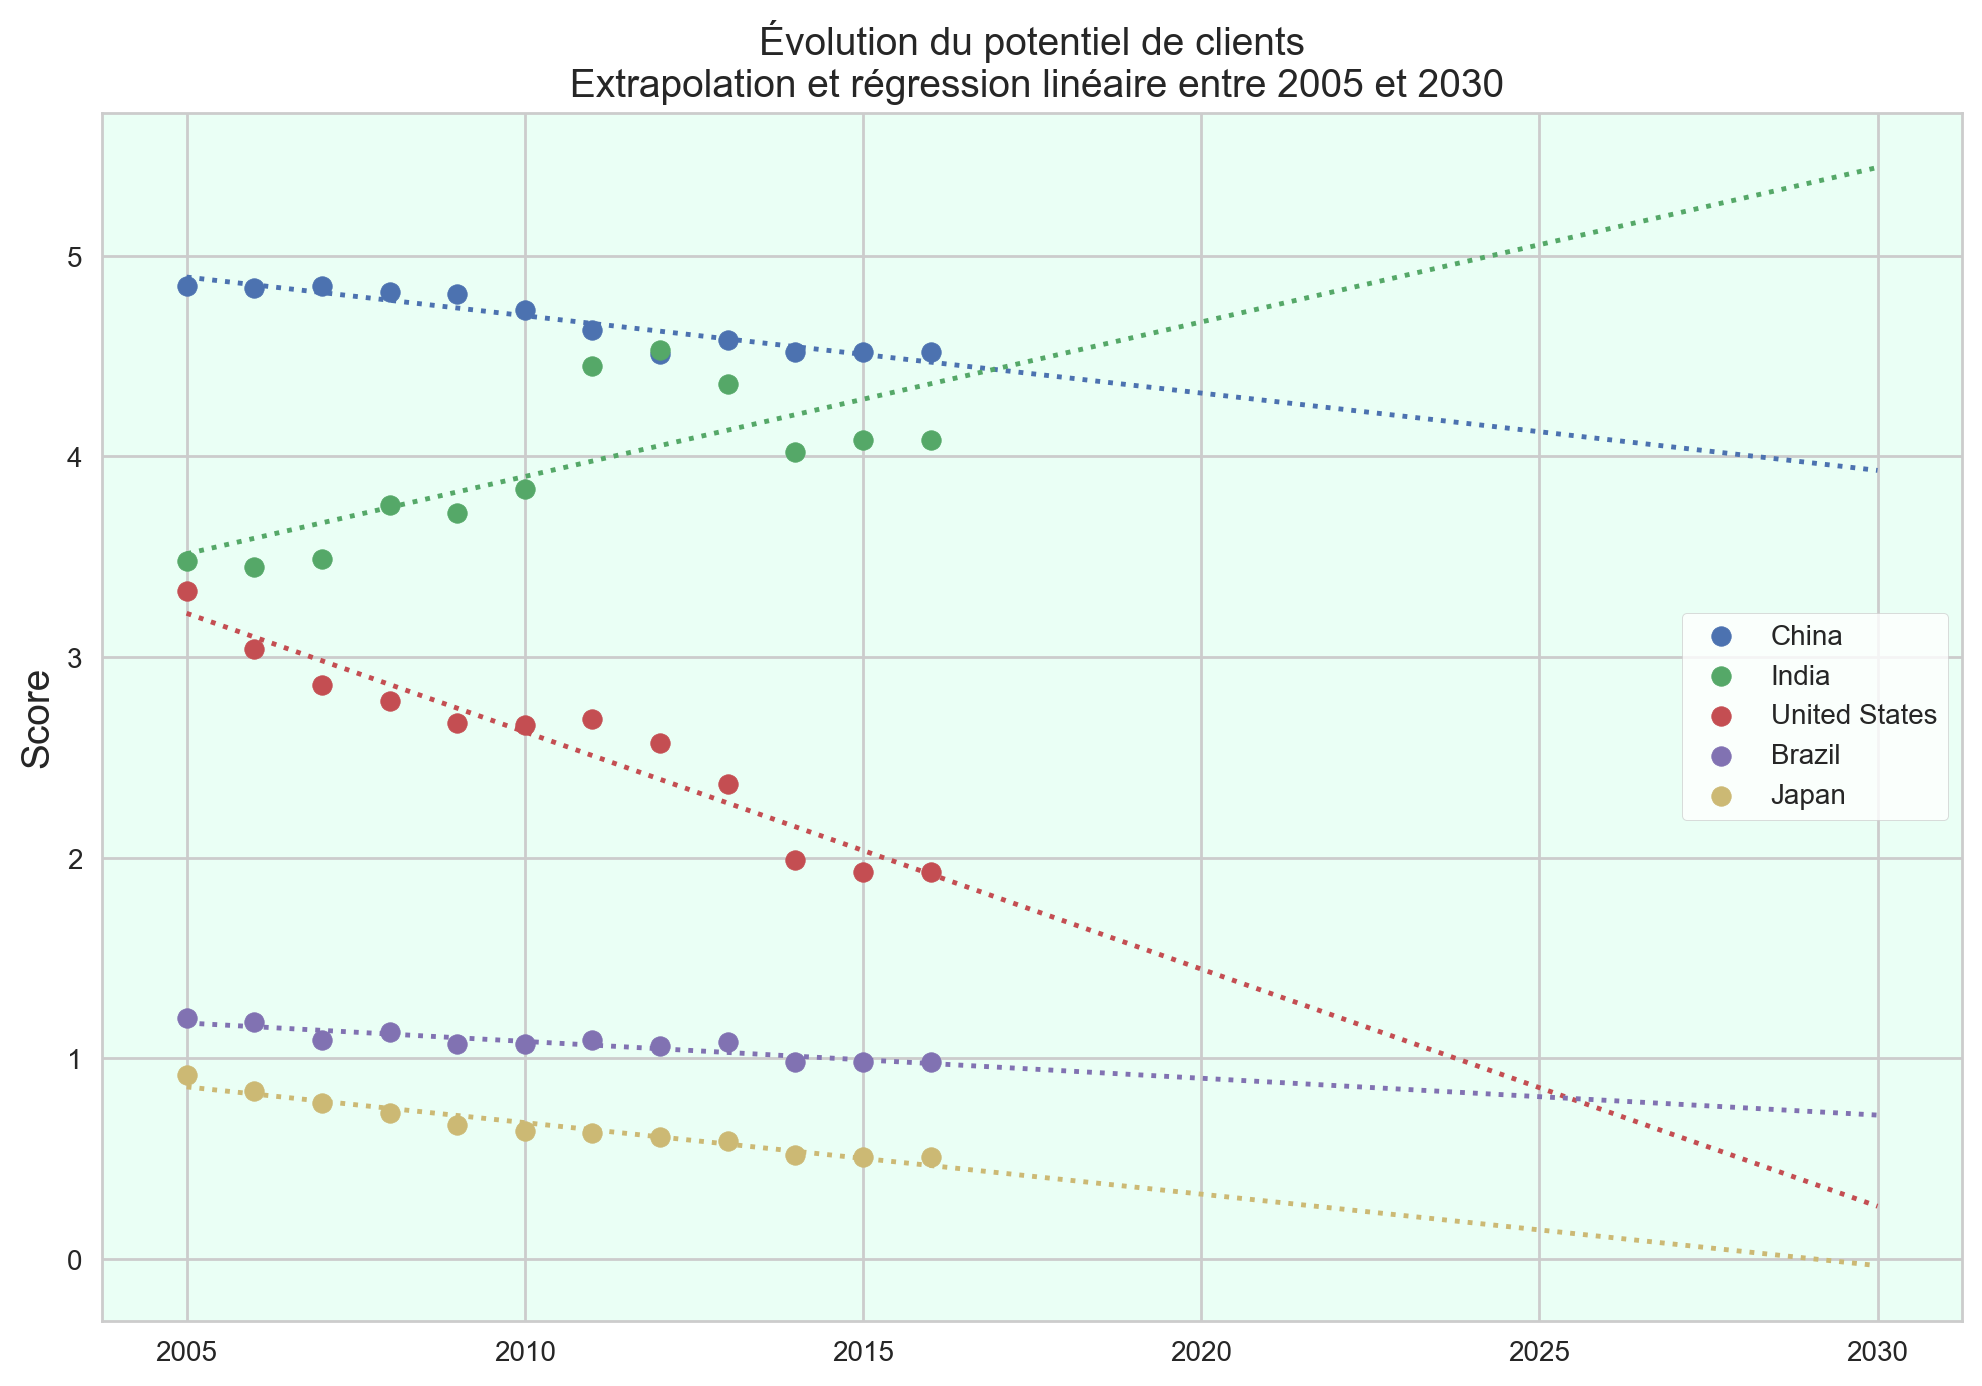

In [216]:
import statsmodels.api as sm
x = df_score.columns.tolist()[6:-1]
val_ls = [*range(2005,2017)]
X_fit = np.array([])   
X_fit = np.append(X_fit,[val_ls])
X_fit= sm.add_constant(X_fit)
x_extra = np.arange(2005,2031)

fig, ax = plt.subplots(figsize = (12,8), dpi= 200)
CODE_PAYS_5 = ['CHN', 'IND', 'USA','BRA','JPN']
alpha = np.array([])
beta = np.array([])

for pays in CODE_PAYS_5:
    y = df_score[df_score['CODE PAYS']==pays].iloc[:,6:-1].values.T
    lab = df_score[df_score['CODE PAYS']==pays].iloc[:,0].values.item()
    #print(lab, 'lab')
    ax.scatter(X_fit[:,1],y, marker=r'o',label = lab)
    #ax.plot(x,y, label = lab)
    ##Régression linéaire du score 
    y = y.astype(float)
    r = sm.OLS(y,X_fit).fit()
    alpha = np.append(alpha,r.params[1])
    beta = np.append(beta,r.params[0])
    #Y_prim = alpha[-1]*X_fit[:,1] + beta[-1]
    #ax.plot(X_fit[:,1],Y_prim)
    Y_extra = alpha[-1]*x_extra + beta[-1]
    ax.plot(x_extra,Y_extra,ls = ':' )
    #print(x)
ax.set_ylabel('Score', fontsize = 14)
ax.set_title('Évolution du potentiel de clients\n Extrapolation et régression linéaire entre 2005 et 2030', 
             fontsize = 14)
ax.set_facecolor('#eafff5')
ax.legend(frameon = True)
plt.savefig('4_4_legend', dpi = 200, bbox_inches = 'tight')
plt.show()



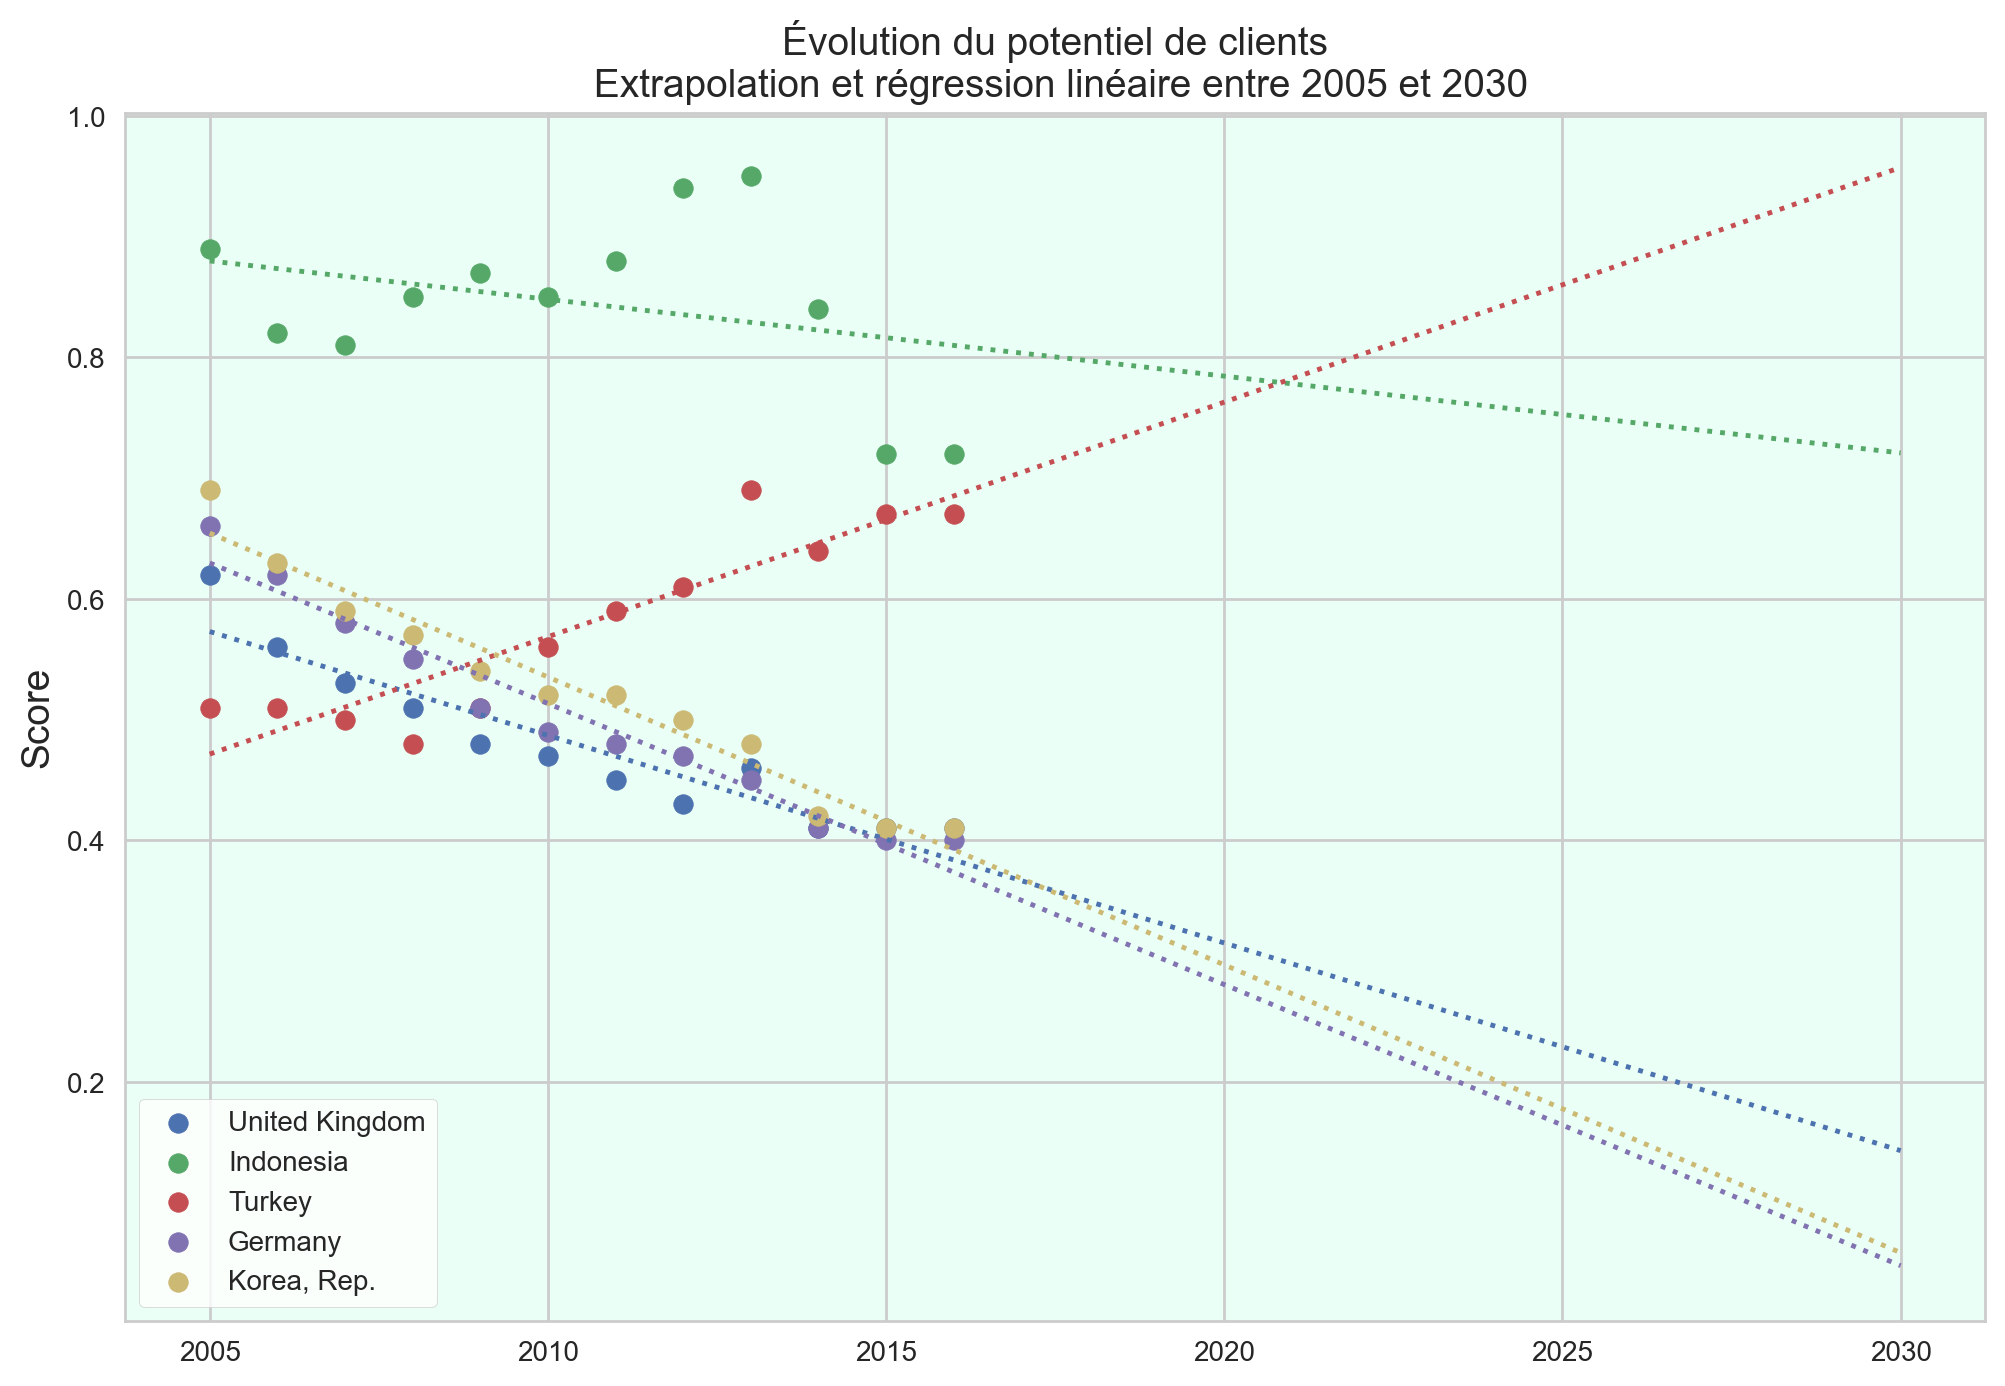

In [217]:
import statsmodels.api as sm
x = df_score.columns.tolist()[6:-1]
val_ls = [*range(2005,2017)]
X_fit = np.array([])   
X_fit = np.append(X_fit,[val_ls])
X_fit= sm.add_constant(X_fit)
x_extra = np.arange(2005,2031)

fig, ax = plt.subplots(figsize = (12,8), dpi= 200)
CODE_PAYS_5 = ['GBR', 'IDN', 'TUR','DEU','KOR']
alpha = np.array([])
beta = np.array([])

for pays in CODE_PAYS_5:
    y = df_score[df_score['CODE PAYS']==pays].iloc[:,6:-1].values.T
    lab = df_score[df_score['CODE PAYS']==pays].iloc[:,0].values.item()
    #print(lab, 'lab')
    ax.scatter(X_fit[:,1],y, marker=r'o',label = lab)
    #ax.plot(x,y, label = lab)
    ##Régression linéaire du score 
    y = y.astype(float)
    r = sm.OLS(y,X_fit).fit()
    alpha = np.append(alpha,r.params[1])
    beta = np.append(beta,r.params[0])
    #Y_prim = alpha[-1]*X_fit[:,1] + beta[-1]
    #ax.plot(X_fit[:,1],Y_prim)
    Y_extra = alpha[-1]*x_extra + beta[-1]
    ax.plot(x_extra,Y_extra,ls = ':' )
    #print(x)
ax.set_ylabel('Score', fontsize = 14)
ax.set_title('Évolution du potentiel de clients\n Extrapolation et régression linéaire entre 2005 et 2030', 
             fontsize = 14)
ax.set_facecolor('#eafff5')
ax.legend(frameon = True)
plt.savefig('4_4_legend_suite.png', dpi = 200, bbox_inches = 'tight')
plt.show()

In [218]:
df_score.head()

PAYS CODE PAYS                     RÉGION  \
0               China       CHN        East Asia & Pacific   
1               India       IND                 South Asia   
2       United States       USA              North America   
3  Russian Federation       RUS      Europe & Central Asia   
4              Brazil       BRA  Latin America & Caribbean   

                REVENUS                                       INDICATEUR_N  \
0   Upper middle income  Score annuel, moyenne pondérée des scores de c...   
1   Lower middle income  Score annuel, moyenne pondérée des scores de c...   
2     High income: OECD  Score annuel, moyenne pondérée des scores de c...   
3  High income: nonOECD  Score annuel, moyenne pondérée des scores de c...   
4   Upper middle income  Score annuel, moyenne pondérée des scores de c...   

     INDICATEUR  2005  2006  2007  2008  2009  2010  2011  2012  2013  2014  \
0  SCORE ANNUEL  4.85  4.84  4.85  4.82  4.81  4.73  4.63  4.51  4.58  4.52   
1  SCORE ANNUEL  3.48  3.45  3.49  3.76  3.72  3.84  4.45  4.53  4.36  4.02   
2  SCORE ANNUEL  3.33  3.04  2.86  2.78  2.67  2.66  2.69  2.57  2.37  1.99   
3  SCORE ANNUEL  1.74  1.58  1.48   1.4  1.27  1.12  1.11   1.0  0.92  0.74   
4  SCORE ANNUEL   1.2  1.18  1.09  1.13  1.07  1.07  1.09  1.06  1.08  0.98   

   2015  2016  SCORE MOYEN  
0  4.52  4.52         4.68  
1  4.08  4.08         3.94  
2  1.93  1.93         2.57  
3  0.69  0.69         1.14  
4  0.98  0.98         1.08

## <a name="C27"> 4.5 Critère de démographie   </a> 

Dans l'étude de l'évolution du potentiel, le taux de croissance de la population et l'âge moyen de la population sont deux critères important. La table ***Country_s*** répertorie les indicateurs propre à la population de chaque pays.



Pour évaluer le potentiel futur d'un pays d'autre critère doivent être pris en compte comme la jeunesse de la population et le taux de croissance de la population d'un pays, le taux de croissance économique.

In [219]:
#Exemple de la France
Country_s[Country_s['CODE PAYS']=='FRA']

CODE PAYS         INDICATEUR  \
166       FRA        SP.POP.GROW   
167       FRA  SP.POP.TOTL.MA.ZS   
168       FRA  SP.POP.TOTL.FE.ZS   
169       FRA        SP.POP.TOTL   
170       FRA  SP.POP.0014.TO.ZS   
171       FRA  SP.POP.1564.TO.ZS   

                                           DESCRIPTION  \
166  Data sources: Eurostat, United Nations World P...   
167  Including the four French overseas departments...   
168  Including the four French overseas departments...   
169  Data sources : Eurostat, United Nations World ...   
170  Including the four French overseas departments...   
171  Including the four French overseas departments...   

                             DEFINITION  
166        Population growth (annual %)  
167       Population, male (% of total)  
168     Population, female (% of total)  
169                   Population, total  
170   Population ages 0-14 (% of total)  
171  Population ages 15-64 (% of total)

In [220]:
Series[Series['INDICATEUR']=='BAR.POP.2024']
#Series[Series['INDICATEUR']=='BAR.POP.1519']
#Series[Series['INDICATEUR']=='SP.POP.1524.TO.UN']
#Series[Series['INDICATEUR']=='SP.POP.1524.TO.UN']

INDICATEUR     DOMAINE  \
34  BAR.POP.2024  Attainment   

                                       INDICATOR NAME  \
34  Barro-Lee: Population in thousands, age 20-24,...   

                                     SHORT DEFINITION  \
34  Population in thousands, 20-24, total is the t...   

                                      LONG DEFINITION  \
34  Population in thousands, age 20-24, total is t...   

                                               SOURCE  
34  Robert J. Barro and Jong-Wha Lee: http://www.b...

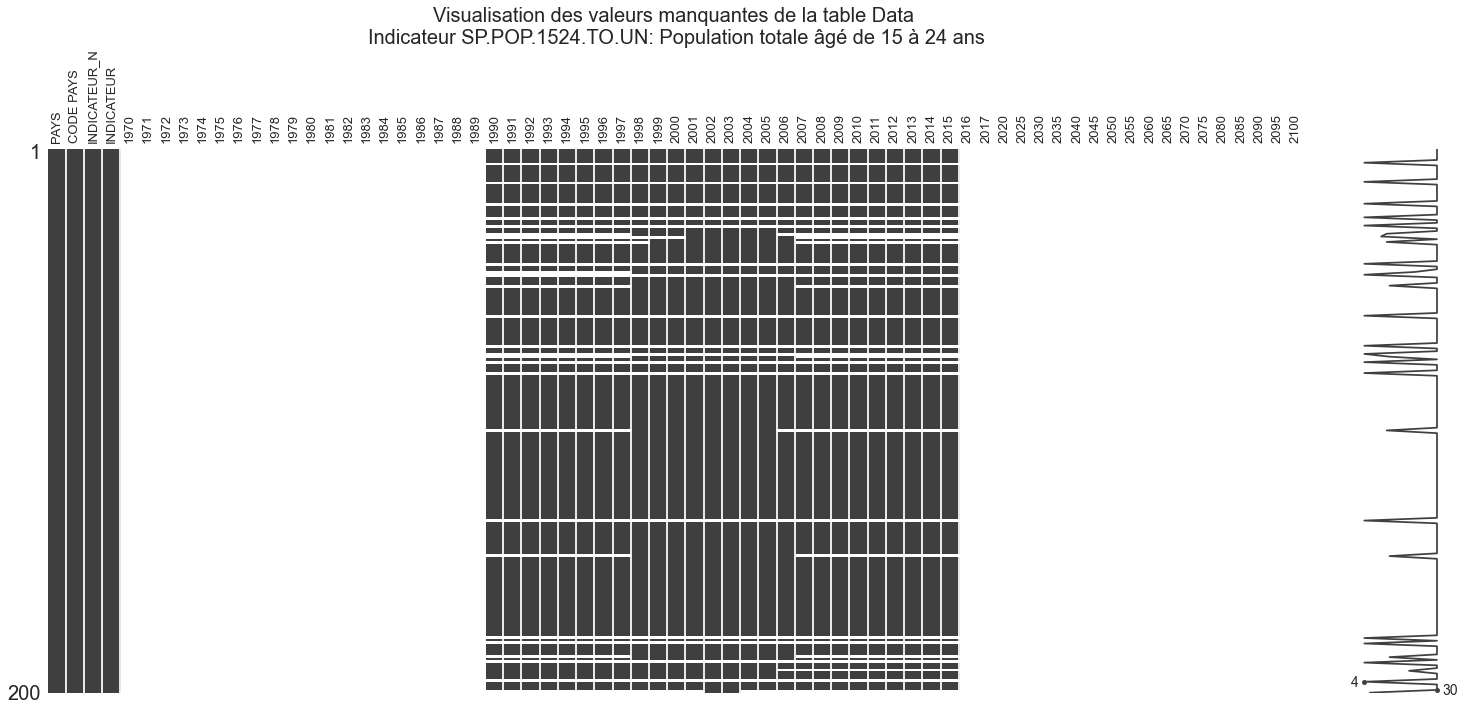

In [221]:
A = Data[Data['INDICATEUR']=='SP.POP.1524.TO.UN'].sample(200)
%matplotlib inline
msno.matrix(A)
tick = np.arange(A.shape[1])
lab = A.columns.tolist()
plt.title('Visualisation des valeurs manquantes de la table Data \n'
              + 'Indicateur SP.POP.1524.TO.UN: Population totale âgé de 15 à 24 ans',
          pad = 0, fontsize = 20)
plt.xticks(tick,labels = lab, rotation='vertical',fontsize = 13 )
plt.savefig('4_4_'+str(1)+'.png', bbox_inches = 'tight')


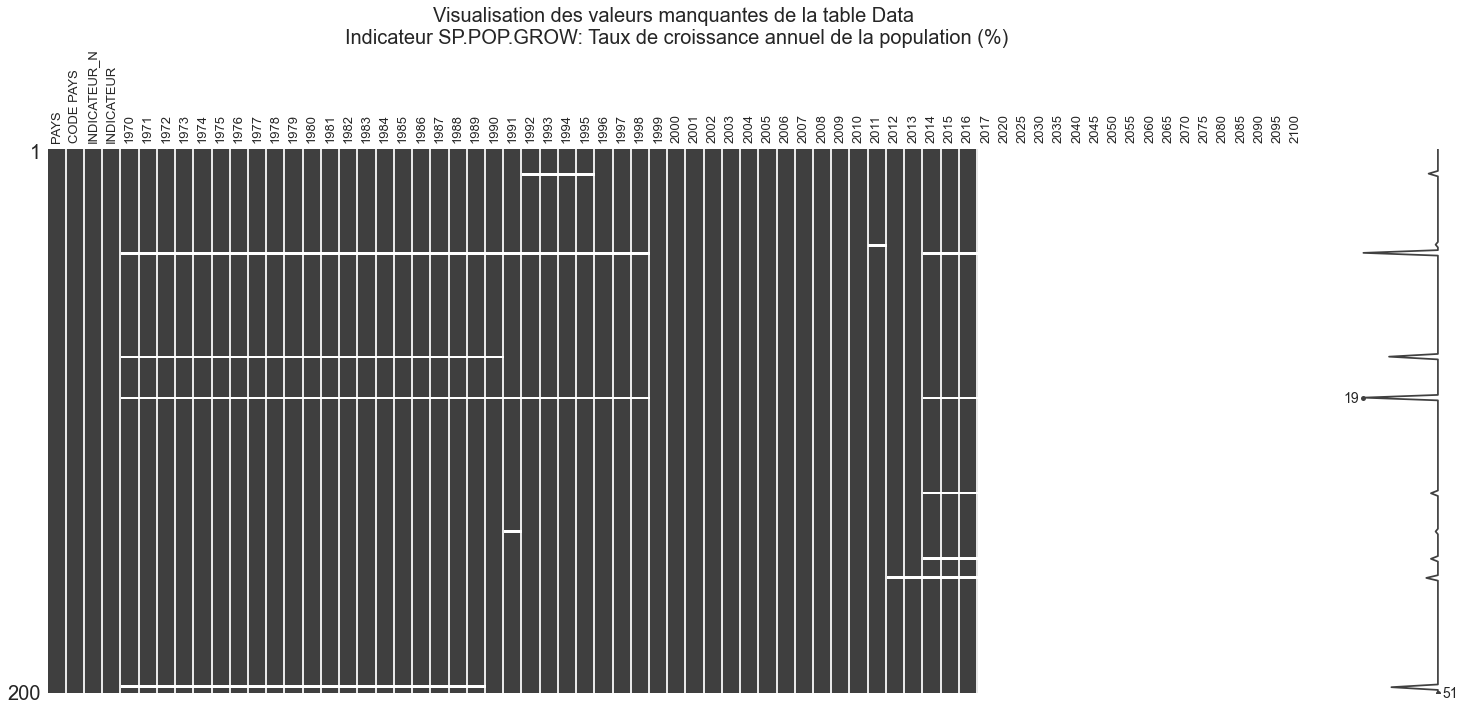

In [222]:
A = Data[Data['INDICATEUR']=='SP.POP.GROW'].sample(200)
%matplotlib inline
msno.matrix(A)
tick = np.arange(A.shape[1])
lab = A.columns.tolist()
plt.title('Visualisation des valeurs manquantes de la table Data \n'
              + 'Indicateur SP.POP.GROW: Taux de croissance annuel de la population (%)',
          pad = 0, fontsize = 20)
plt.xticks(tick,labels = lab, rotation='vertical',fontsize = 13 )
plt.savefig('4_4_'+str(2)+'.png', bbox_inches = 'tight')

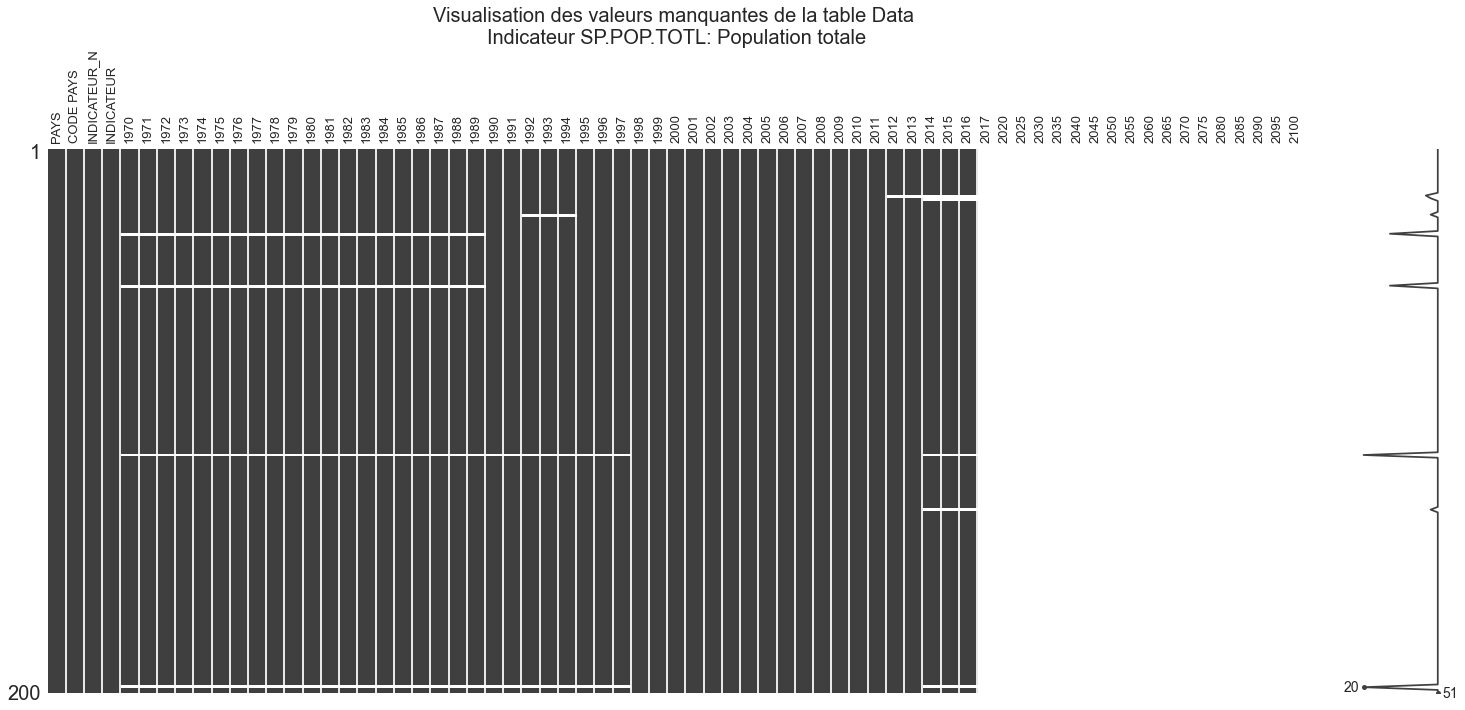

In [223]:
A = Data[Data['INDICATEUR']=='SP.POP.TOTL'].sample(200)
%matplotlib inline
msno.matrix(A)
tick = np.arange(A.shape[1])
lab = A.columns.tolist()
plt.title('Visualisation des valeurs manquantes de la table Data \n'
              + 'Indicateur SP.POP.TOTL: Population totale',
          pad = 0, fontsize = 20)
plt.xticks(tick,labels = lab, rotation='vertical',fontsize = 13 )
plt.savefig('4_4_'+str(3)+'.png', bbox_inches = 'tight')

In [224]:
mask00 = Data['INDICATEUR']=='SP.POP.1524.TO.UN'
mask01 = Data['INDICATEUR']=='SP.POP.TOTL'
mask02 = Data['INDICATEUR']=='SP.POP.GROW'
Data_pop = Data.loc[(mask00 | mask01 | mask02),:]

In [225]:
Data_pop1 = Data_pop.iloc[:,:4]
Data_pop2 = Data_pop.iloc[:,-30:-18]
Data_pop1 = Data_pop1.reset_index()
Data_pop2 = Data_pop2.reset_index()
Data_pop = pd.merge(Data_pop1, Data_pop2, on ='index')
Data_pop = Data_pop.drop(columns = 'index')
Data_pop_v0 = Data_pop

### 4.5.1 Score de démographie  / classement (titre provisoire)

In [226]:
#Ajout du pourcentage des 15-24 ans 
#SP.POP.1524 

Data_pop = Data_pop_v0

PAYS_ls = Data_pop['CODE PAYS'].unique().tolist()
for pays in PAYS_ls:
    #print('check pays', pays)
    mask00 = Data_pop['CODE PAYS']==pays
    Data_pop.loc[len(Data_pop),:] = Data_pop.loc[mask00,:].iloc[0] 
    Data_pop.iloc[-1,3] = 'SP.POP.1524'
    Data_pop.iloc[-1,2] = 'Proportion des 15-24 ans (%) de la population totale'
    for an in col:
        #print('check année', an)
        mask00 = Data_pop['CODE PAYS']==pays
        df_tampon = Data_pop[mask00]
        mask01 =Data_pop['INDICATEUR']== 'SP.POP.TOTL'
        mask02 =Data_pop['INDICATEUR']== 'SP.POP.1524.TO.UN'
        pop_tot = Data_pop.loc[(mask00 & mask01),an].values.item()
        #print('check, population totale', pop_tot)
        pop_1524 = Data_pop.loc[(mask00 & mask02),an].values.item()
        #print('check, population totale 1524', pop_1524)
        pop_1524_part = round((pop_1524/pop_tot)*100,2)
        #print('check, population totale 1524 part', pop_1524_part)
        mask03 = Data_pop['INDICATEUR']== 'SP.POP.1524'
        mask00 = Data_pop['CODE PAYS']==pays
        Data_pop.loc[(mask03 & mask00),an] = pop_1524_part
        #print('check final', Data_pop.tail(8))
        
Data_pop_v1 = Data_pop

In [227]:
## REMPLIR LES VALEURS MANQUANTES de data_pop

Data_pop = Data_pop_v1

print(Data_pop.isna().mean())
Data_pop['NB_NAN'] = Data_pop.isna().sum(axis=1)
print('nombre max de valeur manquantes:',Data_pop['NB_NAN'].max())
Data_pop = Data_pop[Data_pop['NB_NAN'] < Data_pop['NB_NAN'].max()]

Data_pop = Data_pop.fillna(method ='ffill', axis = 1)
Data_pop = Data_pop.fillna(method ='bfill', axis = 1)
print(Data_pop.head())
#print(Data_pop.isna().mean())

Data_pop = Data_pop.sort_values('PAYS')
Data_pop = Data_pop.reset_index()
Data_pop = Data_pop.drop(columns = 'index')

Data_pop_v2 = Data_pop

PAYS            0.000000
CODE PAYS       0.000000
INDICATEUR_N    0.000000
INDICATEUR      0.000000
2005            0.047619
2006            0.054762
2007            0.069048
2008            0.069048
2009            0.069048
2010            0.069048
2011            0.070238
2012            0.072619
2013            0.072619
2014            0.082143
2015            0.082143
2016            0.511905
dtype: float64
nombre max de valeur manquantes: 12
          PAYS CODE PAYS                   INDICATEUR_N         INDICATEUR  \
0  Afghanistan       AFG   Population growth (annual %)        SP.POP.GROW   
1  Afghanistan       AFG  Population, ages 15-24, total  SP.POP.1524.TO.UN   
2  Afghanistan       AFG              Population, total        SP.POP.TOTL   
3      Albania       ALB   Population growth (annual %)        SP.POP.GROW   
4      Albania       ALB  Population, ages 15-24, total  SP.POP.1524.TO.UN   

           2005          2006          2007          2008          2009  \
0  3.

In [228]:
ind_ls_pop = ['SP.POP.GROW','SP.POP.TOTL', 'SP.POP.1524.TO.UN', 'SP.POP.1524']
c = Data_pop.columns.tolist()
Data_score_pop = pd.DataFrame(columns = c)


for indic in ind_ls_pop:
    print('check indic', indic)
    mask = Data_pop['INDICATEUR']==indic
    df_tampon = Data_pop.loc[mask,:]
    for an in col: 
        alpha, beta = coeff2(indic, Data_pop, an)
        for i,row in df_tampon.iterrows():                     
            x = row[an]
            df_tampon.loc[i,an] = round(alpha*x +beta,2)
    Data_score_pop = pd.concat([Data_score_pop,df_tampon])
Data_score_pop = Data_score_pop.reset_index()
Data_score_pop = Data_score_pop.drop(columns = 'index')
Data_score_pop = Data_score_pop.rename(columns = {'NB_NAN':'TAUX DE REMPLISSAGE (%)'})
Data_score_pop['TAUX DE REMPLISSAGE (%)'] = (1 - Data_score_pop['TAUX DE REMPLISSAGE (%)']/12)*100

check indic SP.POP.GROW
check indic SP.POP.TOTL
check indic SP.POP.1524.TO.UN
check indic SP.POP.1524


In [229]:
def top10(df):
#df est un dataframe définie plus haut. 
#la fonction renvoie les lignes correspondant au top 10 (cf. analyse résultats)
    df_top10 = df[(df['CODE PAYS']== 'CHN')|(df['CODE PAYS']== 'IND')
            |(df['CODE PAYS']== 'USA')|(df['CODE PAYS']== 'BRA')
            |(df['CODE PAYS']== 'JPN') |(df['CODE PAYS']== 'GBR')
           |(df['CODE PAYS']== 'IDN') |(df['CODE PAYS']== 'TUR')
           |(df['CODE PAYS']== 'DEU')|(df['CODE PAYS']== 'KOR')]
    df_top10 = df_top10.reset_index()
    df_top10 = df_top10.drop(columns = 'index')
    return df_top10

def top5(df):
#df est un dataframe définie plus haut. 
#la fonction renvoie les lignes correspondant au top 10 (cf. analyse résultats)
    df_top5 = df[(df['CODE PAYS']== 'CHN')|(df['CODE PAYS']== 'IND')
            |(df['CODE PAYS']== 'USA')|(df['CODE PAYS']== 'BRA')
            |(df['CODE PAYS']== 'JPN')]
    df_top5 = df_top5.reset_index()
    df_top5 = df_top5.drop(columns = 'index')
    return df_top5

## Top 5 et top 10 - taux de croissances

In [230]:
df_pop_growth = Data_pop[Data_pop['INDICATEUR']== 'SP.POP.GROW']
df_pop_growth['TAUX MOYEN'] = 0

for i, row in df_pop_growth.iterrows():
    df_pop_growth.loc[i,'TAUX MOYEN'] = round(row[4:-2].mean(),2)
    
top_5_growth = top5(df_pop_growth).sort_values('TAUX MOYEN', ascending = False)
top_5_growth = top_5_growth.reset_index()
top_5_growth = top_5_growth.drop(columns = 'index')
top_5_growth

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/3777516010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_growth['TAUX MOYEN'] = 0
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/3777516010.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_growth.loc[i,'TAUX MOYEN'] = round(row[4:-2].mean(),2)


PAYS CODE PAYS                  INDICATEUR_N   INDICATEUR  \
0          India       IND  Population growth (annual %)  SP.POP.GROW   
1         Brazil       BRA  Population growth (annual %)  SP.POP.GROW   
2  United States       USA  Population growth (annual %)  SP.POP.GROW   
3          China       CHN  Population growth (annual %)  SP.POP.GROW   
4          Japan       JPN  Population growth (annual %)  SP.POP.GROW   

       2005      2006      2007      2008      2009      2010      2011  \
0  1.584252  1.548886  1.512078  1.469688  1.420203  1.366798  1.311876   
1  1.172552  1.114609  1.060019  1.016865  0.988454  0.970296  0.956013   
2  0.921713  0.964254  0.951055  0.945865  0.876651  0.836422  0.745614   
3  0.588125  0.558374  0.522272  0.512387  0.497381  0.482960  0.479150   
4  0.009392  0.063374  0.114909  0.048425 -0.012495  0.017961 -0.185226   

       2012      2013      2014      2015      2016  NB_NAN  TAUX MOYEN  
0  1.261206  1.219419  1.189328  1.167527  1.148215       0        1.35  
1  0.938920  0.917023  0.887563  0.852799  0.817556       0        0.97  
2  0.746420  0.700262  0.743124  0.729732  0.692801       0        0.82  
3  0.487231  0.493710  0.506312  0.508137  0.541479       0        0.51  
4 -0.159711 -0.144272 -0.132694 -0.106125 -0.115284       0       -0.05

In [231]:
top_10_growth = top10(df_pop_growth).sort_values('TAUX MOYEN', ascending = False)
top_10_growth = top_10_growth.reset_index()
top_10_growth = top_10_growth.drop(columns = 'index')
top_10_growth

PAYS CODE PAYS                  INDICATEUR_N   INDICATEUR  \
0          Turkey       TUR  Population growth (annual %)  SP.POP.GROW   
1           India       IND  Population growth (annual %)  SP.POP.GROW   
2       Indonesia       IDN  Population growth (annual %)  SP.POP.GROW   
3          Brazil       BRA  Population growth (annual %)  SP.POP.GROW   
4   United States       USA  Population growth (annual %)  SP.POP.GROW   
5  United Kingdom       GBR  Population growth (annual %)  SP.POP.GROW   
6     Korea, Rep.       KOR  Population growth (annual %)  SP.POP.GROW   
7           China       CHN  Population growth (annual %)  SP.POP.GROW   
8         Germany       DEU  Population growth (annual %)  SP.POP.GROW   
9           Japan       JPN  Population growth (annual %)  SP.POP.GROW   

       2005      2006      2007      2008      2009      2010      2011  \
0  1.327634  1.258550  1.205380  1.203624  1.268402  1.375056  1.485643   
1  1.584252  1.548886  1.512078  1.469688  1.420203  1.366798  1.311876   
2  1.375946  1.369188  1.361626  1.351463  1.338066  1.321405  1.304067   
3  1.172552  1.114609  1.060019  1.016865  0.988454  0.970296  0.956013   
4  0.921713  0.964254  0.951055  0.945865  0.876651  0.836422  0.745614   
5  0.686611  0.735049  0.778666  0.787033  0.756391  0.783889  0.781677   
6  0.211998  0.525200  0.505234  0.759317  0.514683  0.498225  0.768972   
7  0.588125  0.558374  0.522272  0.512387  0.497381  0.482960  0.479150   
8 -0.056778 -0.112797 -0.133719 -0.190143 -0.253383 -0.153198 -1.853715   
9  0.009392  0.063374  0.114909  0.048425 -0.012495  0.017961 -0.185226   

       2012      2013      2014      2015      2016  NB_NAN  TAUX MOYEN  
0  1.568376  1.619467  1.627194  1.598009  1.573012       0        1.43  
1  1.261206  1.219419  1.189328  1.167527  1.148215       0        1.35  
2  1.284199  1.257327  1.222049  1.181014  1.137494       0        1.29  
3  0.938920  0.917023  0.887563  0.852799  0.817556       0        0.97  
4  0.746420  0.700262  0.743124  0.729732  0.692801       0        0.82  
5  0.695316  0.669534  0.753349  0.794968  0.777542       0        0.75  
6  0.525714  0.455219  0.628150  0.527288  0.451318       0        0.53  
7  0.487231  0.493710  0.506312  0.508137  0.541479       0        0.51  
8  0.187728  0.272900  0.416877  0.865703  1.193867       0        0.02  
9 -0.159711 -0.144272 -0.132694 -0.106125 -0.115284       0       -0.05

## Top 5 et 10 - Jeunesse de la population

In [232]:
df_pop_youth_part = Data_pop[Data_pop['INDICATEUR']== 'SP.POP.1524']
df_pop_youth_part['TAUX MOYEN'] = 0

for i, row in df_pop_youth_part.iterrows():
    df_pop_youth_part.loc[i,'TAUX MOYEN'] = round(row[4:-2].mean(),2)
    
top_5_youth_part = top5(df_pop_youth_part).sort_values('TAUX MOYEN', ascending = False)
top_5_youth_part = top_5_youth_part.reset_index()
top_5_youth_part = top_5_youth_part.drop(columns = 'index')
top_5_youth_part

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/2850844845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_youth_part['TAUX MOYEN'] = 0
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/2850844845.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_youth_part.loc[i,'TAUX MOYEN'] = round(row[4:-2].mean(),2)


PAYS CODE PAYS                                       INDICATEUR_N  \
0          India       IND  Proportion des 15-24 ans (%) de la population ...   
1         Brazil       BRA  Proportion des 15-24 ans (%) de la population ...   
2          China       CHN  Proportion des 15-24 ans (%) de la population ...   
3  United States       USA  Proportion des 15-24 ans (%) de la population ...   
4          Japan       JPN  Proportion des 15-24 ans (%) de la population ...   

    INDICATEUR   2005   2006   2007   2008   2009   2010   2011   2012   2013  \
0  SP.POP.1524  19.12  19.12  19.13  19.14  19.12  19.10  19.05  18.98  18.89   
1  SP.POP.1524  18.91  18.58  18.21  17.82  17.46  17.14  16.88  16.67  16.51   
2  SP.POP.1524  16.67  16.78  16.81  16.74  16.59  16.37  16.06  15.68  15.24   
3  SP.POP.1524  14.47  14.54  14.59  14.62  14.62  14.59  14.53  14.44  14.33   
4  SP.POP.1524  11.04  10.76  10.49  10.24  10.04   9.87   9.76   9.68   9.63   

    2014   2015   2016  NB_NAN  TAUX MOYEN  
0  18.78  18.65  18.65       1       18.98  
1  16.39  16.31  16.31       1       17.27  
2  14.79  14.37  14.37       1       15.87  
3  14.20  14.07  14.07       1       14.42  
4   9.59   9.56   9.56       1       10.02

## Top 5 et top 10 - nb 1524

In [233]:
df_pop_youth = Data_pop[Data_pop['INDICATEUR']== 'SP.POP.1524.TO.UN']
df_pop_youth['TAUX MOYEN'] = 0

for i, row in df_pop_youth.iterrows():
    df_pop_youth.loc[i,'TAUX MOYEN'] = round(row[4:-2].mean(),2)
    
top_5_youth = top5(df_pop_youth).sort_values('TAUX MOYEN', ascending = False)
top_5_youth = top_5_youth.reset_index()
top_5_youth = top_5_youth.drop(columns = 'index')
top_5_youth

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/3464740442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_youth['TAUX MOYEN'] = 0
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/3464740442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_youth.loc[i,'TAUX MOYEN'] = round(row[4:-2].mean(),2)


PAYS CODE PAYS                   INDICATEUR_N         INDICATEUR  \
0          India       IND  Population, ages 15-24, total  SP.POP.1524.TO.UN   
1          China       CHN  Population, ages 15-24, total  SP.POP.1524.TO.UN   
2  United States       USA  Population, ages 15-24, total  SP.POP.1524.TO.UN   
3         Brazil       BRA  Population, ages 15-24, total  SP.POP.1524.TO.UN   
4          Japan       JPN  Population, ages 15-24, total  SP.POP.1524.TO.UN   

          2005         2006         2007         2008         2009  \
0  218738389.0  222224219.0  225700990.0  229076220.0  232225988.0   
1  217382824.0  220042486.0  221519350.0  221774704.0  220892800.0   
2   42759049.0   43388523.0   43962362.0   44459126.0   44855382.0   
3   35348374.0   35122910.0   34787085.0   34397361.0   34028600.0   
4   14110659.0   13759822.0   13425972.0   13119358.0   12853503.0   

          2010         2011         2012         2013         2014  \
0  235056806.0  237548472.0  239713636.0  241535030.0  243002731.0   
1  218974009.0  215914397.0  211735888.0  206846521.0  201802535.0   
2   45137089.0   45296141.0   45343097.0   45307415.0   45230846.0   
3   33736994.0   33540594.0   33432501.0   33412052.0   33469835.0   
4   12637132.0   12472916.0   12355023.0   12272803.0   12211081.0   

          2015         2016  NB_NAN    TAUX MOYEN  
0  244120201.0  244120201.0       1  2.344219e+08  
1  197026759.0  197026759.0       1  2.125783e+08  
2   45147517.0   45147517.0       1  4.466951e+07  
3   33595574.0   33595574.0       1  3.403895e+07  
4   12157426.0   12157426.0       1  1.279443e+07

In [234]:
df_pop_youth = Data_pop[Data_pop['INDICATEUR']== 'SP.POP.1524.TO.UN']
df_pop_youth['TAUX MOYEN'] = 0

for i, row in df_pop_youth.iterrows():
    df_pop_youth.loc[i,'TAUX MOYEN'] = round(row[4:-2].mean(),2)
    
top_10_youth = top10(df_pop_youth).sort_values('TAUX MOYEN', ascending = False)
top_10_youth = top_10_youth.reset_index()
top_10_youth = top_10_youth.drop(columns = 'index')
top_10_youth

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/3980271873.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_youth['TAUX MOYEN'] = 0
/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/3980271873.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_youth.loc[i,'TAUX MOYEN'] = round(row[4:-2].mean(),2)


PAYS CODE PAYS                   INDICATEUR_N         INDICATEUR  \
0           India       IND  Population, ages 15-24, total  SP.POP.1524.TO.UN   
1           China       CHN  Population, ages 15-24, total  SP.POP.1524.TO.UN   
2   United States       USA  Population, ages 15-24, total  SP.POP.1524.TO.UN   
3       Indonesia       IDN  Population, ages 15-24, total  SP.POP.1524.TO.UN   
4          Brazil       BRA  Population, ages 15-24, total  SP.POP.1524.TO.UN   
5          Turkey       TUR  Population, ages 15-24, total  SP.POP.1524.TO.UN   
6           Japan       JPN  Population, ages 15-24, total  SP.POP.1524.TO.UN   
7         Germany       DEU  Population, ages 15-24, total  SP.POP.1524.TO.UN   
8  United Kingdom       GBR  Population, ages 15-24, total  SP.POP.1524.TO.UN   
9     Korea, Rep.       KOR  Population, ages 15-24, total  SP.POP.1524.TO.UN   

          2005         2006         2007         2008         2009  \
0  218738389.0  222224219.0  225700990.0  229076220.0  232225988.0   
1  217382824.0  220042486.0  221519350.0  221774704.0  220892800.0   
2   42759049.0   43388523.0   43962362.0   44459126.0   44855382.0   
3   42846073.0   42760972.0   42634693.0   42483570.0   42328040.0   
4   35348374.0   35122910.0   34787085.0   34397361.0   34028600.0   
5   13603989.0   13593785.0   13589317.0   13594963.0   13614961.0   
6   14110659.0   13759822.0   13425972.0   13119358.0   12853503.0   
7    9760730.0    9769678.0    9722427.0    9630837.0    9514498.0   
8    7841484.0    7936414.0    8000333.0    8034786.0    8044972.0   
9    6952747.0    6853679.0    6771167.0    6705309.0    6655513.0   

          2010         2011         2012         2013         2014  \
0  235056806.0  237548472.0  239713636.0  241535030.0  243002731.0   
1  218974009.0  215914397.0  211735888.0  206846521.0  201802535.0   
2   45137089.0   45296141.0   45343097.0   45307415.0   45230846.0   
3   42184439.0   42057105.0   41947672.0   41865701.0   41821108.0   
4   33736994.0   33540594.0   33432501.0   33412052.0   33469835.0   
5   13651079.0   13708210.0   13783064.0   13859026.0   13913334.0   
6   12637132.0   12472916.0   12355023.0   12272803.0   12211081.0   
7    9388651.0    9255162.0    9111578.0    8964066.0    8819364.0   
8    8035314.0    8005514.0    7955051.0    7888589.0    7812258.0   
9    6619654.0    6600849.0    6594938.0    6583690.0    6543025.0   

          2015         2016  NB_NAN    TAUX MOYEN  
0  244120201.0  244120201.0       1  2.344219e+08  
1  197026759.0  197026759.0       1  2.125783e+08  
2   45147517.0   45147517.0       1  4.466951e+07  
3   41819264.0   41819264.0       1  4.221399e+07  
4   33595574.0   33595574.0       1  3.403895e+07  
5   13930222.0   13930222.0       1  1.373101e+07  
6   12157426.0   12157426.0       1  1.279443e+07  
7    8682394.0    8682394.0       1  9.275148e+06  
8    7731522.0    7731522.0       1  7.918147e+06  
9    6456561.0    6456561.0       1  6.649474e+06

In [235]:
top_10_youth

PAYS CODE PAYS                   INDICATEUR_N         INDICATEUR  \
0           India       IND  Population, ages 15-24, total  SP.POP.1524.TO.UN   
1           China       CHN  Population, ages 15-24, total  SP.POP.1524.TO.UN   
2   United States       USA  Population, ages 15-24, total  SP.POP.1524.TO.UN   
3       Indonesia       IDN  Population, ages 15-24, total  SP.POP.1524.TO.UN   
4          Brazil       BRA  Population, ages 15-24, total  SP.POP.1524.TO.UN   
5          Turkey       TUR  Population, ages 15-24, total  SP.POP.1524.TO.UN   
6           Japan       JPN  Population, ages 15-24, total  SP.POP.1524.TO.UN   
7         Germany       DEU  Population, ages 15-24, total  SP.POP.1524.TO.UN   
8  United Kingdom       GBR  Population, ages 15-24, total  SP.POP.1524.TO.UN   
9     Korea, Rep.       KOR  Population, ages 15-24, total  SP.POP.1524.TO.UN   

          2005         2006         2007         2008         2009  \
0  218738389.0  222224219.0  225700990.0  229076220.0  232225988.0   
1  217382824.0  220042486.0  221519350.0  221774704.0  220892800.0   
2   42759049.0   43388523.0   43962362.0   44459126.0   44855382.0   
3   42846073.0   42760972.0   42634693.0   42483570.0   42328040.0   
4   35348374.0   35122910.0   34787085.0   34397361.0   34028600.0   
5   13603989.0   13593785.0   13589317.0   13594963.0   13614961.0   
6   14110659.0   13759822.0   13425972.0   13119358.0   12853503.0   
7    9760730.0    9769678.0    9722427.0    9630837.0    9514498.0   
8    7841484.0    7936414.0    8000333.0    8034786.0    8044972.0   
9    6952747.0    6853679.0    6771167.0    6705309.0    6655513.0   

          2010         2011         2012         2013         2014  \
0  235056806.0  237548472.0  239713636.0  241535030.0  243002731.0   
1  218974009.0  215914397.0  211735888.0  206846521.0  201802535.0   
2   45137089.0   45296141.0   45343097.0   45307415.0   45230846.0   
3   42184439.0   42057105.0   41947672.0   41865701.0   41821108.0   
4   33736994.0   33540594.0   33432501.0   33412052.0   33469835.0   
5   13651079.0   13708210.0   13783064.0   13859026.0   13913334.0   
6   12637132.0   12472916.0   12355023.0   12272803.0   12211081.0   
7    9388651.0    9255162.0    9111578.0    8964066.0    8819364.0   
8    8035314.0    8005514.0    7955051.0    7888589.0    7812258.0   
9    6619654.0    6600849.0    6594938.0    6583690.0    6543025.0   

          2015         2016  NB_NAN    TAUX MOYEN  
0  244120201.0  244120201.0       1  2.344219e+08  
1  197026759.0  197026759.0       1  2.125783e+08  
2   45147517.0   45147517.0       1  4.466951e+07  
3   41819264.0   41819264.0       1  4.221399e+07  
4   33595574.0   33595574.0       1  3.403895e+07  
5   13930222.0   13930222.0       1  1.373101e+07  
6   12157426.0   12157426.0       1  1.279443e+07  
7    8682394.0    8682394.0       1  9.275148e+06  
8    7731522.0    7731522.0       1  7.918147e+06  
9    6456561.0    6456561.0       1  6.649474e+06

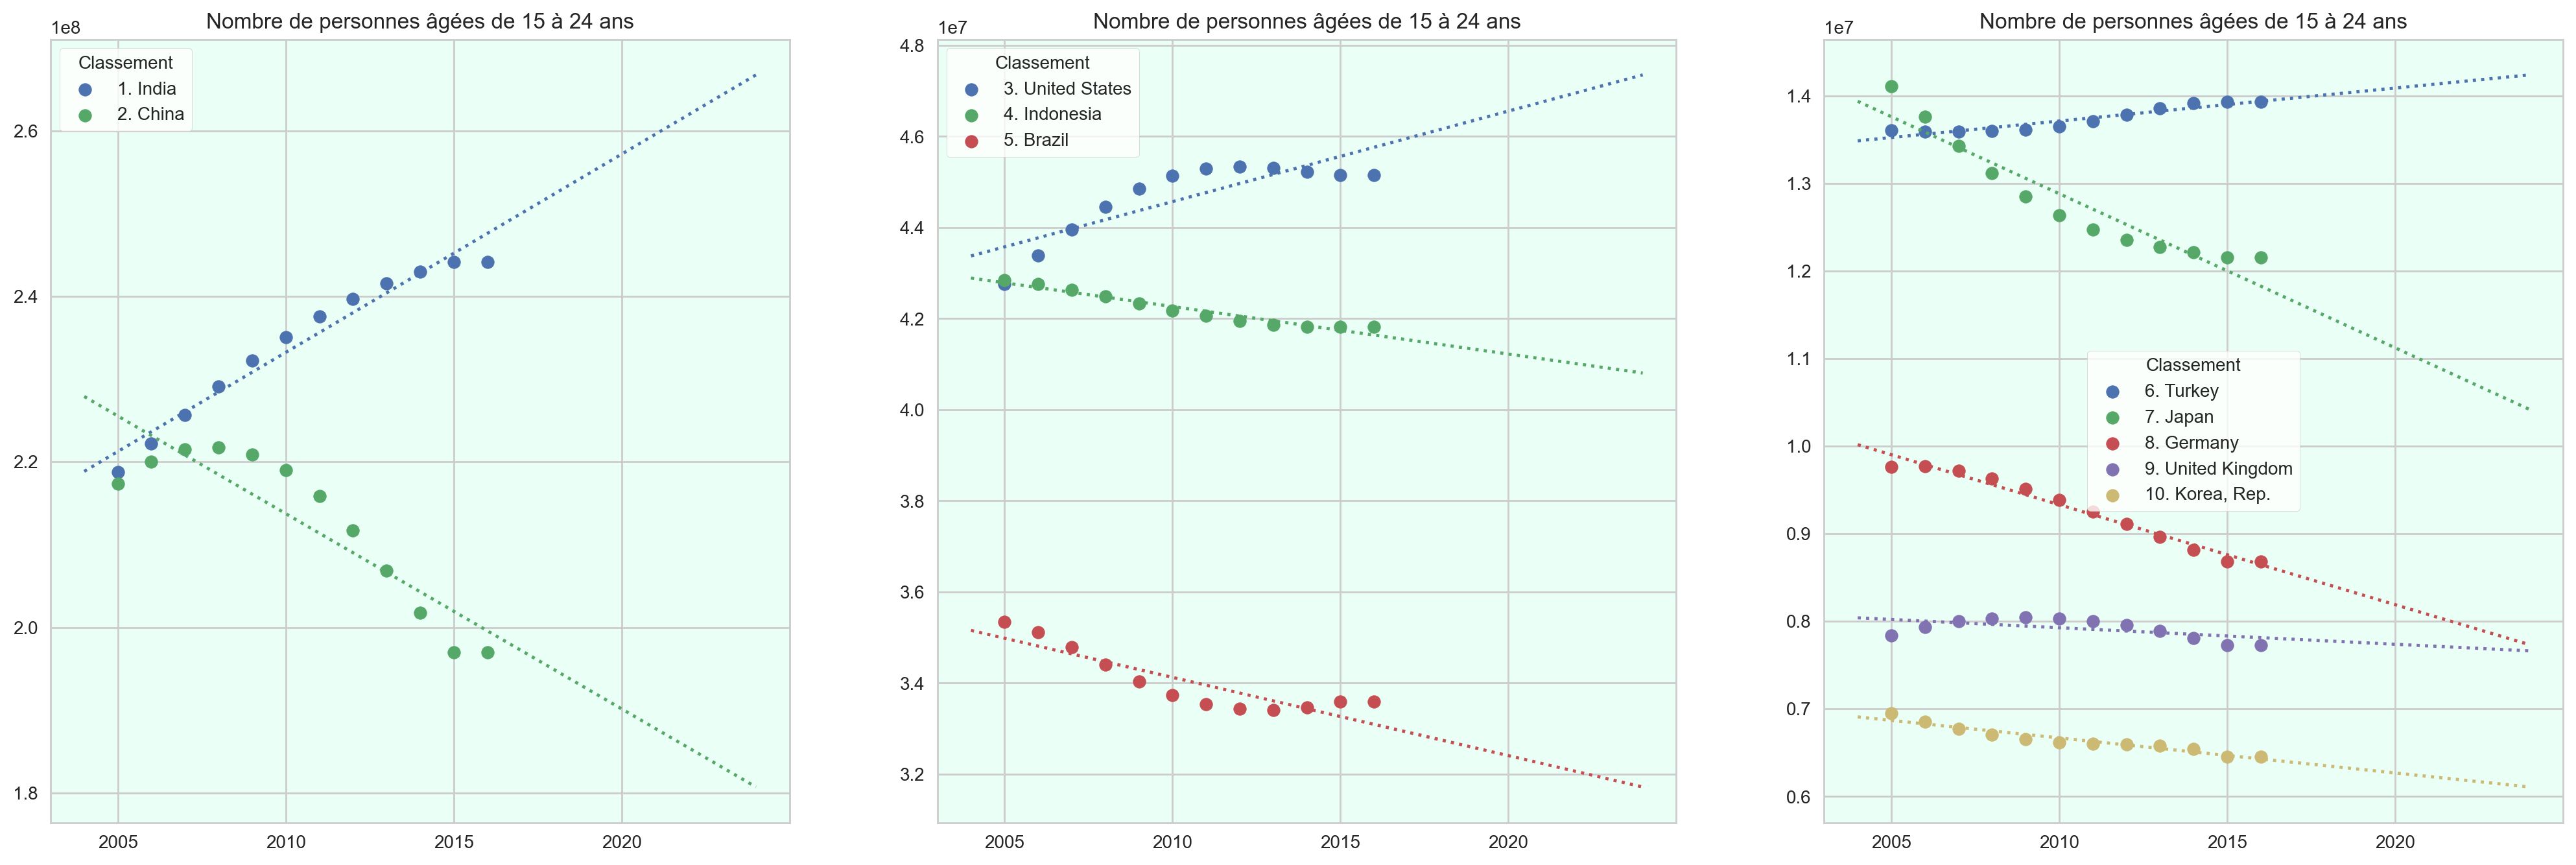

In [236]:
fig, ax = plt.subplots(1,3, figsize =(25,8), dpi=200)
x = top_10_youth.columns.tolist()[4:-2]
val_ls = [*range(2005,2017)]
X_fit = np.array([])   
X_fit = np.append(X_fit,[val_ls])
X_fit= sm.add_constant(X_fit)
x_extra = np.arange(2004,2025)
alpha = np.array([])
beta = np.array([])


df_10 = top_10_youth.iloc[0:2,:]
for i,row in df_10.iterrows():
    y = row[4:-2].T
    lab = row[0]
    #ax[0].plot(x,y, label = str(i+1)+'. '+lab)
    ax[0].scatter(X_fit[:,1],y,label = str(i+1)+'. '+lab)
    ax[0].legend(frameon = True, title = 'Classement')
    ax[0].set_title('Nombre de personnes âgées de 15 à 24 ans')
    ax[0].set_facecolor('#eafff5')
    y = y.astype(float)
    r = sm.OLS(y,X_fit).fit()
    alpha = np.append(alpha,r.params[1])
    beta = np.append(beta,r.params[0])
    Y_extra = alpha[-1]*x_extra + beta[-1]
    ax[0].plot(x_extra,Y_extra,ls = ':' )
    ax[0].set_xticks(ticks= np.arange(2005,2025,5))

df_10 = top_10_youth.iloc[2:5,:]
for i,row in df_10.iterrows():
    y = row[4:-2].T
    lab = row[0]
    ax[1].scatter(X_fit[:,1],y,label = str(i+1)+'. '+lab)
    ax[1].legend(frameon = True, title = 'Classement')
    ax[1].set_title('Nombre de personnes âgées de 15 à 24 ans')
    ax[1].set_facecolor('#eafff5')
    y = y.astype(float)
    r = sm.OLS(y,X_fit).fit()
    alpha = np.append(alpha,r.params[1])
    beta = np.append(beta,r.params[0])
    Y_extra = alpha[-1]*x_extra + beta[-1]
    ax[1].plot(x_extra,Y_extra,ls = ':' )
    ax[1].set_xticks(ticks= np.arange(2005,2025,5))

df_10 = top_10_youth.iloc[5:,:]
for i,row in df_10.iterrows():
    y = row[4:-2].T
    lab = row[0]
    ax[2].scatter(X_fit[:,1],y,label = str(i+1)+'. '+lab)
    ax[2].legend(frameon = True, title = 'Classement')
    ax[2].set_title('Nombre de personnes âgées de 15 à 24 ans')
    ax[2].set_facecolor('#eafff5')
    y = y.astype(float)
    r = sm.OLS(y,X_fit).fit()
    alpha = np.append(alpha,r.params[1])
    beta = np.append(beta,r.params[0])
    Y_extra = alpha[-1]*x_extra + beta[-1]
    ax[2].plot(x_extra,Y_extra,ls = ':' )
    ax[2].set_xticks(ticks= np.arange(2005,2025,5))
plt.savefig('4_5demog', dpi= 200, bbox_inches = 'tight')

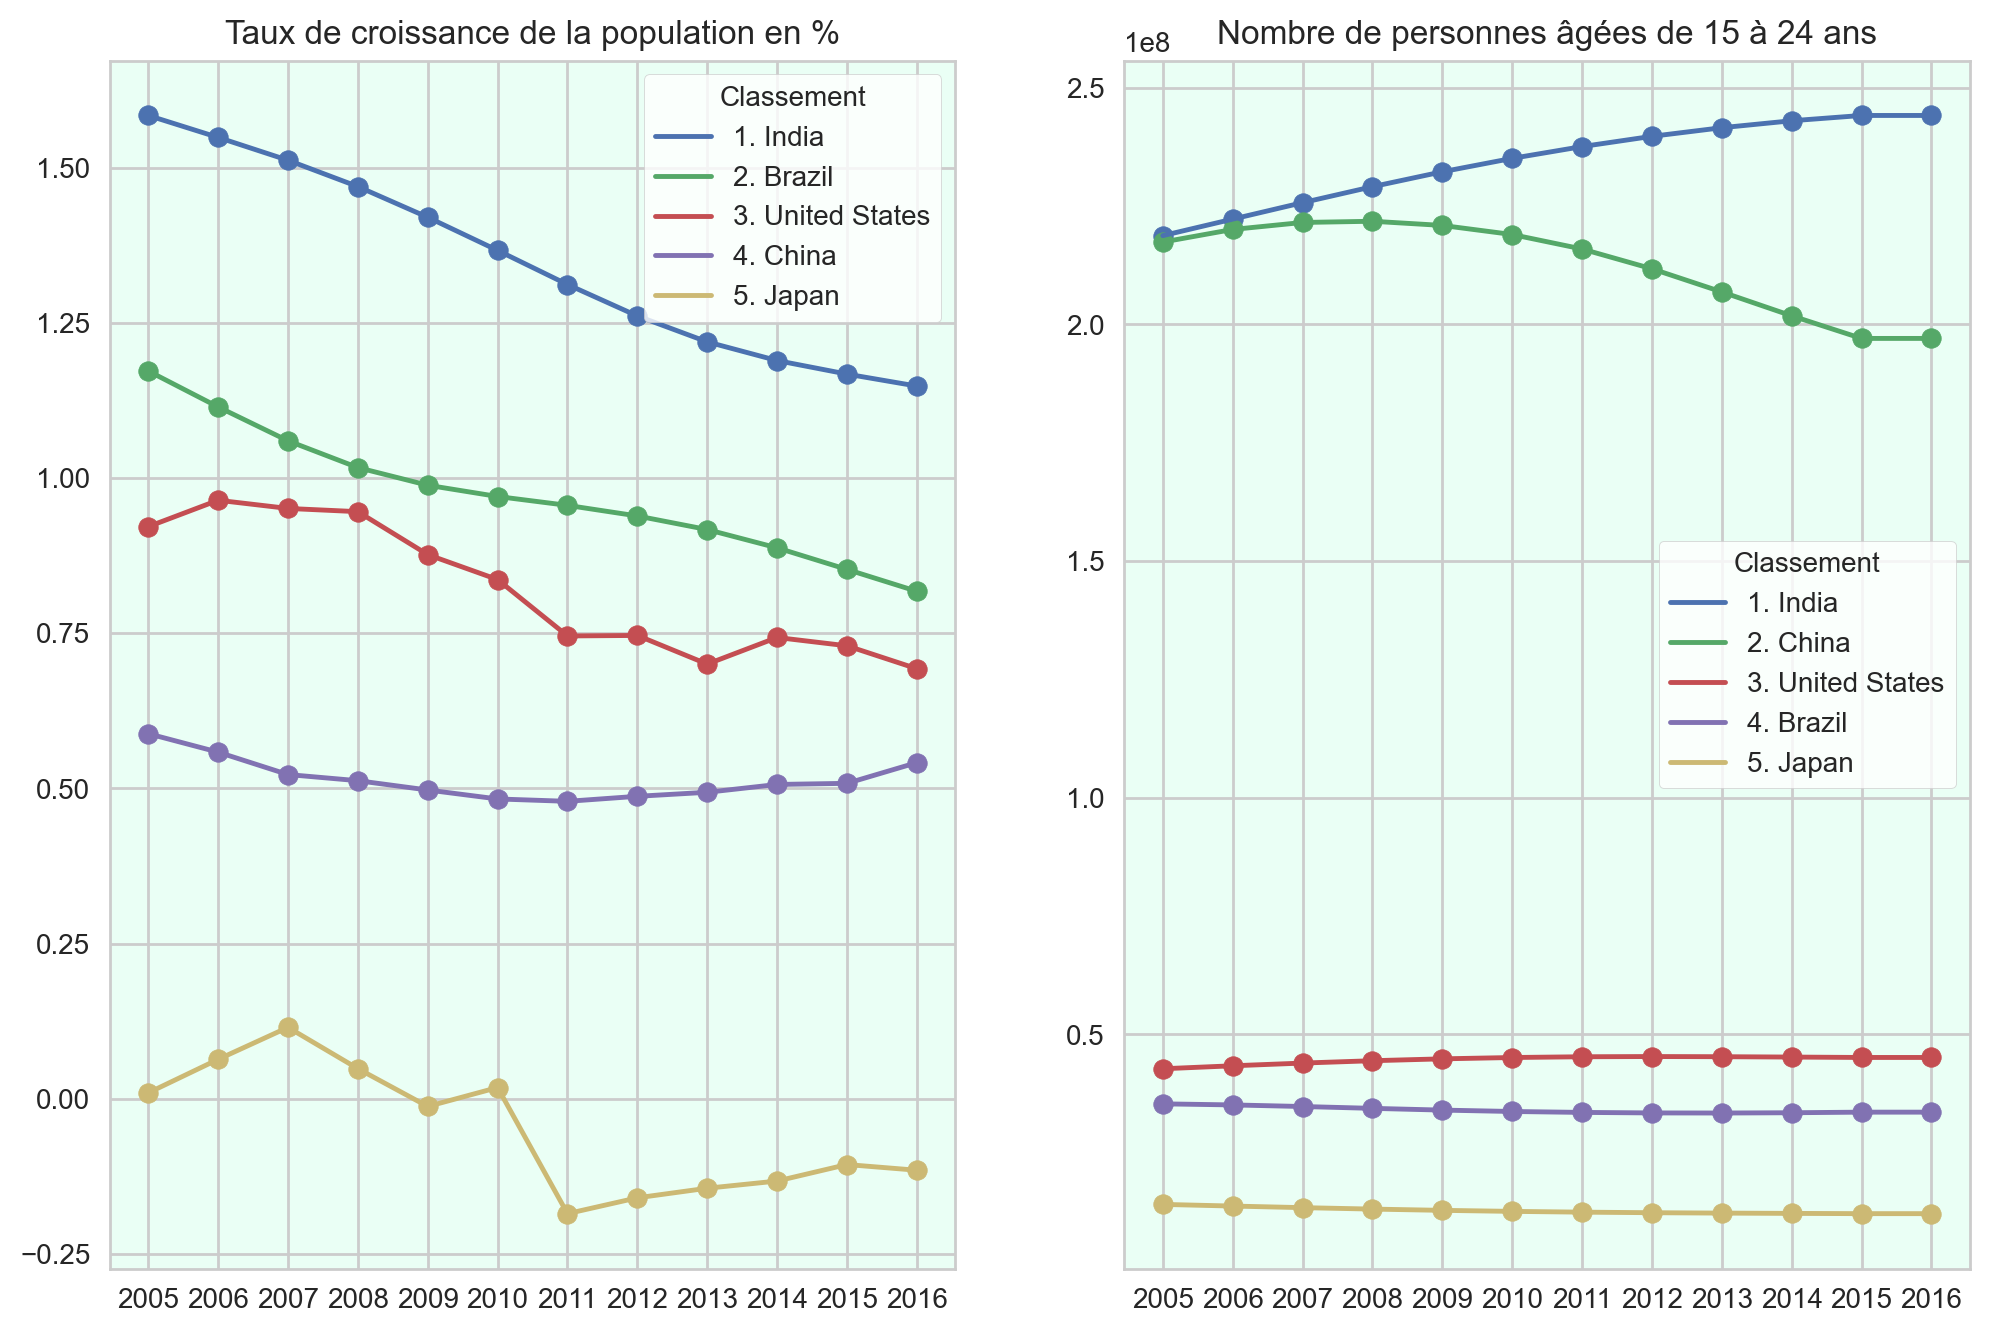

In [237]:
fig, ax = plt.subplots(1,2, figsize =(12,8), dpi=200)
x = top_5_growth.columns.tolist()[4:-2]

for i,row in top_5_growth.iterrows():
    y = row[4:-2].T
    lab = row[0]
    ax[0].plot(x,y, label = str(i+1)+'. '+lab)
    ax[0].scatter(x,y)
    ax[0].legend(frameon = True,  title = 'Classement')
    ax[0].set_title('Taux de croissance de la population en %')
    ax[0].set_facecolor('#eafff5')

for i,row in top_5_youth.iterrows():
    y = row[4:-2].T
    lab = row[0]
    ax[1].plot(x,y, label = str(i+1)+'. '+lab)
    ax[1].scatter(x,y)
    ax[1].legend(frameon = True, title = 'Classement')
    ax[1].set_title('Nombre de personnes âgées de 15 à 24 ans')
    ax[1].set_facecolor('#eafff5')
plt.savefig('4_5_1_demographie.png', dpi= 200, bbox_inches = 'tight')

In [238]:
df_pop_growth.insert(2,'REGION', np.nan)
for i, row in df_pop_growth.iterrows():
    codepays = row['CODE PAYS']
    reg = Country_sub.loc[Country_sub['CODE PAYS']==codepays, 'REGION'].values.item()
    df_pop_growth.loc[i,'REGION'] = reg

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/787193073.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_growth.loc[i,'REGION'] = reg


East Asia & Pacific
Europe & Central Asia
Latin America & Caribbean
Middle East & North Africa
North America
South Asia
Sub-Saharan Africa


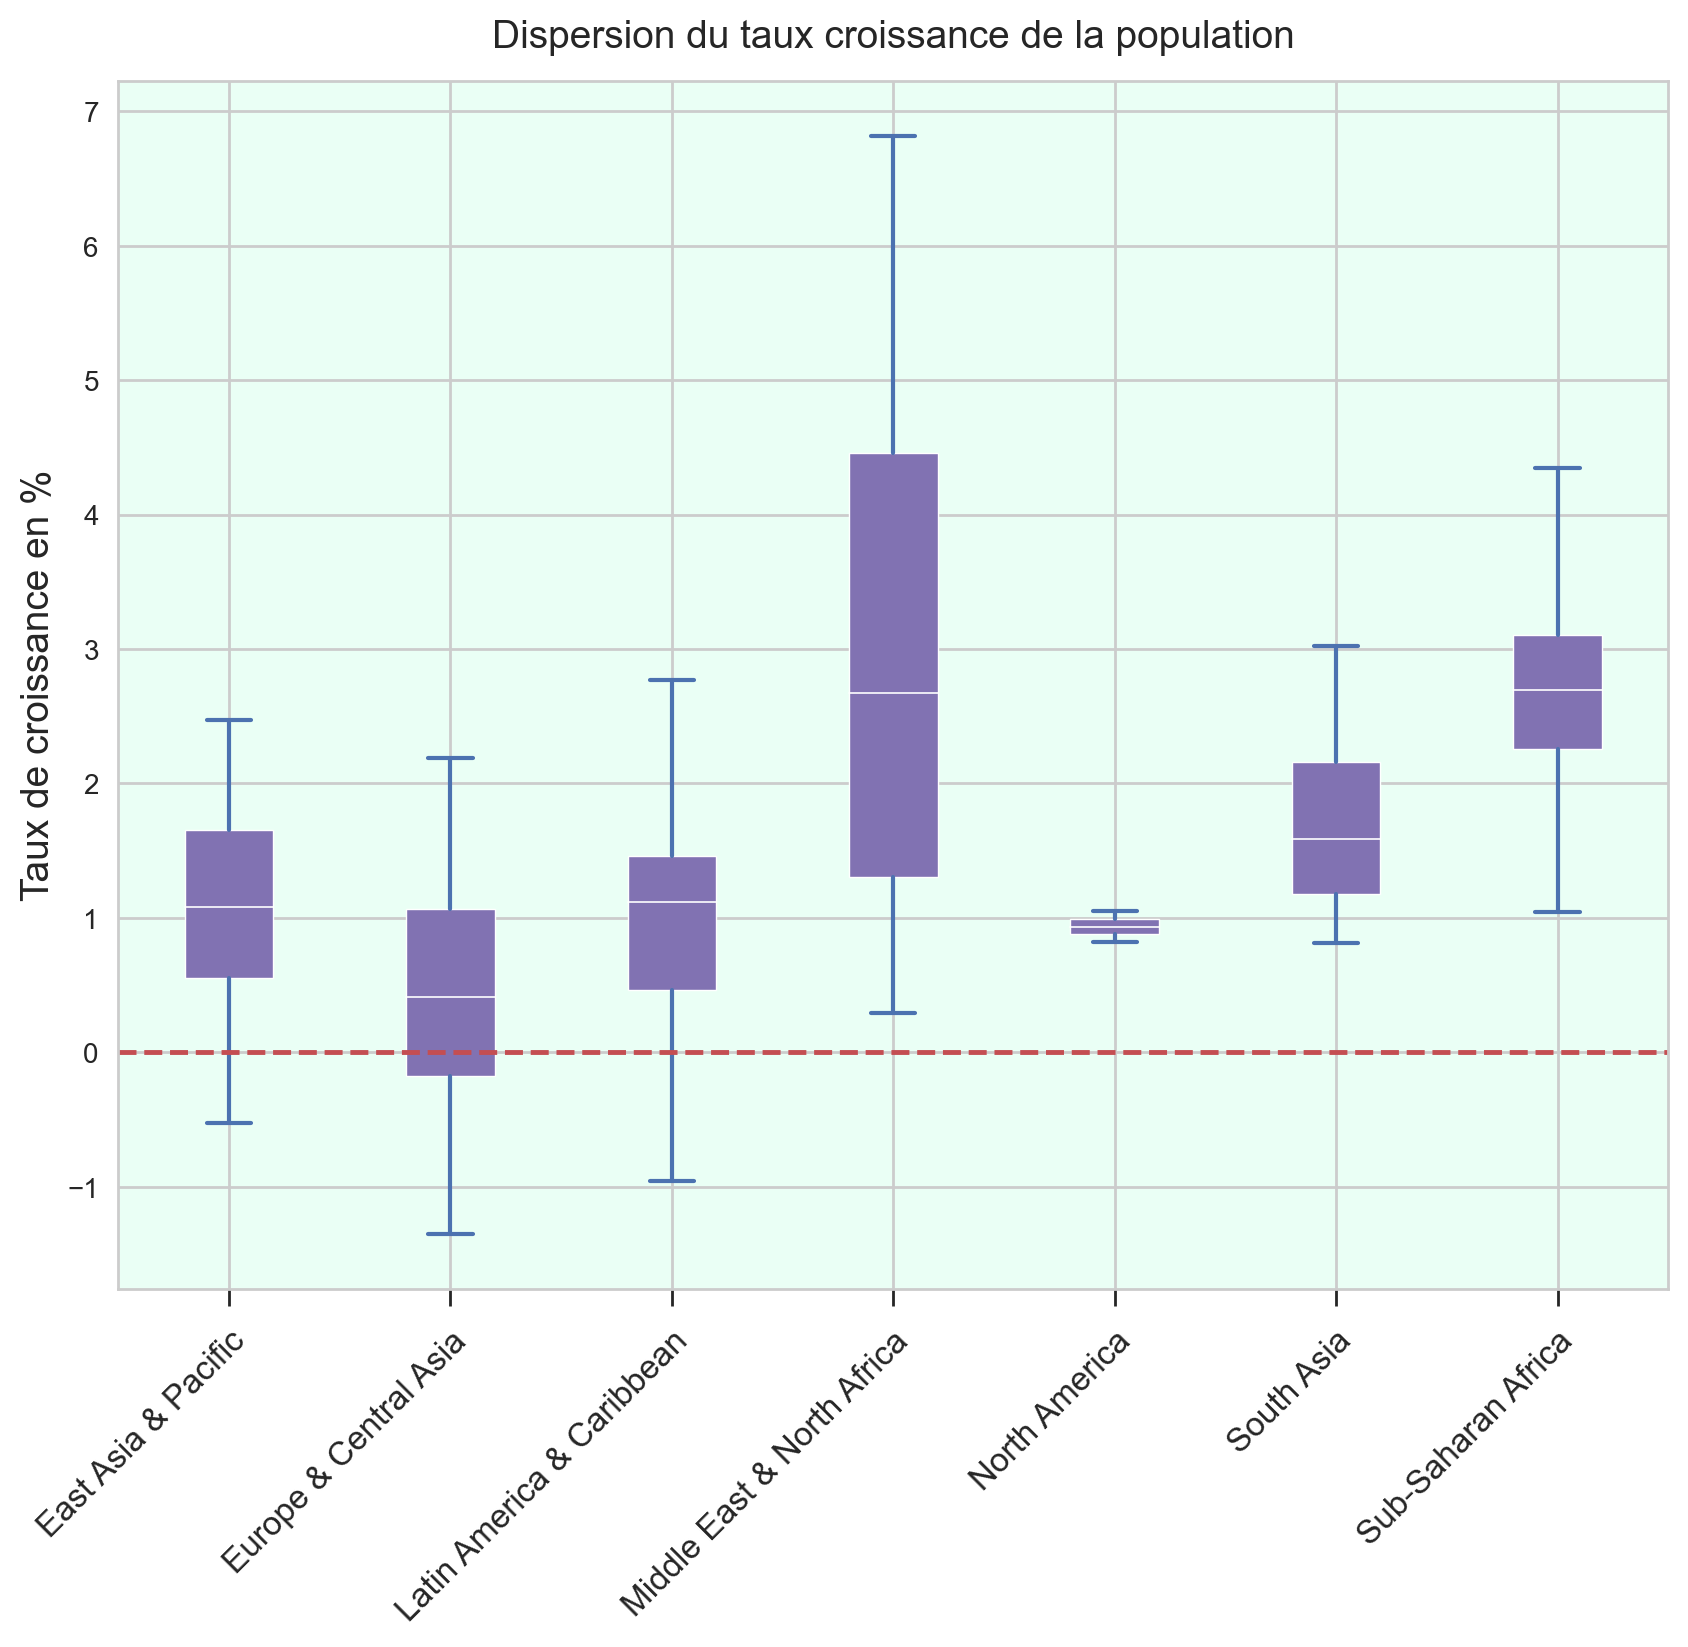

In [239]:
fig, ax = plt.subplots(figsize = (10,8), dpi= 200)
reg_ls = df_pop_growth['REGION'].unique().tolist()
reg_ls.sort()
seq_Y = []

for reg in reg_ls:
    print(reg)
    df_tampon = df_pop_growth[df_pop_growth['REGION']==reg]
    Y = df_tampon['TAUX MOYEN'].values
    seq_Y.append(Y)
ax.boxplot(seq_Y, widths=0.4, patch_artist=True,
                showmeans=False, showfliers= False,
                medianprops={"color": "white", "linewidth": 0.6},
                boxprops={"facecolor": "C3", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
tick_position = np.arange(len(seq_Y))+1
ax.axhline(0, ls='--', color='C8')
ax.set_xticks(ticks = tick_position,labels = reg_ls)
ax.set_ylabel('Taux de croissance en %', fontsize = 14)
ax.set_facecolor('#eafff5')
ax.set_title('Dispersion du taux croissance de la population', fontsize =14, pad = 12)
ax.tick_params(axis = 'x',labelsize =12, rotation =45, 
                                   direction = 'out', length = 6,width = 1, bottom = True)
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
plt.savefig('5_1_growth.png', dpi=200, bbox_inches = 'tight')

In [240]:
df_pop_youth_part.insert(2,'REGION', np.nan)
for i, row in df_pop_youth_part.iterrows():
    codepays = row['CODE PAYS']
    reg = Country_sub.loc[Country_sub['CODE PAYS']==codepays, 'REGION'].values.item()
    df_pop_youth_part.loc[i,'REGION'] = reg

/var/folders/t8/scm7pjrs0ms07sj80ykdhcyw0000gq/T/ipykernel_29531/534526092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pop_youth_part.loc[i,'REGION'] = reg


East Asia & Pacific
Europe & Central Asia
Latin America & Caribbean
Middle East & North Africa
North America
South Asia
Sub-Saharan Africa


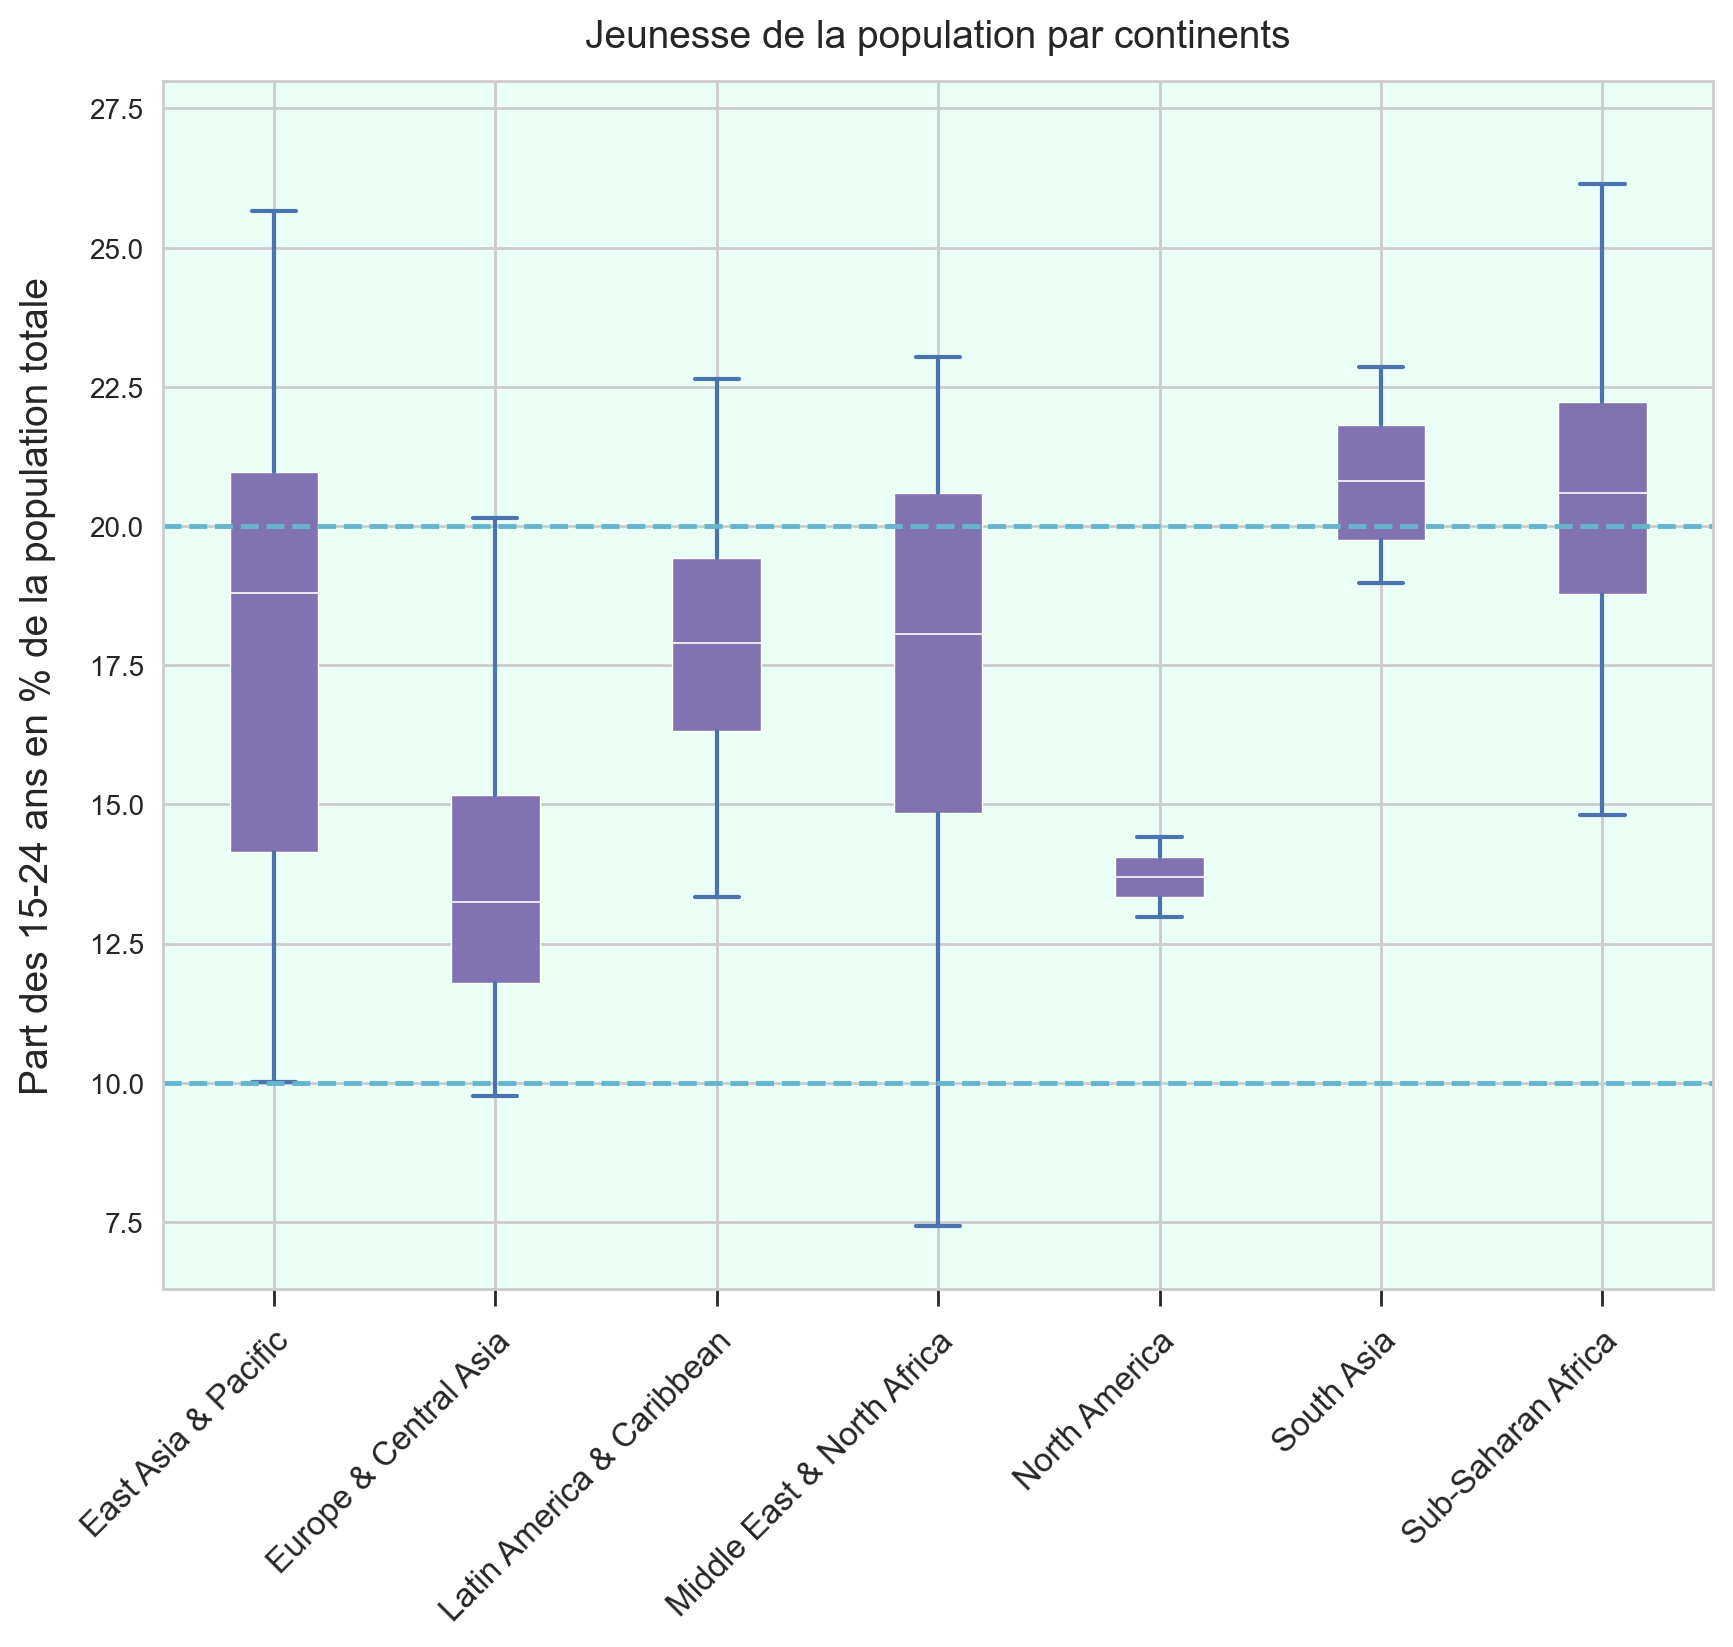

In [241]:
fig, ax = plt.subplots(figsize = (10,8), dpi= 200)
reg_ls = df_pop_youth_part['REGION'].unique().tolist()
reg_ls.sort()
seq_Y = []

for reg in reg_ls:
    print(reg)
    df_tampon = df_pop_youth_part[df_pop_youth_part['REGION']==reg]
    Y = df_tampon['TAUX MOYEN'].values
    seq_Y.append(Y)
ax.boxplot(seq_Y, widths=0.4, patch_artist=True,
                showmeans=False, showfliers= False,
                medianprops={"color": "white", "linewidth": 0.6},
                boxprops={"facecolor": "C3", "edgecolor": "white",
                          "linewidth": 0.5},
                whiskerprops={"color": "C0", "linewidth": 1.5},
                capprops={"color": "C0", "linewidth": 1.5})
tick_position = np.arange(len(seq_Y))+1
ax.axhline(10, ls='--', color='C5')
ax.axhline(20, ls='--', color='C5')
ax.axhline(30, ls='--', color='C5')
ax.set_xticks(ticks = tick_position,labels = reg_ls)
ax.set_ylabel('Part des 15-24 ans en % de la population totale', fontsize = 14, labelpad = 12)
ax.set_facecolor('#eafff5')
ax.set_title('Jeunesse de la population par continents', fontsize =14, pad = 12)
ax.tick_params(axis = 'x',labelsize =12, rotation =45, 
                                   direction = 'out', length = 6,width = 1, bottom = True)
ax.set_ylim(top = 28)
plt.setp(ax.get_xticklabels(), ha="right", rotation_mode="anchor")
plt.savefig('5_1_youthpart.png', dpi=200, bbox_inches = 'tight')